In [ ]:
#Sentiment Analysis using Twitter API

In [1]:
#Extracting Data using Twitter API
import twitter

# Go to http://dev.twitter.com/apps/new to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

print(twitter_api)

In [58]:
#Search for Joe Biden and saving tweets into JSON file(in order to obtain atleast 1000 tweets and in English)
import json

# Set this variable to a trending topic, or anything else
# for that matter. The example query below was a
# trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = "@JoeBiden -filter:retweets"
lang = 'en'
count = 100

# Import unquote to prevent URL encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, lang=lang, since='2020-04-10',until='2020-04-17')

statuses = search_results['statuses']

# Iterate through more batches of results by following the cursor
for _ in range(100):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']
    
# Show one sample search result by slicing the list...    
print(json.dumps(statuses[0],indent=1))
with open('data_biden.txt', 'w') as outfile:
    json.dump(statuses, outfile)

Length of statuses 15
Length of statuses 30
Length of statuses 45
Length of statuses 60
Length of statuses 75
Length of statuses 90
Length of statuses 103
Length of statuses 118
Length of statuses 133
Length of statuses 148
Length of statuses 163
Length of statuses 178
Length of statuses 193
Length of statuses 208
Length of statuses 223
Length of statuses 238
Length of statuses 253
Length of statuses 268
Length of statuses 283
Length of statuses 298
Length of statuses 313
Length of statuses 328
Length of statuses 343
Length of statuses 358
Length of statuses 373
Length of statuses 388
Length of statuses 403
Length of statuses 418
Length of statuses 433
Length of statuses 448
Length of statuses 463
Length of statuses 478
Length of statuses 493
Length of statuses 508
Length of statuses 523
Length of statuses 538
Length of statuses 553
Length of statuses 568
Length of statuses 583
Length of statuses 598
Length of statuses 613
Length of statuses 628
Length of statuses 643
Length of statuse

In [59]:
#Search for Donald Trump and saving tweets into JSON file(in order to obtain atleast 1000 tweets and in English)
import json

# Set this variable to a trending topic, or anything else
# for that matter. The example query below was a
# trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

q = "@realDonaldTrump -filter:retweets"
lang = 'en'
count = 100

# Import unquote to prevent URL encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count, lang=lang,since='2020-04-10',until='2020-04-17')

statuses = search_results['statuses']


# Iterate through 5 more batches of results by following the cursor
for _ in range(10):
    print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break

    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])

    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
print(json.dumps(statuses[0],indent=1))
with open('data_trump.txt', 'w') as outfile:
    json.dump(statuses, outfile)
   

Length of statuses 100
Length of statuses 200
Length of statuses 300
Length of statuses 400
Length of statuses 500
Length of statuses 600
Length of statuses 700
Length of statuses 800
Length of statuses 900
Length of statuses 1000
{
 "created_at": "Thu Apr 16 23:59:59 +0000 2020",
 "id": 1250937012816801792,
 "id_str": "1250937012816801792",
 "text": "@Bunny_Slick @carl_cnp @JayMercer20 @itsJeffTiedrich @realDonaldTrump Jan 31 Trump Administration declared the coro\u2026 https://t.co/6YwtfetL0n",
 "truncated": true,
 "entities": {
  "hashtags": [],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "Bunny_Slick",
    "name": "Bunny Slick",
    "id": 793949726483693569,
    "id_str": "793949726483693569",
    "indices": [
     0,
     12
    ]
   },
   {
    "screen_name": "carl_cnp",
    "name": "Carl Purseglove",
    "id": 147672777,
    "id_str": "147672777",
    "indices": [
     13,
     22
    ]
   },
   {
    "screen_name": "JayMercer20",
    "name": "Jay Mercer",
    

In [ ]:
#Time Series Analysis [For Biden] ... using Tweepy and Matplotlib
import tweepy
import csv
import pandas as pd

CONSUMER_KEY='eVXXvtiI6zOFyh28fqlBaLhFG'
CONSUMER_SECRET='kp5GKGF3leHagSo8J0eLVUICsLfaI76MzjGwkjtLMrPM0jK8EL'
OAUTH_TOKEN='905838785778380801-xE6cTpYspRPpNCNz7dhR7iE6akfuSkn'
OAUTH_TOKEN_SECRET='aSF81IzlsesueB9S0BncfMOCU4CnKJ8XzgyNG2WToQOFp'

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET )
auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)
csvFile = open('tweet_biden.csv', 'a')
csvWriter = csv.writer(csvFile)
   
for tweet in tweepy.Cursor(api.search,q="@JoeBiden -filter:retweets",count=1000,
                           lang="en",
                           since="2020-04-08",
                           until="2020-04-15").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [94]:
import pandas as pd
data = pd.read_csv("tweet_biden.csv")

In [95]:
data.dropna()

Date                                               Text
0       14-04-2020 23:59  b'@GerieAnn @American4Love @JoeBiden @BarackOb...
2       14-04-2020 23:59  b"@BarackObama @JoeBiden Good to know you endo...
4       14-04-2020 23:59  b'@joshfoxfilm @DNC @JoeBiden Fucking Creepy @...
6       14-04-2020 23:59  b'@JoeBiden Who\xe2\x80\x99s ready for the Whi...
8       14-04-2020 23:59  b"@JoeBiden @SpeakerPelosi Wow, now I'm really...
10      14-04-2020 23:59  b'@dpakman Still makes @JoeBiden look like an ...
12      14-04-2020 23:59  b'@WalnutBunny @BernieOrElse @blockchainbois @...
14      14-04-2020 23:59  b'@GeffGefferson1 @k_artig @JoeBiden Never sai...
16      14-04-2020 23:59  b'@irishgeek79 @CoffeeloverBarb @SusanTCase @y...
18      14-04-2020 23:59  b'@ChidiNwatu @BarackObama @JoeBiden #Dementia...
20      14-04-2020 23:59  b'@3YearLetterman @BarackObama @JoeBiden I hig...
22      14-04-2020 23:59  b'hey y\xe2\x80\x99all welcome our racial jung...
24      14-04-2020 23:59  b"@ProudResister @JoeBiden It's a bit differen...
26      14-04-2020 23:59   b'@JoeBiden What a joke https://t.co/qNqUITpVs8'
28      14-04-2020 23:59  b"@AndreDa41805431 @glamelegance @JoeBiden We ...
30      14-04-2020 23:59  b'@GoForStaging @Myrtlebound18 @JoeySalads @Jo...
32      14-04-2020 23:59  b'@BarackObama @JoeBiden Saw this today!  Sooo...
34      14-04-2020 23:59  b'@PeterHi32200905 @JoeBiden Ewww ewww that sm...
36      14-04-2020 23:59  b'@JoeBiden @SpeakerPelosi If I could order Ic...
38      14-04-2020 23:59               b'@angry_ohio @JoeBiden Voting BLUE'
40      14-04-2020 23:59  b'@notjustklownin @adobefootball @Joecoxactivi...
42      14-04-2020 23:59  b'@JoeBiden @SpeakerPelosi I\xe2\x80\x99m sure...
44      14-04-2020 23:59  b'@progressvoice @BernieSanders @JoeBiden not ...
46      14-04-2020 23:59  b'@yuyanami01HQ @RoK_phish @tackettdc @sppeopl...
48      14-04-2020 23:59  b'@JordanChariton @BernieSanders @JoeBiden I\x...
50      14-04-2020 23:59  b'@AP One thing you forgot MR @BernieSanders ,...
52      14-04-2020 23:59  b'@KurtSchlichter Now @brhodes I want to know ...
54      14-04-2020 23:59  b'@realDonaldTrump    Trump made that moronic ...
56      14-04-2020 23:59  b'@BarackObama @JoeBiden If you like your doct...
58      14-04-2020 23:59  b'@PoliticalTweetW @dtannie @Brewx2Robyn @JoeB...
...                  ...                                                ...
177842  14-04-2020 16:27  b'@BarackObama @JoeBiden Thank you Mr. Preside...
177844  14-04-2020 16:27  b'@BarackObama @JoeBiden Justin Trudeau is the...
177846  14-04-2020 16:27  b'@BarackObama @JoeBiden Come on November! #Bi...
177848  14-04-2020 16:27  b'@ethanator9161 @naahs7 @MattShaw @davd_gee @...
177850  14-04-2020 16:27  b'@BarackObama @JoeBiden Lol!!!!  Loser just l...
177852  14-04-2020 16:27  b'@BarackObama @JoeBiden God bless you Mr. Pre...
177854  14-04-2020 16:27  b'@BarackObama @JoeBiden You were the worst pr...
177856  14-04-2020 16:27  b'@BarackObama @MLx @JoeBiden You seem determi...
177858  14-04-2020 16:27  b'@AngelaBelcamino @BarackObama @JoeBiden Not ...
177860  14-04-2020 16:27  b"@BarackObama @JoeBiden \xf0\x9f\x98\x82 Your...
177862  14-04-2020 16:27  b'@BarackObama @JoeBiden Good job, endorse som...
177864  14-04-2020 16:27  b'@CireAmai @Yamiche @BarackObama @JoeBiden @p...
177866  14-04-2020 16:27  b"@rwbiats @realDonaldTrump @JoeBiden Yes that...
177868  14-04-2020 16:27  b'@BarackObama @Scaramucci @JoeBiden The archi...
177870  14-04-2020 16:27  b'@JoeBiden "Handi Job" AKA Hannity also has a...
177872  14-04-2020 16:27  b"Example of someone so stupidly arrogant they...
177874  14-04-2020 16:27  b'@danpfeiffer @profgalloway @JoeBiden @Barack...
177876  14-04-2020 16:27  b'@BarackObama @JoeBiden How about encouraging...
177878  14-04-2020 16:27  b'@BarackObama @JoeBiden Does Joe Biden rememb...
177880  14-04-2020 16:27  b'@BarackObama @JoeBiden \xf0\x9f\x91\x8f Let\...
177882  14-04-2020 16:27  b'@BarackObama @JoeBiden Excellent message

In [96]:
data['hour'] = pd.DatetimeIndex(data['Date']).hour
data['minute'] = pd.DatetimeIndex(data['Date']).minute
data['second'] = pd.DatetimeIndex(data['Date']).second
data['date'] = pd.DatetimeIndex(data['Date']).date
data['count'] = 1
data_tweets_filtered = data[['hour','minute' ,'second','date', 'count']]
data_tweets_filtered.head(5)
data_tweets_filtered.dropna()

hour  minute  second        date  count
0       23.0    59.0     0.0  2020-04-14      1
2       23.0    59.0     0.0  2020-04-14      1
4       23.0    59.0     0.0  2020-04-14      1
6       23.0    59.0     0.0  2020-04-14      1
8       23.0    59.0     0.0  2020-04-14      1
10      23.0    59.0     0.0  2020-04-14      1
12      23.0    59.0     0.0  2020-04-14      1
14      23.0    59.0     0.0  2020-04-14      1
16      23.0    59.0     0.0  2020-04-14      1
18      23.0    59.0     0.0  2020-04-14      1
20      23.0    59.0     0.0  2020-04-14      1
22      23.0    59.0     0.0  2020-04-14      1
24      23.0    59.0     0.0  2020-04-14      1
26      23.0    59.0     0.0  2020-04-14      1
28      23.0    59.0     0.0  2020-04-14      1
30      23.0    59.0     0.0  2020-04-14      1
32      23.0    59.0     0.0  2020-04-14      1
34      23.0    59.0     0.0  2020-04-14      1
36      23.0    59.0     0.0  2020-04-14      1
38      23.0    59.0     0.0  2020-04-14      1
40      23.0    59.0     0.0  2020-04-14      1
42      23.0    59.0     0.0  2020-04-14      1
44      23.0    59.0     0.0  2020-04-14      1
46      23.0    59.0     0.0  2020-04-14      1
48      23.0    59.0     0.0  2020-04-14      1
50      23.0    59.0     0.0  2020-04-14      1
52      23.0    59.0     0.0  2020-04-14      1
54      23.0    59.0     0.0  2020-04-14      1
56      23.0    59.0     0.0  2020-04-14      1
58      23.0    59.0     0.0  2020-04-14      1
...      ...     ...     ...         ...    ...
177842  16.0    27.0     0.0  2020-04-14      1
177844  16.0    27.0     0.0  2020-04-14      1
177846  16.0    27.0     0.0  2020-04-14      1
177848  16.0    27.0     0.0  2020-04-14      1
177850  16.0    27.0     0.0  2020-04-14      1
177852  16.0    27.0     0.0  2020-04-14      1
177854  16.0    27.0     0.0  2020-04-14      1
177856  16.0    27.0     0.0  2020-04-14      1
177858  16.0    27.0     0.0  2020-04-14      1
177860  16.0    27.0     0.0  2020-04-14      1
177862  16.0    27.0     0.0  2020-04-14      1
177864  16.0    27.0     0.0  2020-04-14      1
177866  16.0    27.0     0.0  2020-04-14      1
177868  16.0    27.0     0.0  2020-04-14      1
177870  16.0    27.0     0.0  2020-04-14      1
177872  16.0    27.0     0.0  2020-04-14      1
177874  16.0    27.0     0.0  2020-04-14      1
177876  16.0    27.0     0.0  2020-04-14      1
177878  16.0    27.0     0.0  2020-04-14      1
177880  16.0    27.0     0.0  2020-04-14      1
177882  16.0    27.0     0.0  2020-04-14      1
177884  16.0    27.0     0.0  2020-04-14      1
177886  16.0    27.0     0.0  2020-04-14      1
177888  16.0    27.0     0.0  2020-04-14      1
177890  16.0    27.0     0.0  2020-04-14      1
177892  16.0    27.0     0.0  2020-04-14      1
177894  16.0    27.0     0.0  2020-04-14      1
177896  16.0    27.0     0.0  2020-04-14      1
177898  16.0    27.0     0.0  2020-04-14      1
177900  16.0    27.0     0.0  2020-04-14      1

[88951 rows x 5 columns]

In [97]:
data_tweets_minutes = data_tweets_filtered.groupby(["minute"]).sum().reset_index()
data_tweets_minutes

minute     hour  second  count
0      0.0  27389.0     0.0   1404
1      1.0  25556.0     0.0   1311
2      2.0  26873.0     0.0   1369
3      3.0  24766.0     0.0   1260
4      4.0  25100.0     0.0   1275
5      5.0  26211.0     0.0   1331
6      6.0  25064.0     0.0   1279
7      7.0  25327.0     0.0   1293
8      8.0  26836.0     0.0   1371
9      9.0  24843.0     0.0   1261
10    10.0  24572.0     0.0   1250
11    11.0  23525.0     0.0   1198
12    12.0  25257.0     0.0   1287
13    13.0  26227.0     0.0   1335
14    14.0  24611.0     0.0   1254
15    15.0  25064.0     0.0   1276
16    16.0  23723.0     0.0   1212
17    17.0  25442.0     0.0   1300
18    18.0  24606.0     0.0   1258
19    19.0  24230.0     0.0   1241
20    20.0  24642.0     0.0   1252
21    21.0  25874.0     0.0   1309
22    22.0  25321.0     0.0   1278
23    23.0  25655.0     0.0   1298
24    24.0  26914.0     0.0   1363
25    25.0  26649.0     0.0   1349
26    26.0  26245.0     0.0   1328
27    27.0  28016.0     0.0   1442
28    28.0  31020.0     0.0   1626
29    29.0  32802.0     0.0   1723
30    30.0  30377.0     0.0   1592
31    31.0  29766.0     0.0   1567
32    32.0  30290.0     0.0   1593
33    33.0  30126.0     0.0   1592
34    34.0  31039.0     0.0   1632
35    35.0  31506.0     0.0   1661
36    36.0  31807.0     0.0   1681
37    37.0  30083.0     0.0   1588
38    38.0  31389.0     0.0   1655
39    39.0  29605.0     0.0   1558
40    40.0  30313.0     0.0   1596
41    41.0  30353.0     0.0   1597
42    42.0  29280.0     0.0   1546
43    43.0  29428.0     0.0   1545
44    44.0  28976.0     0.0   1525
45    45.0  28591.0     0.0   1501
46    46.0  29082.0     0.0   1531
47    47.0  29294.0     0.0   1541
48    48.0  29101.0     0.0   1537
49    49.0  30886.0     0.0   1622
50    50.0  28637.0     0.0   1508
51    51.0  30720.0     0.0   1615
52    52.0  31248.0     0.0   1634
53    53.0  36715.0     0.0   1877
54    54.0  35684.0     0.0   1829
55    55.0  37300.0     0.0   1898
56    56.0  34966.0     0.0   1789
57    57.0  35884.0     0.0   1834
58    58.0  36067.0     0.0   1836
59    59.0  33988.0     0.0   1738

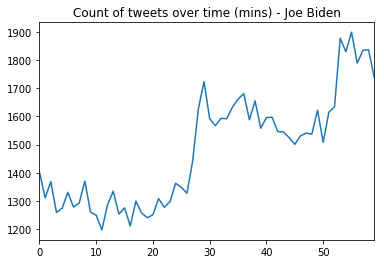

In [98]:
#Plotting count of tweets over time in mins 
import matplotlib.pyplot as plt
data_tweets_minutes["count"].plot()
plt.title('Count of tweets over time (mins) - Joe Biden')
plt.show()

In [99]:
data_tweets_hourly = data_tweets_filtered.groupby(["hour"]).sum().reset_index()
data_tweets_hourly

hour    minute  second  count
0  16.0  432247.0     0.0  10035
1  17.0  419006.0     0.0  14691
2  18.0  351347.0     0.0  12208
3  19.0  329151.0     0.0  11131
4  20.0  308822.0     0.0  10369
5  21.0  308809.0     0.0  10224
6  22.0  275569.0     0.0   9502
7  23.0  369410.0     0.0  10791

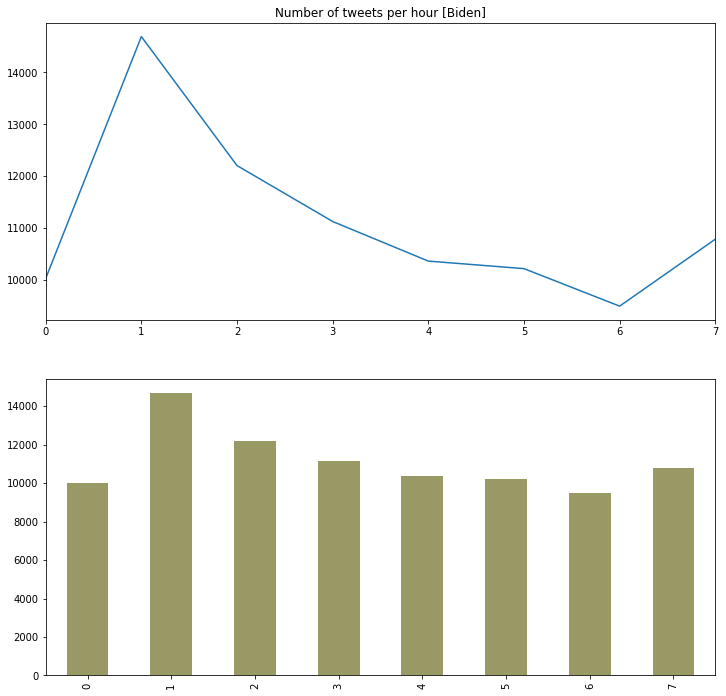

In [100]:
#plotting count of tweets over time in hours
import matplotlib as mpl
import matplotlib.pyplot as plt

f,(ax1,ax2) = plt.subplots(2,1,figsize=(12, 12))
ax1.title.set_text("Number of tweets per hour [Biden]")
data_tweets_hourly["count"].plot.bar(color='#999966')
data_tweets_hourly["count"].plot(ax=ax1)

In [65]:
#Time Series Analysis [For Trump] ... using Tweepy and Matplotlib
import tweepy
import csv
import pandas as pd

CONSUMER_KEY='eVXXvtiI6zOFyh28fqlBaLhFG'
CONSUMER_SECRET='kp5GKGF3leHagSo8J0eLVUICsLfaI76MzjGwkjtLMrPM0jK8EL'
OAUTH_TOKEN='905838785778380801-xE6cTpYspRPpNCNz7dhR7iE6akfuSkn'
OAUTH_TOKEN_SECRET='aSF81IzlsesueB9S0BncfMOCU4CnKJ8XzgyNG2WToQOFp'

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET )
auth.set_access_token(OAUTH_TOKEN,OAUTH_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)
csvFile = open('tweet_trump.csv', 'a')
csvWriter = csv.writer(csvFile)
  
for tweet in tweepy.Cursor(api.search,q="@realDonaldTrump -filter:retweets",count=1000,
                           lang="en",
                           since="2020-04-10",
                           until="2020-04-17").items():
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2020-04-16 23:59:59 @Bunny_Slick @carl_cnp @JayMercer20 @itsJeffTiedrich @realDonaldTrump Jan 31 Trump Administration declared the coro… https://t.co/6YwtfetL0n
2020-04-16 23:59:59 @biglongshoreman @RepVernonJones @thecjpearson @realDonaldTrump Why? 

Just because he feels that way doesn’t chang… https://t.co/M8wgaZKywr
2020-04-16 23:59:59 @srosner @realDonaldTrump Can you explain that stupid tweet? 911 happened in three locations, one was an open field.
2020-04-16 23:59:59 @realDonaldTrump @seanhannity And what’s hannity gonna do, you both POS”s
2020-04-16 23:59:59 @PressSec @realDonaldTrump Please don't put this idiot on my Twitter page!
2020-04-16 23:59:59 @realDonaldTrump Don’t let state governors walk all over you. If it is up to governors like @GovInslee and… https://t.co/b59BdyDTdi
2020-04-16 23:59:59 @jpjinco @Mike_Pence @realDonaldTrump @WhiteHouse @VP Who even ranks VPs?
2020-04-16 23:59:59 @jeansvv1 @itsJeffTiedrich @realDonaldTrump @seanhannity You are nuts.
2020-04-16 23:5

2020-04-16 23:59:47 @realDonaldTrump @seanhannity SCORCHED EARTH TRUTH!! 🔥🔥🔥🔥🔥
And the entire country of thinking people know it.... Sh… https://t.co/rGGEcFE2zm
2020-04-16 23:59:47 @jpostman @realDonaldTrump The thing is he can't do the job, so would be just watching cable news and raging on twi… https://t.co/PGBshYC7GX
2020-04-16 23:59:46 @realDonaldTrump Exactly!  Yes Indeed!! @realDonaldTrump @POTUS “Trump shall become My trumpet to the American peop… https://t.co/ubgXDLr1To
2020-04-16 23:59:46 @PressSec @realDonaldTrump Yes?  Then why doesn't NYC have enough?
2020-04-16 23:59:46 @SenatorLoeffler @realDonaldTrump Hey, how much stocks did you sell before the stock market crash last month?  You… https://t.co/Uva0ZiW7Hj
2020-04-16 23:59:46 @squeakycha62 @alx @TalbertSwan @realDonaldTrump I wouldn’t wish this on anyone.....
2020-04-16 23:59:46 @kiens @Valerie67798370 @YahyaJohn @TrumpWarRoom @realDonaldTrump As of today, we've tested 331k people.
DHS estima… https://t.co/92DAV5mTHb
2020

2020-04-16 23:59:31 @realDonaldTrump We have the ability to be uplifted by the smallest drafts of hope
2020-04-16 23:59:31 @johncardillo @hollandcourtney @realDonaldTrump They did it for Avenatti.....
2020-04-16 23:59:31 @realDonaldTrump Rally Rally Rally Rally Rally Rally Rally Rally

Rally Rally Rally Rally
2020-04-16 23:59:31 @goldenpdx47 @TampagirlC19655 @HeidiNBC @NBCNews @FoxNews Unknown causes?  Nope- a massive MI.  #WhatCouldItHurt?… https://t.co/OvRCXAERc3
2020-04-16 23:59:31 @real_defender @realDonaldTrump Amen!
2020-04-16 23:59:31 @KarmaSQuirr3l @Blezzie5 @FreedomWrwy @QAnonMichele11 @realDonaldTrump @FLOTUS @Angel171614 @AwareFrequency… https://t.co/uEBWuP2dTv
2020-04-16 23:59:31 @realDonaldTrump I really that is not true! https://t.co/mIlnOcEI3s
2020-04-16 23:59:31 @realDonaldTrump Mr. President or whomever is the admin of this account. Were income tax returns for this year supp… https://t.co/ISDmTGfsYf
2020-04-16 23:59:30 @realDonaldTrump @seanhannity YOU are the most unp

2020-04-16 23:59:20 @PressSec @realDonaldTrump Hmmm...I thought the virus wasn't coming to.our shores. https://t.co/M1dqKxB7z9
2020-04-16 23:59:20 @JackDubIII @PressSec @realDonaldTrump I hope you and your loved ones are wearing your DNR &amp;DNI bracelet 100% of th… https://t.co/N6SZwTFiYr
2020-04-16 23:59:20 @realDonaldTrump the country is facing the worst pandemic with cases ballooning and people dying and the president… https://t.co/7hwmzUYwXF
2020-04-16 23:59:20 @TheHolyMinx @Sanddragger @LisaLovesTrumpS @realDonaldTrump No one remembers him at Yale, A senator who voted for p… https://t.co/5r0GcWBoMg
2020-04-16 23:59:20 @realDonaldTrump 323 9559999 call me I wanna help you Mr president
2020-04-16 23:59:20 @DrDenaGrayson @realDonaldTrump @FT @jburnmurdoch He will be golfing by next weekend at Mar A Lago
2020-04-16 23:59:20 @RuthsChris @realDonaldTrump I thought you were in control of this shit. They are NOT Small Business - @RuthsChris… https://t.co/Sg3qUmbIB2
2020-04-16 23:59:20 @

2020-04-16 23:59:07 @PressSec @realDonaldTrump A joke shilling for a joke.  You must be so proud of your life lol
2020-04-16 23:59:07 @ChrisJZullo @realDonaldTrump Yea, so all of you could have hollered,Nazi!
2020-04-16 23:59:07 @PressSec @realDonaldTrump Show your work.  What are the numbers?
2020-04-16 23:59:07 @realDonaldTrump  as per usual you are a big fat fucking liar🤥🤥oh yeah heard you are IMPOTENT too. Lying flaccid di… https://t.co/v26aEAN2se
2020-04-16 23:59:07 @SwerianBot @realDonaldTrump Remember when Obama left our Ambassador (Chris Stevens) and 3 American patriots to die… https://t.co/4OdAXPPxIA
2020-04-16 23:59:07 You don't get a perfect score for failing less-bad than you could've failed.

This is especially true when people's… https://t.co/HEupKxbFNd
2020-04-16 23:59:07 @realDonaldTrump Usually gov’t executives &amp; their administrations are the most brilliant, creative minds in the nat… https://t.co/DtxItvtyg9
2020-04-16 23:59:07 @nicholek166 @_ReaalAmerican_ @realDo

2020-04-16 23:58:55 @MrBigDaddyKDawg @the_resistor @realDonaldTrump @IvankaTrump Yup read it. It's still ignorant, and I'm still one of… https://t.co/26PScWIVi4
2020-04-16 23:58:55 @NoWay7790 @realDonaldTrump @seanhannity tRUMP legacy 🤜🏽🤛 https://t.co/9bzEyuDPlX
2020-04-16 23:58:55 @realDonaldTrump Let’s get this straight... opening the states that you failed to close?  Fake leadership!
2020-04-16 23:58:55 @RepMattGaetz @POTUS @realDonaldTrump Now more than ever before..... Make America Great Again!!
2020-04-16 23:58:54 😂😂😂😂😂 @realDonaldTrump gets it done! 👍👍👍 https://t.co/NMsN1yGFZr
2020-04-16 23:58:54 @BSchorling @williamlegate @realDonaldTrump No Billy Trump thinks Pelosi talking about actual China, he’s an imbecile.
2020-04-16 23:58:54 Wow, not a poll @realDonaldTrump will enjoy seeing. Especially from his State Run Media...

https://t.co/oU2PKkGyId
2020-04-16 23:58:54 @LawrenceDHough @realDonaldTrump @CNN @CBS_Herridge Then why did he obstruct justice to prevent witnesses from tes

2020-04-16 23:58:42 @PressSec @realDonaldTrump Is he sending Putin’s ventilators back to him or is he sending the vents he stole from Colorado?
2020-04-16 23:58:42 @ShaquanMcDowell @logsplittr @RepVernonJones @thecjpearson @realDonaldTrump 😂🤣😂🤣😂🤣😂🤣😂🤣😂🤣 you’re joking, right?!
2020-04-16 23:58:42 @jayray1107 @ChrisJZullo @realDonaldTrump @seanhannity What's wrong with you that you stick up for Donald trump and… https://t.co/qmAlmPINZb
2020-04-16 23:58:42 @CNBCnow Thank you @realDonaldTrump @PressSec.  So much winning.
2020-04-16 23:58:42 @JeffreyGuterman @realDonaldTrump A bit like Lee Harvey Oswald.  Though it’s not a fair comparison, Oswald was more intellectual.
2020-04-16 23:58:42 @bacchaus351 @newtgingrich @realDonaldTrump @SpeakerPelosi Where did it come from? A magic hat?
2020-04-16 23:58:41 @real_defender @realDonaldTrump Oh look, RD thinks something is disgraceful. How very noble. So do you get paid by… https://t.co/27VOVzRWVO
2020-04-16 23:58:41 @PressSec @realDonaldTrump Reall

2020-04-16 23:58:30 @PressSec @realDonaldTrump Just because you say it over and over doesn’t make it true idiot. Your stating to sound… https://t.co/eIMd19W4Il
2020-04-16 23:58:30 @RandPaul @realDonaldTrump Lol. Who Is not on it ???
2020-04-16 23:58:30 @realDonaldTrump You should be focusing more on the Crisis at hand 🖐 COVID 19 !!  Economic Disaster !!! Hello is anybody listening 👂
2020-04-16 23:58:29 @realDonaldTrump You go first ! Start back with your maga rallies , we’ll see how it goes !! https://t.co/NLMWobL0v0
2020-04-16 23:58:29 You should talk to @POTUS @realDonaldTrump https://t.co/kXq0SjfG7A https://t.co/YXUSEomzkM
2020-04-16 23:58:29 @realDonaldTrump Keep shining the light on the TRUTH!!!!!!
TRUMP 2020
2020-04-16 23:58:29 @PressSec @realDonaldTrump STUPID MUCH? In caps so when he turns on you'll be used to it. McEnany who? Oh her, she… https://t.co/0C5amDBF6e
2020-04-16 23:58:29 @PressSec @realDonaldTrump Please be truthful on this topic. I get the political braggadocio and

2020-04-16 23:58:15 @realDonaldTrump Relax
2020-04-16 23:58:15 @peterbakernyt @AnnCoulter @AP “Democrats are blocking additional funding for the popular Paycheck Protection Progr… https://t.co/pcPR4Ilmzf
2020-04-16 23:58:15 @realDonaldTrump  there must be a NATIONAL TESTING PLAN!! You can’t avoid blame by making this the state’s responsi… https://t.co/PxSW031aFc
2020-04-16 23:58:15 @realDonaldTrump @WhiteHouse So who is this for if the Governors are empowered to open up their states?
2020-04-16 23:58:14 @TheNightWorlds @feistsheindlin1 @realDonaldTrump Hell No!   Keep our borders closed to the US.  🇨🇦
2020-04-16 23:58:14 @realDonaldTrump Again the world looks on in complete amazement at how incompetent you are. Three days ago you had… https://t.co/znQ2MU1UkD
2020-04-16 23:58:14 We need to see more of these #madeintheUSA stickers on things. @POTUS ⁦@realDonaldTrump!
May God bless America. ✝️… https://t.co/ZoHiXnVzSb
2020-04-16 23:58:14 @TrumpWarRoom @realDonaldTrump going so far to say 

2020-04-16 23:58:03 @RepSwalwell @realDonaldTrump I move to adjourn @realDonaldTrump's presidency.
2020-04-16 23:58:03 @realDonaldTrump #GovernorEvers is trying to keep Wisconsin hostage until May 26th. Many people waiting weeks for u… https://t.co/so6vR2cDGw
2020-04-16 23:58:03 @jeffsessions @realDonaldTrump AG should put Americans first and when YOU were AG you took a dive.
2020-04-16 23:58:03 @realDonaldTrump @NBCNews confused this clip with #china instead of #Chinatown #smdh
2020-04-16 23:58:03 @ConlonCharles @dbmilgate @HoodlumRIP @PressSec @realDonaldTrump Could be.
2020-04-16 23:58:03 @KAGjmn @realDonaldTrump @stevenmnuchin1 That why Congress is mentioned in the Tweet. On my show I've clearly outli… https://t.co/oSGWi9IGq1
2020-04-16 23:58:02 @AndrewPollackFL @realDonaldTrump Recall newsom and impeach all dems
2020-04-16 23:58:02 @realDonaldTrump SF has not been an epicenter of disease outbreak
The entire US is

More than 20k deaths: on YOU an… https://t.co/Dr2mExwmDB
2020-04-16

2020-04-16 23:57:51 @friewald @hardtack52 @DJames1731 @JeffreyGuterman @realDonaldTrump @Yankees He’s been through 3 pandemics.....lmao… https://t.co/ZDu8ERlvZH
2020-04-16 23:57:51 @PressSec @realDonaldTrump No, that would be the governors.
2020-04-16 23:57:51 @RepVernonJones @realDonaldTrump The people are behind you and the President, have Faith.
2020-04-16 23:57:51 @gymmom4dazy @Ricky13823651 @wdunlap @realDonaldTrump The world will never forget or forgive republicans.  You are… https://t.co/wRjJelM1FD
2020-04-16 23:57:50 @realDonaldTrump DRUMPF FAILURE #TrumpFailedAmerica #TrumpOwnsEveryDeath #WhereAreTheTestKits #VoteBlueToSaveAmeruca AGAIN
2020-04-16 23:57:50 @Goldstatetimes @realDonaldTrump Thank you for posting the entire thing I spent hours looking for the one from yest… https://t.co/hn8vXoFjyr
2020-04-16 23:57:50 @JeffFarquhar3 @halfTHAequation @mandysharper @Bayou_Bengals @VsRisk @glamelegance @Acosta @realDonaldTrump Fed the… https://t.co/KOVWeHX40G
2020-04-16 23:57:50 @Chr

2020-04-16 23:57:40 @DanaGentryLV @POTUS @realDonaldTrump Big job for @GovSisolak !!
2020-04-16 23:57:40 @realDonaldTrump Today in Lansing, Michigan just a couple of the protestors that Trump said proudly "like me" and "… https://t.co/TPWCls3ZaY
2020-04-16 23:57:40 @realDonaldTrump It's your fault it's closed. You spent 2 months of calling this a hoax.
2020-04-16 23:57:40 @PressSec @realDonaldTrump You're going to be great at this https://t.co/pd41RnhCGy
2020-04-16 23:57:39 @RepMattGaetz @POTUS @realDonaldTrump How are you guys going to decide on who has their nose up Trumps ass and for… https://t.co/FwOguWFSzG
2020-04-16 23:57:39 @JustLaughItsOk @SharkRadioNet @realDonaldTrump @VP @GOP @senatemajldr Projecting, as usual
2020-04-16 23:57:39 @realDonaldTrump @OANN @SenThomTillis On PPP Biden up by one in a state R’s won last time. NC. Tillis down by 7. Hmmmmm..,
2020-04-16 23:57:39 Spent $350 on lawn and garden / shed necessities today. And I spent my money at @Lowes because the CEO dud

2020-04-16 23:57:29 @realDonaldTrump @seanhannity No @realDonaldTrump you are the reason we hate politicians, and liars and cheats
2020-04-16 23:57:29 1. I watched this shit show tonight. If someone like @realDonaldTrump was my 6th grade teacher. I would have known… https://t.co/XtoZM7cvSJ
2020-04-16 23:57:29 @David_Leavitt @RiseUp4ALL @realDonaldTrump They want it ain’t no different than the media showing his rallies revv… https://t.co/QHQPvkrlF6
2020-04-16 23:57:28 @voojayvoo @JoJoFromJerz @PressSec @realDonaldTrump Rotten to the core ~ she will drive us all nuts
2020-04-16 23:57:28 @realDonaldTrump That's because YOU LIED TO ALL OF US.
2020-04-16 23:57:28 @humphrey_cecile @_ReaalAmerican_ @WhiteHouse @realDonaldTrump We are far beyond the need for proofs.
You have more… https://t.co/whLe9FI2sx
2020-04-16 23:57:28 @Red_Warrior5 @DavidBrodyCBN @realDonaldTrump @POTUS You have nothing bad to say about his behavior? Not one thing?
2020-04-16 23:57:28 @realDonaldTrump More bullshit and l

2020-04-16 23:57:15 @realDonaldTrump Let's shut them down NOW!!! https://t.co/hZrQVRvgZD
2020-04-16 23:57:15 @ccameron2004 @IMPeachy1331 @realjohnbarrett @DerrickMaine1 @dradar59 @DeAnna4Congress @realDonaldTrump Oh, sweetie… https://t.co/Lo3UmSHFwr
2020-04-16 23:57:15 @thedailybeast @MollyJongFast Who cares? She’s a plastic fake! ... Loved @FLOTUS ‘s perfectly coiffed hair, makeup… https://t.co/jClhBJ8XPJ
2020-04-16 23:57:15 @realDonaldTrump Trump’s Approval Rating Collapses To 39% With Independents. #winning
2020-04-16 23:57:14 @Outspok06973644 @JesseTruthHurts @glamelegance @itsJeffTiedrich @realDonaldTrump That’s his daughter if your unawa… https://t.co/xZ5vKyU64Q
2020-04-16 23:57:14 @thomascollins92 @GrahamAllen_1 @realDonaldTrump there is point of diminishing returns tho !!
2020-04-16 23:57:14 @NoGopRINOs @drscottjensen @GovTimWalz @realDonaldTrump Why is it the govs fault? The 7 page document for death cla… https://t.co/k61nAd8PGF
2020-04-16 23:57:14 @realDonaldTrump Yes. Hurry!

2020-04-16 23:57:03 @PressSec @realDonaldTrump Are you high? #CoronavirusLiar
2020-04-16 23:57:02 @Ninangel567 @mbrichards1967 @3YearLetterman @realDonaldTrump don't forget the water bed without financing. what's not to envy?
2020-04-16 23:57:02 @daggerandpen @JoeySalads @realDonaldTrump lol Social media influencer is a job.
2020-04-16 23:57:02 @COsweda @realDonaldTrump @secupp You, as an American citizen, have no rights.  Keep voting Democrat.
2020-04-16 23:57:02 @realDonaldTrump Sit-down dining, movie theaters, sporting venues, places of worship) can operate under strict phys… https://t.co/Rp0wpKVkoI
2020-04-16 23:57:02 Blue check thinks he can get between @realDonaldTrump and working Americans. https://t.co/rY4pyNe3U3
2020-04-16 23:57:02 @OnlyKathy43210 @tombasler @realDonaldTrump How big is her garbage disposal 🤔
2020-04-16 23:57:02 @gtconway3d @ayawill @realDonaldTrump Trump is unfair to serve.
2020-04-16 23:57:02 @letsfinishthis7 @cjtruth @realDonaldTrump Optics/appearances... al

2020-04-16 23:56:49 @PressSec @realDonaldTrump We have tested 1% of the population, you shameless liar. #TrumpLiesPeopleDie
2020-04-16 23:56:49 @MidlerBetty @jennerific713 @realDonaldTrump Hahahahaha that’s the last thing we need
2020-04-16 23:56:49 @JoeySalads @realDonaldTrump Arent you that nazi that pissed in their own mouth?
2020-04-16 23:56:49 @PressSec @deneenborelli @realDonaldTrump OMFG.
2020-04-16 23:56:49 @Glad2baNana @Mark_E_Lewis @JCee48 @EugJHawk @realDonaldTrump Because that would mean you're hypocrites.
2020-04-16 23:56:49 @ImJacksDejaVu @real_defender @realDonaldTrump It IS very interesting RD ALWAYS seems to be the first Twitter Accou… https://t.co/5oXqAM4ena
2020-04-16 23:56:49 @SenatorLoeffler @realDonaldTrump Your not even elected and one the first things you do is illegal.  The money you… https://t.co/8GTep3cz7f
2020-04-16 23:56:48 @realDonaldTrump If Taiwan and SKorea, Denmark, Norway have been able to prevent so many death
and cases, why dont we copy their action

2020-04-16 23:56:37 @Denden49888086 @realDonaldTrump How Sad is that!!
2020-04-16 23:56:37 @realDonaldTrump It scares me the govs won't do justice for us timely and will hold us hostage.
2020-04-16 23:56:37 @SPQ_ESQ @NoWay7790 @realDonaldTrump @seanhannity Where was Nancy when she said shutting down travel was "racist?"… https://t.co/3FR8fibN3g
2020-04-16 23:56:37 @JeffreyGuterman @realDonaldTrump And you sir are full of it.
2020-04-16 23:56:37 @realDonaldTrump See Trumpy it wasn’t your decision. 
Just less then 8 more months and we will pack you off to  eld… https://t.co/NgnCnO9Qpc
2020-04-16 23:56:36 @SexCounseling @realDonaldTrump Trump sex bot
2020-04-16 23:56:36 @realDonaldTrump Let's go.
2020-04-16 23:56:36 @toda1848 @JBryanEure @cnnbrk @BarackObama @JoeBiden @realDonaldTrump It not that you “showed me up on this” it’s t… https://t.co/kys2oS2YNX
2020-04-16 23:56:36 @realDonaldTrump We need to open up NY and our cities very soon. We can’t wait on democratic governors who don’t ha…

2020-04-16 23:56:25 @PressSec @realDonaldTrump I love that you were able to jump into your new position and lie so quickly!
2020-04-16 23:56:25 @JohnsomSheila @ErinLoughry @BridgetSterli19 @realDonaldTrump Delusional (look it up).
2020-04-16 23:56:25 @morgulthedrelb @Aguyyouknow2 @comfy_wisdom @PackersFavreFan @realDonaldTrump pathetic and afraid. https://t.co/3SbeXxZoFx
2020-04-16 23:56:25 @Impeach_Today @RogueAltGov @PressSec @realDonaldTrump It’ll be like watching Tomi Lehren on steroids with access t… https://t.co/od6qZ2LEWs
2020-04-16 23:56:25 @realDonaldTrump Thank GOD for President Donald Trump! America will succeed like never before. We got this! 𝙏𝙍𝙐𝙈𝙋/𝙋𝙀𝙉𝘾𝙀 🇺🇸
2020-04-16 23:56:24 Here’s to opening our government ⁦@realDonaldTrump⁩ ! 🇺🇸 https://t.co/BhqTrcqc6l
2020-04-16 23:56:24 @PressSec @realDonaldTrump WRONG! Trump bought 60 TONS from a Sanctioned Russian company, with tax-payers money, af… https://t.co/eBdwazoPf4
2020-04-16 23:56:24 @SCPatriotSC @realDonaldTrump @POTUS @Wh

2020-04-16 23:56:10 @PodSaveAmerica @KenTremendous @realDonaldTrump everyone told you baby hands, you're just too stupid and busy golfi… https://t.co/8Coa1gjta7
2020-04-16 23:56:10 Why would @realDonaldTrump bother with any suggestions from @MittRomney anyway?

The man profited from destroying c… https://t.co/P7pccs1eZT
2020-04-16 23:56:10 @Mike_Pence @realDonaldTrump @WhiteHouse Common sense he doesn't even know what that means
2020-04-16 23:56:10 @PressSec @realDonaldTrump You are delusional.
2020-04-16 23:56:10 @funder @realDonaldTrump Coolidge?
2020-04-16 23:56:10 @firebird_gal @brianlilley @HaveWeAllGoneM1 @realDonaldTrump @washingtonpost Exactly. This is why he wanted unlimited spending...
2020-04-16 23:56:10 @Tack_in_FL @EugJHawk @realDonaldTrump This 👆
2020-04-16 23:56:10 If a hot spot develops? @realDonaldTrump so if a bunch more Americans die? We will figure it out then ..
2020-04-16 23:56:10 @realDonaldTrump   The blood of over 34,000 Americans (possibly more, since many dea

2020-04-16 23:55:59 @ryu_noire @jo_USA_ @annandrsn3_ann @TrumpTrumpTru12 @Hoosiers1986 @SpeakerPelosi @realDonaldTrump I am not a boy.
2020-04-16 23:55:59 @RepMattGaetz @POTUS @realDonaldTrump Oh god this is dumb sounding.
2020-04-16 23:55:58 @PressSec @realDonaldTrump The Trump Fluffer says what now?🙄
2020-04-16 23:55:58 @ScottySalazarNM @realDonaldTrump @PressSec Was that this afternoon?  LOL  🙄
2020-04-16 23:55:58 @Hoping4agirl @TalbertSwan @realDonaldTrump Sure. You and Bishop will both be hot in Louisiana.
2020-04-16 23:55:58 @PressSec @realDonaldTrump #45Lies #NowYouLieForHim #VoteBlue2020 is that what he wrote down for you to say?While y… https://t.co/Vf8K4WF1zN
2020-04-16 23:55:58 @Jordan29204982 @realDonaldTrump Water Boy😂😂😂
2020-04-16 23:55:58 @vanjimbo @BrandonBeckham_ @WhiteHouse @realDonaldTrump Lol fool Trump didn't even know untill yesterday, silly he… https://t.co/wbF8wdW7ii
2020-04-16 23:55:58 @realDonaldTrump Eff off.. not interested in ANYTHING you have to say.
2020-

2020-04-16 23:55:48 @Reib7777 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA No ma'am all my PTSD came from Iraq.
2020-04-16 23:55:48 @stripercat51 @Porter_Anderson @Acosta @wolfblitzer @WhiteHouse @realDonaldTrump Trump’s idea😀😅😅😂😂🤣🤣🤣🤣
2020-04-16 23:55:48 @SenMikeLee @realDonaldTrump Oh great! That awful Anti-American politician who continues to give all our jobs away… https://t.co/VdLL9VQxsj
2020-04-16 23:55:48 @natasharothwell @realDonaldTrump Truly, this series is my single favorite part of twitter.
2020-04-16 23:55:48 @MatthewJshow @realDonaldTrump You are everywhere kiss butter
2020-04-16 23:55:48 @realDonaldTrump @seanhannity Look in the mirror Donny. Your talking about yourself . Most Americans hate you! Lies… https://t.co/2lyvDsRaIx
2020-04-16 23:55:48 @ShavawnRene @realDonaldTrump .:.looks confused? He is confused...from Day 1. He’s a failed POTUS...he can’t read;… https://t.co/Y6RWr16iln
2020-04-16 23:55:48 @BMockner @tonyposnanski @realDonaldTrump @EKbigdog I

2020-04-16 23:55:35 You can't hide the Sun with your finger.🤪🙄👀‼We the People see you for the 🐀 you are. @realDonaldTrump https://t.co/kKVcleFGwe
2020-04-16 23:55:35 @realDonaldTrump Hopefully all Americans are watching your briefing and seeing that most of the #MSM media is in wi… https://t.co/HiFLUv3j3R
2020-04-16 23:55:35 @PressSec @realDonaldTrump Heaven AND Earth?  I’m sure he hasn’t even lifted a rock in his entire life.  This is so embarrassing for you.
2020-04-16 23:55:35 Here’s the truth Kayleigh @PressSec and Donnie @realDonaldTrump ! The corrupt and inept @WhiteHouse is lying as alw… https://t.co/uO9mTAsXJt
2020-04-16 23:55:35 @realDonaldTrump Thank you MR. President! This epidemic has hit some harder than others, but this should help us get back on our feet again!
2020-04-16 23:55:34 @BEmlian @RichforGA @DanCrenshawTX @realDonaldTrump Because Chase is staring at billions in mortgage default, and t… https://t.co/QHd3YgWXhw
2020-04-16 23:55:34 @PressSec @TeamTrump @WhiteHouse

2020-04-16 23:55:23 @gtconway3d @theroamingtiger @realDonaldTrump As is the person who will attempt to  lead FOX Viewers to believe there was a COVID-1.
2020-04-16 23:55:23 @KlatuBaradaNiko Reminds me of @realDonaldTrump entering his White House presser https://t.co/OYQ0A4ooUu
2020-04-16 23:55:23 @dak0mish @TalbertSwan @real_defender @realDonaldTrump Have a look at Epstein's flight log. Study that and then STF… https://t.co/MqJbvZypdn
2020-04-16 23:55:23 @Terrenc43516485 @realDonaldTrump Have you seen Barry &amp; a few bad apples are planning to remove @realDonaldTrump by… https://t.co/sF7h9c8NF0
2020-04-16 23:55:23 @jheil @realDonaldTrump Watching you on @DeadlineWH. Surprised you haven't used the Squire of Gothos reference and… https://t.co/2qtQ2CL5NW
2020-04-16 23:55:23 @realDonaldTrump  was asked if protesters should listen to local authorities and he said, “I think they’re listenin… https://t.co/NlTRmKgJOf
2020-04-16 23:55:23 @hiffeyfc @jennerific713 @realDonaldTrump You love the 

2020-04-16 23:55:13 @TamaraLeigh_llc @POTUS @realDonaldTrump @ThyConsigliori @TheScalpeledge @JohnBasham @TrumpsGAGirl @RealPeachyKeen2… https://t.co/xIHZ0INUlo
2020-04-16 23:55:13 @RepMattGaetz @POTUS @realDonaldTrump This should scare the sh*t out of every American. 
#WhereAreTheTests 🦠
2020-04-16 23:55:13 @MichaelRapaport @DonaldJTrumpJr @realDonaldTrump Won't show him dancing with his wife or the other adults 👀🤔
2020-04-16 23:55:13 @CaslerNoel @realDonaldTrump I don't believe what you said, I hope you don't either!!
2020-04-16 23:55:13 @realDonaldTrump This is all Carol Baskine's fault
2020-04-16 23:55:12 @TamaraLeigh_llc @1GigiSims @POTUS @realDonaldTrump @ThyConsigliori @JohnBasham @_IamAnita_D @JVER1 @Beg1Girl… https://t.co/JAG7HRz3td
2020-04-16 23:55:12 @realDonaldTrump Indeed!
2020-04-16 23:55:12 @DonnorummoSam @SexCounseling @realDonaldTrump Hell, I would be a better President than trump.   I admit my mistake… https://t.co/SS85QSrCwv
2020-04-16 23:55:12 @realDonaldTrump Maybe

2020-04-16 23:55:01 @PressSec @realDonaldTrump .....ladies and gentlemen, please take your seats. Count with me-3...2...1...and we’re off!
2020-04-16 23:55:01 @realDonaldTrump maybe Mexico will pay for the wall now to stop all the COVID-19 infected Americans from crossing boarder #BuildTheWall
2020-04-16 23:55:01 @kylesby @realDonaldTrump Trump must reword his statement, in order to make it accurate. 
Truth: "I've made a mess… https://t.co/sdZeNSU7LZ
2020-04-16 23:55:01 @PressSec @realDonaldTrump I guess it’s your job to continue these lies! Where are the tests for 300+ million people?
2020-04-16 23:55:01 @realDonaldTrump Mr. President as I stated a couple of days ago your poll numbers are sliding the longer this Coron… https://t.co/xRiQs0RunU
2020-04-16 23:55:01 @johncardillo @pnjaban @realDonaldTrump But they let Avenatti out.🤦‍♀️
2020-04-16 23:55:01 Yoh @realDonaldTrump just say #one thing about everything going on.......nothing more😷😷😷💯💯 https://t.co/NPz1Bfanq1
2020-04-16 23:55:01 

2020-04-16 23:54:49 @Mike_Pence @realDonaldTrump @WhiteHouse Using Trump and “best common sense” in the same sentence is a dead give aw… https://t.co/w30JJGzuS3
2020-04-16 23:54:48 @realDonaldTrump This is 45.. https://t.co/yHSu7H7jDr
2020-04-16 23:54:48 @PlaysTrumpCard @realDonaldTrump @seanhannity Democrats think the small business money should be spread across a co… https://t.co/z70Q6D43pR
2020-04-16 23:54:48 @SenatorLoeffler @realDonaldTrump Didn't you secretly sell stocks right before this happened?
2020-04-16 23:54:48 @gtconway3d @realDonaldTrump Germans aren’t afraid to elect a brilliant woman.
2020-04-16 23:54:48 @WHO President Trump @realDonaldTrump thumped that payroll! https://t.co/HIP91qDSOw
2020-04-16 23:54:48 @PressSec @realDonaldTrump McAintAny pissing into the wind. Problem is, the wind is shifting, and she's gonna catch it square in the face.
2020-04-16 23:54:48 @spread_we @Justintx_20 @ChanelRion @realDonaldTrump Good job
2020-04-16 23:54:48 Thank you @realDonaldTrump

2020-04-16 23:54:35 @PressSec @realDonaldTrump how many people are there in the united states blow up doll?
2020-04-16 23:54:35 @bhahn1969 @Cathygraphics1 @JeffreyGuterman @realDonaldTrump @OANN @SenThomTillis We stupidly believed that we coul… https://t.co/E4oWn6MWR4
2020-04-16 23:54:35 @PressSec @realDonaldTrump THAT’S BARELY 1% OF THE ENTIRE POPULATION OF THE COUNTRY.  HARDLY NUMBERS TO GLOAT ABOUT...
2020-04-16 23:54:35 @PressSec @realDonaldTrump Lying liar who lies!
2020-04-16 23:54:35 @realDonaldTrump Bad idea pal
2020-04-16 23:54:35 @jackdoranjr @IlhanMN @realDonaldTrump MLK criticise people like Donald trump
2020-04-16 23:54:35 @PressSec @realDonaldTrump If you say it maybe it will become true?
2020-04-16 23:54:35 @PressSec @realDonaldTrump Trump’s a #CoronavirusLiar and you were hired to push his lies. People are dying everyda… https://t.co/mDfREauqnp
2020-04-16 23:54:35 @realDonaldTrump Hi Donald.  Your awesome.
2020-04-16 23:54:34 @TheRightMelissa @realDonaldTrump It pays we

2020-04-16 23:54:22 I love this! Pass it around, maybe the #IdiotInChief #CoronavirusLiar #KingTrump #IMPOTUS45MORON… https://t.co/eiFKjJ7VNa
2020-04-16 23:54:22 @real_defender @realDonaldTrump I myself 100% agree, this is why: https://t.co/hYUJkuHgOf
2020-04-16 23:54:22 @DebraCu56626665 @dyetur63 @SenMikeLee @realDonaldTrump Mike Lee is a  traitor.
2020-04-16 23:54:22 @Mike_Pence @deneenborelli @realDonaldTrump @WhiteHouse Resisters are so pathetic....and entertaining...#KAG2020
2020-04-16 23:54:21 @PressSec @IvankaTrump @realDonaldTrump Moscow ?
2020-04-16 23:54:21 @GinoDMarchetti2 @MAGAMedium2 @realDonaldTrump @POTUS @parscale @DanScavino Really who has been removed?🤷
2020-04-16 23:54:21 @AlexCamacho__23 @hrtablaze @realDonaldTrump Exactly👌
2020-04-16 23:54:21 @Rectitude20 dont worry, never gonna open based on 'plan' of @realDonaldTrump
2020-04-16 23:54:21 @PressSec @realDonaldTrump 3.5 million tests in a country of 330 million. Your percentages suck.
2020-04-16 23:54:21 @realDonald

2020-04-16 23:54:11 @RepMattGaetz @POTUS @realDonaldTrump What a waste and a joke that Mr DUI with no credibility is included in this f… https://t.co/ocGRCVij6a
2020-04-16 23:54:11 @eugenegu @realDonaldTrump And people get better just by going to work
2020-04-16 23:54:11 @realDonaldTrump From a an owner of Ill. Funeral Home: Asking me to help.The CDC told Doctors that if a person test… https://t.co/QB3jcJZQgI
2020-04-16 23:54:11 @PeteMcCool1 @mitchellvii @LadyGluvs @realDonaldTrump Pete Give Trump a break-He’s working non stop 2 protect our c… https://t.co/z4mPRKObRg
2020-04-16 23:54:11 @PressSec @realDonaldTrump So where can I go to get tested?
2020-04-16 23:54:11 @seansuchma_14 @VoteBlueNov3rd @realDonaldTrump That's something that doesn't have a clear answer yet...atleast not… https://t.co/mHpDkBaKwt
2020-04-16 23:54:11 @Christie_D22 @SenCoryGardner @WHO @realDonaldTrump @foxandfriends Yes Ma’am! https://t.co/H6wK87lZGo
2020-04-16 23:54:10 @MitchelJamess @cjtruth @realDonaldTrump Or

2020-04-16 23:53:58 @sydrasmith @bamainsider @realDonaldTrump Dummy
2020-04-16 23:53:58 @FCLittle1 @alx @TalbertSwan @realDonaldTrump 0 is closer to being true than the projected low of 100,000 dead. 

Let that sink in.
2020-04-16 23:53:58 @carl_cnp @JayMercer20 @itsJeffTiedrich @realDonaldTrump Yes that was last time he golfed 14 - 15 of Feb out the 2… https://t.co/3np7nmH3pM
2020-04-16 23:53:58 @realDonaldTrump @seanhannity Do everyone a favour and shut up. You are a dangerous man,  stick to the suggested di… https://t.co/L2xIeoknIU
2020-04-16 23:53:58 @Brett37305141 @PressSec @realDonaldTrump I didn’t say other nations haven’t given us tests
2020-04-16 23:53:58 @catturd2 @RampageRantz @realDonaldTrump The evilness of her and the democrats is to hold people, take their privil… https://t.co/iwoK6TMvLR
2020-04-16 23:53:58 @realDonaldTrump And America, this is the president of the United States who behaves like a 9 year old kid. (One of… https://t.co/5dFhZRYKkm
2020-04-16 23:53:58 @RepV

2020-04-16 23:53:49 @realDonaldTrump People are traumatized by this and @TeamPelosi only thinks of a "get back" smear &amp; rebuking… https://t.co/pQUWsw22ly
2020-04-16 23:53:48 OPENING UP AMERICA AGAIN‼

Thank you, President @realDonaldTrump! 🇺🇸💯🦅 https://t.co/fBZE3XdWUW
2020-04-16 23:53:48 @hesanihilist @lang2007 @1alx1 @jiaxionghu @BastiSitoLP @real_defender @realDonaldTrump Nancy Pelosi and the Media… https://t.co/sLzq5PhtQl
2020-04-16 23:53:48 @gtconway3d @realDonaldTrump Can we elect her king of America ?
2020-04-16 23:53:48 @CraigKvamme @Lairdriver @Envirocite @dvillella @WhiteHouse @realDonaldTrump And an even bigger question: Why did I… https://t.co/wBsjf8Rq7M
2020-04-16 23:53:48 @NminMic @the_resistor @realDonaldTrump @IvankaTrump Than it was an error
2020-04-16 23:53:48 NOT EXACTLY SURE THAT ROMNEY EVEN WANTED ON THIS @realDonaldTrump CHAOS OF A COUNCIL

DOES NOT DO ANYTHING FOR HIS… https://t.co/DzTPFAkD77
2020-04-16 23:53:48 @joshtpm HOW STUPID ARE YOU #TRUMP @realDonaldTr

2020-04-16 23:53:35 @realDonaldTrump Better open it soon or we'll open it by force. Already have stores that have new drive throughs. R… https://t.co/Tu5AD5nBy7
2020-04-16 23:53:35 @PkSlope @DeAnna4Congress @realDonaldTrump SO WHY DID SHE DELETE IT?
2020-04-16 23:53:34 @TalbertSwan @real_defender @realDonaldTrump He’s no Bishop (at least not one promoting our benevolent God).  This… https://t.co/UA0ILQoJiI
2020-04-16 23:53:34 @PressSec @realDonaldTrump Oh please, just stop with the flowery B'S. Do you really think making a fool of yourself… https://t.co/qpoTKSgMyg
2020-04-16 23:53:34 Works for me.  How about you @realdonaldtrump? You game? How about you, @VP? https://t.co/bDNw4JTG3U
2020-04-16 23:53:34 @Christo41978344 @AngelaBelcamino @realDonaldTrump This asshole is actually talking about the guy who works for fre… https://t.co/QoV2Gvyh70
2020-04-16 23:53:34 Buuuuut NO😞 he is leaving schools that are closed to remain closed😭😭😭.like really @realDonaldTrump i really was sta… https://t.

2020-04-16 23:53:25 @PackersFavreFan @realDonaldTrump Samir, why don't you stay out of American politics? It's obvious you're from a ca… https://t.co/Vkiv5WsRbQ
2020-04-16 23:53:25 @PressSec @realDonaldTrump Is it the box dye that makes y’all so idiotic?
2020-04-16 23:53:24 @JasonRobergeVA @realDonaldTrump YES, YES, YES AND YES!! STARTING RIGHT NOW!! WE DON’T NEED ANY MORE CHINESE JUNK.
2020-04-16 23:53:24 @NV96308613 @dcexaminer @realDonaldTrump @TianaTheFirst Not when the other choice is #DroolBucketJoe
2020-04-16 23:53:24 @PressSec @realDonaldTrump Nationwide,  people who aren't showing symptoms are not allowed to get tested
2020-04-16 23:53:24 @WhiteHouse @realDonaldTrump THIS IS WHY HE THINKS KIT'S SAFE! DO YOU WANT TO BE THE 2 TO 3% WHO DIE?! https://t.co/QSyFDhyIQF
2020-04-16 23:53:24 @realDonaldTrump I pray this works.
2020-04-16 23:53:24 @realDonaldTrump the governors said they were going to do this before you did
2020-04-16 23:53:24 @Jrock821 @PressSec @realDonaldTrump Oh I d

2020-04-16 23:53:13 @realDonaldTrump I do think before China started the death of corona virus it maybe already spread all over the wor… https://t.co/WZuiaGSE9u
2020-04-16 23:53:13 @RepBlaine @realDonaldTrump @VP @stevenmnuchin1 @POTUS Think about YOUR constituents and not what this idiotic pres… https://t.co/c5gKIkja8E
2020-04-16 23:53:13 @JeremiahMackim @SwangoKevin @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump No, I am pissed that he… https://t.co/pziIlXhJc4
2020-04-16 23:53:13 @kittykattmiss @MusicIsMyMuse83 @JobsPsw @carolmswain @masf2000 @BlackVoices4DJT @TeamTrump @realDonaldTrump… https://t.co/AVdGceZNU6
2020-04-16 23:53:13 @lareinedejade @realDonaldTrump I just sent you a DM, but I *almost* accidentally sent it to the person I'm referri… https://t.co/0I40P6Azab
2020-04-16 23:53:13 @PressSec @realDonaldTrump Sweetie, do yourself and your future a favor....go take a vacation into one of the hospi… https://t.co/AScdW7Diob
2020-04-16 23:53:13 @realDonaldTrump hope

2020-04-16 23:53:00 @realDonaldTrump Chinatown had or has no outbreak.Keep looking eventually you'll look in the mirror.
2020-04-16 23:53:00 @PressSec @realDonaldTrump We need tests or we aren't safe! https://t.co/SgM90wlylg
2020-04-16 23:53:00 @RealBasedMAGA @Females4DJT @realDonaldTrump Let it be on them
2020-04-16 23:53:00 @ChrisJZullo @realDonaldTrump Look at real news, not Fox propaganda,  or better yet do your own research.
2020-04-16 23:53:00 @RepVernonJones @realDonaldTrump Well said... it’s not a Dem vs Rep issue. It’s which policies work for myself, my… https://t.co/bmX5hjDrig
2020-04-16 23:53:00 After all this some ingrate will come to say an impeachment statement For him? 
OMG.  Some people are mines.… https://t.co/Rw6wnv3s4i
2020-04-16 23:53:00 @w_terrence @realDonaldTrump Lol...you are such a goob!

I love it!❤
2020-04-16 23:53:00 @PressSec @realDonaldTrump Counties don't fall ill and die from a virus. What is the percentage of the US population?
2020-04-16 23:52:59 @real

2020-04-16 23:52:48 @PressSec @realDonaldTrump New on the job and already lying. 👏🏼
2020-04-16 23:52:48 @realDonaldTrump The video is from Feb. 24th.  What did you say that day? “The Coronavirus is very much under contr… https://t.co/YHr9oJC0zO
2020-04-16 23:52:48 @SenatorLoeffler @realDonaldTrump Now you'll have a real "heads up " on which stocks to buy and sell ahead of the m… https://t.co/n4eGsJVmv4
2020-04-16 23:52:48 @realDonaldTrump This needs to be a staple here until after the election. And the one with Deblasio as well. I beli… https://t.co/qNvPti5DbM
2020-04-16 23:52:48 @gtconway3d @realDonaldTrump That many?! 🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️
Ridiculous!!! 🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️🤦🏼‍♀️
2020-04-16 23:52:48 @PressSec @realDonaldTrump then turn the ventilators to Kushner😂
2020-04-16 23:52:48 @SenatorLoeffler @realDonaldTrump The Majority of the American people do not trust you. How’s that Ethics Committee… https://t.co/PHOPuXJf76
2020-04-16 23:52:48 @DeAnna4Congress @realDonaldTrump NYC ain't openin

2020-04-16 23:52:38 @PressSec @realDonaldTrump Trump has succeeded in making America “first”  — leading the world in the number of covi… https://t.co/SgxI4bxQ7W
2020-04-16 23:52:38 @WhiteHouse @realDonaldTrump Soft guidelines because Trump is too afraid to be our leader.  A leader makes a call a… https://t.co/n0vi0pFhKb
2020-04-16 23:52:38 @realDonaldTrump With all due respect, our country needs to heal right now. I am a healthcare worker and I need lea… https://t.co/vK99XqWGER
2020-04-16 23:52:38 @PressSec @realDonaldTrump Oh lord sweet pea, not you TOO! When can we get a White House Press Secretary that is no… https://t.co/l27dHLfp2M
2020-04-16 23:52:37 @realDonaldTrump Chinatown isn't the same as China, dumbass. https://t.co/PCQsUHQvBp
2020-04-16 23:52:37 @Dpcm20 @_ReaalAmerican_ @realDonaldTrump Is that what they tell you in Russia? The 1st lady Stormy Daniel's would… https://t.co/vEOexyicQ4
2020-04-16 23:52:37 @the_resistor @realDonaldTrump @IvankaTrump I got my check and know man

2020-04-16 23:52:27 @PrisonReformMvt @Charles91301309 @golfing_a @jeffbennett63 @11shroomz @camdy_2cane @TalbertSwan @real_defender… https://t.co/qH0nQCKkIM
2020-04-16 23:52:27 @MayorOfTwitr @RepMattGaetz @POTUS @realDonaldTrump Lmao! Some SOB let’s her out every morning.
2020-04-16 23:52:26 @AynRandPaulRyan Don’t argue with FOOLS, you look foolish. She is a democratic, has spoke poorly of… https://t.co/nTbPbxd4Ug
2020-04-16 23:52:26 @PressSec @realDonaldTrump No we do not. I wish it were not so, but that is the truth. We have very LITTLE testing… https://t.co/pQDi7XdWCZ
2020-04-16 23:52:26 @realDonaldTrump Dopey Donald is such a bad LIAR…

https://t.co/qCaHWZeUBC
2020-04-16 23:52:26 @NatalieJHarp @realDonaldTrump what?
2020-04-16 23:52:26 @brae_de @gtconway3d @realDonaldTrump 😂😂😂😂😂Sure thing🤣🤣🤣🤣🤣
2020-04-16 23:52:26 @PaulLidicul @PressSec @realDonaldTrump Mic drop!! F-ing love this response.
2020-04-16 23:52:26 @real_defender @realDonaldTrump It is our governors who are making respons

2020-04-16 23:52:17 @SenatorLoeffler @realDonaldTrump Wtf why would you pick here she should be in jail smh
2020-04-16 23:52:17 @TheRealDealHol3 @realDonaldTrump Oh and so you say we can't love our Homeland where we were born because it's a si… https://t.co/b6YsaeTxBL
2020-04-16 23:52:17 @DavidWohl @realDonaldTrump @FoxNews @OANN Yeah because what we need is more racism than fox offers to be fed to tr… https://t.co/TbHs84UC3f
2020-04-16 23:52:16 @PressSec @realDonaldTrump You are so ridiculous.
2020-04-16 23:52:16 @realDonaldTrump Wow. What a non-document. Way to go, you magnificent orange failure.
2020-04-16 23:52:16 @PressSec @realDonaldTrump Are you kidding me with all these tweets?  You are trying way too hard....
2020-04-16 23:52:16 @JeffFarquhar3 @halfTHAequation @mandysharper @Bayou_Bengals @VsRisk @glamelegance @Acosta @realDonaldTrump Jesus was a liberal.
2020-04-16 23:52:16 @realDonaldTrump Blah blah blah, just another propaganda moment from the most incompetent man on the fa

2020-04-16 23:52:03 @realDonaldTrump @seanhannity That's my president in all his disgrace and belittling childish rants. The one who ta… https://t.co/GAFRHc5lSw
2020-04-16 23:52:03 I don't know how @realDonaldTrump is going to open up the country and declare mission accomplished without all the… https://t.co/kjM1LCr0zr
2020-04-16 23:52:03 Interessant?  @realDonaldTrump: 'Crazy Nancy Pelosi deleted this from her Twitter account. She wanted everyone to p… https://t.co/Vxgcs8GB1Y
2020-04-16 23:52:02 It’s coming soon @HillaryClinton   Cc: @TomFitton @JudicialWatch  @realDonaldTrump https://t.co/iohOOb6F0r https://t.co/WET0IUbHjo
2020-04-16 23:52:02 @ledbetter24 @real_defender @realDonaldTrump If you had actually read the plan, doesnt sound very normal.  Country… https://t.co/6OnKpJuYRi
2020-04-16 23:52:02 More twisted FAKE TRUTHS! @PressSec @realDonaldTrump https://t.co/G611S8Sc0x
2020-04-16 23:52:02 @PressSec @realDonaldTrump He is sending people to heaven because of his total incompetenc

2020-04-16 23:51:52 @AreteData @onnyeung @ttlaurent @JTMarshIII @Kevin_One77 @ddbelle @junes1452 @leggomysuperego @idris_elphaba… https://t.co/MrYUvMATmJ
2020-04-16 23:51:51 @realDonaldTrump She's not aged well since January.
2020-04-16 23:51:51 @Sunny64498448 @KATUNews @realDonaldTrump @OregonGovBrown @NRA No laws were passed, don’t be a total imbecile...
2020-04-16 23:51:51 @MAGAMedium2 @realDonaldTrump @POTUS @parscale @DanScavino @PressSec @FLOTUS @IvankaTrump @marklevinshow No, I get… https://t.co/4Lc1mf5Ixn
2020-04-16 23:51:51 @realDonaldTrump The most young intelligent BLACK MANS U TUBE VIDEO LECTURE...GOING HARD FOR OUR POTUS 👏👏👏👏👏💯💯💯🔥🔥🔥😎… https://t.co/AM9UvzImlB
2020-04-16 23:51:51 Don’t lift the restrictions, @realDonaldTrump AND @WhiteHouse! You can’t drive out Satan with Beelzebub! #MAGA #KAG… https://t.co/8O4eNQMu7o
2020-04-16 23:51:51 @CreasonJana That actually would be Treasonous. Being that @realDonaldTrump is the Commander in Chief. Barry could… https://t.co/GJGtU4qMFY

2020-04-16 23:51:39 @hollaugo @realDonaldTrump @WHO US funding 52bn while others much lesser is unacceptable. Also WHO failed miserably… https://t.co/MLTinghP9p
2020-04-16 23:51:39 @realDonaldTrump Suck it up butterball. On her worst day, she outperforms you tenfold
2020-04-16 23:51:39 @PressSec @IvankaTrump @realDonaldTrump Yeah like overseas, child 🤫! https://t.co/pfULESy6iI
2020-04-16 23:51:39 @PressSec @realDonaldTrump Nope
2020-04-16 23:51:39 @realDonaldTrump You couldn't open an exit door. https://t.co/TRr8kBrRTQ
2020-04-16 23:51:39 @DaddyFiles @realDonaldTrump It’s like Lurch.
2020-04-16 23:51:39 @gtconway3d @realDonaldTrump He is a petty, petty little man
2020-04-16 23:51:39 @JasonRobergeVA @realDonaldTrump Why protest??
You dem lemmings always whine. It's what you do.

Trump 2020 🇺🇸
2020-04-16 23:51:38 @realDonaldTrump 😱You rotten 🤬🤬😤😤LIAR!
2020-04-16 23:51:38 @Brett37305141 @PressSec @realDonaldTrump You make no sense. Your bringing up China when I wasn’t speaking of China… h

2020-04-16 23:51:28 @jemkims_braden @GailLuck9 @schrandt_jordan @_ReaalAmerican_ @realDonaldTrump Backbone? Please! He’s a yellow-belli… https://t.co/qxxEmc99t0
2020-04-16 23:51:28 All Western Nations with right thinking voters are well aware and grateful for this remarkable President… https://t.co/zniArObXpR
2020-04-16 23:51:28 @BellinoDeneen @dcFaddy @w_terrence @realDonaldTrump Yes cuz China cut funding to our pandemic response team, refus… https://t.co/WVfyTAG4Zz
2020-04-16 23:51:28 @ElieNYC @realDonaldTrump @MSNBC @CNN Every day: glad I skipped that batch of Molly
2020-04-16 23:51:27 @realDonaldTrump ND will never have a Republican in any office again! WTF donnie? Why are you making this political… https://t.co/Zb4Ioq7VHm
2020-04-16 23:51:27 Yea and the world has learned 'a lot' about @realdonaldtrump - November is coming. https://t.co/DzJydqGUqJ
2020-04-16 23:51:27 @Tat2dWitchyMom @Elizabuckeye86 @NBSaphierMD @realDonaldTrump Bless her heart.
2020-04-16 23:51:27 @JeffCha83129254 

2020-04-16 23:51:14 @toddstarnes @realDonaldTrump I sure hope mine isn't one of them
2020-04-16 23:51:13 @realDonaldTrump Let's go https://t.co/NCl7Lc8D3m
2020-04-16 23:51:13 @TalbertSwan @alx @realDonaldTrump When the “bishop” speaks, it’s almost like I’m in a church.
2020-04-16 23:51:13 @realDonaldTrump https://t.co/P6p7Evsnpn.  Maybe this is why they’re delaying the bill
2020-04-16 23:51:13 @realDonaldTrump Is anyone else concerned that we haven’t seen one single politician wearing a face mask in public?… https://t.co/KWFaUiRVAh
2020-04-16 23:51:13 @PressSec @realDonaldTrump RFLMAO...His fat ass can barely make it down a hallway.
2020-04-16 23:51:13 @realDonaldTrump Let’s do this.... Enough of the Libturd Chinese Virus (That Democrats wanted to do anyway)trying to ruin a great economy...
2020-04-16 23:51:13 @RememberPaoli @AntiLibtard44 @WhiteHouse @VP @realDonaldTrump He's a #DeepState #Bioterrorist and not to be truste… https://t.co/sA27gdH3t2
2020-04-16 23:51:12 @PressSec @realDo

2020-04-16 23:51:01 @PressSec @realDonaldTrump And, where was he in February, again?
2020-04-16 23:51:01 @HootPhD @speck0507 @realDonaldTrump I do the same but I doubt his handlers will let him see comments that don't ad… https://t.co/bwNv4eNAnZ
2020-04-16 23:51:01 @Ninangel567 @Datawookiee @mbrichards1967 @3YearLetterman @realDonaldTrump I get it.  His most avid followers often… https://t.co/o7MMxmx06V
2020-04-16 23:51:01 @JoyAnnReid @realDonaldTrump Yes Joy, she is a mastermind. In 20 years her immigration policy and EU have destroyed… https://t.co/OhEeRid0zy
2020-04-16 23:51:01 @PeakVentilators @realDonaldTrump USA has bigger population than Italy, France , Germany and the uk combined😂
2020-04-16 23:51:01 @realDonaldTrump Hey @realDonaldTrump  How many rallies did you have after you closed down travel w China?  3? 5?
Y… https://t.co/PGxpKLqZNH
2020-04-16 23:51:01 @realDonaldTrump When does this start?   Now?
2020-04-16 23:51:00 @SenatorLoeffler @realDonaldTrump the cognitive dissona

2020-04-16 23:50:47 @Longduckdon2 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA include who?
2020-04-16 23:50:47 @jimcramer @SaraCarterDC @realDonaldTrump needs to use the old method of reverse psychology since it works so well… https://t.co/Ss1Ktpu8AV
2020-04-16 23:50:47 @RealSaavedra @mindylynn92 @realDonaldTrump @DanScavino @Scavino45 Remember this ?
2020-04-16 23:50:46 @GOP @realDonaldTrump He actually did. On live TV
2020-04-16 23:50:46 @w_terrence @realDonaldTrump Chatting to my bestie tonight, neither of us will watch the UK briefings because they… https://t.co/5sTrVEyvgj
2020-04-16 23:50:46 @markw61137384 @realDonaldTrump @MSNBC @JoeBiden Apparently you didn't listen to a word that was said at the press… https://t.co/u8rcaOIimY
2020-04-16 23:50:46 @GOP @realDonaldTrump I just watched the daily press conference. Trump looks strong!!! Sorry dems you got no hope w… https://t.co/EH3j6SNfJd
2020-04-16 23:50:46 Trump told Gary Cohn to 'print money' to lower the nation

2020-04-16 23:50:35 @WhiteHouse @realDonaldTrump Thus killing thousands if not millions of people around the world. “Your president” is… https://t.co/Gglq5iLjiV
2020-04-16 23:50:35 @realDonaldTrump Did Donald Trump call someone else incompetent?  

LOL
2020-04-16 23:50:35 #TrumpIsTheWORSTPresidentEVER 
#TrumpIsAKILLER 
#trumpisaLier
#LIER45potus
#trumpIsaLyingMURDERER
WHY WOULD ANYONE… https://t.co/AdlUqiLOgO
2020-04-16 23:50:34 Justice isn't working @realDonaldTrump please step in with a pardon. Being a big mouth shouldn't get this for anyon… https://t.co/J3bUzYukg2
2020-04-16 23:50:34 @realDonaldTrump Your people in Michigan lol https://t.co/qoHVxJmqNC
2020-04-16 23:50:34 @JudicialWatch @TomFitton @realDonaldTrump We're ready for you a start kicking a**
2020-04-16 23:50:34 @PressSec @realDonaldTrump Expansive? More like expensive I guess. Understandable, considering the number of vultur… https://t.co/fRBRAgN5Xi
2020-04-16 23:50:34 @jayzeeznuts @Headfullofnigh1 @realDonaldTrump give u

2020-04-16 23:50:24 @SenatorLoeffler @realDonaldTrump You should be in jail!  Insider trading!  Traitor! https://t.co/mNwF9d7xFY
2020-04-16 23:50:24 @Elizabuckeye86 @fuzzles4lyfe @NBSaphierMD @realDonaldTrump I actually feel sorry for you. I looked at your bio. So… https://t.co/mHas7HvuQT
2020-04-16 23:50:24 @realDonaldTrump Thank you president Trump to fight ChiNazi for us😘🇺🇸👊
2020-04-16 23:50:24 @realDonaldTrump You have no regard for the lives of countless Americans.
2020-04-16 23:50:24 @ty_and_mell @BethE_Daley @anthonyzenkus @JoeBiden @realDonaldTrump She did
👇
@BethE_Daley

Lol Opposing thoughts a… https://t.co/Hf3ykGOVHj
2020-04-16 23:50:24 @MidlerBetty @jennerific713 @realDonaldTrump Really??? Wake up! https://t.co/vpYw2lmC8f
2020-04-16 23:50:23 @realDonaldTrump #1918 #Not1917 #october1918          just saying
2020-04-16 23:50:23 @realDonaldTrump @seanhannity She is fuckin basket case that needs to be locked in a rubber room and fed with a slingshot!
2020-04-16 23:50:23 @SebGor

2020-04-16 23:50:14 @BrandonBeckham_ @WhiteHouse @realDonaldTrump Seriously the way you people blocked and blocked President Obama from… https://t.co/yiItYZhrBH
2020-04-16 23:50:14 @realDonaldTrump Thank god you have deferred to the Governors.  At least we have a chance for fact based decisions… https://t.co/dBFPsGbmfq
2020-04-16 23:50:14 @tedcruz Get out there Ted, get out in the public and see people. Unless you are lying? Is that why… https://t.co/LZbe4c11qP
2020-04-16 23:50:14 @POTUSrox @RepJimBanks @realDonaldTrump That’s it?  I use multiple sources. You’re saying everything is okay as a s… https://t.co/6dnHDpcHwE
2020-04-16 23:50:14 @BrandonBeckham_ @realDonaldTrump @seanhannity @OANN Did he let you beat yet?
2020-04-16 23:50:14 @realDonaldTrump You are 100%right worthless if she is refusing to work stop her pay I appreciate everything you ar… https://t.co/bICZa6MfT1
2020-04-16 23:50:14 @rudderlock @NCGOP @realDonaldTrump Good luck with that!
2020-04-16 23:50:14 @realDonaldTrump 

2020-04-16 23:50:03 @realDonaldTrump #MAGA = Make America Gasp for Air
2020-04-16 23:50:03 @realDonaldTrump Send all your followers out to open up the country first as the test
2020-04-16 23:50:03 @usamare01 @AmoneyResists @RepMattGaetz @DonaldJTrumpJr @realDonaldTrump Answer: March 16th, so anyone doing normal… https://t.co/StT52YP5Ix
2020-04-16 23:50:03 @3sticksCGCS @JohnParshon @osborncorrie @emzorbit @HawleyMO @realDonaldTrump And yet they (dems) pushed for Kennedy… https://t.co/yQEwnU32Dc
2020-04-16 23:50:03 @HollyNiotti @TheHolyMinx @Shane10164430 @askepticatheist @JoeySalads @realDonaldTrump I have huge boobs and a nice… https://t.co/uygAqsgX3k
2020-04-16 23:50:03 @realDonaldTrump Failing 2.0.
2020-04-16 23:50:03 @PressSec @mariclaire81 @realDonaldTrump Disinformation Barbie fires up her twitter account! 

Neglects to mention… https://t.co/7gWOeoCz0b
2020-04-16 23:50:03 @realDonaldTrump Don the Con a reality show host continues to lie and put American citizens at risk. Totally i

2020-04-16 23:49:50 @SenatorLoeffler @realDonaldTrump So just fuck the ones that will die though, right?
2020-04-16 23:49:50 We've got real problems virus or not. Section 98 @realDonaldTrump @VP @jerome_corsi @Thomas1774Paine @MrJones_tm… https://t.co/yJvZXXMMQA
2020-04-16 23:49:50 @realDonaldTrump Killing more people to get re-elected.
2020-04-16 23:49:50 @w_terrence TERRANCE !!???? Is that Yooouuu?

No wait a minute that's Not Him
Some Guy Hacked His Account

Oh Shuck… https://t.co/B6p1bp2pcc
2020-04-16 23:49:50 @PressSec @WhiteHouse @realDonaldTrump Overall, Fauci has the easy job in this crisis. He has one concern—getting A… https://t.co/MLn4S90mLz
2020-04-16 23:49:50 @JPDrews @realDonaldTrump There’s no cure for stupid, trumpster.
2020-04-16 23:49:49 @LindaAma @TBates314 @realDonaldTrump That’s kinda brilliant!
2020-04-16 23:49:49 @starbucksgirl51 @PressSec @realDonaldTrump Deception, dishonor and disrespect for Americans is what the… https://t.co/VaklwwrOZW
2020-04-16 23:49:49 @r

2020-04-16 23:49:37 .@realDonaldTrump as much as we love you, none of us will stand for the forced Vaccines, the mark of the beast, the… https://t.co/DXHCG3JGXc
2020-04-16 23:49:37 @Brett37305141 @PressSec @realDonaldTrump I never suggested otherwise. I do accept it. The federal government has f… https://t.co/x3KZpYLxN3
2020-04-16 23:49:37 @PressSec @realDonaldTrump Absolutely not true you liar
2020-04-16 23:49:37 Top story: @realDonaldTrump: 'Crazy Nancy Pelosi deleted this from her Twitter account. She wanted everyone to pack… https://t.co/UVDZKBTfCH
2020-04-16 23:49:37 @PressSec @realDonaldTrump You keep believing that, we don't. #COVIDIDIOT https://t.co/XAmtelhguU
2020-04-16 23:49:37 @PressSec @realDonaldTrump Not even remotely true. Keep it up. Trump loves the ego stroking!
2020-04-16 23:49:37 @PressSec @realDonaldTrump We don't need massive testing to know the majority will recover.
2020-04-16 23:49:36 @AngelaBelcamino @realDonaldTrump Look at you, you're not aging well
2020-04-1

2020-04-16 23:49:25 @PressSec @realDonaldTrump Moscow?
2020-04-16 23:49:25 @realDonaldTrump Thank you Mr. President
2020-04-16 23:49:25 @PressSec @realDonaldTrump Looks like casino odds. 
Anyone want the dice to see if you win? https://t.co/Z71l0BoVOF
2020-04-16 23:49:25 @andrea_kuchar @Lrihendry @realDonaldTrump I’ll go first.
2020-04-16 23:49:25 @Sinister_Planz @realDonaldTrump How much?? I could do with one of those
2020-04-16 23:49:25 @LouiseMensch @realDonaldTrump Crashing poll numbers? Really @LouiseMensch? There's not even one poll showing that!
2020-04-16 23:49:25 @RepVernonJones @realDonaldTrump Well said sir !!!!
2020-04-16 23:49:25 @realDonaldTrump Remember this? 2009 https://t.co/Bh2KVddCYt
2020-04-16 23:49:24 @PressSec @realDonaldTrump Great. If that's true - we know it's not - why not use it? Why is he holding onto it? Answer: you are lying.
2020-04-16 23:49:24 @PressSec @realDonaldTrump Thanks for the update on Donald's bowel movements, we're glad he's keeping himself re

2020-04-16 23:49:14 @GOPChairwoman @realDonaldTrump Apparently all the picture's of the died bodies/loved ones do not bother you. Sad
2020-04-16 23:49:14 @FalconStickr @TrumpOnDrugs @cornocchia @CaslerNoel @realDonaldTrump @seanhannity cult?
2020-04-16 23:49:14 @Mike_Pence @realDonaldTrump @WhiteHouse Did you say common sense 😂 ?!?
2020-04-16 23:49:13 @GraceAlijah @TAltevers76 @realDonaldTrump Kek-frog
Ancient Egyptian god of Chaos
2020-04-16 23:49:13 @realDonaldTrump I know you are but what is she
2020-04-16 23:49:13 @SenMikeLee @realDonaldTrump Will you be going to India to get workers?
2020-04-16 23:49:13 @VickyPJWard @Acosta And the second wave was more deadly then the first @realDonaldTrump
2020-04-16 23:49:13 @PressSec @realDonaldTrump This is a lie.
2020-04-16 23:49:12 @realDonaldTrump @OANN @SenThomTillis Wonder what poll he’s looking at. https://t.co/Kuxl83dRUa
2020-04-16 23:49:12 @PressSec @IvankaTrump @realDonaldTrump Like Russia? Shut up and sit down. Let the adults handle 

2020-04-16 23:49:01 @PressSec @WhiteHouse @realDonaldTrump Still arrogant and stupid, Kayleigh-stop kissing his ass-you can’t get a higher position.
2020-04-16 23:49:01 @realDonaldTrump Vigorous hygiene. What is that? You by your own words are a dirty rapist
2020-04-16 23:49:01 I can’t believe @realDonaldTrump thought corona virus was a hoax now they can’t contain it here. El oh el.
2020-04-16 23:49:01 @realDonaldTrump @seanhannity Moron killed 30k our fellows Americans and called Nancy poor leader. What a DICK🤦🏻‍♂️
2020-04-16 23:49:01 @realDonaldTrump An excellent plan! Let’s get back to work
2020-04-16 23:49:01 @realDonaldTrump Here is the Cliff notes : “you guys should take responsibility for all the screening, testing and… https://t.co/qKx1GO7cWj
2020-04-16 23:49:01 @MrBopitaBoopy @Dek_iam @onemokitty @jennyrachelpal @realDonaldTrump @OANN @SenThomTillis You won’t stop !
2020-04-16 23:49:01 @realDonaldTrump @MattKlug33 Absolutely
2020-04-16 23:49:01 @UsmcRafael @realDonaldTrump @se

2020-04-16 23:48:48 @cjsilkey @halfTHAequation @glamelegance @real_defender @realDonaldTrump @seanhannity Wake up. Why is there an excu… https://t.co/3DafZBLpfA
2020-04-16 23:48:48 @realDonaldTrump will Make America Great Again!! It’s what he does. 
As many times as it takes. 
Promises kept.… https://t.co/K1dPnbrDMN
2020-04-16 23:48:47 @realDonaldTrump When when when when
2020-04-16 23:48:47 @hiffeyfc @jennerific713 @realDonaldTrump Love hurts! https://t.co/OqSlOQ1qfm
2020-04-16 23:48:47 @SenTedCruz @horch42 @realDonaldTrump Open Texas up!!
2020-04-16 23:48:47 @realDonaldTrump How are we going to stop China from doing this again after we open up America , these people r sti… https://t.co/uKDPgK7zzQ
2020-04-16 23:48:46 @PressSec @realDonaldTrump dude shut up
2020-04-16 23:48:46 @realDonaldTrump people on here hating on trump you all trolls then? democrates? sure looks like it trump is a acto… https://t.co/yYH0vhbVKt
2020-04-16 23:48:46 @realDonaldTrump Mr President, please go after Chin

2020-04-16 23:48:35 @realDonaldTrump @seanhannity You r ful of shit trump!
2020-04-16 23:48:35 @w_terrence @realDonaldTrump Love it!!!
2020-04-16 23:48:35 @WhiteHouse @realDonaldTrump What lies and propaganda do we have to listen to today???
2020-04-16 23:48:35 @ObamaMalik @realDonaldTrump The legit #ObamaEndorsement
😏👌 #Trump2020NowMoreThanEver 🇺🇸 https://t.co/htTtFPf1gt
2020-04-16 23:48:35 @BMcAdory9 @Bone_Brake @realDonaldTrump uh, where? 👀?
2020-04-16 23:48:35 @MatthewJshow @realDonaldTrump 680,000 cases, 34,000 dead “proud de said”🤦‍♀️
He put profit over human life
2020-04-16 23:48:34 @lizzzzz_c @PressSec @realDonaldTrump Perfect.
2020-04-16 23:48:34 @Mike_Pence @realDonaldTrump @WhiteHouse When is this supposed to happen? Cause it’s too soon right now
2020-04-16 23:48:34 @BrandonBeckham_ @realDonaldTrump @WHO Can we trust anyone that spews out Trump talking points on a daily basis with no facts or evidence?
2020-04-16 23:48:34 @realDonaldTrump Thank you not good?
2020-04-16 23:48

2020-04-16 23:48:21 @TochtropTony @BrandonBeckham_ @realDonaldTrump @BGEA @greglaurie @POTUS Maybe you should watch the real news then… https://t.co/XiKp6rQgGZ
2020-04-16 23:48:21 #Trump called the #COVID19 pandemic a "beautiful puzzle".

@realDonaldTrump what is so fucking beautiful about almo… https://t.co/KVYwjdZBOo
2020-04-16 23:48:21 @AndyOstroy @realDonaldTrump caught you 🤥
2020-04-16 23:48:21 @GOPChairwoman @realDonaldTrump Joe would be right.
2020-04-16 23:48:20 @realDonaldTrump Trump 2020. Make America great again. Trump 2020
2020-04-16 23:48:20 @itsJeffTiedrich @realDonaldTrump @Yankees Why don't you point your anger toward China. Trump's actions actually sa… https://t.co/frolgR81VN
2020-04-16 23:48:20 @markey_mark1 @ChaiMike26 @WhiteHouse @realDonaldTrump Oh &amp; Mark I'm STILL waiting for you to cite your sources for… https://t.co/1CK49sBtUX
2020-04-16 23:48:20 @SenatorLoeffler @realDonaldTrump CORRECTION: then (not than)
2020-04-16 23:48:20 @PressSec @realDonaldTrump like

2020-04-16 23:48:09 @gailcotten2gma1 @Time4JusticeUSA @realDonaldTrump @POTUS @parscale @DanScavino @PressSec @FLOTUS @IvankaTrump… https://t.co/ikt6BDJlsL
2020-04-16 23:48:08 @realDonaldTrump LET'EM DIE IN THE STREETS
TRUMP/GOP COVID PLAN
2020-04-16 23:48:08 @toddstarnes @realDonaldTrump That will be interesting
2020-04-16 23:48:08 @newtnewtriot @spdustin @PressSec @realDonaldTrump A credible source. Jesus Christ Time Magazine.
2020-04-16 23:48:08 @realDonaldTrump We will now vote Biden into office. We are not dying for you!
2020-04-16 23:48:08 @PressSec @realDonaldTrump Russia sent ventilators made by a company under US sanctions TO the US just two weeks ag… https://t.co/yVEXWvMOWP
2020-04-16 23:48:07 @SenatorLoeffler @realDonaldTrump Nothing like putting the most corrupt Senator, who prioritized her profits over A… https://t.co/jwAlZBgP67
2020-04-16 23:48:07 @realDonaldTrump Obviously you have learned nothing. Go f*c* yourself. You never even tried to come up with a plan… https://t.

2020-04-16 23:47:54 @novascotia_tina @EugJHawk @realDonaldTrump @OANN @SenThomTillis Yeah, that's why my dad satan had me sent to the US in the first place!
2020-04-16 23:47:54 @4cats412 @CraigSh8 @real_defender @realDonaldTrump He was reacting to Hillary announcing she is going to run for p… https://t.co/Mq6wwgw1kl
2020-04-16 23:47:54 @realDonaldTrump @seanhannity Pelosi is a good example of the cabal dictatorship government ruling Nigeria headed by Abba kyari
2020-04-16 23:47:53 @SebGorka @realDonaldTrump BEST President Ever!!!!! 
 
A commander in chief not afraid of  saying "in GOD we trust"… https://t.co/SJJ17B5AJn
2020-04-16 23:47:53 @realDonaldTrump Yes my King, whatever you say #VoteBlue2020 https://t.co/aeLoWBuZgh
2020-04-16 23:47:53 @Justpray4USA @Acosta @realDonaldTrump Yes. #DonTheCon is the most ignorant person to ever occupy the @WhiteHouse. https://t.co/FyQiHWpjIu
2020-04-16 23:47:53 @CanarsieClara @realDonaldTrump Hahahahaha that’s great! I’m sharing! True story!
2020-04

2020-04-16 23:47:40 @Le_Roi_Est_Mort @merseylassy @_ReaalAmerican_ @realDonaldTrump Q2b
therefore we can look at Death Totals as a pret… https://t.co/8RPiggGOKP
2020-04-16 23:47:40 @TrumpWarRoom @realDonaldTrump That’s because Pumpkin head Trump kept calling Covid-19 the Chinese Virus , Wuhan Vi… https://t.co/0Et555S5kW
2020-04-16 23:47:40 @realDonaldTrump Thank you Mr. President for your leadership and for everything you have accomplished.
2020-04-16 23:47:39 @realDonaldTrump We can’t stand her!!
2020-04-16 23:47:39 @gdog2010_john @cap10d71 @realDonaldTrump Why dont we care about the thousands of people who are also dying from th… https://t.co/G3gqUZc0zV
2020-04-16 23:47:39 @RepMattGaetz @POTUS @realDonaldTrump Congratulations, you can!!!
2020-04-16 23:47:39 @Airmed73 @dcalise13 @TalbertSwan @real_defender @realDonaldTrump You don’t know Jesus if you think he concerns him… https://t.co/p9hFPaMF71
2020-04-16 23:47:39 @DIY__Guy @realDonaldTrump That's a negatory. Not my damn president. 

2020-04-16 23:47:26 @PressSec @realDonaldTrump You lost me at “leadership”.
2020-04-16 23:47:26 @PressSec @realDonaldTrump Where are the tests!!??
2020-04-16 23:47:26 As @realDonaldTrump would say:
This is the likes of what has never been seen before... in the history of any Americ… https://t.co/2OqgYhsriv
2020-04-16 23:47:26 @realDonaldTrump @seanhannity Nancy you are a DISGRACE!
Fires 🔥 of Hell are getting ready to welcome you Jezebel.
2020-04-16 23:47:26 @PressSec @realDonaldTrump Trump will not likely ever see heaven.
2020-04-16 23:47:26 @PressSec @realDonaldTrump Trump moved heaven and earth denying COVID-19 and it’s seriousness for two months. Here’… https://t.co/WpvSnFAFz5
2020-04-16 23:47:26 @someknew @realDonaldTrump Your profile picture always makes  me happy. 😊
2020-04-16 23:47:26 That was a test... you passed. Extra stimulus this woman sir @realDonaldTrump https://t.co/8XhJjexEKs
2020-04-16 23:47:25 @LindaSLeon @Pax1sw @IngrahamAngle @realDonaldTrump Be nice to the ignorant

2020-04-16 23:47:14 @PressSec @realDonaldTrump Ok, um 1) this makes no sense. It isn’t a measurable performance indicator. It’s sophomo… https://t.co/q7LEO3AnLs
2020-04-16 23:47:14 @BrandonBeckham_ @WhiteHouse @realDonaldTrump ... and if you voted for this parasite, you’re certainly not a patriot, so ...
2020-04-16 23:47:14 @ecolitical @joelockhart @PressSec @realDonaldTrump Step back a minute. I thought Democrats were solidly behind the… https://t.co/jfaZd2brLp
2020-04-16 23:47:13 @briantylercohen @cmclymer @PressSec @realDonaldTrump Best numbers ever
2020-04-16 23:47:13 @PressSec @realDonaldTrump No, Cupcake, it’s not the most in the world.  Go home, little girl.
2020-04-16 23:47:13 @Spankalicious69 @origiiiiiiiiiii @BrunoAmato_1 @PressSec @realDonaldTrump They’ve dealt with big outbreaks like th… https://t.co/3F8v9fcOUi
2020-04-16 23:47:13 @MonicaW90729374 @chocolatlvr @VoteBlueNov3rd @realDonaldTrump You know what kills more young people than the China… https://t.co/NVFGHmx4D9
2020

2020-04-16 23:47:03 @flacko_mo @NettiePearl01 @adrienneelrod @kurtbardella @Morning_Joe @JoeBiden @realDonaldTrump @GOP Some people don… https://t.co/nWo9RhseWX
2020-04-16 23:47:02 @jheil @realDonaldTrump Awesome production. No one knows what it is
2020-04-16 23:47:02 @realDonaldTrump Time to decouple from China and go after China hard! Lying about release of C virus is the same as… https://t.co/sNJBFKFB9c
2020-04-16 23:47:02 @DeirdreReneeNW @Elvis_Bob @HerPegship @ndrewkellyborel @TheRightMelissa @realDonaldTrump I have a Clue thank you.… https://t.co/MrFQqEcPiw
2020-04-16 23:47:02 @golfing_a @Idunnosomeguy @jeffbennett63 @11shroomz @TalbertSwan @real_defender @realDonaldTrump Dog face lying pon… https://t.co/ErUa8bgyz6
2020-04-16 23:47:02 @realDonaldTrump @seanhannity Oh I thought @realDonaldTrump was talking to himself in the mirror 🤦🏽‍♂️
2020-04-16 23:47:02 @realDonaldTrump So when 100,000 more people die, you can blame the governors.  You’re a total POS.
2020-04-16 23:47:02 @shari

2020-04-16 23:46:52 @djoretiree @JanaBan91907912 @KeepLookingUp6 @DeAnna4Congress @realDonaldTrump @RBReich 12? You give him too much c… https://t.co/YnnuPUYRB9
2020-04-16 23:46:52 @ronnmail @JeffreyGuterman @realDonaldTrump OK... Sure thing BLM🤣🤣🤣TFOH...
2020-04-16 23:46:52 @KaitMarieox @ohiou @Joelpatrick1776 @oupolice @realDonaldTrump good 😌
2020-04-16 23:46:51 @TheRealCHav3423 @realDonaldTrump Did he say that’s set in stone?!
2020-04-16 23:46:51 @jennerific713 @realDonaldTrump Only 0.2% of US population infected! Trump/COVID

Staggering 20% of US  population… https://t.co/ccsylGqe80
2020-04-16 23:46:51 @DavidGo64839396 @smythshari2 @DougMillerFL @judgeyourself99 @SexCounseling @realDonaldTrump We know it bothers you… https://t.co/xN10w0RqCF
2020-04-16 23:46:51 @jTin23 @BrandonBeckham_ @realDonaldTrump @WHO @RichforGA Trump's justification was that they mismanaged the respon… https://t.co/jvLBkWn1U3
2020-04-16 23:46:51 .@realDonaldTrump you wanted this to       play out - NOW it has

2020-04-16 23:46:40 @SenatorLoeffler @realDonaldTrump Yeah let’s not worry about whether or not the virus has been taken care of
2020-04-16 23:46:40 @realDonaldTrump You never closed the border. https://t.co/5fxbketmDM
2020-04-16 23:46:40 @RepMattGaetz @POTUS @realDonaldTrump Ka-CHINGGGGGGG!!!!!!!!!!!!!!!!!!!!!!!!!!!
2020-04-16 23:46:40 @realDonaldTrump @seanhannity Her job is not doing what she is supposed to be doing. She works for Soros and China.… https://t.co/pCd7LeAEeJ
2020-04-16 23:46:40 @WhiteHouse @realDonaldTrump The current management of the company is trying to cover up improper transactions such… https://t.co/TCGc0CsqEr
2020-04-16 23:46:40 @kanepaul79 @real_defender @realDonaldTrump Mr. Scott is a true badass.  My haggis in the fire now!!!
2020-04-16 23:46:40 @ChristinePolon1 The resilience of the American people.  He always credits the people.  @realdonaldtrump
2020-04-16 23:46:39 @Christo41978344 @nyjocool @realDonaldTrump IF he did he wouldn't have run for president
202

2020-04-16 23:46:29 @realDonaldTrump Oh I am going to get my money for you
2020-04-16 23:46:29 @jasmin_thebault @djobkilln @itsJeffTiedrich @realDonaldTrump @seanhannity Actually there are so many immigrants he… https://t.co/p293HT38UM
2020-04-16 23:46:29 @ScottPresler @realDonaldTrump @PatriotMarie No, it's not sending positivity across the world. I mean, how would yo… https://t.co/NNEbxvWf45
2020-04-16 23:46:29 @PressSec @realDonaldTrump How can we measure any success or failure without tests. In the Houston area, unless you… https://t.co/YT51siVCBC
2020-04-16 23:46:29 @ddale8 It's so hilariously sad, he's blaming China for exactly what he himself has been doing all along.
It's just… https://t.co/y1mxKd3LdO
2020-04-16 23:46:29 @gtconway3d @realDonaldTrump Wow. Just wow.
2020-04-16 23:46:29 @realDonaldTrump You want to open the economy? TEST EVERYONE over and over until it is 1000% proven to be over with.
2020-04-16 23:46:29 @real_defender @realDonaldTrump Fun Fact: Today I learned, t

2020-04-16 23:46:18 @realDonaldTrump @seanhannity This is just so sad.
2020-04-16 23:46:18 @hs_hayden @Madhuraturi90 @realDonaldTrump Apart from most Presidents would have taken more drastic measures sooner… https://t.co/MchI3dW6WE
2020-04-16 23:46:17 @PressSec @realDonaldTrump What? He has done lied his way into a shit show and now that shit has hit the fan, we ca… https://t.co/swly1Duokz
2020-04-16 23:46:17 @ericbolling @realDonaldTrump Yes well Dems better get on bored! My dad just told me he couldn’t secure a loan for… https://t.co/K3MMGFJW9D
2020-04-16 23:46:17 @LoriinUtah @realDonaldTrump Exactly!!
2020-04-16 23:46:17 @AgainHere4 @tom_il77 @funder @TheDemCoalition @SenatorLoeffler @realDonaldTrump @SenFeinstein Okay.
2020-04-16 23:46:17 @realDonaldTrump Everyone still hasn’t got there virus checks in there bank account yet don’t know how people going… https://t.co/IrAuNUFHOA
2020-04-16 23:46:17 @PressSec @realDonaldTrump Who told you that? 🤔 No seriously???
2020-04-16 23:46:16 @D

2020-04-16 23:46:05 @Shakker__ @realDonaldTrump the limit does not exist
2020-04-16 23:46:05 @toddstarnes @realDonaldTrump All of them.
2020-04-16 23:46:05 @JoJoFromJerz @PressSec @realDonaldTrump Think? Well, that is more than she does.
2020-04-16 23:46:05 @WDoyleKit @larryolart @AngelaBelcamino @realDonaldTrump I block dolts
2020-04-16 23:46:05 @perrypines @realDonaldTrump @OANN @JackPosobiec @atensnut @Jim_Jordan @VP @steph93065 @charliekirk11 @dbongino Bet… https://t.co/Ryq4Aqsw3R
2020-04-16 23:46:05 @Mike_Pence @realDonaldTrump @WhiteHouse Since when are you interested in science?

I thought you just pray it away.

#GOPVIRUS
2020-04-16 23:46:05 Three-Phase Plan: #OpenUpAmericaAgain - @realDonaldTrump 

https://t.co/u89BVjfsJd https://t.co/A9jin8fJMP
2020-04-16 23:46:05 @realDonaldTrump More like opening more gave sites #voteblue2020
2020-04-16 23:46:04 @TPPatriots @TeamTrump @realDonaldTrump @JoeBiden Hahaha so the 40 million plus "Facebook interactions" of people t… https://t.co/

2020-04-16 23:45:54 @MaryDudasik1 @KVohs333 @michellemalkin @ColumbiaBugle @realDonaldTrump I wish I knew. His personnel choices have never been stellar,
2020-04-16 23:45:54 @ScorpKimberly @w_terrence @realDonaldTrump He already does 🇺🇸
2020-04-16 23:45:54 @realDonaldTrump @EddieZipperer Fantastic!!  Stay strong, Mr President.  We've got your back. https://t.co/Jx59hdfj62
2020-04-16 23:45:54 @realDonaldTrump We thank God for you everyday!!!❤️🇺🇸👍🏼👏🏼👏🏼👏🏼#GreatestPresidentEver #ThePeoplesPresident… https://t.co/pkmZmfQ8iK
2020-04-16 23:45:54 @_trumpisthegoat @MatthewJshow @realDonaldTrump Yes, Trump has Gout
2020-04-16 23:45:54 @pantomath__ @realDonaldTrump Not likely.  Maybe you should https://t.co/iX5tF42zCc
2020-04-16 23:45:54 @ronnmail @JeffreyGuterman @realDonaldTrump That’ll probably happen. ....
NEVER!  You hate is showing!
2020-04-16 23:45:54 @davemillar71 @RepJimBanks @realDonaldTrump We? Are you even in Indiana?
2020-04-16 23:45:54 @real_defender @realDonaldTrump The best presid

2020-04-16 23:45:44 @JuicyGirl_usa @realjohnbarrett @adogspecial1 @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump Oh so you acce… https://t.co/wsBiJyYqRA
2020-04-16 23:45:44 @ChuckGrassley @realDonaldTrump Wow Chuck that should give everyone the warm and fuzzies. 🙄🖕🏽
2020-04-16 23:45:44 @markey_mark1 @ChaiMike26 @WhiteHouse @realDonaldTrump The Bay Area's shut down order came ay 3:00 PM on March 16th Mark.
2020-04-16 23:45:43 @PressSec @realDonaldTrump you know what's even more exciting?  the US has surpassed China for highest number of co… https://t.co/fmRh4N4mMc
2020-04-16 23:45:43 @catturd2 @realDonaldTrump She needs everything stripped from her and put on the streets like the people in her dis… https://t.co/ovvCIm7A2C
2020-04-16 23:45:43 @_trumpisthegoat @MatthewJshow @realDonaldTrump No a Dog !!!
2020-04-16 23:45:43 @realDonaldTrump What r u going to do with China and I don’t want to hear about the farmers all mylife it was the f… https://t.co/uwTnV3thud
2020-04-16 23:45:43

2020-04-16 23:45:33 @PressSec @realDonaldTrump Y’all fuck
2020-04-16 23:45:33 @SuperMonkeyNews @ChrisJZullo @realDonaldTrump Let's  just split and form 2 new nations?
Red states and Blue states… https://t.co/MMJN7Zf0qT
2020-04-16 23:45:33 @larryolart @AngelaBelcamino @realDonaldTrump No thanks, just get his superPACs to fund him
2020-04-16 23:45:33 @WhiteHouse @realDonaldTrump The Daily Dog and Pony Show
2020-04-16 23:45:33 @realDonaldTrump New fresh slogan... https://t.co/Z5XzQRYGDd
2020-04-16 23:45:33 @GOPLeader @realDonaldTrump Why do they get a paycheck then?  They should not be paid.  They should not receive mor… https://t.co/fHTH23quZM
2020-04-16 23:45:33 @PressSec @realDonaldTrump The Federal Government and particularly the President had nothing to do with the testing… https://t.co/GGBCzvgTk2
2020-04-16 23:45:33 @realDonaldTrump Distracting from your own failures and blaming others is getting more than old. Didn't even work in kindergarten.
2020-04-16 23:45:33 @realDonaldTrump Y

2020-04-16 23:45:22 @MAGAMedium2 @Time4JusticeUSA @realDonaldTrump @POTUS @parscale @DanScavino @PressSec @FLOTUS @IvankaTrump… https://t.co/TgGUSeHHJp
2020-04-16 23:45:22 @POTUS @realDonaldTrump @SpeakerPelosi Americans are dying, losing their jobs, businesses are closing, and people a… https://t.co/UWJpWr5436
2020-04-16 23:45:22 @AngelaBelcamino @realDonaldTrump Stay home then snowflake.
2020-04-16 23:45:22 @dilhen @JoeySalads @realDonaldTrump @Mike_Pence Great idea to tag them, I'm sure they'll see this.
2020-04-16 23:45:21 @realDonaldTrump how pathetic you’re putting economy over human lives.  Maybe you’d understand if someone in your family got sick!
2020-04-16 23:45:21 @Lrihendry @realDonaldTrump And when we were out of work Pelosi said, "stay home and eat designer ice cream like me… https://t.co/gh4sHenf70
2020-04-16 23:45:21 @ebonybowden @realDonaldTrump Nah just Sean
2020-04-16 23:45:21 @TreeOLife2 @real_defender @realDonaldTrump Funny that it doesn't show the bodies he's roll

2020-04-16 23:45:11 @PressSec @realDonaldTrump He said everyone could get tested. Ain’t happening.
2020-04-16 23:45:11 A @realDonaldTrump new guidelines that "lets governors taking the shots" on reopening  states or not? 
Or a calcula… https://t.co/bYBJJ4VQDD
2020-04-16 23:45:11 @realDonaldTrump The Genocide of America https://t.co/2YkDFSMeFY
2020-04-16 23:45:10 USA President Donald Trump @realDonaldTrump to reopen America. #Covid_19 https://t.co/6FlpsNS241
2020-04-16 23:45:10 @realDonaldTrump I haven't received my stimulus check yet.  The site says it is unavailable.  Please have this fixed.
2020-04-16 23:45:10 @TamaraLeigh_llc @POTUS @realDonaldTrump @ThyConsigliori @JohnBasham @_IamAnita_D @JVER1 @Beg1Girl @baalter… https://t.co/RnibphU52b
2020-04-16 23:45:10 @judylynn903 @doloresquintana @Deadbolt019 @Long11104 @AndiSutton1 @abe_theguy @KamVTV @1MichaelColeman… https://t.co/Oljz8QDn43
2020-04-16 23:45:10 @SidneyPowell1 @realDonaldTrump @VP @HHS_ASH @GovAbbott @DanPatrick @POTUS Wha

2020-04-16 23:44:59 @realDonaldTrump This is going to back fire on trump he’s is going to have more American blood on his hands
2020-04-16 23:44:59 @BCContractorsSC @babycatcher291 @BrandonBeckham_ @realDonaldTrump @seanhannity @OANN Again... data to support this… https://t.co/fibjAcRQHw
2020-04-16 23:44:58 @A_Smart_Liberal @realDonaldTrump From what I read, the phases are reasonable (other than opening the gym in phase… https://t.co/3Gt8fu9QO6
2020-04-16 23:44:58 @welldoneAI @donnalea1788 @swaffarcongress @ConservaMomUSA @realDonaldTrump Oh yes !
2020-04-16 23:44:58 @realDonaldTrump There's a mix-tape video of Trump:  

He's pushing for walls, #coal, pollution, &amp; other un-free up… https://t.co/d14D6Gu0Ru
2020-04-16 23:44:58 @Chicago1Ray @IsraelUSAforevr @realDonaldTrump @CathyBe93840743 Never noticed how prophetic this slogan was until now.
2020-04-16 23:44:58 @nkmjwy @NanSVRWY @maggieNYT @realDonaldTrump @GOP That has to be the reason
2020-04-16 23:44:58 @PressSec @realDonaldTrum

2020-04-16 23:44:46 @realDonaldTrump ‘s Favorite Word Seems To Be “Beautiful”! 
He  &amp; His Character Are Anything, But! https://t.co/8Gx4YyVF0K
2020-04-16 23:44:46 @trumpsinceday1 @RealJamesWoods @realDonaldTrump Everything is made in🇨🇳..isn’t that a threat in itself? They could… https://t.co/kRnNaL8lUW
2020-04-16 23:44:46 @realDonaldTrump Much better in China, where people wear masks to prevent me from finding places to attack.
2020-04-16 23:44:46 @real_defender @realDonaldTrump And he was still letting ppl in. So there’s that
2020-04-16 23:44:46 @NBSaphierMD @realDonaldTrump Fox News. 🤦🏻‍♀️
2020-04-16 23:44:46 @conserv8320 @realDonaldTrump But you are forgetting Joe I don’t know Biden is his opponent. #Landslide2020 can’t wait for the debates !
2020-04-16 23:44:46 Here are the numbers that show how bad a job @realDonaldTrump is really doing:

Only 19 countries have more cases p… https://t.co/3KtHgy82S0
2020-04-16 23:44:45 @realDonaldTrump You continue to lie in an attempt to chang

2020-04-16 23:44:36 @skybie4 @Lost_Droids @Ruthianway @silveraa @realDonaldTrump @UPS Good to know. For what it's worth, I don't worry… https://t.co/vAFvkEvODq
2020-04-16 23:44:36 @realDonaldTrump Intentionally spreading the virus?
2020-04-16 23:44:36 @realDonaldTrump why will your directive fail? It's lack of testing stupid! why will your directive fail? It's lack… https://t.co/AkYjRt1Fwt
2020-04-16 23:44:36 @realDonaldTrump @OANN @SenThomTillis Sir,

The world needs you as the next president of the USA.
2020-04-16 23:44:36 @Kilo2Lima @acnewsitics @realDonaldTrump @OANN @SenThomTillis Democrats are not stonewalling anyone. Airlines, hote… https://t.co/8cNcu3LuxL
2020-04-16 23:44:36 Thank U @POTUS @realDonaldTrump Our stimulus ck almost covers the FEDERAL &amp; STATE TAXES We r told we owe I guess… https://t.co/mpO30cxbbf
2020-04-16 23:44:36 @truthseeker1118 @Christo41978344 @AngelaBelcamino @realDonaldTrump U are liar from mega trump online campaign
2020-04-16 23:44:35 @realDonaldTrum

2020-04-16 23:44:27 @YouKeepUsingTW @zoswizard @Mike_Pence @realDonaldTrump @WhiteHouse Yep, you should give up@YouKeepUsingThatWord
2020-04-16 23:44:27 @BCContractorsSC @BrandonBeckham_ @realDonaldTrump @seanhannity @OANN Where do you get data about voter fraud. I ca… https://t.co/i8PNS47bGT
2020-04-16 23:44:26 @PressSec @realDonaldTrump Cut the hyperbole. He did it to save his image while under extreme pressure from the healthcare community.
2020-04-16 23:44:26 @bfraser747 @TheBrokeBanker3 @TerreB2020 @realDonaldTrump ❤️Follow🤍Patriot💙
2020-04-16 23:44:26 @mitchellvii I support @realDonaldTrump, but this will extend the delay people from going back to work and support… https://t.co/dpIUizl9rt
2020-04-16 23:44:26 @DeirdreReneeNW @lbbz2278 @Elvis_Bob @HerPegship @ndrewkellyborel @TheRightMelissa @realDonaldTrump We can protect… https://t.co/eYpeBz4k99
2020-04-16 23:44:26 @real_defender @realDonaldTrump @seanhannity Anybody who thinks that Trump knows how to lead anything but bankruptc…

2020-04-16 23:44:15 @gtconway3d @realDonaldTrump @realDonaldTrump if you can read the captions it may help you. If not maybe Ivanka can… https://t.co/eaRHaUfjIv
2020-04-16 23:44:15 @PressSec @realDonaldTrump yeah we won THE STUPID COMPETITION!!! Testing so late, and to this day still not enough,… https://t.co/tQ8iQMzRg4
2020-04-16 23:44:15 @BrandonBeckham_ @realDonaldTrump @WHO @RichforGA “Restore Hope” was in Somalia in 1993.  Not Rwanda in 1994...
2020-04-16 23:44:15 “Gyms can reopen if they adhere to physical distance???” 
I’m a personal trainer &amp; fitness instructor!! So basicall… https://t.co/cqmkGLEqCc
2020-04-16 23:44:15 @Just_ask_Jess @john_w_richards @PressSec @realDonaldTrump I didn’t let his admittance of sexual assault combined w… https://t.co/kr3FGuimtF
2020-04-16 23:44:15 @realDonaldTrump @seanhannity Trump*, your projection game is on point.
2020-04-16 23:44:15 @PressSec @realDonaldTrump Sure thing Karen.
2020-04-16 23:44:15 @realDonaldTrump @OANN @SenThomTillis If on

2020-04-16 23:44:05 @science_vote @SenatorLoeffler @realDonaldTrump Charge her with Insider Trading.
2020-04-16 23:44:05 @PressSec @realDonaldTrump A little brown still on your nose, you might wanna take another crack at cleaning yourse… https://t.co/HOj3HDjdCy
2020-04-16 23:44:05 @Ericwojtylko1 @okrapickles @realDonaldTrump @seanhannity Trump?
2020-04-16 23:44:05 @BrandonBeckham_ @WhiteHouse @realDonaldTrump Stop being divisive. United we stand. Divided we fall.
2020-04-16 23:44:04 @KatyAmericanGal @dancinglight4u @realDonaldTrump So, dear Katy, you're welcome to kiss my feverish ass.
2020-04-16 23:44:04 @thehill @realDonaldTrump IS LYING!
Given what poll you're looking at between 66 &amp; 81% of Americans do NOT want 2 r… https://t.co/JiDnNqceQg
2020-04-16 23:44:04 @PressSec @realDonaldTrump Oh it speaks ummm I mean tweets yea no not even close
2020-04-16 23:44:04 @realDonaldTrump You need to pay your bills.
https://t.co/NbbSRXEZ6m
2020-04-16 23:44:04 @PressSec @IvankaTrump @realDona

2020-04-16 23:43:55 @PressSec @realDonaldTrump Including to Moscow...
2020-04-16 23:43:55 @enigmasempre @realDonaldTrump "Trump is the death of us" what is it that you are implying here?
2020-04-16 23:43:55 @PressSec @realDonaldTrump Where’s mine????
2020-04-16 23:43:55 @De36706480 @realLesHayes @BWestbrookAZ8 @realDonaldTrump You will be responsible for killing small business which… https://t.co/ccb1ukselF
2020-04-16 23:43:55 @realDonaldTrump 3 phases,isn't that alittle complicated for you,weren't you the same  asshole who said the virus w… https://t.co/rHhUdkaFci
2020-04-16 23:43:54 @VoteBlueNov3rd @realDonaldTrump What an asanine comment. Put the blame on Communist China where it belongs!
2020-04-16 23:43:54 @PressSec @realDonaldTrump Wow! Right out of the gate lies and truth spinning 
Did you go to the Sarah School of Ga… https://t.co/ZA5wS69zr4
2020-04-16 23:43:54 @realDonaldTrump Better than killing Americans.  That’s your specialty
2020-04-16 23:43:54 @realDonaldTrump American E

2020-04-16 23:43:45 @PressSec @realDonaldTrump Pretty sure Russia wasn’t on my bingo card
2020-04-16 23:43:45 @toddstarnes @realDonaldTrump All of them
2020-04-16 23:43:45 @WhiteHouse @FedEx Da! Khorosho.👏👏👏
When there will be a Coronavirus Parade in honor of @realDonaldTrump ?
2020-04-16 23:43:45 @realDonaldTrump @OANN @SenThomTillis Donny is a mommas boy 👦
2020-04-16 23:43:45 @realDonaldTrump @seanhannity I think you are confused about who the crazy, weak leader is!
2020-04-16 23:43:45 @PressSec @realDonaldTrump Kayleigh McEnany fancies herself a 21st century Goebbels.
2020-04-16 23:43:45 @PressSec @IvankaTrump @realDonaldTrump He looks like he ate heaven and earth. #TrumpIsALoser https://t.co/hPElBN6mFX
2020-04-16 23:43:44 Pisses me off 2 hear abt how costly #coronavirus #pandemic testing, labs, equipment, staffing etc. When US FED GOV… https://t.co/qeNiCLT2tf
2020-04-16 23:43:44 @FlounderBlue @realDonaldTrump Trump is giving Joe a freaking 20 year old Yugo.
2020-04-16 23:43:44 @rea

2020-04-16 23:43:34 @RepVernonJones @realDonaldTrump I share your view and your experience. A party once protecting the working man but now stands on his back!
2020-04-16 23:43:34 @Lawrence @realDonaldTrump is definitely terrified, especially of South Dakota.
2020-04-16 23:43:34 @realDonaldTrump Demented Daffy Donald Trump never tells the truth.  Your "close the border to China" ploy was full… https://t.co/0k6wHTC3ZU
2020-04-16 23:43:34 @realDonaldTrump I got on the WHO website over 8 years ago and read articles for over 5 hours. They wanted us to ha… https://t.co/Fyf2vm4BT1
2020-04-16 23:43:34 @lisa_deplorable @Mike_Pence @realDonaldTrump @WhiteHouse For what?  He didn't and hasn't done anything!
2020-04-16 23:43:33 @WhiteHouse Walkin’ er back I see. Thank you Govenors for keeping this turd accountable! @realDonaldTrump @GovEvers
2020-04-16 23:43:33 @Lukewearechange @realDonaldTrump No it does not. What's wrong with you Luke? How did you get so close to Rothschil… https://t.co/225z8mL

2020-04-16 23:43:21 @SebGorka @realDonaldTrump LEAD THE WAY BOSS!!!!!! 

#MAGA #KAG #DrainTheSwamp 

President Trump is keeping his ene… https://t.co/NShKl2akm0
2020-04-16 23:43:21 @gbatuyong @YahyaJohn @TrumpWarRoom @realDonaldTrump I didn't say it wasnt from Europe. I think we should have lock… https://t.co/uDOV5t5AXj
2020-04-16 23:43:21 @realDonaldTrump @OANN @SenThomTillis As if that poll meant anything.  Look, my chickens say I’m the best human ever!!!
2020-04-16 23:43:21 @realDonaldTrump To kill many more Americans
2020-04-16 23:43:21 @BrianIsUnFamous @ladydi1980 @PressSec @realDonaldTrump Stopped watching CNN due to her. I should thank her actually.
2020-04-16 23:43:21 @RepMattGaetz @POTUS @realDonaldTrump Well that nose is awful dirty
2020-04-16 23:43:21 Democrats think voters are dumb.

Time to do a campaign on the not-so deadly-ness of COVID19 compared to other thre… https://t.co/ZJuVUVnSy4
2020-04-16 23:43:21 @ccunningham821 @BuckThis2 @_ReaalAmerican_ @PressSec @realDonaldT

2020-04-16 23:43:09 @PressSec @realDonaldTrump You disgusting, lying, devious monstrosity. #RepublicansAreKillingUs  #GOPCorruptionOverCountry
2020-04-16 23:43:09 @realDonaldTrump Where is the testing??? You say some states don’t need masks?  It only took one to infect the whol… https://t.co/ZKWLBwiBdW
2020-04-16 23:43:09 @SenMikeLee @realDonaldTrump Fuck India, Mike ✌
2020-04-16 23:43:09 While Nancy Pelosi pushed her impeachment hoax and @WHO colluded with the Communist Chinese government to cover up… https://t.co/0KxF57G8fC
2020-04-16 23:43:09 @JeffFarquhar3 @IanMCohen @mandysharper @Bayou_Bengals @VsRisk @glamelegance @Acosta @realDonaldTrump We don’t back… https://t.co/HJhBccnoJW
2020-04-16 23:43:09 @realDonaldTrump Fuck China!
2020-04-16 23:43:09 @tsspangler @freep @realDonaldTrump Strict and stupid.
2020-04-16 23:43:09 @HawleyMO @realDonaldTrump You are in over your head
2020-04-16 23:43:09 I love how President @realDonaldTrump continuously says "OUR GREAT COUNTRY" unlike our las

2020-04-16 23:42:58 @GOPChairwoman @realDonaldTrump Golfing, rallies and fundraising
2020-04-16 23:42:58 @CNBC But @realDonaldTrump said the curve is flattening! Open America,,,Again.
2020-04-16 23:42:58 @sherrill_patty @TeamTrump @Mike_Pence @realDonaldTrump I’m with you. But I stand with our President.
2020-04-16 23:42:58 @SenatorLoeffler @realDonaldTrump Why isn’t this itch locked up yet?
#LockHerUp
2020-04-16 23:42:58 @namaste_k9s @CaslerNoel @realDonaldTrump They're going to wall off a portion of Florida &amp; make it the "Trump Compo… https://t.co/BXdhMXRm1P
2020-04-16 23:42:58 @GovernorTomWolf will you just leave fcking office already u already lost most of us supporters because of this shi… https://t.co/hgdWJ9c6Dj
2020-04-16 23:42:58 @SenatorLoeffler @realDonaldTrump You belong in prison and yet here you are, profiting even more off of tragedy. Yo… https://t.co/QrRXnhqn3d
2020-04-16 23:42:58 @ajind5 @JediCounselor @realDonaldTrump You go gather in large groups and get the "hoax

2020-04-16 23:42:48 @ksmoola1 @realDonaldTrump Unless you are going out and coughing on people nobody has blood on their hands.
2020-04-16 23:42:48 @realDonaldTrump It’s not Cuomo’s responsibility to help everyone in the state, just like you aren’t responsible fo… https://t.co/EJ7qgn0ILE
2020-04-16 23:42:47 @PressSec @realDonaldTrump Put them back.

All the idiots who never ask for directions will get lost and I'm not ho… https://t.co/eKmQ2Lo2MP
2020-04-16 23:42:47 @realDonaldTrump This is tyranny at its finest.
2020-04-16 23:42:47 @realDonaldTrump You’re still here?
2020-04-16 23:42:47 @SebGorka @realDonaldTrump The Gork sure is some #TrumpLevelStupid the highest level of stupid known to mankind!
2020-04-16 23:42:47 @realDonaldTrump Yesssssss!!! God bless America and God bless The Prez!!!
Common Sense is prevailing
2020-04-16 23:42:47 @PressSec @realDonaldTrump That is 1% of the U.S. population in 3 1/2 months.  Failure
2020-04-16 23:42:47 @kimguilfoyle @realDonaldTrump Kim.  Some fri

2020-04-16 23:42:37 @PressSec @realDonaldTrump Introducing Baghdad Bob as press secretary
2020-04-16 23:42:37 @jamajesticgoose @hightide172 @GeraldCraig2 @lastangrytweet @aptly_engineerd @AdamSerwer @realDonaldTrump But milli… https://t.co/bbeZhPcuNP
2020-04-16 23:42:37 @Alicia84317630 @euskaraFN @BBCWorld @realDonaldTrump Ya? Common sense counts a bit more.
2020-04-16 23:42:37 @realDonaldTrump  - My first message to the White House was... if the U.S. wants to even up trade imbalances, force… https://t.co/Z3FFSZBfw9
2020-04-16 23:42:37 @PeakVentilators @realDonaldTrump Quick. How many people die in 🇺🇸 every day?
2020-04-16 23:42:37 @ChrisChojnowsk3 @realDonaldTrump Oops. Did mine not work?
2020-04-16 23:42:37 @johncardillo @realDonaldTrump I thought we were releasing prisoners? Or is that only future  democratic voting pri… https://t.co/65yKhy5Zfe
2020-04-16 23:42:37 @Minirosemini1 @realDonaldTrump The virus will never go away in our lifetime. Some vaccine won’t stop it because no… htt

2020-04-16 23:42:27 @realDonaldTrump “Border to China” you’re so bad at words.
2020-04-16 23:42:27 @PressSec @realDonaldTrump Liar! You forget we saw his tweets &amp; press briefings?!? https://t.co/dMyP6led3g
2020-04-16 23:42:27 @silkiestmaria @lauferlaw @PressSec @realDonaldTrump That's  because they didn't  wait 70 days before acting...
2020-04-16 23:42:27 @IngrahamAngle @FoxNews I have supported @realDonaldTrump since the escalator. I cannot support him in these phases… https://t.co/6WpaD6q5Ov
2020-04-16 23:42:27 @JackPosobiec @realDonaldTrump I know your busy but we gotta pardon him someday.
2020-04-16 23:42:27 @ddale8 @realDonaldTrump you’re a liar. It’s only your fault that you ignored the warnings.
2020-04-16 23:42:27 @realDonaldTrump Sorry Donald but you are the one who is responsible for the many deaths in the US and you are the… https://t.co/Zd2iV7L8J9
2020-04-16 23:42:27 @PressSec @realDonaldTrump Does the lying dotard have plans to deliver on his promise that anyone who wa

2020-04-16 23:42:17 @real_defender @realDonaldTrump I am disabled so I am not on the front lines. To say sacrificial lambs  are not goi… https://t.co/Z6qNpVKfWS
2020-04-16 23:42:17 @PressSec @realDonaldTrump Besides his goons stealing them off the runways, he hasn't had a thing to do with the go… https://t.co/WI7qNmqIhc
2020-04-16 23:42:17 @realDonaldTrump Hey @realDonaldTrump I love you , I vote for you, but why do I feel like you just gave us a line o… https://t.co/Fp1GTPMCfg
2020-04-16 23:42:16 @realDonaldTrump U r the president, what have u done?
2020-04-16 23:42:16 DELICIOUS read about the pathetic, worthless, &amp; inept @MarkMeadows 

He started by firing @MELANIATRUMP ‘s favorite… https://t.co/3DcplArmse
2020-04-16 23:42:16 @PressSec @realDonaldTrump Trump literally stole from hospitals to add to his personal stockpile. He still doesn't… https://t.co/pFwKJJTqYS
2020-04-16 23:42:16 @PressSec @realDonaldTrump So tell me, Kayleigh, what color is the sky in your world?
2020-04-16 2

2020-04-16 23:42:07 @realDonaldTrump America loves you President Trump!!!!
2020-04-16 23:42:06 @POTUSrox @RepJimBanks @realDonaldTrump It's because we're not testing nearly enough people.  "Seems" is the key word.
2020-04-16 23:42:06 @PressSec @realDonaldTrump Ha, but apparently not ventilators themselves. He left that up to the states 😂
2020-04-16 23:42:06 @WarWolf82521432 @ScottPresler @realDonaldTrump @TheDemocrats @BarackObama Not true! If you read a little more than… https://t.co/MB3ankWQoq
2020-04-16 23:42:06 @PressSec @realDonaldTrump I looked it up ‘cause I knew you didn’t know how 

Germany, Portugal, Spain, Italy, Irel… https://t.co/HvGHW81C6c
2020-04-16 23:42:06 @evasundin1 @DrPascalMeier @realDonaldTrump @WHO I think it is well deserved. I have never been a Trumpist. But to… https://t.co/vTkjuwl5E1
2020-04-16 23:42:06 @AssemblyRoomUSA @MittRomney @PatToomey @marcorubio @BenSasse @realDonaldTrump Nope not easy, but I would like a Gop with principles again.
2020-04-16 23:42:0

2020-04-16 23:41:56 @realDonaldTrump aka "Killing Americans Again" in exchange for the economy.  There isn't a person in your administration who has a soul.
2020-04-16 23:41:56 @time_sensative @HoarseWisperer @realDonaldTrump Wouldn’t expect less from the tolerant left
2020-04-16 23:41:56 @PressSec @realDonaldTrump Too late for 35000 DEAD Americans. How many more must die on account of moron at top?
2020-04-16 23:41:56 @realDonaldTrump There is another solution.

Give 5 doses of 200mg HCQ + 30mg Zinc, twice 1st day, once for the nex… https://t.co/KYgYdagg8Y
2020-04-16 23:41:55 @realDonaldTrump Give them the $250K they are asking for!!  Easy!!!
2020-04-16 23:41:55 @PressSec @realDonaldTrump Resellers?  eBay? Russia? China?
2020-04-16 23:41:55 @angleonfire63 @brianlilley @realDonaldTrump @washingtonpost It’s actually a question not a comment,  I prefer to l… https://t.co/VKUjWw8xOO
2020-04-16 23:41:55 @PressSec @realDonaldTrump That you believe this drivel shows that you're less than use

2020-04-16 23:41:45 @RepSwalwell @realDonaldTrump I expect his face on the cheque as a surprise printing.
2020-04-16 23:41:45 @andrea_kuchar @Lrihendry @realDonaldTrump I've already started.
2020-04-16 23:41:45 🗣 let me in now let me in now
Bill Gates Donald Trump let me in now
Spin now I got money to lend my friends now
We… https://t.co/W7RHAmAtZ5
2020-04-16 23:41:45 @realDonaldTrump Congratulations
2020-04-16 23:41:45 @SebGorka @realDonaldTrump Prayers for President Trump and VP Mike Pence as they get our nation back to work and open for business.
🙏🇺🇸
2020-04-16 23:41:45 @PressSec @realDonaldTrump @realDonaldTrump has lied about that. He said “let them die” @PressSec shame on you. Spr… https://t.co/c5eUThTdRs
2020-04-16 23:41:45 @RandPaul @sammybaby6908 @realDonaldTrump Glad you are on the task force.
2020-04-16 23:41:45 @realDonaldTrump dont forget the body bags
2020-04-16 23:41:45 @realDonaldTrump LOL SO WHAT'S THE BIG DEAL PEOPLE SEE SO MANY DEATHS HAPPEN THEY ARE USED TO IT OF CO

2020-04-16 23:41:35 @realDonaldTrump Chinatown is in America, you ass.
2020-04-16 23:41:34 @RepVernonJones @realDonaldTrump It left all of us.
2020-04-16 23:41:34 @carogonza @OriginalLoz @realDonaldTrump Agreed. Sellout.
2020-04-16 23:41:34 @realDonaldTrump @seanhannity Hater-in-Chief
2020-04-16 23:41:34 @seanhannity Your fat orange bald friend @realDonaldTrump does that on an hourly basis. Next
2020-04-16 23:41:34 @PressSec @realDonaldTrump South Korea has 54 million people; we have 330 million people 🙄
2020-04-16 23:41:34 @realDonaldTrump @seanhannity You should be concentrating on getting along with the Democratic party during this Pa… https://t.co/GOq7N6vfOe
2020-04-16 23:41:34 @seemva1 @jeffmason1 @realDonaldTrump Which means he'll be heading in the opposite direction.
2020-04-16 23:41:33 @realDonaldTrump are you sick of your own bullshit yet? https://t.co/skYikGHsis
2020-04-16 23:41:33 Twisted FAKE NEWS! @realDonaldTrump @WhiteHouse https://t.co/o8EDF2PmLd
2020-04-16 23:41:33 @re

2020-04-16 23:41:23 @PressSec @realDonaldTrump That’s nothing number wise - cut the crap
2020-04-16 23:41:23 @PressSec @realDonaldTrump I can’t say this emphatically enough:

🐂💩
2020-04-16 23:41:23 @HillaryClinton - TICK TOCK. cc: @TomFitton @JudicialWatch @realDonaldTrump https://t.co/nil69wPC4E https://t.co/CLlOdbyCbD
2020-04-16 23:41:23 #MitchMustGo He's not just bad for Kentucky, he's bad for America....just like @realDonaldTrump.  He's in Don's poc… https://t.co/KWWN5ba3I9
2020-04-16 23:41:23 @KnowYourObama @PressSec @realDonaldTrump #DONTHECON #WINDBAG #OCCUPANTOFTHEWHITEHOUSE #ILLEGITIMATEPRESIDENT… https://t.co/UMynYPQFbT
2020-04-16 23:41:23 @BMcAdory9 @GarrettClif @realDonaldTrump Not so fast... it’s up to the states. He was just giving the guidelines. U… https://t.co/ry5M9gwJMa
2020-04-16 23:41:23 @realDonaldTrump Found this at the grocery store tonight. https://t.co/9qxmevOvjS
2020-04-16 23:41:23 .@realDonaldTrump: We want, we don't need nationwide testing. 

WTF? #mapoli #n

2020-04-16 23:41:12 @FireGal1961 @bjarne308 @YahyaJohn @TrumpWarRoom @realDonaldTrump Yes, we knew it was a problem in China, so the ad… https://t.co/e2vpI0nD9P
2020-04-16 23:41:12 @realDonaldTrump Thank you Mr. President!!! 🇺🇸
2020-04-16 23:41:12 @PressSec @realDonaldTrump Stop.  Seriously.
2020-04-16 23:41:12 @realDonaldTrump Donnie, you can keep trying to blame everyone else, but you alone ignored early warnings, and inst… https://t.co/42WL4qkbgc
2020-04-16 23:41:12 @FCLittle1 @ginnylourn @ROFLMAO2 @backstrapfever3 @squeakycha62 @alx @TalbertSwan @realDonaldTrump Our hospitals are not overwhelmed.
2020-04-16 23:41:12 @Johnmichealmay2 @TRUCKINGdotORG @WhiteHouse @realDonaldTrump that's not the only death. there have been several more since then
2020-04-16 23:41:12 @SenatorLoeffler @realDonaldTrump Kelly? Where are my stock tips? I've been asking all day long!
2020-04-16 23:41:11 @PressSec @realDonaldTrump This is a total lie!

South Korea, the Czech Republic, Taiwan, New Zealand, Ger

2020-04-16 23:41:03 @eugenegu @realDonaldTrump @seanhannity Thanks I am going to take you up on that thanks Doctor
2020-04-16 23:41:03 @dastardly1973 @SwangoKevin @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump I’m saying that the thin… https://t.co/8BNMUVAqZN
2020-04-16 23:41:02 @realDonaldTrump Thank you God Bless America and thank you for your leadership!
2020-04-16 23:41:02 @NoOneReallySays @TheClasslessCo @realDonaldTrump I don't believe that.
2020-04-16 23:41:02 @realDonaldTrump I think somebody is hurt that he wasn’t invited over to @SpeakerPelosi’s home for some ice cream!
2020-04-16 23:41:02 @reubing @Bravehart500 When @realDonaldTrump knows something works, he won't  stop using it.
2020-04-16 23:41:02 @PressSec @realDonaldTrump Which test are you talking about? The test that displays LACK OF honesty, integrity, int… https://t.co/lcWEWPh1Sl
2020-04-16 23:41:02 In true fuqboi fashion, 
 @realDonaldTrump is out here lying his ass off trying to stop the US from bre

2020-04-16 23:40:54 @shithole27 @NC_Governor @realDonaldTrump Take them and leave!  I hear SC is lovely! 😍
2020-04-16 23:40:54 @realDonaldTrump school was a waste of time Sherlock...Chinatown is NOT in China. https://t.co/AVxUtCUpob
2020-04-16 23:40:54 @realDonaldTrump See the May 1 date to end stay at home for the deepest reddest of the red states has no basis in R… https://t.co/iuXpshOMYw
2020-04-16 23:40:54 @ktpinnacle @surleyjay @billmaher @realDonaldTrump Nope, he is also to blame. Two things can be possible right?
2020-04-16 23:40:54 @RepMattGaetz @POTUS @realDonaldTrump You were picked for your excessive booty licking. Must be on your fourth tong… https://t.co/N5sEz6Gx2q
2020-04-16 23:40:53 @realDonaldTrump You’re as unprofessional as they come Dim. I mean Don.
2020-04-16 23:40:53 @BHH_STIG @89RedBetty @GovInslee @realDonaldTrump @rushlimbaugh @toddeherman @toddstarnes @RealCandaceO He's laying the ground work
2020-04-16 23:40:53 @rPyUqT7vJdXn03B @Susan92803352 @SidneyPowell1 @r

2020-04-16 23:40:43 @realDonaldTrump Disgusting cult https://t.co/41c4oEgn3f
2020-04-16 23:40:43 @SanderVerboog @realDonaldTrump Yeah let's just stay inside forever and let the economy collapse! Democrat logic on… https://t.co/Y7u4INkbKB
2020-04-16 23:40:43 @Aesthetiques2 @JoeySalads @realDonaldTrump I see what you said, but don’t tell me you said all that about her whil… https://t.co/TT9GpOJytx
2020-04-16 23:40:43 @realDonaldTrump Real simple. You’re more worried about re-election than the lives of Americans. None of this matte… https://t.co/yeeLahCuK1
2020-04-16 23:40:42 @realDonaldTrump Why are you so worried about her don’t you have a job to fail at?
2020-04-16 23:40:42 @PressSec @realDonaldTrump Can't get tests in Virginia. Oh right, there are black people here and you don't like th… https://t.co/v3xPQxnDKE
2020-04-16 23:40:42 @MarchandMusic @PressSec @realDonaldTrump if I had read replies before responding...
2020-04-16 23:40:42 @JVillesvik @LindaSuhler @realDonaldTrump That shou

2020-04-16 23:40:31 @Ninangel567 @mbrichards1967 @3YearLetterman @realDonaldTrump Do you know how hard it is to recover from sobriety?
2020-04-16 23:40:31 @PressSec @realDonaldTrump Why would ventilators be needed?  You informed us that #Covid-19 was a Dem hoax.  #idiot
2020-04-16 23:40:31 @realDonaldTrump Go ahead Republicans....let us really see how many Rep's in Congress go out or put their loved one… https://t.co/J7sY17AiG4
2020-04-16 23:40:31 @itsJeffTiedrich @realDonaldTrump Kind of like democrats do, give false hope!
2020-04-16 23:40:31 @PressSec @realDonaldTrump Really?! He’s an idiot.
2020-04-16 23:40:31 @sendavidperdue @realDonaldTrump You'll be really humbled in November when your insider training and 6 yes of DOING… https://t.co/tiNiGrEfqM
2020-04-16 23:40:31 @real_defender @realDonaldTrump with trump by your side... https://t.co/PJvbrBmP5d
2020-04-16 23:40:30 @realDonaldTrump The BEST PRESIDENT EVER!  Watching you chess game is amazing!
2020-04-16 23:40:30 @myablonski @Pre

2020-04-16 23:40:18 @SenatorLoeffler @realDonaldTrump Got any investment tips for our stimulus checks - who wants to buy bills. What di… https://t.co/TamHARLosw
2020-04-16 23:40:18 @PressSec @realDonaldTrump China and Russia?
2020-04-16 23:40:17 @Roy86753091 @1MichaelColeman @ScottPresler @realDonaldTrump @PatriotMarie Dont even explain our country to some mo… https://t.co/jTSijO8oXr
2020-04-16 23:40:17 @realDonaldTrump you need to pardon Roger Stone. https://t.co/9bZ0iEMuO4
2020-04-16 23:40:17 @realDonaldTrump How many bodies at what cost? https://t.co/aVniCdPIeq
2020-04-16 23:40:17 @na_uoy @StompyTM @realDonaldTrump Meanwhile the flu kills 40k - 80k every year and hospitals are not over capacity.  Go figure. 😆
2020-04-16 23:40:17 @PressSec @realDonaldTrump Bitch please... Stop lying!
2020-04-16 23:40:17 @golfing_a @jeffbennett63 @11shroomz @camdy_2cane @TalbertSwan @real_defender @realDonaldTrump Do your own research… https://t.co/U3WRufDOFH
2020-04-16 23:40:16 @Strickly6970 @cjtruth

2020-04-16 23:40:07 @PressSec @realDonaldTrump @MSNBC @CNN Trump is a liar. We don't listen to him.
2020-04-16 23:40:07 @middlechild91 @benhockey @0xCIRRUS @TimaCFA @DrEricDing @realDonaldTrump @SpeakerPelosi He stopped travel from Chi… https://t.co/LoJEKurd3B
2020-04-16 23:40:07 @PressSec @realDonaldTrump Lol. Trump doesn't give a damn. You're all a bunch of cons. https://t.co/WUavWFc6ok
2020-04-16 23:40:07 @realDonaldTrump Ok now do Donald Trump
2020-04-16 23:40:07 @realDonaldTrump You’re a https://t.co/7yXV6KOFs7
2020-04-16 23:40:07 BREAKING: @TeamTrump is destroying the Biden Campaign, digitally...

During the same time period:

@realDonaldTrump… https://t.co/I9EdcPwbxq
2020-04-16 23:40:07 @PressSec @realDonaldTrump You lie.
2020-04-16 23:40:07 @realDonaldTrump WHO did nothing.....
Opposition did nothing....
But You did everything to destroy USA and the Worl… https://t.co/K1PqiPRCUk
2020-04-16 23:40:07 @ftherof4 @PressSec @realDonaldTrump My cat is more qualified than Trump to lead

2020-04-16 23:39:58 @SenAlexander @realDonaldTrump "put politics aside..." a good reminder to The President.
2020-04-16 23:39:58 @PressSec @realDonaldTrump @MSNBC @CNN The free press is doing a great service to Americans by cutting away from hi… https://t.co/1TmJoAcBvH
2020-04-16 23:39:58 @LBishopMingo @Wadinator1 @PressSec @realDonaldTrump Trump was the guy who gathered CEOs in the Rose Garden on Marc… https://t.co/7jcMGI0pDI
2020-04-16 23:39:58 @rfhyde1 @realDonaldTrump Pennsylvania will, Gov Wolf is an ass.
2020-04-16 23:39:58 @muggedtweets @realDonaldTrump Trump put you up top that?  Just like his steaks, collage, &amp; about everything else his name WAS on !!
2020-04-16 23:39:58 @warhootersgm @SenatorLoeffler @realDonaldTrump Maybe there’s some stock that needed to be sold off 🤔
2020-04-16 23:39:58 @realDonaldTrump Have you not murdered enough Americans with your ignorance
2020-04-16 23:39:57 @pushforward40 @MaVazquez48 @realDonaldTrump Thanks, I'm not that good at making memes an

2020-04-16 23:39:48 @PressSec @realDonaldTrump I’m not risking it because I am happily retired. I wouldn’t given my health issues anywa… https://t.co/azqM2X0rYt
2020-04-16 23:39:48 @PressSec @realDonaldTrump I used to like you when you weren't a liar .
2020-04-16 23:39:47 @PressSec @realDonaldTrump STFU HO!
2020-04-16 23:39:47 @SenatorLoeffler @realDonaldTrump No wonder he’s employed you, you are as crooked as he is, and you should be on a… https://t.co/HCwciYB7EC
2020-04-16 23:39:47 @DrDenaGrayson @realDonaldTrump @FT @jburnmurdoch Suspect more testing might show a modest increase.  Would NOT completely trust this.
2020-04-16 23:39:47 @PressSec @realDonaldTrump You're too funny! https://t.co/3RGQysUfA0
2020-04-16 23:39:47 @toddstarnes @realDonaldTrump The people won’t stand for it!😂
2020-04-16 23:39:47 @MeliBaldridge @PressSec @realDonaldTrump It’s a Hoax ! 😂🤡
2020-04-16 23:39:47 @peri_gisele @BreitbartNews @realDonaldTrump @DNC @JoeBiden Too much koolaid this one.
2020-04-16 23:39:46

2020-04-16 23:39:33 @JASmius @TheRickWilson Biden doesn't stand a chance against President @realDonaldTrump Unfair you're party is allo… https://t.co/s7TgopV0tD
2020-04-16 23:39:33 @mikeski1974 @lindita1951 @realDonaldTrump Texas is opening. Cities like Dallas are prime. Everyone drives, there a… https://t.co/YBe67JU5q7
2020-04-16 23:39:33 @PressSec @realDonaldTrump Where can my coworkers and I go get tested?
2020-04-16 23:39:33 @stengel @realDonaldTrump PRECISELY! The new @presssec is a clone of her predecessors.
2020-04-16 23:39:33 .@jonkarl Wasn’t your Q today  dismissive of the right of ppl to protest &amp; petition their govt for redress? Wish… https://t.co/9ZYfK3xGvj
2020-04-16 23:39:33 @TheRyanReadman @realDonaldTrump He's the only one touching his face right now!
2020-04-16 23:39:33 @PressSec @realDonaldTrump Yeah, sure... https://t.co/LXzk8TZoob
2020-04-16 23:39:33 @realDonaldTrump Poisonous @FoxNews
 and #SoulessSeanHannity will stop at nothing to continue the #DerangedDonald

2020-04-16 23:39:21 @NikolovScience @realDonaldTrump #TheBillPill Swallowed
2020-04-16 23:39:21 @cypress_mills @realDonaldTrump Unreal how many ignorant stupid people there are.
2020-04-16 23:39:21 @realDonaldTrump I’m a “vulnerable individual “. If I can’t get back to my gym and do my cardio, I am at a much gre… https://t.co/HdjluhTJr1
2020-04-16 23:39:21 @realDonaldTrump @seanhannity Well it takes an even weaker person to point out this. that said your the reason peop… https://t.co/benOSIO2jl
2020-04-16 23:39:21 @realDonaldTrump Very dignified of you..
2020-04-16 23:39:21 @BrianKarem @realDonaldTrump Wow! Great article Brian!
2020-04-16 23:39:20 @PressSec @realDonaldTrump Yeah, he said he was sending them to Russia.  His girlfriend over there Putang needs them more!
2020-04-16 23:39:20 @jpostman @realDonaldTrump 💡 if @POTUS needs more airtime than that he has to go to Congress and ask the Speaker of… https://t.co/KAqrAZh36B
2020-04-16 23:39:20 @Srich4465 @Christo41978344 @AngelaBelca

2020-04-16 23:39:08 @realDonaldTrump @OANN @SenThomTillis Delusional Don is speaking in tongues again.
2020-04-16 23:39:08 @realDonaldTrump Stop killing Americans!
2020-04-16 23:39:08 @Justintx_20 @jessicasb @spread_we @ChanelRion @realDonaldTrump What do you mean they can’t organize testing? Where… https://t.co/UiEXHldUCD
2020-04-16 23:39:08 @MalcolmOutLoud @MsAvaArmstrong @realDonaldTrump There is nothing stronger then the heart of a volunteer!
Trump don… https://t.co/Um6IrEQYj0
2020-04-16 23:39:08 @YorubaWomen @JeffreyGuterman @WhiteHouse @realDonaldTrump He didn’t give them anything. They don’t need his permis… https://t.co/BLS3H6vGEq
2020-04-16 23:39:08 #PhaseOne America needs to ramp up testing, to above 1% od the population BEFORE even considering to start phase 1.… https://t.co/ko7B2awiDj
2020-04-16 23:39:07 @fran_mac75 @slvmldnd @robbystarbuck @realDonaldTrump What do you mean never happened? He posted videos saying it was a hoax.
2020-04-16 23:39:07 @PressSec @realDonaldTrump

2020-04-16 23:38:58 @Realdonaldtrump

If no testing, #RestartEconomyWithoutMe
2020-04-16 23:38:58 @SenatorLoeffler @realDonaldTrump Shouldn't you be in jail?
2020-04-16 23:38:58 @realDonaldTrump @seanhannity I guess the whole #BeBest initiative is lost on you.
2020-04-16 23:38:58 @realDonaldTrump can’t even get the stimulus checks out to millions of Americans. More proof of the bankrupt leader. #TrumpRemainsAFailure
2020-04-16 23:38:58 @realDonaldTrump Are MAGA rallies going to be part of Phase 1?

https://t.co/LxGXP0Qluw
2020-04-16 23:38:57 @dougducey @SandraWatsonAZ @DebJohnsonAz @drcarachrist @dougducey @drcarachrist I’m assuming we'll see ASAP (today)… https://t.co/2zRJLm1KZe
2020-04-16 23:38:57 @realDonaldTrump Or better yet dont support a Demoncrat
2020-04-16 23:38:57 @SenatorLoeffler @realDonaldTrump Hopefully you can help create an actual plan rather than us floating through this… https://t.co/J9G8OU0XtJ
2020-04-16 23:38:57 @PressSec @realDonaldTrump These are blatant lies. htt

2020-04-16 23:38:47 @JNJNews .@realdonaldtrump is giving #Moderna $500M of our tax dollars for a @coronavirus vaccine. How much are Fed… https://t.co/PxKkTe3yB2
2020-04-16 23:38:47 @realDonaldTrump Ya know, there are 3 different versions of that movie...
2020-04-16 23:38:47 @PressSec @realDonaldTrump You’re a liar.
2020-04-16 23:38:47 @MidlerBetty @VoteBlueNov3rd @realDonaldTrump You make no sense
2020-04-16 23:38:47 @mikandynothem @Chicago1Ray @realDonaldTrump @DonaldJTrumpJr @EricTrump @DineshDSouza @RitaCosby @AnnaApp91838450… https://t.co/Bj46Ru6goo
2020-04-16 23:38:47 @KartoffelWolf @DJTStableGenius @brittandbay @AIPChristina @Scebra @DeAnna4Congress @realDonaldTrump Read the threa… https://t.co/74Vki35UyO
2020-04-16 23:38:47 @Thereddragon56 @McKaylaRoseJ @JeffreyGuterman @realDonaldTrump At least he knows how to use punctuation.
2020-04-16 23:38:47 @BrandonBeckham_ @realDonaldTrump @seanhannity @OANN They will only do what is to their advantage &amp; not what us nee… https://t.co

2020-04-16 23:38:35 @PressSec @JoLoDiBenedetto @realDonaldTrump That's not what @CNN is saying
2020-04-16 23:38:35 @TeamTrump @realDonaldTrump About our life’s
2020-04-16 23:38:35 Dear #quarantinediary: Now that we know for certain that @realDonaldTrump is going to kill us all, do I DM the guy… https://t.co/QxZzfkZ9mW
2020-04-16 23:38:35 @ETmusicQ @Lrihendry @andrea_kuchar @realDonaldTrump What was the job you lost?
2020-04-16 23:38:35 @realDonaldTrump Reparations from China now...
2020-04-16 23:38:34 @realDonaldTrump I still don't understand why we need a plan? While being led to believe this was the 2nd coming of… https://t.co/zy367ztrDf
2020-04-16 23:38:34 @PressSec @realDonaldTrump I assume lying and deceiving the public with misinformation   is a prerequisite for the… https://t.co/trRl7b4FIh
2020-04-16 23:38:34 @realDonaldTrump She sounds drunk. Haha
2020-04-16 23:38:33 @ndrewkellyborel @TheRightMelissa @realDonaldTrump Well half weren't.  The liberals love it.
2020-04-16 23:38:33

2020-04-16 23:38:24 @realDonaldTrump @seanhannity Long overdue on calling her out for not doing her job!!
2020-04-16 23:38:24 @realDonaldTrump @seanhannity Thank you Nancy Pelosi for your strong leadership in Congress, when the spineless GOP… https://t.co/zp6uVehI0t
2020-04-16 23:38:24 @RepMattGaetz @POTUS @realDonaldTrump Matt, you are a tool. However, it will be good for you &amp; your entire extended… https://t.co/cMDT5LNbQB
2020-04-16 23:38:24 @realDonaldTrump Great job on the regulations on the opening of our country. Also I think it is time to pardon both… https://t.co/8KMM9CiQyS
2020-04-16 23:38:24 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA He's not going to fuck you, Barry.
2020-04-16 23:38:23 @realDonaldTrump @seanhannity You’re projecting again.
2020-04-16 23:38:23 @Heathermegan42 @TheMikk17 @AngelaBelcamino @realDonaldTrump U definitely not wise. The Chinese culture is differen… https://t.co/r6nvTgFfx6
2020-04-16 23:38:23 @JeffBezos @realDonaldTrump @Linds

2020-04-16 23:38:13 @PressSec @realDonaldTrump Confirmed cases as of today: 675,640Changes today: 27,637 (4.26%)Deceased:  34,522  Wher… https://t.co/bPq0PlQKoC
2020-04-16 23:38:13 @PressSec @realDonaldTrump President Trump was the bravest founding father...people are saying that he is the reaso… https://t.co/VuLUMSrj1l
2020-04-16 23:38:13 @realDonaldTrump Another opportunity to throw tantrums?
2020-04-16 23:38:12 @realDonaldTrump @seanhannity The world is falling apart around you but don’t let that get in the way of your stupid Twitter beefs
2020-04-16 23:38:12 @WhiteHouse @realDonaldTrump @Aaron___AP here you go
2020-04-16 23:38:12 @healthyforT @Yakaramat @IwasDavidFagin @NYGovCuomo @realDonaldTrump Trump owns those ventilators Cuomo was able to… https://t.co/MSPGWeR5Ap
2020-04-16 23:38:12 @rktjmom @real_defender @realDonaldTrump There is also a Chinatown in Chicago!
2020-04-16 23:38:12 @TheTonyReid @TWH82_FSU @Eansanead @real_defender @realDonaldTrump @nytimes Not 3 weeks yet!!! How

2020-04-16 23:38:03 Thanks @realDonaldTrump it’s almost time to get sick and die! 🥵💖
2020-04-16 23:38:03 @realDonaldTrump @seanhannity And you're afraid of her, scaredy-pants
2020-04-16 23:38:03 So tell us @SpeakerPelosi are claiming the Drs Brix and Fauci are wrong? It is their plan? Are going to trash your… https://t.co/01gs4GzMH9
2020-04-16 23:38:03 @11shroomz @camdy_2cane @TalbertSwan @real_defender @realDonaldTrump Stick with your shroomz, shroomz
2020-04-16 23:38:03 @SenatorLoeffler @realDonaldTrump LOLOLOL. The better to fleece the american people my dear.
2020-04-16 23:38:03 @SenatorLoeffler @realDonaldTrump How about making sure people are healthy and its safe to go back out before we op… https://t.co/kaOPqWSSmr
2020-04-16 23:38:02 @realDonaldTrump Second wave will come, and it will be YOUR FAULT.
2020-04-16 23:38:02 @persons_ @5Athletic @TheRightMelissa @realDonaldTrump I never said that at all. I stated factually, that the initi… https://t.co/ZOLKTXh4KC
2020-04-16 23:38:02 @

2020-04-16 23:37:50 @TheNxtDmnsion @DeanObeidallah @realDonaldTrump @seanhannity Pretty sure he said we'd be down to zero cases at the… https://t.co/zqSQDmyBNO
2020-04-16 23:37:50 @realDonaldTrump If you would have just handled this properly, I think you could have easily gained support and vot… https://t.co/JsgxV96s4E
2020-04-16 23:37:50 @mitchellreports @realDonaldTrump @MittRomney Are you saying he’s biased like you and many others in the news media… https://t.co/ea4jJCYNbs
2020-04-16 23:37:50 @teamtrump who doped @realDonaldTrump? That guy doing the Briefing today is not the same guy we voted for!
2020-04-16 23:37:50 @PressSec @realDonaldTrump He’s had plenty of time, didn’t do it. End of.
2020-04-16 23:37:50 @PressSec @realDonaldTrump For fuck's sake, no we have not.
2020-04-16 23:37:50 @jflonyc @sav_says_ @realDonaldTrump Yes, it is different. It needs a good cleaning.
2020-04-16 23:37:50 @skihikegolf @realDonaldTrump Month in quarantine. Our first action is to tempt fate by poss

2020-04-16 23:37:41 God Bless @realDonaldTrump #LetsGetBackToWork #AmericaFirst #Trump2020LandslideVictory https://t.co/f5wkHVywMK
2020-04-16 23:37:41 @AngelaBelcamino @realDonaldTrump You are delusional load that should have been swallowed.
2020-04-16 23:37:41 @HoodlumRIP @williamlegate @realDonaldTrump Hoodlum maybe you think we should all go dine in Chinese restaurants, it’s safe?
2020-04-16 23:37:41 @RodneyEvans @lynnhackett50 @realDonaldTrump Prayer Please Thank you.
2020-04-16 23:37:40 @cjtruth @earth_pupil @realDonaldTrump Way to go Michigan!
2020-04-16 23:37:40 @realDonaldTrump We have a border with China?

Just because China has a Great Wall doesn't mean we have a border with them.
2020-04-16 23:37:40 @ElieNYC @realDonaldTrump @MSNBC @CNN I'm not sure I'd categorize those as losing their shit but that's just me 🙂🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀️.
2020-04-16 23:37:40 @Infantry0300 @realDonaldTrump Shameful
2020-04-16 23:37:40 @Alicia84317630 @euskaraFN @BBCWorld @realDonaldTrump So now you doubt

2020-04-16 23:37:29 @realDonaldTrump @seanhannity We’re paying @SpeakerPelosi $4300 per week to sit home and do virtual appearances on… https://t.co/bWMPO3Hz9b
2020-04-16 23:37:29 @PressSec @realDonaldTrump Kay-leave has left out the truth! There are not enough test nationwide! Ask hospitals! W… https://t.co/sBJccnPRgY
2020-04-16 23:37:29 @truther_dare @GilaMonster1121 @TrashJunky @TalbertSwan @realDonaldTrump BY THE POWER OF GRAYSKULL YOU’VE DESTROYED… https://t.co/yQ9Ag9GqZX
2020-04-16 23:37:29 @PressSec @realDonaldTrump Where are the tests? We can’t get tested still.
2020-04-16 23:37:29 @Beg1Girl @realDonaldTrump @POTUS @BamaJeans24 @Bamafanaticfan1 @baalter @VFL2013 @IndianaMike75 @wonhunglow23… https://t.co/fiPcgnEK5F
2020-04-16 23:37:28 @SassySwift1 @realDonaldTrump You’d be surprised at how many people think it’s his real hair.  That was my point/wa… https://t.co/4nlzMNAvih
2020-04-16 23:37:28 @realDonaldTrump TESTING IS CHEAPEST AND FASTEST WAY TO OPEN THE COUNTRY!
2020-04-16 2

2020-04-16 23:37:18 @TrayFuqua @AngelaBelcamino @realDonaldTrump So if we all stay inside forever, nobody will ever die, right?
2020-04-16 23:37:18 @realDonaldTrump Since we have so much excess testing, are we testing everyone in our military?
2020-04-16 23:37:18 @realDonaldTrump Thank you for a Great job Mr. President. You lead our country through dark times and saved a lot o… https://t.co/PLl1GYyzNA
2020-04-16 23:37:18 @BWestbrookAZ8 @realDonaldTrump So stay home. The rest of us are looking forward to resuming our lives.
2020-04-16 23:37:18 @realDonaldTrump @nytimes This must be fake as well.
https://t.co/yKZkYNNH7p
2020-04-16 23:37:18 @realDonaldTrump Dumb
2020-04-16 23:37:18 @gardenofthegods @COsweda @secupp @CNN @realDonaldTrump I hear ya.  Way back in the olden days, I kinda liked her.… https://t.co/nDnxVd3qLk
2020-04-16 23:37:18 @911Supersimon @WhiteHouse @realDonaldTrump Certainly can't be worse!
2020-04-16 23:37:17 @MtnSistah @BrandonBeckham_ @realDonaldTrump @BGEA @greglaurie

2020-04-16 23:37:06 @JoJoFromJerz @PressSec @realDonaldTrump OBAMA wasn't born here.  He was groomed here
2020-04-16 23:37:06 @PressSec @realDonaldTrump you're fucking dreaming....
2020-04-16 23:37:06 @realDonaldTrump Yes all you grumbles out there it’s ok for grocery clerks pot stores liquor stores post offices tr… https://t.co/wPDAseJhqQ
2020-04-16 23:37:06 @Mike_Pence @realDonaldTrump @WhiteHouse Our Racist Banana Republic Vice Bobblehead and Criminal GOP
2020-04-16 23:37:06 @dastardly1973 @SwangoKevin @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump Lied to by every democra… https://t.co/olSITO3IOL
2020-04-16 23:37:06 @SneakerGod23OG @mssharaz @catturd2 @realDonaldTrump He didn't say come party with me  he wasn't trying to get ppl… https://t.co/GyV1VKq9Ow
2020-04-16 23:37:06 @w_terrence @realDonaldTrump You got moves! lol
2020-04-16 23:37:06 @realDonaldTrump Hahaha crazy drunk!😁
2020-04-16 23:37:06 @realDonaldTrump Who votes for this crazy person?.
2020-04-16 23:37:06

2020-04-16 23:36:55 @SenatorLoeffler @realDonaldTrump You 2 go first and take your spouse's with you. I'll think of joining you after middle of June.
2020-04-16 23:36:55 @realDonaldTrump Nice one sir
2020-04-16 23:36:55 @ebbeshelby @CandaceTX @realDonaldTrump Start with the constitution, cliffs notes is fine at this point.
2020-04-16 23:36:55 @PressSec @realDonaldTrump He stole 400 ventilators from Colorado, paid for by Colorado. Is that what you mean?
2020-04-16 23:36:54 @w_terrence @realDonaldTrump Lol this guy really has no idea does he😂😂😂
2020-04-16 23:36:54 @Nikki79862278 @Solmemes1 @POTUS @realDonaldTrump You're preaching to the choir with me, but I salute you for shari… https://t.co/qtDVs93pTA
2020-04-16 23:36:54 @realDonaldTrump Thank you mr president for this courageous move. More wins to you. AMERICA will work again.God bless you mr president.
2020-04-16 23:36:54 @realDonaldTrump Trump incompetence have led to a complete failure of leadership!
You cannot resurrect the dead , 

2020-04-16 23:36:43 @realDonaldTrump @seanhannity Speaking as someone who DID NOT dodge the draft&amp;served voluntarily in the military, Y… https://t.co/nb8jJJTFev
2020-04-16 23:36:43 WOW! Americans are DYING becoming SICK by the hour because of you cold sociopath heartless cruel madman… https://t.co/hlmpWsJ3fb
2020-04-16 23:36:43 @mxyzptlk_sac @eugenegu @realDonaldTrump Ok, I see your game, name calling, like most liberals when they don’t want… https://t.co/x4b2AFZkAc
2020-04-16 23:36:43 @PressSec @realDonaldTrump You LIE!!! #Hack
2020-04-16 23:36:43 @PressSec @realDonaldTrump Yep, you'll be the latest in a long list of liars.
2020-04-16 23:36:43 @realDonaldTrump Yup, just saw it. You are delusional, as usual. You still planning on firing the F guy? I think not. He's your Daddy!
2020-04-16 23:36:43 @TimRunsHisMouth 1. Mittens is not a Republican!
2. @realDonaldTrump has absolutely no respect for him! Why would h… https://t.co/jYlmrYIhRd
2020-04-16 23:36:43 @PeakVentilators @realDonal

2020-04-16 23:36:33 @realDonaldTrump Mr. President,  can't you and/or AG Barr order Wray to turn over ALL of these files?  You have the… https://t.co/gfgvAFUQZY
2020-04-16 23:36:32 @PressSec @realDonaldTrump No he has not!  I see he has someone in La La Land. Another liar.
2020-04-16 23:36:32 @gtconway3d @realDonaldTrump 1 of the problems with assholes like him is he's surrounded by sychophants looking to… https://t.co/hes8nzgl7W
2020-04-16 23:36:32 @PressSec @realDonaldTrump Lies
2020-04-16 23:36:32 @realDonaldTrump Any competent President would have saved tens of thousands of lives. This President is not competent.
2020-04-16 23:36:32 @spread_we @Justintx_20 @ChanelRion @realDonaldTrump Literally zero evidence to back this up. All it would take is one person reporting it
2020-04-16 23:36:31 @trumpvirus15 @youknowthevibes @MatthewJshow @TalbertSwan @real_defender @realDonaldTrump Trump has never done that… https://t.co/cQJvvl6c79
2020-04-16 23:36:31 @trumpsEvil @GOPChairwoman @realDon

2020-04-16 23:36:22 @realDonaldTrump @seanhannity Oh, well, I mean, if Sean Hannity says so...🙄🙄🙄
2020-04-16 23:36:21 Can't wait for them to start up again! @realDonaldTrump https://t.co/9KRtFuGdNE
2020-04-16 23:36:21 @realDonaldTrump Thank you, we need to get back to work and back to our lives.
2020-04-16 23:36:21 @realDonaldTrump Looks like the DEMs works for the Chicoms not the American people.
2020-04-16 23:36:21 @MechanicsPope @realDonaldTrump I have been trying to figure out why "Joe Biden" and I are following each other. I… https://t.co/sDqlp68Zao
2020-04-16 23:36:21 @realDonaldTrump Poor US people!☠️
2020-04-16 23:36:21 @TalbertSwan @realDonaldTrump There is definitely something wrong with you . I guess you didn’t see the beginning of this pandemic
2020-04-16 23:36:21 @realDonaldTrump @POTUS If this is true it’s disgraceful! Shut our borders! We aren’t even equipped to provide appr… https://t.co/I7eWtID3gv
2020-04-16 23:36:21 @realDonaldTrump They can’t say you didn’t warn them

2020-04-16 23:36:09 @realDonaldTrump Make the US even stronger by abolishing the antiquated Jones Act and stick up for American interes… https://t.co/7ODYiPkY3J
2020-04-16 23:36:09 @WhiteHouse @realDonaldTrump That's too early! I am in the middle of the third season of House of Cards and can't w… https://t.co/OL3TRO7NvP
2020-04-16 23:36:09 @greggutfeld @KimStrassel @realDonaldTrump Unfortunately he did take it.

They've been wrong on nearly every count,… https://t.co/JXBhKTEcDS
2020-04-16 23:36:09 @PressSec @realDonaldTrump Are we really going to have to listen to you lie and BS daily? You were awful during the… https://t.co/Se2FxNe5jE
2020-04-16 23:36:09 @PressSec @realDonaldTrump Hell on earth maybe
2020-04-16 23:36:09 @PressSec @realDonaldTrump Prove it....show the video...💔🇺🇸💔
2020-04-16 23:36:09 @BrandonBeckham_ @realDonaldTrump @WHO You should see what the clip an Epoch times reporter did on covid19 after se… https://t.co/zXdVC8l0mc
2020-04-16 23:36:09 @realDonaldTrump Crazy craz

2020-04-16 23:36:00 @RogerMarshallMD @realDonaldTrump The governor asked fema 7 times for supplies.
2020-04-16 23:36:00 @realDonaldTrump Ur doing great!
2020-04-16 23:35:59 @Jankel01 @Trey_VonDinkis @MeghanMcCain @realDonaldTrump @JoeBiden @TheView You used to respect the View?? GROSS
2020-04-16 23:35:59 @realDonaldTrump @seanhannity Thank you @SpeakerPelosi
2020-04-16 23:35:59 @howeasyweforget @realDonaldTrump I will not be tested! I am not sick!
2020-04-16 23:35:59 @SenatorLoeffler @realDonaldTrump How sweet trump decides to ask all the vulnerable GOP liars who are up for reelection in Nov.
2020-04-16 23:35:59 @iTweetyNerd @realDonaldTrump It’s opening Stewie! Nice L🤣😂
2020-04-16 23:35:59 @mrjaredjames @realDonaldTrump Winning what?
Trump sounded somewhat bipartisan today. If he keeps it up he'll put f… https://t.co/mHBxukcrGg
2020-04-16 23:35:59 @realDonaldTrump @seanhannity FUK U LEADERSHIP IS SOMETHING U DO NIT HAVE GREED OVER LIV S https://t.co/mB99gemJDT
2020-04-16 23:35:59 @rea

2020-04-16 23:35:49 @hughhewitt @realDonaldTrump @SpeakerPelosi @SenSchumer He was on Benzos, Hugh. It was a Benzo Day. Smarten up.
2020-04-16 23:35:49 @cap10d71 @realDonaldTrump not true
2020-04-16 23:35:49 @bjgalloway1717 @PressSec @realDonaldTrump Who was telling her constituents to come join her in San Francisco’s Chi… https://t.co/GK2NH9Wgh0
2020-04-16 23:35:49 @IslandNotUland @JoshLeCash @realDonaldTrump burn in hell internationalist
2020-04-16 23:35:49 @YahyaJohn @TrumpWarRoom @realDonaldTrump That's cute, but hardly the point Trump was making. It's not about Chinat… https://t.co/SpcmUk0TZg
2020-04-16 23:35:49 @flgirl1179 @chrisbergpov @POTUS @realDonaldTrump Yes and he also had his presidential flag with the seal on it in… https://t.co/hxTXuPybM4
2020-04-16 23:35:49 @meowshallah @realDonaldTrump @GovEvers That’s sad!!!!  The people of WI have to let him know how they feel!!!!
2020-04-16 23:35:48 @PressSec @realDonaldTrump You’re in over your head Kayleigh.
2020-04-16 23:35:48 "

2020-04-16 23:35:38 @gdwjunkmail @MsAshleeLee @LittleMsOpinion @patschurman @brianstelter @GloriaBorger @realDonaldTrump Racism is a helluva drug for some.
2020-04-16 23:35:38 @Mike_Pence @realDonaldTrump @WhiteHouse Product of idiocy https://t.co/M6RHIIIaM8
2020-04-16 23:35:38 @realDonaldTrump Disgusting. You value money over lives. You will kill tens of thousands more. #BloodOnTrumpsHands
2020-04-16 23:35:38 @realDonaldTrump We are ready and live our freedom!!!!!!
2020-04-16 23:35:38 @JuliaWa88606890 @SMTM2016 @Sambrow03835985 @PhillyS86943417 @Pmcv4 @jeansvv1 @itsJeffTiedrich @realDonaldTrump… https://t.co/obtDkm3aLg
2020-04-16 23:35:38 @PressSec @realDonaldTrump lol, remember when you said Trump wouldn't allow #COVIDー19 to come to America... on FOX.… https://t.co/tvFzHST31U
2020-04-16 23:35:38 Nero fiddled while Rome burned. @realDonaldTrump golfed &amp; told lies at campaign rallies while COVID-19 spread.… https://t.co/d7epafbbLT
2020-04-16 23:35:37 @PressSec @realDonaldTrump He o

2020-04-16 23:35:27 @realDonaldTrump @bee88887 You r really the greatest stupid person!
2020-04-16 23:35:27 @robbystarbuck @realDonaldTrump Yes, my husband told me about this...what a stunning, irresponsible thing to do.  T… https://t.co/bopv0tLxbN
2020-04-16 23:35:27 @realDonaldTrump What will happen ladies and Gentlemen is that impeached A** H*** @realDonaldTrump will force the e… https://t.co/UmXuQ9aKfD
2020-04-16 23:35:26 @ReallyReene @Gratefull4Q @jeremynewberger @realDonaldTrump For the most at-risk, as well? I’ve heard it works for… https://t.co/DsQKDrbgQn
2020-04-16 23:35:26 @laorenchanna @realDonaldTrump @WHO It's hilarious how suddenly everyone in Taiwan is like go Trump! Your enemy's enemy is your friend?
2020-04-16 23:35:26 @PressSec @realDonaldTrump easy on the eye but terrible for the brain. typical...
2020-04-16 23:35:26 @PressSec @realDonaldTrump Your Boss is a new species of Star Trek alien ... a Blame-Shifter.
Examples:
1  The "Chi… https://t.co/JMAOJ84GyN
2020-04-16 

2020-04-16 23:35:17 @stephenmckown85 @MacUAC1580 @jwhitneydavis @DonniciaP @marcorubio @POTUS @realDonaldTrump Oh, on the contrary, I s… https://t.co/pwdiHD6IsK
2020-04-16 23:35:17 @SJPFISH @RhondaHurley2 @realDonaldTrump What base? Town? Where?
2020-04-16 23:35:17 @realDonaldTrump “180 Trump”
2020-04-16 23:35:17 @realDonaldTrump How about adequate testing and contact tracing before talking about opening up again. You’ve had f… https://t.co/Xxafdwz2dj
2020-04-16 23:35:17 @TurkeyVulture7 @Trey_VonDinkis @avale01 @cnnbrk @realDonaldTrump Get Ab testing when it becomes available in your area.
2020-04-16 23:35:17 @ramyvaldes @JasonRobergeVA @realDonaldTrump Why not , with the mask . Or in the cars like Michigan did .
2020-04-16 23:35:17 @realDonaldTrump Thousands of Americans are dying in your taking the time to be this hateful toward someone who is… https://t.co/nxaRwtuGcR
2020-04-16 23:35:17 @realDonaldTrump Thank you!!
2020-04-16 23:35:17 @briantylercohen @realDonaldTrump Just wait, he’

2020-04-16 23:35:07 @JasonRobergeVA @realDonaldTrump Can we make you go away for two weeks at a time?
2020-04-16 23:35:07 @DeAnna4Congress @realDonaldTrump I live under Washington State Police State Jay. He's determined to bankrupt everyone possible.
2020-04-16 23:35:07 @PressSec @realDonaldTrump No. No he hasn’t. 

And he won’t answer about testing. 

There’s a reason why he won’t.… https://t.co/SRYSS8sGU9
2020-04-16 23:35:07 @TheRightMelissa @realDonaldTrump STFU, sell out. Do you not know that the Chinatown she was talking about is in San Francisco?
2020-04-16 23:35:07 @ReverendMJones @realDonaldTrump Pence 2024?? 😅😂🤣🤣😂😅 https://t.co/yZnLBm44Nb
2020-04-16 23:35:07 @PressSec @TheLastRefuge2 @realDonaldTrump 1% of the population. We can say by percentage we are lower in cases tha… https://t.co/soTqYZsLkL
2020-04-16 23:35:07 @glamelegance @real_defender @realDonaldTrump @seanhannity No longer implies there was a longer.
2020-04-16 23:35:07 @realDonaldTrump Liar liar pants on fire
2020-

2020-04-16 23:34:55 @LindaSuhler @Chicago1Ray @realDonaldTrump @seanhannity @SpeakerPelosi  needs her head adjusted!  She doesn't care… https://t.co/WvTLnAipY6
2020-04-16 23:34:55 @reformedcrush @AndyOstroy @realDonaldTrump And ex wives and about to be ex wives.
2020-04-16 23:34:55 @Charles47072141 @RockyMountViews @RepMattGaetz @POTUS @realDonaldTrump Yes, because you have no real perspective o… https://t.co/fn9FiMzPRp
2020-04-16 23:34:55 @MarkMaxwellTV @realDonaldTrump This is a threat towards the president. Jail time is what is in order.
2020-04-16 23:34:55 @PressSec @realDonaldTrump What did he do in February?
2020-04-16 23:34:55 @PressSec @realDonaldTrump He tweets and whines and does nothing
2020-04-16 23:34:55 @PressSec @realDonaldTrump grab a spoon and share SWEETIE.

we SEEEEEEEEEEE you, and yours... https://t.co/njKi51EUsN
2020-04-16 23:34:55 @jean_marc63 @GeraldoRivera @realDonaldTrump How'd they do that when Trump's first 2 years were a Republican Senate &amp; House?
2020-0

2020-04-16 23:34:43 @realDonaldTrump This 3 phase reopening of the country seems premature, not well thought out and destined to kill a… https://t.co/k2o73XQKu2
2020-04-16 23:34:43 Fuck @realDonaldTrump's plan of reopening the U.S. 

I'll do my own reopening when the science and facts tell me it… https://t.co/9T1DQBa5VK
2020-04-16 23:34:43 @realDonaldTrump LIFE OVER GREED! Stop trying to kill America and you are incompetent. 20,000 people died because y… https://t.co/laD3AzmmFw
2020-04-16 23:34:43 @VoteBlueNov3rd @realDonaldTrump Leading cause would be the Democrats going out sick just to get him out of office. Hypocrites
2020-04-16 23:34:42 @YW66622067 @BrandonBeckham_ @realDonaldTrump @WHO @RichforGA You’re a few mega bites short on proper data collecti… https://t.co/aofS2gBm76
2020-04-16 23:34:42 @PressSec @realDonaldTrump How dramatic....🙄
2020-04-16 23:34:42 @chrisfradkin @PressSec @realDonaldTrump She lies on command. Woof, woof!
2020-04-16 23:34:42 @realDonaldTrump @Mike_Pence 


2020-04-16 23:34:33 @PressSec @realDonaldTrump Then oversight looking into the handling of this pandemic in America should be welcomed… https://t.co/6Z6HWwuygb
2020-04-16 23:34:33 @DineshDSouza @realDonaldTrump There are a lot of us in WNY that want to reopen. NYC &amp; WNY is an apples &amp; oranges c… https://t.co/MqTwmYf3Kt
2020-04-16 23:34:33 @RepMattGaetz @POTUS @realDonaldTrump You'll drink and drive to that!  🍻
2020-04-16 23:34:33 @CanresaMacKinn2 @PressSec @realDonaldTrump Well, she was quite the ego fluffer!
2020-04-16 23:34:33 @PressSec @realDonaldTrump Like Moscow? Moscow,  Idaho that is? Please, you continue to think we are stupid.… https://t.co/hxcY3LiwPX
2020-04-16 23:34:33 @realDonaldTrump Thanks for letting us know EASTERN... We learned where ALL the capitals of ALL states were back in… https://t.co/i2RfMvKG05
2020-04-16 23:34:33 @David1655Jones @Guanakita0798 @Poke52220022 @TalbertSwan @real_defender @realDonaldTrump I support Trump now if on… https://t.co/RJvQ2iQXpu
2

2020-04-16 23:34:23 @Lilly29845568 @slayer111996 @Hamzatron @Clairegrove4 @Ee007Kwok @CryingCatMeow @Beltran1680 @IntezAli… https://t.co/KERs2KEBtP
2020-04-16 23:34:23 @realDonaldTrump People hate you. Disapprovals skyrocket. https://t.co/5JDTk8QujU
2020-04-16 23:34:23 @joanwalsh @ElieNYC @realDonaldTrump @MSNBC @CNN Because some of us are scared to crap because we live in states wi… https://t.co/VLcymlU03D
2020-04-16 23:34:23 @realDonaldTrump Your country is like a party room in the Trump Hotel. You can open your door but we don't  have to open ours
2020-04-16 23:34:23 @realDonaldTrump This is going to end badly,then he’ll blame the scientists and everyone else.
2020-04-16 23:34:23 Please support @claudiatenney everyone. She is very deserving of our support. Send her $5 or $10 bucks and help her… https://t.co/lazeKDIWgR
2020-04-16 23:34:23 @l78lancer @realDonaldTrump Agree completely.  I make sure to tape her show and Rachel Maddow’s show.  Both have fa… https://t.co/SikTpDI2q6
2020-0

2020-04-16 23:34:14 @NorCal26218 @BrandonBeckham_ @realDonaldTrump @WHO @AnthonyFauciUSA Don’t forget narcissistic sociopath Bill Gates!!!!
2020-04-16 23:34:13 @OzarkMoonProd @YahyaJohn @TrumpWarRoom @realDonaldTrump Wasn’t there already a ban in place, and didn’t block othe… https://t.co/z1QM9bHcj7
2020-04-16 23:34:13 @PressSec @realDonaldTrump Where they are needed most in Trump’s world is where he needs votes to win a re-election… https://t.co/XeLX7ggIpd
2020-04-16 23:34:13 @nitaspccucina @ShiftItChick37 @Laurenjenay26 @Missy04612576 @Strandjunker @realDonaldTrump @seanhannity Would be i… https://t.co/5TkFqE96BU
2020-04-16 23:34:13 @saltybydesign @NCGOP @realDonaldTrump I only posted the Biden thing to draw out the right wing snowflakes, looks like it worked!
2020-04-16 23:34:13 @Chicago1Ray @realDonaldTrump @seanhannity @SpeakerPelosi @EricTrump @bfraser747 @MrMichaelBurkes @John_KissMyBot… https://t.co/bpsZkKBlXn
2020-04-16 23:34:13 @NeaseBurch @TalbertSwan @PressSec @realDonaldTr

2020-04-16 23:34:04 @CraigSh8 @real_defender @realDonaldTrump And on the same day, trump tweets: “The Coronavirus is very much under co… https://t.co/b7vrJN0kkw
2020-04-16 23:34:03 @PressSec @realDonaldTrump Testing of what ! Maybe testing if the American people are stupid!!! Trump lied to the A… https://t.co/0DiXExQ8C3
2020-04-16 23:34:03 @realDonaldTrump You stop lying to us day in and day out.  Every time a republican gets in they make a huge mess an… https://t.co/Bq40SF8C2i
2020-04-16 23:34:03 @realDonaldTrump I still think that this has been handled horribly, but this seems like a somewhat sensible plan.  More of this please
2020-04-16 23:34:03 @csrajuse @euskaraFN @BBCWorld @realDonaldTrump It’s 18% of deaths reported. The key word is reported. And yes that… https://t.co/BbWirVYYaT
2020-04-16 23:34:03 The whole #MichiganProtest just looked like a racist @realDonaldTrump rally. And @MeghanMcCain America has the most… https://t.co/Uoukr69anH
2020-04-16 23:34:03 @hiffeyfc @mrjaredja

2020-04-16 23:33:54 @WhiteHouse @POTUS Four years of this moron in the White House has inflicted an immense and wide-ranging toll on pu… https://t.co/sAmpu4istl
2020-04-16 23:33:54 @realDonaldTrump Make America OPEN Again!!
2020-04-16 23:33:53 @ishgooda_l @PressSec @realDonaldTrump Statiscally speaking you would never rest an entire population of this size.… https://t.co/aN1BOnogCu
2020-04-16 23:33:53 @realDonaldTrump Hot dog
2020-04-16 23:33:53 @KayTravel @calishrink @WhiteHouse @realDonaldTrump Shes stupid. That's what
2020-04-16 23:33:53 @_ReaalAmerican_ @WhiteHouse @realDonaldTrump do you not have any loved ones that care enough about you to get you the help you need?
2020-04-16 23:33:53 @SweetKat111 @CRRJA5 @MSNBC @realDonaldTrump They should all be prosecuted !!
2020-04-16 23:33:53 @tweetingbjoe @TeamTrump @realDonaldTrump All of the above
2020-04-16 23:33:53 @PressSec @realDonaldTrump This is not true.
2020-04-16 23:33:53 @realDonaldTrump A little too soon no
2020-04-16 23:33:53

2020-04-16 23:33:43 @PressSec @realDonaldTrump Testing has still not met demand. False again.
2020-04-16 23:33:42 @PressSec @realDonaldTrump @MSNBC @CNN What do you know about disservice
2020-04-16 23:33:42 @RepVernonJones @realDonaldTrump I saw 10 examples of what he has done for the black community. What would you pref… https://t.co/xi0tuTpOTx
2020-04-16 23:33:42 @PressSec @SaraCarterDC @realDonaldTrump Stop lying Bat!
#Incompetent @GOP @VP @realDonaldTrump https://t.co/BTRe8oSTQR
2020-04-16 23:33:42 @dastardly1973 @SwangoKevin @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump Something you and your p… https://t.co/4eEbJVGD3y
2020-04-16 23:33:42 @thehill @BlackNewsPortal @realDonaldTrump now we know he is lying about that statement.
2020-04-16 23:33:42 @jheil @davidaxelrod @realDonaldTrump The third will be trying to reopen too soon to look like a hero.
2020-04-16 23:33:42 @Sunny64498448 @KATUNews @realDonaldTrump @OregonGovBrown @NRA What law? These are only suggestions

2020-04-16 23:33:33 @realDonaldTrump WHY are you SO stupid?
2020-04-16 23:33:33 @realDonaldTrump Thank you!
2020-04-16 23:33:33 @realDonaldTrump Concerned with we all know what they are doing.  Tusli of HI has town hall meetings lying to us.… https://t.co/TFWSFlfp5p
2020-04-16 23:33:33 @Infantry0300 @realDonaldTrump Try to keep your comments relevant for a change.
2020-04-16 23:33:33 @PressSec @realDonaldTrump He hoarded then and told folks that they were his. He let tests sit still and waited for… https://t.co/UGvkAefXXB
2020-04-16 23:33:33 @PressSec @realDonaldTrump Wow. I didn't have you blocked.
2020-04-16 23:33:32 @Goss30Goss @realDonaldTrump our Governors have done so much more than the fed govt
2020-04-16 23:33:32 @CaslerNoel @realDonaldTrump and yet countless people still support him blindly &amp; somehow think he's the only one t… https://t.co/x0clnIvvTL
2020-04-16 23:33:32 @PressSec @SaraCarterDC @realDonaldTrump Fantastic job! 
Hard &amp; dedicated work never failed. 
Togeth

2020-04-16 23:33:22 @realDonaldTrump Thank you President Trump Sir and Vice President Pence... mere words can’t thank you enough for yo… https://t.co/daP8wyHwpR
2020-04-16 23:33:22 @realDonaldTrump @seanhannity President Trump is the best president in the world, how lucky American, we Taiwanese… https://t.co/Up8RWndSo1
2020-04-16 23:33:22 @realDonaldTrump The guidelines are: the governors who believe in facts and science will open their states as it be… https://t.co/x3teRwXDXJ
2020-04-16 23:33:22 @PressSec @realDonaldTrump I don't think 1% of all people being tested is anything to be overly proud of.  We need… https://t.co/wlkrUvNieX
2020-04-16 23:33:22 @deb37044994 @ednycinc44 @Concern01212880 @EugJHawk @schatsilove @PoorBlack1 @realDonaldTrump YEP, THAT LOOKS ABOUT RIGHT.
A GREEDY RAT 🐁
2020-04-16 23:33:22 @realDonaldTrump Your the great businessman!  Your projections weren't accurate. I guess that makes you a bad businessman
2020-04-16 23:33:21 @WhiteHouse @realDonaldTrump "Trump jo

2020-04-16 23:33:12 @SenatorLoeffler @realDonaldTrump So what companies do U have stock in that the govt is buying supplies from! #LoefflerOppportunist$$$
2020-04-16 23:33:12 @realDonaldTrump @seanhannity I live in the Bay Area. 55 years now. She destroyed it!
2020-04-16 23:33:12 @w_terrence @realDonaldTrump Wow, the ratio on this feed...  terry, buddy, might want to reconsider your life choic… https://t.co/9NFBjotyrX
2020-04-16 23:33:12 @PressSec @realDonaldTrump This IS a parody account.......yes? Jesus I've been asking myself this all day.......is it?
2020-04-16 23:33:12 @realDonaldTrump Great job Mr President! "Team Doomsday" Jim Acosta and friends will be reporting a bunch of negativity you know!
2020-04-16 23:33:12 @2Bigald1 @BrandonBeckham_ @realDonaldTrump @BGEA @greglaurie Liberals worshipped this 🙄 https://t.co/l480y1U3S3
2020-04-16 23:33:12 @xX1TopShotXx @blockchainzach @tinytink540 @Evaztlb @bobbymac457 @glamelegance @itsJeffTiedrich @realDonaldTrump He… https://t.co/a8Okou

2020-04-16 23:33:04 @rooprajfox2 @GovWhitmer @PeteButtigieg @realDonaldTrump @FOX2News Excited to read into this. The people of Michiga… https://t.co/jeq2uftSl4
2020-04-16 23:33:04 @realDonaldTrump Yeah!!!!
2020-04-16 23:33:04 @PressSec @realDonaldTrump Nice repurposed facts. 🤦‍♂️
2020-04-16 23:33:04 During today's #CoronavirusPandemic briefing @realDonaldTrump says to America's governors "You are going to call yo… https://t.co/glXW2cnReV
2020-04-16 23:33:03 @julz0808 @doglovinatheist @Billday2Day @kirstiealley @realDonaldTrump You actually believe this???
2020-04-16 23:33:03 @bboygHoul @SpideyTerry @BMockner @tonyposnanski @realDonaldTrump @EKbigdog Walk and chew gum motherfucker.
2020-04-16 23:33:03 @WhiteHouse @realDonaldTrump ..... FOR THE RICH......

https://t.co/9s0Vsv2j2F
2020-04-16 23:33:03 @Voter20205 @AngelaBelcamino @realDonaldTrump I can unfortunately smell this picture.
2020-04-16 23:33:03 @syros_ruan @Summerawaits @barbiebrox @RobAnderson2018 @PressSec @realDonaldTrump @W

2020-04-16 23:32:55 @realDonaldTrump Hey Donny boy since those Red states have low virus numbers I’m cool with them opening up they wan… https://t.co/hUtUhlIN6J
2020-04-16 23:32:55 @DonaldJTrumpJr Why won’t President @realDonaldTrump call out Democrats for blocking further aid for small business… https://t.co/Rs6KyTguOg
2020-04-16 23:32:55 @PressSec @realDonaldTrump COVID45
2020-04-16 23:32:54 @PressSec @realDonaldTrump Still lying 🤥?! Huckabee version 2.0: Prettier but filled with just as much 💩....in smaller, prettier packaging 🤮
2020-04-16 23:32:54 @GimmeObama @ResistRemove45 @AndyOstroy @realDonaldTrump @seanhannity If I remember my Revelations it’s not like th… https://t.co/Qar7jaQssK
2020-04-16 23:32:54 @realDonaldTrump Choose to listen to Doctors and scientists and reopen when it is safe! You have zero patience and… https://t.co/Rs79lzJPRA
2020-04-16 23:32:54 @realDonaldTrump When it is your turn to blame yourself?
2020-04-16 23:32:54 @realDonaldTrump Women Leaders...  doing it 

2020-04-16 23:32:45 @Mike_Pence @realDonaldTrump @WhiteHouse Well done 👍. Relying on God should be of paramount importance. Not Scienti… https://t.co/VFrL9NjLtB
2020-04-16 23:32:45 @Jali_Cat @GovLauraKelly @LauraKellyKS @realDonaldTrump Sounds like her fault...just saying
2020-04-16 23:32:45 @PressSec @realDonaldTrump Who told you this lie?
2020-04-16 23:32:44 @ndrewkellyborel @TheRightMelissa @realDonaldTrump Says the man in a vest leaning against a fence
2020-04-16 23:32:44 @sayitnspinit @grammieo @realDonaldTrump She thinks if she deletes it it will disappear but let's keep it circulating everyone.
2020-04-16 23:32:44 @MonicaW90729374 @chocolatlvr @VoteBlueNov3rd @realDonaldTrump Only kills boomers
2020-04-16 23:32:44 @PressSec @realDonaldTrump #Gaslighting again. https://t.co/hHQVpKE8yg
2020-04-16 23:32:44 @DearAuntCrabby @realDonaldTrump you know, don't you, that @KellyannePolls is spying on you for the democrats don't… https://t.co/1jOZvMHmzW
2020-04-16 23:32:44 @realDonaldTrump 

2020-04-16 23:32:36 @StrandedMaxH @KungfooGrasshop @everbodyBlocksU @John666Slayer1 @sft_asu @realDonaldTrump @nytimes @washingtonpost… https://t.co/eaZzP9oA3z
2020-04-16 23:32:36 @realDonaldTrump Let everyone who is forced to go back to work cough in there bosses faces and the CEO's too. See h… https://t.co/XGyKJTvn2K
2020-04-16 23:32:36 @thedevman1 @ShawnG927 @realDonaldTrump @SpeakerPelosi You hag go back to your maker. #PelosiForPrison https://t.co/DWJ79xAAeh
2020-04-16 23:32:36 @realDonaldTrump 
Shove this idea RIGHT up the liberal Looney tune nut jobs ass!!!

@brianstelter @maddow still foa… https://t.co/5iqrKliCEn
2020-04-16 23:32:36 @realDonaldTrump @seanhannity Stop putting people down and engaging in drama. Put down twitter  and start being a true leader!! Please!!!
2020-04-16 23:32:36 @realDonaldTrump ..... FOR THE RICH......

https://t.co/9s0Vsv2j2F
2020-04-16 23:32:36 @PatriciaBonis1 @ScottAdamsSays @realDonaldTrump You are fully entitled not to care that the pop. of your 

2020-04-16 23:32:26 @jaketapper What a disgraceful, petulant child @realDonaldTrump is.
2020-04-16 23:32:26 Why isn’t WISCONSIN following hard data by CDC @GovEvers making arbitrary decisions on our lives. Extending a month… https://t.co/Ecn15Vbg9M
2020-04-16 23:32:26 @Thehammah @realDonaldTrump In this chaotic effort to obtain supplies, the Trump administration paid $US55 million… https://t.co/jnaZoMNJJk
2020-04-16 23:32:26 @elainebatt3 @djgeorgeff @realDailyWire @realDonaldTrump @Acosta WHO is not a US federal agency.They can only give… https://t.co/b7Nw7mkSLA
2020-04-16 23:32:26 @nonya84669676 @JeffreyGuterman @WhiteHouse @realDonaldTrump Didn’t answer my question.
2020-04-16 23:32:26 @PressSec @realDonaldTrump He's moved Heaven and Earth to send them to Russia, but couldn't be bothered to send the… https://t.co/X152dl5Jxz
2020-04-16 23:32:26 @realDonaldTrump Thank you, Mr. President!! You have my vote in November!!!!!!
2020-04-16 23:32:26 @realDonaldTrump VOTE BLUE
2020-04-16 23:32

2020-04-16 23:32:17 @LeeHolly81 @realDonaldTrump Golf doesn't take all day. Just a few hours to clear his head then back to work.
Ralli… https://t.co/17e4hqDWoY
2020-04-16 23:32:17 @PressSec @realDonaldTrump And in the meantime, he's taken a huge crap on testing. That is what's most important now.
2020-04-16 23:32:16 @gtconway3d @USNavyMomPA @realDonaldTrump And Trump can't walk and chew gum
2020-04-16 23:32:16 @GOP @realDonaldTrump So tRump, when you going back to WORK?
2020-04-16 23:32:15 @john_w_richards @PressSec @realDonaldTrump I didn’t let a passing crude remark made years ago affect my delicate s… https://t.co/W2alUA3asd
2020-04-16 23:32:15 @lorddookshire @irishrygirl @PressSec @realDonaldTrump you mean THEY LET HIM GRAB THEM
2020-04-16 23:32:15 @trump_assistant @TrianoToni @MrTea @pressrecalling1 @zoesinger @forloveofJ @Iamclford2121 @sherry2diamond… https://t.co/SH3oSajptR
2020-04-16 23:32:15 @DavidJHarrisJr @realDonaldTrump He really is a master planner/builder. Love watchin

2020-04-16 23:32:06 @hiffeyfc @jennerific713 @realDonaldTrump Lame 👎🙄
2020-04-16 23:32:06 @PressSec @realDonaldTrump Don’t know about heaven &amp; earth but I fear Trump will spend his eternity in Hell due to… https://t.co/bMF4CJIgVE
2020-04-16 23:32:06 @DonaldJTrumpJr @DCDeconstruct @realDonaldTrump I’m glad President Trump showed what the MSM never would, and shoul… https://t.co/IGwA0JvlH0
2020-04-16 23:32:06 @realDonaldTrump Shouldn't you be running the country
2020-04-16 23:32:06 @SAusra1 @BrandonBeckham_ @TrumpWarRoom @realDonaldTrump @RichforGA "Proven" Is the operative word.  You haven't ac… https://t.co/vHtHFnWOvz
2020-04-16 23:32:05 @jmnelson52 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA Brainwashed by news!

Wake up America!… https://t.co/vkMdwuTNQz
2020-04-16 23:32:05 @QAnon_Report @realDonaldTrump @OANN @SenThomTillis I don’t think you could really comprehend what “V for Vendetta”… https://t.co/YeKMTLFjkq
2020-04-16 23:32:05 @real_defender @realDonaldTrump

2020-04-16 23:31:57 @PressSec @realDonaldTrump And what is it that you do?
2020-04-16 23:31:57 @realDonaldTrump #AmericaFirst #letsallvoteandneverdothistoamericaagain. THEY ARE LETTING DAYCARES CONTINUE!!! KILLING BABIES
2020-04-16 23:31:57 @realDonaldTrump and his people would rather Americans go back to work and risk their lives then give them another… https://t.co/xRjzX6sLDH
2020-04-16 23:31:57 @ChrisJZullo @realDonaldTrump @seanhannity Like Pelosi didn't attack Trump?🙄Hate has been thrown at Trump from day… https://t.co/HgsCHNwa8Y
2020-04-16 23:31:57 Already seeing the Fake MAGA out all whining that Trump didnt just hit'm in the head with a hammer to reopen.

Than… https://t.co/UkfCDObANS
2020-04-16 23:31:57 @SteveGuest @MIGOPChair @realDonaldTrump Mr President ,
Please provide money as my loan missed the cut off this morning .
Ty praise God
2020-04-16 23:31:57 @BurghRambler909 @realDonaldTrump Who knows with this goof ball Governor June 1 maybe
2020-04-16 23:31:56 @Mernleeb @Brand

2020-04-16 23:31:47 .@realDonaldTrump can I have another $1200? I accidentally spent it all on only Fans
2020-04-16 23:31:47 @joanwalsh @ElieNYC @realDonaldTrump @MSNBC @CNN [impression of self-important ‘journalists’ live-tweeting the blow… https://t.co/ieR8ysFX76
2020-04-16 23:31:47 @realDonaldTrump Donald Trump will be remembered as the President who squandered his term in office by behaving lik… https://t.co/ZwQDn69TFD
2020-04-16 23:31:47 @PressSec @realDonaldTrump He told us yesterday that Russia and China needed them. and we were going to send them.… https://t.co/3E3yZPGP3v
2020-04-16 23:31:46 @realDonaldTrump Not up to you... Governors are in charge of the states.
2020-04-16 23:31:46 @DriftKingAzir @realDonaldTrump no, its a stimulus - everyone who is over 18, doesnt make a fuckton of money, and i… https://t.co/t5NtJKBPCb
2020-04-16 23:31:46 @realDonaldTrump  Well???
What do you say to them?
You Can't escape your lies Donnie
#OldYellwoStain… https://t.co/x550PdFyyg
2020-04-16 23

2020-04-16 23:31:36 @Mark_Geertsma94 @RepVernonJones @realDonaldTrump That’s stupid. Name one bill exclusively supporting that all Blac… https://t.co/K6Ij190Nho
2020-04-16 23:31:36 @PressSec @realDonaldTrump Except that doctors are using 1 ventilator to support two people at a time.  Nice try, Little Girl @PressSec
2020-04-16 23:31:36 @PressSec @realDonaldTrump My local testing center doesn't want to give mea test unless I have a fever or near dyin… https://t.co/TgR8ooCAcc
2020-04-16 23:31:36 @realDonaldTrump Who wants to tell him
2020-04-16 23:31:36 @SenatorLoeffler @realDonaldTrump Got any stock tips? Want more dead poor people?
2020-04-16 23:31:36 @realDonaldTrump Thank you, @POTUS ! #AmericaStrong🇺🇸
2020-04-16 23:31:36 @BornNewsTz @realDonaldTrump @WhiteHouse @Mike_Pence Bot blocked.
2020-04-16 23:31:36 @KellyannePolls @realDonaldTrump #FoxNews proud of each other now? https://t.co/QIJtEe6Qgw
2020-04-16 23:31:36 @PressSec @realDonaldTrump Per Capita you’re not even close to the mos

2020-04-16 23:31:27 @Chellelvsmusic @TBrno11 @CRRJA5 @realDonaldTrump Your tweet is a tremendous self own. A real work of beauty. 😜
2020-04-16 23:31:27 @dastardly1973 @JeremiahMackim @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump Clever. You win.
2020-04-16 23:31:27 @PressSec @realDonaldTrump BaHahahaha haha no he hasn’t. Where was he in February?
2020-04-16 23:31:27 @PressSec @realDonaldTrump Oh just shut up geobbels
2020-04-16 23:31:27 Hey @NC_Governor @RoyCooperNC This is the kind of SH*T you have stirred up. Shame on you a**hole. @realDonaldTrump… https://t.co/2s6I5w9z8s
2020-04-16 23:31:27 @glamelegance @real_defender @realDonaldTrump @seanhannity Funny how this comment got more likes than the original
2020-04-16 23:31:27 @SenatorLoeffler @realDonaldTrump Is there money for you to steal from that task force??
2020-04-16 23:31:26 @Political_Rogue @FourAces56 @AndyOstroy @realDonaldTrump @seanhannity Love your profile picture. Great duck lips.… https://t.co/LHaqwX6tz

2020-04-16 23:31:17 @WhiteHouse @realDonaldTrump things can go back to normal, if only we can with the guidelines of the #PresidentTrump
2020-04-16 23:31:17 @PressSec @realDonaldTrump Lol and the lies continue.
2020-04-16 23:31:17 @JoeBiden January 20, 2021 Can’t Come Soon Enough!! We will never have to listen to the Buffoon @realDonaldTrump ag… https://t.co/kUhuoHcjkD
2020-04-16 23:31:17 @realDonaldTrump BIDEN 2020 🇺🇸 The Return Of Dignity
2020-04-16 23:31:17 @Mike_Pence @realDonaldTrump @WhiteHouse OMG!! I’m petrified!!!
2020-04-16 23:31:17 @TheRightMelissa @KathSally @realDonaldTrump YOU ONLY LISTEN TO WHAT I WANT TO HEAR AND TO WHAT SUITS U BEST. DON'T… https://t.co/DvVhxWcKh7
2020-04-16 23:31:17 Lets get rid of @BenSasse Elect someone willing to fully support @realDonaldTrump https://t.co/bjNpMXEmiZ
2020-04-16 23:31:16 @avale01 @LynnFynn3 @cnnbrk @realDonaldTrump Looks like you folks that were throwing around accusations of racism &amp;… https://t.co/fvRNNXu45B
2020-04-16 23:31:16

2020-04-16 23:31:08 @PressSec @realDonaldTrump Many did not work cuz they weren’t maintained properly!
2020-04-16 23:31:08 @realDonaldTrump is MY .....FAVOURITE.....Twitterer https://t.co/hDU04bqvPL
2020-04-16 23:31:08 @GOP @realDonaldTrump Which data? Please provide.
2020-04-16 23:31:08 @PamelaUnplugged @gex_daniel @realDonaldTrump Do it 💯
2020-04-16 23:31:08 @bigt2e_tom @EugJHawk @realDonaldTrump And he is still 10 times better than the child in the White House. Imagine that .
2020-04-16 23:31:08 A huge thank you to @realDonaldTrump for granting governors the authority to do things they already had the authori… https://t.co/FeWQnzl7Mo
2020-04-16 23:31:08 @TalbertSwan @realDonaldTrump Moron
2020-04-16 23:31:08 @PressSec @realDonaldTrump Tweet reported for posting Spam #Gaslighting
2020-04-16 23:31:08 @GReschenthaler @realDonaldTrump That’s why you represent only one district in the Commonwealth and nothing more. W… https://t.co/SvnhhUpoNt
2020-04-16 23:31:08 @realDonaldTrump My Condol

2020-04-16 23:31:00 @hughhewitt @realDonaldTrump @SpeakerPelosi @SenSchumer Right... I'm sure he has already booked the next rally Stat… https://t.co/wPpkc1QSNU
2020-04-16 23:30:59 @realDonaldTrump @TomBarrackJr Arlington’s one-time Congressional candidate Gwendolyn Beck reportedly flew on notor… https://t.co/AwAaa4ixVp
2020-04-16 23:30:59 @PressSec @realDonaldTrump Your every sycophant tweet just upsets me therefore I am muting you.  I won't help sprea… https://t.co/CZZ6U1fzMp
2020-04-16 23:30:59 @realDonaldTrump Drain the swamp first!! 🇺🇸 We can wait a little longer! Lock them up!
2020-04-16 23:30:59 @PressSec @IvankaTrump @realDonaldTrump Like Russia?
2020-04-16 23:30:59 @realDonaldTrump Trump I don’t know how you deal with that old hag everyday you must have nerves of steel, lol!🙏🙏🙏🙏🙏🙏
2020-04-16 23:30:59 @realDonaldTrump Great job!  Bigger and better!  Love my President!
2020-04-16 23:30:59 @WhiteHouse @realDonaldTrump A complete lie fest from @realDonaldTrump.
2020-04-16 23:30:59

2020-04-16 23:30:50 @PrisonMScott @BrandonBeckham_ @realDonaldTrump @WHO @RichforGA All these people ‘practicing’ medicine telling us w… https://t.co/ownqpId3wn
2020-04-16 23:30:50 @MattGlantz @realDonaldTrump Lol...also offloading any accountability along the way.
2020-04-16 23:30:50 @CW2_Prepper @Yasu_Al_Masih @bigpoppageech @Vad_Von @SexCounseling @realDonaldTrump @seanhannity Name one.
2020-04-16 23:30:50 @realDonaldTrump please help our Governor is a dumbass.
2020-04-16 23:30:50 @AshaRainn @camdy_2cane @TalbertSwan @real_defender @realDonaldTrump Says you 😂😂😂 because you make that choice, right? Pathetic.🤦‍♀️
2020-04-16 23:30:50 @RepMattGaetz @POTUS @realDonaldTrump I bet you will lobby to open up the liquor stores first.
2020-04-16 23:30:50 @realDonaldTrump This woman is a an absolute Nut Job! This woman is an absolute Fruit Cake! This woman is an absolu… https://t.co/XA8wxCMDdm
2020-04-16 23:30:50 @PeakVentilators @realDonaldTrump Great First Lady
2020-04-16 23:30:49 @realDonald

2020-04-16 23:30:42 @lisa_furmama @realDonaldTrump That's a Good one Lisa 🙂  Ya never know, they all might have had a change of heart a… https://t.co/ZHVmoQK7BY
2020-04-16 23:30:42 @realDonaldTrump Perhaps but how many died because a third rate president 
Ignored warnings and dismissed the facts… https://t.co/zkNdVuwIM5
2020-04-16 23:30:42 @ROliynik @eugenegu @realDonaldTrump Yes and she has been great at keeping the petulant baby in line.
2020-04-16 23:30:42 @PressSec @realDonaldTrump Already lying, I see.  Just like your boss.
2020-04-16 23:30:42 @GreyBeard_Biker @realDonaldTrump @jeepsuzih2 @211Pine @KimPKAG2020 @RainBadass @lovelifetan @SouthSweetpea61… https://t.co/P0JUGyc67y
2020-04-16 23:30:42 @RepMattGaetz @POTUS @realDonaldTrump Get the bars open, hey Matty?
2020-04-16 23:30:42 @CraigSh8 @real_defender @realDonaldTrump Trump deletes his tweets all the time. The other day he tweeted about how… https://t.co/j70eFxSMyF
2020-04-16 23:30:42 @RepMattGaetz @POTUS @realDonaldTrump Are

2020-04-16 23:30:33 @realDonaldTrump Open up and count your dead !
2020-04-16 23:30:32 @realDonaldTrump What about the Michigan Governor who has basically taking all right away from the PPL in that stat… https://t.co/eHbeeSMa0K
2020-04-16 23:30:32 @realDonaldTrump You are responsible for all the deaths doe to your initial inaction and doing this will add to it… https://t.co/7sY9dAWimt
2020-04-16 23:30:32 @michaelbeatty3 @LisaMei62 @POTUS @realDonaldTrump The MSM has fail for 3 years now. MUST SUCK TO BE THEM 😭.     An… https://t.co/CyA2LJlbKk
2020-04-16 23:30:32 @jeandimichele @PeakVentilators @realDonaldTrump "Laugh to Trump behind his back" huh??? English, learn it.
2020-04-16 23:30:32 @PressSec @realDonaldTrump WHERE AGAIN ARE THOSE TESTS?
2020-04-16 23:30:32 @realDonaldTrump I hope one day you will see how unpresidential you are. Your platform gives you all the voice you… https://t.co/5geOwwj4Da
2020-04-16 23:30:32 @realDonaldTrump this would be a good time to listen to doctors. ht

2020-04-16 23:30:24 @mandeescandee @Infantry0300 @realDonaldTrump You are Hitlers granddaughter
2020-04-16 23:30:24 @MAGAMedium2 @realDonaldTrump @POTUS @parscale @DanScavino @PressSec @FLOTUS @IvankaTrump @marklevinshow Unfollowin… https://t.co/vqgL7mBsx9
2020-04-16 23:30:24 @WhiteHouse Dems have stalled appointment of Pres @realDonaldTrump's nominees, denying the American people key gov'… https://t.co/leiSV0b0Qi
2020-04-16 23:30:24 .@SenatorRomney is a better man than any of the @SenateGOP &amp; 10 times the man @realDonaldTrump pretends to be.

If… https://t.co/gchJaAdvjD
2020-04-16 23:30:24 @realDonaldTrump Where are the tests??????????????????????
2020-04-16 23:30:24 @SareneLeeds @realDonaldTrump LM might be scary but she has an admirable work ethic even after death and she gave P… https://t.co/3IDfjj89YH
2020-04-16 23:30:24 @realDonaldTrump Hmmmm. Perhaps you should have paid better attention back when you were warned about a possible pa… https://t.co/KIum5S20I2
2020-04-16 23:30:

2020-04-16 23:30:17 @bdgrabinski @PressSec @realDonaldTrump You took my answer.
2020-04-16 23:30:17 @PressSec @realDonaldTrump Hey has the Coronavirus arrived in the USA yet? That moron of yours is doing a great job protecting us.
2020-04-16 23:30:17 @garb12345 @realDonaldTrump It is all hoax
2020-04-16 23:30:17 @RepVernonJones @realDonaldTrump Thanks for confirming your stupidity.
2020-04-16 23:30:17 @realDonaldTrump So proud of you!!!! Like for Trump 2020
2020-04-16 23:30:16 @realDonaldTrump Mr.trump....stop bitching all the time...sheesh
2020-04-16 23:30:16 @TreeceBarry @gtconway3d @realDonaldTrump Seriously, you expect a plan?
2020-04-16 23:30:16 @CSimon7777777 @thetoyman1 @realDonaldTrump @VP @FoxNews I have faith in POTUS.  Let the blue state dictators hang themselves.
2020-04-16 23:30:16 @NV96308613 @dcexaminer @realDonaldTrump @TianaTheFirst hahahahahaha you are clearly delusional
2020-04-16 23:30:16 @RandPaul @realDonaldTrump Please don’t leave Michigan behind!!!!
2020-04-16 2

2020-04-16 23:30:07 @jasonrantz @realDonaldTrump And we now know that @inslee can't find cotton. Can you imagine the collective eye rol… https://t.co/FTVjOYa7xa
2020-04-16 23:30:07 ⁦In Reaction To ⁦@realDonaldTrump⁩ Recent Attempt To Defund WHO,  @ladygaga⁩ Raising Money for WHO, announces virtu… https://t.co/VChUo5pVel
2020-04-16 23:30:07 @ChristianZalez1 @realDonaldTrump @Scavino45 Let’s see how newsom handles this. 🤔
2020-04-16 23:30:06 @CdnGolfbag @mbillips @PressSec @realDonaldTrump Let’s do that. We can all wear ankle bracelets to track everyone’s travels.
2020-04-16 23:30:06 @realDonaldTrump @OANN @SenThomTillis One America News Network, also known as One America News, is a conservative,… https://t.co/u9GzdIR54z
2020-04-16 23:30:06 @bb61ea05 @chrissyomari @UnabashedMisfit @Z123Lynn @donwinslow @DeniseKShull @realDonaldTrump Right. Orange Conman… https://t.co/o0YtELcT9b
2020-04-16 23:30:06 @Allstar48883114 @cspan @realDonaldTrump That kind of looks like her! 🤣🤣🤣
2020-04-16 23:30:

2020-04-16 23:29:57 @RuthsChris  Explain exactly why they receive 20 million part of the stimulus package , another company bankrupt ZE… https://t.co/Qlqz6saRNM
2020-04-16 23:29:56 @mwritter @AndrewPJBurns @extrafakename @MenchacaTina @HelpUp5 @PressSec @realDonaldTrump @POTUS We don't know yet… https://t.co/2SjVV7xrbw
2020-04-16 23:29:56 @PressSec @realDonaldTrump We have?? We’ve tested 3 mill people in a month out of a population of 330 million. Welc… https://t.co/pqAZFMJOD1
2020-04-16 23:29:56 @Flex1979J @Acosta @ryanobles @CNN @realDonaldTrump And least not forget #FakeFoxNews too🤬
2020-04-16 23:29:56 @TalbertSwan @PressSec @realDonaldTrump God will save u from d Spirit of hatred and lies... You need to repent and forsake ur evil ways
2020-04-16 23:29:56 @realDonaldTrump Hmmmm didn't you tell everyone covid19 was a hoax yes no???
2020-04-16 23:29:56 @realDonaldTrump @seanhannity Typical Trump rant ignorant comments slagging of anyone who does not agree with him t… https://t.co/tijZ

2020-04-16 23:29:46 @zabackj @JoeBiden @DNC @GOP @realDonaldTrump Thank you for putting your country first!!
2020-04-16 23:29:46 @SenatorLoeffler @realDonaldTrump He appointed every GOP senator but one (Romney). You’re not special. You’re not a leader. You’re a toady.
2020-04-16 23:29:46 @WhiteHouse @realDonaldTrump Great decision!!! #DrTedrosLiedThousandsDied https://t.co/NZbGqXKcEc
2020-04-16 23:29:46 @realDonaldTrump Your followers scare me. https://t.co/9SzxjHwGub
2020-04-16 23:29:46 @cjtruth @RobCounts We need help here in NY. Cuomo has offered us and our families up as a “vaccine laboratory”. Gu… https://t.co/QsRqdR5rl5
2020-04-16 23:29:46 @realDonaldTrump You are a colossal failure! Your actions have endangered the lives of every American!
2020-04-16 23:29:45 @PressSec @realDonaldTrump This is an utter lie
2020-04-16 23:29:45 @realDonaldTrump I wonder how many times she filed for bankruptcy..
2020-04-16 23:29:45 @realDonaldTrump Too late you eff’d  up big time ! Your done in nov

2020-04-16 23:29:35 @realDonaldTrump Thank you President Trump, let's get back to business.  Appreciate your teams hard work and the sc… https://t.co/p55eIfv02o
2020-04-16 23:29:35 @realDonaldTrump Put her in Her place President Trump thank you
2020-04-16 23:29:35 @DanielLMacy @realDonaldTrump he has that power he just hasnt used it. Because it be a bad look to force governors… https://t.co/zP8MQZAxr4
2020-04-16 23:29:35 @EliEstherVizio @realDonaldTrump Your Uber Awaits‼️ https://t.co/UOscFCDHai
2020-04-16 23:29:35 @kretzschmar02 @PressSec @realDonaldTrump You spelled motherfucking liar wrong
2020-04-16 23:29:35 @realDonaldTrump Trump is insider trading. And people will continue dying.
2020-04-16 23:29:35 Where is #HuangYanling? #WeThePeople stand with @realDonaldTrump https://t.co/KIZjZks9JT
2020-04-16 23:29:35 @realDonaldTrump Great 👍.  Do it !!! 🇺🇸🇺🇸🇺🇸
2020-04-16 23:29:35 @PressSec @IvankaTrump @realDonaldTrump Trump has done nothing.  It is unprecedented that states have had to beg

2020-04-16 23:29:27 @realDonaldTrump @Shawna_7777 Tell 
@GovRonDeSantis 
To make a statement of opening.
2020-04-16 23:29:27 @AOC Call @realDonaldTrump He just said he's got a million of them!
2020-04-16 23:29:27 @PressSec @realDonaldTrump Tests, Kayleigh, tests.
2020-04-16 23:29:27 @PressSec @realDonaldTrump The novel coronavirus didn't just go away, like a miracle, in April? I'm beginning to lo… https://t.co/BebikxHZEb
2020-04-16 23:29:26 @ryu_noire @annandrsn3_ann @TrumpTrumpTru12 @Hoosiers1986 @SpeakerPelosi @realDonaldTrump You are wrong, thank Chin… https://t.co/FjlbgkUV45
2020-04-16 23:29:26 @WhiteHouse @realDonaldTrump Commander Numbnuts broadcasts the plans the governors had already defined for themselv… https://t.co/i09EHomxmD
2020-04-16 23:29:26 @realDonaldTrump (RESIGN) https://t.co/I14nXy5Lx5
2020-04-16 23:29:26 @realDonaldTrump Fuck you im not going no where to appease the GOP and not dying for this economy#PPLOFNJ#
2020-04-16 23:29:26 @PressSec @realDonaldTrump BUT the 2

2020-04-16 23:29:17 @realDonaldTrump Do it! The Wall Street tycoons are making money being closed and they will use it to fund the Dems! We are with Trump!
2020-04-16 23:29:17 @Lrihendry @realDonaldTrump No. Not even clos. Have you heard your beloved president show drop one of empathy or sympathy?  I think not.
2020-04-16 23:29:17 @BrandonBeckham_ @realDonaldTrump @OANN Remember when election day comes.
2020-04-16 23:29:17 @charliekirk11 @RBehrouzDO It backfires at her big time. @realDonaldTrump is working hard around the clock without… https://t.co/fVeUJm3Jjz
2020-04-16 23:29:17 @PressSec @realDonaldTrump Russia? Cool.
2020-04-16 23:29:17 @realDonaldTrump WHERE ARE THE FN TESTS LARDASS?
2020-04-16 23:29:17 @GOP @MikeCrapo @realDonaldTrump Thanks for the Power Point, Mr. Crapo. Super impressed.
2020-04-16 23:29:17 @JPDrews @realDonaldTrump Maybe so but if he opens up the country without a vaccine...you are no more then a guinea… https://t.co/IdNcMYmp1e
2020-04-16 23:29:17 @arch1com @we

2020-04-16 23:29:07 @realDonaldTrump Thank you for leading us to victory ! We will open up, and we will be bigger and better .. #4MoreYears #WWG1WGA
2020-04-16 23:29:07 @RedPill78 @realDonaldTrump I thought the same thing. Not a perfect one, but close enough bc we know our Q+. 😎🐸🇺🇸
2020-04-16 23:29:07 @realDonaldTrump It should have never been closed. Giving us privileges that weren't for you are these despotic gov… https://t.co/PiES540j2l
2020-04-16 23:29:07 @DeAnna4Congress @K1erry @realDonaldTrump Let them eat Jeni!
2020-04-16 23:29:07 @PressSec @realDonaldTrump Kayleigh, darling, you don’t need to do this. You can get a real job. Don’t sell your re… https://t.co/6tO0T0IfjK
2020-04-16 23:29:07 @JimmyPrinceton @audsanne19 It was @realDonaldTrump who said "per capita" at the briefing. @CNN was just reporting… https://t.co/msQbnItaD9
2020-04-16 23:29:07 @realDonaldTrump Trump is the most beutiful president ever. Libs get owned once again. #Trump2024
2020-04-16 23:29:07 @realDonaldTrump

2020-04-16 23:28:58 @PressSec @realDonaldTrump Step ford wife say what https://t.co/HRfxSFu5rU
2020-04-16 23:28:58 @hiffeyfc @jennerific713 @realDonaldTrump There is no we, maybe you, speaking for you but you do not speak for me... respectfully.
2020-04-16 23:28:57 @Mike_Pence @realDonaldTrump @WhiteHouse How to open up Karen Pence. Boone’s farm.
2020-04-16 23:28:57 Fuck you, ⁦⁦@realDonaldTrump⁩  https://t.co/36pjrG7Yjs
2020-04-16 23:28:57 @zz2aa @ksenijapavlovic @realDonaldTrump Most healthcare is not for profit or are you talking about single payer?
2020-04-16 23:28:57 @JVillesvik @LindaSuhler @realDonaldTrump You’re a smart one aren’t you. You realize she was telling “Americans” to… https://t.co/H9YEYgbwDW
2020-04-16 23:28:57 @WhiteHouse @realDonaldTrump He still can’t admit he was wrong. He’s ‘allowing’ them to open when they want? So the… https://t.co/Lm5ugla2HL
2020-04-16 23:28:57 @ddimartino1 @Lananalula @GOPChairwoman @realDonaldTrump And they're proud of it. Hillary was incred

2020-04-16 23:28:48 @realDonaldTrump Good....👍👍
2020-04-16 23:28:48 @SenatorLoeffler @realDonaldTrump How do you look at yourself in the mirror?
2020-04-16 23:28:48 @realDonaldTrump Is this the great awakening?
2020-04-16 23:28:48 @PressSec @realDonaldTrump You must be paid well to lie for a living.
2020-04-16 23:28:48 @SenatorLoeffler @realDonaldTrump #TrumpTaskForceDeathPanel Just how do you plan to re-open the country with covid1… https://t.co/CU6HNeQO3B
2020-04-16 23:28:48 @realDonaldTrump ONLY TO START THE CYCLE AGAIN!
A FOOL DOESNT LEARN ANYTHING! YOU haven't even gotten on top of thi… https://t.co/SMPFPsqNlH
2020-04-16 23:28:48 @realDonaldTrump Electoral landslide! @facebook deleted my post the day @realDonaldTrump said he was running i said… https://t.co/lyONmP3vyu
2020-04-16 23:28:48 @realDonaldTrump Let’s don’t!!!! Please!!!  can we wait until all this has passed at least somewhat 😢😔
2020-04-16 23:28:48 @byHeatherLong @SingletaryM Cause the Money printer 🖨 is Broke @stevenmnu

2020-04-16 23:28:40 @RichValdes @realDonaldTrump Boom ! Complete nutter!!!
2020-04-16 23:28:40 @ToSayBoldly @dcexaminer @realDonaldTrump @TianaTheFirst No, you are
2020-04-16 23:28:40 @tokenstate @CryptoADavid We know @realDonaldTrump likes to grab it by the V! 😂
2020-04-16 23:28:40 @thetoyman1 @realDonaldTrump @VP @FoxNews Media was halfway civil today.  None of the screeching shrews asked any questions.  Interesting.
2020-04-16 23:28:40 @PressSec @realDonaldTrump Moron much.
2020-04-16 23:28:40 @realDonaldTrump Awesome 24/7 💯🇺🇸🇺🇸🇺🇸
2020-04-16 23:28:40 @gtconway3d @realDonaldTrump Sooo, Romney will be the only Republican Senator who won’t have cramped lips from kiss… https://t.co/ad5bIA7Ar8
2020-04-16 23:28:40 @realDonaldTrump on RISE &amp; FALL with NO TRUMP of PERFORMANCE
2020-04-16 23:28:40 @PressSec @realDonaldTrump People have died for his inactions how can you spew lies daily he's done NOTHING
2020-04-16 23:28:40 @realDonaldTrump $2000 UBI now!
2020-04-16 23:28:39 @PressSec @rea

2020-04-16 23:28:32 @GerrybombS @PressSec @realDonaldTrump I guess "China" is where they are needed most?
2020-04-16 23:28:32 @beckermike929 @gblush @_ReaalAmerican_ @realDonaldTrump *State's
2020-04-16 23:28:31 @real_defender @realDonaldTrump You are part of the problem!!!!!!
2020-04-16 23:28:31 @PressSec @realDonaldTrump You really just have to manage the crisis competently and effectively like Cuomo. You do… https://t.co/sa4WYRIbnH
2020-04-16 23:28:31 @SidneyPowell1 @realDonaldTrump @VP @HHS_ASH @GovAbbott @DanPatrick @POTUS Well Sidney, POTUS went along with this… https://t.co/tf4jhdHPGK
2020-04-16 23:28:31 @realDonaldTrump Fck off
2020-04-16 23:28:31 @realDonaldTrump Ummmmmmm so your spin is “put together a piece of crap PowerPoint and blame the Governors”
2020-04-16 23:28:31 @PressSec @realDonaldTrump He also said that anyone who wanted a test would have one. Was that a lie too?
2020-04-16 23:28:31 @michaelbeatty3 @LisaMei62 @POTUS @realDonaldTrump Thank you brother!
2020-04-16 2

2020-04-16 23:28:22 @dcexaminer @realDonaldTrump @TianaTheFirst As always, they fall for it. Love this man!
2020-04-16 23:28:22 @ericvale @realDonaldTrump Absolutely Eric.
2020-04-16 23:28:22 @PressSec @realDonaldTrump Disgraceful liar
2020-04-16 23:28:22 @realDonaldTrump She did not call for 'everyone to pack into Chinatown', and she did not tweet this video. So, you're wrong again.
2020-04-16 23:28:22 .⁦@ChuckGrassley⁩ And Johnson Request ⁦@FBI⁩ Director Wray Turn Over All FBI Records On Crossfire Hurricane - Sara… https://t.co/J0F75sQHgG
2020-04-16 23:28:22 @Exeterjon19699 @BlazierLinda @a3SI9Vt27lQrZ2I @realDonaldTrump The real like to anything that you think is really real!
2020-04-16 23:28:22 @realDonaldTrump Like tRUMP???
2020-04-16 23:28:22 @NobodiesMetal @SAWeeDiamond @glamelegance @realDonaldTrump @seanhannity Really? That’s the best you can do?  No re… https://t.co/CEJihOwk8u
2020-04-16 23:28:22 @realDonaldTrump @seanhannity You’re the reason I hate you.
2020-04-16 23:28:22 

2020-04-16 23:28:13 @PressSec @realDonaldTrump you do realize there are 350 million people in America right?
2020-04-16 23:28:13 @realDonaldTrump #IMPOTUS #IMPEACHED and generally impotent and a bed wetter. https://t.co/mfsof4UKZ5
2020-04-16 23:28:13 @realDonaldTrump @seanhannity Narcissists are well known for projecting their negative traits onto others.
2020-04-16 23:28:13 @lisa_furmama @realDonaldTrump Eventually they realize that the person in the White House doesn't affect their life at all.
2020-04-16 23:28:13 To be fair, it must be very hard for the @VP to see or hear America’s anger with his head ensconced that far up… https://t.co/kQwb131ST0
2020-04-16 23:28:13 @JeremyBKENS5 @dvillella @WhiteHouse @realDonaldTrump Months of research before most of you were even aware of what was happening.
2020-04-16 23:28:12 @PeakVentilators @realDonaldTrump He is. #TrumpDerangementSyndrome
2020-04-16 23:28:12 @RepMattGaetz @POTUS @realDonaldTrump We are so glad @RepMattGaetz
2020-04-16 23:28

2020-04-16 23:28:04 @realDonaldTrump One small country for sale flag not included
2020-04-16 23:28:04 @Brett37305141 @JodieMoss76 @PressSec @realDonaldTrump What is your source?

If a tiny country like the United Arab… https://t.co/jy626yM1je
2020-04-16 23:28:04 @realDonaldTrump 
Override @GovEvers 
There are only 170 death's!!!
https://t.co/ZgY8sB4YTA
There are 5.8 million p… https://t.co/Vvu1XUiDC4
2020-04-16 23:28:04 @TeamHendrix1 @HuntleyHavers @Yatin_Amin @TheRightMelissa @realDonaldTrump @OANN @SenThomTillis @GavinNewsom The dr… https://t.co/Rrypqkkslj
2020-04-16 23:28:04 @realDonaldTrump Not Illinois, bunkie!
2020-04-16 23:28:03 @JRehling @realDonaldTrump Now they should work a grocery store  register  for a day and bag grocerys. Lets see their balls!
2020-04-16 23:28:03 @SenatorLoeffler @realDonaldTrump Criminals that ripoff the American Taxpayers always stick together how much did y… https://t.co/PKCzaXbTix
2020-04-16 23:28:03 @realDonaldTrump She needs to be held accountable 

2020-04-16 23:27:54 @Acosta @realDonaldTrump It’s not true as is usual with this #Idiot
2020-04-16 23:27:54 @realDonaldTrump @seanhannity Nancy Pelosi is a better man than you will ever be.

She is a good humane and intelli… https://t.co/hGP0P64Xkr
2020-04-16 23:27:54 @NiniTravolta @debbass0 @RichforGA @realDonaldTrump You angry? Why?
2020-04-16 23:27:54 @realDonaldTrump Every time Trump and Pence brag about the 'travel bans' they say were so effective, remember (for… https://t.co/WAmaof5BPo
2020-04-16 23:27:54 @jennerific713 @realDonaldTrump That can't be a real tweet
2020-04-16 23:27:54 @ecoast17 @JeffreyGuterman @WhiteHouse @realDonaldTrump Yah?....betcha! https://t.co/8aDSFeW1Jc
2020-04-16 23:27:54 @JoshLeCash @realDonaldTrump Throw away your I phone!!
2020-04-16 23:27:54 @PressSec @realDonaldTrump Shame on you for the next 50 years for l... 
I stand with the Americans in times of an i… https://t.co/NaDxxHgp2L
2020-04-16 23:27:54 @marissaaroche @Bradvantagious @TouchstoneFarmW @Sal

2020-04-16 23:27:46 @realDonaldTrump Some of your zombies in Ohio. https://t.co/2Banb0WPWE
2020-04-16 23:27:46 @NahNoNope1 @cgifford300 @charliekirk11 @realDonaldTrump Well, good for you!!  🙂
2020-04-16 23:27:46 @realDonaldTrump Funds will eventually be approved once oversight is agreed upon. I am more concerned with your sch… https://t.co/9aHmqLnVGv
2020-04-16 23:27:46 @realDonaldTrump Americans don’t want to be “open” again. Americans want to know what is being done to protect them… https://t.co/2zo1odH1QM
2020-04-16 23:27:46 @realDonaldTrump There it is.....weasels....have already destroyed their states....its laughable
2020-04-16 23:27:46 @TheRightMelissa @realDonaldTrump Your large Franchises ate up the money!!! Left none for the individual owned!
2020-04-16 23:27:46 @JamesSDean3 @ellagracekate @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump As opposed to the Trump dynastys… https://t.co/ml6N8oLadJ
2020-04-16 23:27:46 @SeanAngels4life @robertisamoron @DigitalHylian @primal0

2020-04-16 23:27:37 @realDonaldTrump Are you talking to the undertakers?
2020-04-16 23:27:37 @johncardillo @realDonaldTrump TO MANY DEMS SHOULD BE GOING TO JAIL -THIS IS NOT RIGHT !!
2020-04-16 23:27:37 @GeraldoRivera @realDonaldTrump Maybe bc the millions of sick, dying, homeless, and poor Americans don't GAF what h… https://t.co/9dKpTpBG3Y
2020-04-16 23:27:37 @realDonaldTrump Yes, open, with a plan in place just in case Gates unleashes COVID-20
2020-04-16 23:27:37 @PressSec @realDonaldTrump Where are the tests?
2020-04-16 23:27:37 @realDonaldTrump What was the date of this??
2020-04-16 23:27:37 @realDonaldTrump God bless your efforts
2020-04-16 23:27:37 @BrandonBeckham_ @realDonaldTrump @WHO Q
666 Goaxin Avenue https://t.co/nnUIBTAyMz
2020-04-16 23:27:37 @michellemalkin Hey @Goldstatetimes  that wonderful reporter @michellemalkin caught something many missed. 
YIKES!!… https://t.co/05OleyDBK8
2020-04-16 23:27:37 @realDonaldTrump The magnitude of this Pandemic is strictly Trump; he’ll

2020-04-16 23:27:29 @CaslerNoel @realDonaldTrump Trumps COVID-19 test came back positive for extreme levels of Adderall
2020-04-16 23:27:29 @realDonaldTrump @seanhannity Hannity is a Trump Lapdog
2020-04-16 23:27:29 @realDonaldTrump The Sun will shine brightly..
2020-04-16 23:27:29 @realDonaldTrump can i get like! And youll get a vote! Woowoo! #Trump2020 awh youl get a vote anyway ...keep on kic… https://t.co/rLujBIzEml
2020-04-16 23:27:29 @johncardillo @realDonaldTrump mr cardillo, for 1 missed u on here. 2ndly any word on mr assange?     roger stone should be free.
2020-04-16 23:27:29 HUGE DUB @realDonaldTrump https://t.co/BLWWeqCbL2
2020-04-16 23:27:28 @realDonaldTrump United states  president is a dingbat
2020-04-16 23:27:28 @elektra_kute @RepLeeZeldin @realDonaldTrump @WhiteHouse Does that mean he gets a new pair of knee pads. 😝
2020-04-16 23:27:28 @realDonaldTrump @Scavino45 We're READY!
2020-04-16 23:27:28 @PressSec @realDonaldTrump Curious if you were able to maintain a straigh

2020-04-16 23:27:20 @dr_palazzolo @mkues65 @realDonaldTrump Yep My nephew and his wife both nurses in Port St. Lucie near Miami. His wi… https://t.co/eXohZA3Fzu
2020-04-16 23:27:20 At this rate the US death toll will exceed Vietnam War toll by end of month
#vietnamwar #CoronavirusUSA… https://t.co/oQD3L3KHQ2
2020-04-16 23:27:20 @realDonaldTrump No more fucking around. We are pissed. Unleash the hounds!!!
2020-04-16 23:27:20 Open the Damn Country ! @realDonaldTrump the “new normal” is Not America https://t.co/SwHoqHEB4m
2020-04-16 23:27:20 @VickyPJWard @Acosta the 1918 (not 1917) @realDonaldTrump  spanish flu was H1N1 and highly contagious.

your (our)… https://t.co/GzeYg0DUGJ
2020-04-16 23:27:19 Is this Mr. President's @realDonaldTrump new theme song?
https://t.co/eaqdbQPPEk
2020-04-16 23:27:19 @superjay01 @ksenijapavlovic @realDonaldTrump Well the closed businesses would offset that.
2020-04-16 23:27:19 @LilyNCali @V_actually @WhiteHouse @SecElaineChao @realDonaldTrump @USPS @dhl @usp

2020-04-16 23:27:10 @MarshaBlackburn @WHO @realDonaldTrump How about you go after fox for their criminal misinformation about the virus
2020-04-16 23:27:10 @robb_cowell @extrafakename @MenchacaTina @HelpUp5 @PressSec @realDonaldTrump Like that picture you posted, so you… https://t.co/HUOsI774dn
2020-04-16 23:27:10 @dwforbes @sr_gann @SexCounseling @realDonaldTrump It was attempted. The CDV assured him they could test and they s… https://t.co/VQwBnq4Ue0
2020-04-16 23:27:10 @nonya84669676 @JeffreyGuterman @WhiteHouse @realDonaldTrump The irony is all the red states and red hats are going… https://t.co/6Le5IciZaA
2020-04-16 23:27:10 @gtconway3d @realDonaldTrump Let the Democrats invite him.
2020-04-16 23:27:10 @PressSec @realDonaldTrump TRUMP HAS PERFECTED THE COLD WAR TACTICS OF THE SOVIET UNION.
THEY HAVE BEEN VETTING HIM… https://t.co/py16BI5LOI
2020-04-16 23:27:10 @realDonaldTrump This is what your message and image brings. You are the worst president in American history. https://t.co

2020-04-16 23:27:00 @DonDorabrennan @PressSec @realDonaldTrump Yah,
America would have been better of with a Democratic president wo wo… https://t.co/VFoPPoFIqV
2020-04-16 23:27:00 @realDonaldTrump Thank you for getting us out of prison and getting us back to work!
2020-04-16 23:27:00 @reneebrown1966 @Frankli83315353 @pantomath__ @BrandonBeckham_ @realDonaldTrump @OANN All from the wsj, a realy,realy, red republican rag.
2020-04-16 23:27:00 @realDonaldTrump You suck.
2020-04-16 23:27:00 @PressSec @realDonaldTrump Was like that @realDonaldTrump would never allow covid19 in america ?
2020-04-16 23:27:00 @AndrewPJBurns @MenchacaTina @HelpUp5 @PressSec @realDonaldTrump On Feb 28 he called it a Democratic Hoax and accus… https://t.co/aSZOAoAzss
2020-04-16 23:27:00 CARTOON | Shutdown showdown

@realDonaldTrump #CoronavirusUSA https://t.co/inAbzNCPsw
2020-04-16 23:27:00 @realDonaldTrump Fake news, you and your republicans are blocking additional money to american workers.
2020-04-16 23:27:00 

2020-04-16 23:26:51 @realDonaldTrump You have killed tens of thousands of Americans. https://t.co/qLtc1v14Pw
2020-04-16 23:26:51 @michellemalkin @realDonaldTrump All men of fighting age.
2020-04-16 23:26:51 @PressSec @realDonaldTrump @MSNBC @CNN Yah, I think we’d rather watch a dog poop than that orange puke you enjoy se… https://t.co/FW2e1QGBNL
2020-04-16 23:26:51 @PressSec @realDonaldTrump Baloney,

We still don't even have adequate tests!!!
2020-04-16 23:26:51 Thank you @realDonaldTrump https://t.co/Epo9FDEW9p
2020-04-16 23:26:51 @realDonaldTrump Keep an eye on the goveners who are not exploring or entertaining the idea of opening
2020-04-16 23:26:51 @SenatorLoeffler @realDonaldTrump More opportunities for insider trading tips...
2020-04-16 23:26:51 @Gertrude8645 @RepStevenSmith @realDonaldTrump @EmJayHix His district doesn’t exist, that’s a parody account
2020-04-16 23:26:51 @Wick1171 @gizmo97750411 @_ReaalAmerican_ @realDonaldTrump He wouldn’t Cure Cancer @realDonaldTrump would st

2020-04-16 23:26:43 @RichforGA @realDonaldTrump What’s your stance on Pharma and vaccines? Since you’re running in my district I ought to know.
2020-04-16 23:26:43 @alexxhewett @_ReaalAmerican_ @realDonaldTrump @seanhannity I'd just as soon stay home and let you get Covid-45. I… https://t.co/wNtRHO7OyQ
2020-04-16 23:26:43 @jakobballing @ScottPresler @realDonaldTrump @PatriotMarie Thank You!
2020-04-16 23:26:43 @PressSec @realDonaldTrump Can you provide a single piece of evidence to back up this blatant lie?
Looks like we’ve… https://t.co/EBeBj46Uxd
2020-04-16 23:26:43 @PressSec @realDonaldTrump Sure! https://t.co/SQlyNTmiiK
2020-04-16 23:26:43 @PressSec @realDonaldTrump So if you are proud of us having the most number of infected too? I mean, we're not talk… https://t.co/VDnSZYLa2C
2020-04-16 23:26:43 @PressSec @realDonaldTrump Lie, lie, lie, lie, lie.... more lie, lie... gaslighting.... lie, lie. Quick question: j… https://t.co/6PCX3tkKhC
2020-04-16 23:26:43 @WhiteHouse @realDonaldTru

2020-04-16 23:26:34 @realDonaldTrump @VP @GOP @DNC      
Dear @CNNPolitics @MSNBC &amp; other (wink wink) news agencies &amp; rags (aka biased… https://t.co/XiqeekmV6Z
2020-04-16 23:26:34 @ccunningham821 @Rica43211 @_ReaalAmerican_ @PressSec @realDonaldTrump P. S. Pro tip: Slandered is when it's UNTRUE… https://t.co/mSglTboIq4
2020-04-16 23:26:34 @LankLondon @katrina_wiser @realDonaldTrump Love love  our President! HE loves America and its people,hr is kind an… https://t.co/AOcR4iLtP7
2020-04-16 23:26:34 @realDonaldTrump You go first with all your kids and even the little one and walk amongst everyone and then we’ll believe its safe. GO!
2020-04-16 23:26:34 @raveofthrones @TalbertSwan @realDonaldTrump Oh okay
2020-04-16 23:26:34 @RepMattGaetz @POTUS @realDonaldTrump All Republic senators are. You pocket puppets are disgusting
2020-04-16 23:26:34 @cjtruth @realDonaldTrump MI is awesome. Way to go Patriots.
2020-04-16 23:26:34 @JimJenn23282941 @62WalterP @nytimes @CNN @washingtonpost @re

2020-04-16 23:26:26 @ndrewkellyborel @realDonaldTrump Trumps the GOAT pass it on.
2020-04-16 23:26:26 @TimRunsHisMouth @GrrrGraphics Get you a blanket, box of tissues, an vs a quiet space to cry, because we don't care… https://t.co/vZ6MOYYDf9
2020-04-16 23:26:26 @currie14_kelly @Chicago1Ray @realDonaldTrump @seanhannity @SpeakerPelosi @EricTrump @bfraser747 @MrMichaelBurkes… https://t.co/gNwWslhoQ8
2020-04-16 23:26:26 @realDonaldTrump Now if only Newsom would go along with this in any aspect 😡
2020-04-16 23:26:26 @realDonaldTrump Thank you for all your hard work Mr. President, let's take a moment and appreciate all that you do… https://t.co/ZxFucbdZVf
2020-04-16 23:26:26 @Trey_VonDinkis @iDaveHasQuesti1 @realDonaldTrump @TheJusticeDept WHAT EXACTLY DO YOU DO ALL DAY ON TAX PAYER FUNDE… https://t.co/kXTg7ZPNOI
2020-04-16 23:26:26 @realDonaldTrump Don‘t do it , you are already way off course and costing thousands of peoples lives , if you conti… https://t.co/Yp0rwNH26B
2020-04-16 23:26:2

2020-04-16 23:26:17 @realDonaldTrump Not going to happen why because No cure not opening, sorry,
2020-04-16 23:26:17 @realDonaldTrump @VP  This tweet is the truth. https://t.co/31RSfkjoer
2020-04-16 23:26:17 Thank you Mr. President! #ReopenAmerica @POTUS @realDonaldTrump
2020-04-16 23:26:17 @realDonaldTrump Mr. Trump I am just curious how things are really going between you and president Xi? I am one of… https://t.co/xJorNfx14S
2020-04-16 23:26:17 @realDonaldTrump Many thanks to President Trump

Opening Up America Again https://t.co/6OLpr1L7F5
2020-04-16 23:26:17 @realDonaldTrump WE GOT YOUR BACK #TRUMP2020 USA https://t.co/exTArY6wkG
2020-04-16 23:26:17 @realDonaldTrump @boywsean follow music
2020-04-16 23:26:17 @Alan4_Trump @bennyjohnson @IngrahamAngle @MZHemingway @brithume @AriFleischer @realDonaldTrump @VP @MarkMeadows Wh… https://t.co/Jdtrneuk9U
2020-04-16 23:26:17 @jwgop @RonaldKlain @realDonaldTrump "...and I have absolutely no intention of *ever* letting you know just how bad 

2020-04-16 23:26:09 @charliebebus @tracied51 @politicalwraith @realDonaldTrump Gotcha following
2020-04-16 23:26:09 @TeamTrump @realDonaldTrump You can’t believe that lie...that’s ALL HE THINKS ABOUT!!!
2020-04-16 23:26:09 @realDonaldTrump Not in New Jersey! We just got the phone call that our schools will remain closed until May 15 at least
2020-04-16 23:26:09 @realDonaldTrump Follow me on instagram and watch my comedy @splendor_diary
2020-04-16 23:26:09 @realDonaldTrump No get rid of you Donald aTrump
2020-04-16 23:26:09 @SwangoKevin @dastardly1973 @1Quetzalcoatl1 @Tim_W_Kuhn @alx @TalbertSwan @realDonaldTrump Lmfaoo xD
2020-04-16 23:26:08 @realDonaldTrump Are working people now going to be surveiled on the job site.  What the hell next will they go home with the workers?
2020-04-16 23:26:08 @NevadaGoose @JeffreyGuterman @realDonaldTrump Post it
2020-04-16 23:26:08 @realDonaldTrump Thank you @POTUS 🇺🇸🇺🇸🇺🇸
2020-04-16 23:26:08 @gtconway3d @realDonaldTrump He seriously has the petty inf

2020-04-16 23:26:01 @johncardillo @realDonaldTrump Perfect time for POTUS to waive his wand.
2020-04-16 23:26:01 @PressSec @realDonaldTrump Wow, you’ve moved into this role seamlessly.
2020-04-16 23:26:01 @TeamTrump @realDonaldTrump He is the " PEOPLES " President!
2020-04-16 23:26:01 @realDonaldTrump Haha haha.  My governor already has a plan.  Fck u
2020-04-16 23:26:01 @realDonaldTrump BREAKING: DONALD TOUCHES HIS DAUGHTERS
2020-04-16 23:26:01 @DavidJHarrisJr @realDonaldTrump David!  Angry?   I would have to CLAM THE F DOWN a few days to be just angry!
2020-04-16 23:26:01 @55gigi @realDonaldTrump Thank you so much!! Keeping strong and tought! Got a great husband @jakecoco who supports… https://t.co/2PGTJ32YXn
2020-04-16 23:26:01 @ElieNYC @realDonaldTrump @MSNBC @CNN Who's going to splice this briefing with the others where he said the Coronav… https://t.co/Uxqsja4ElJ
2020-04-16 23:26:00 @SenatorLoeffler @realDonaldTrump "We must start working to REVIVE OUR ECONOMY [my emphasis] and g

2020-04-16 23:25:51 @realDonaldTrump I am fully confident that under President Trump  "Opening Up America Again" will occur safely and… https://t.co/V2jL8gJc6x
2020-04-16 23:25:51 @realDonaldTrump MAJOR, some would say very Major in fact heuge! Ill just say it, This is Major. I said it believe… https://t.co/Azky3B52JR
2020-04-16 23:25:50 @PressSec @realDonaldTrump Moved heaven and earth???? HIGHLY DOUBTFUL
2020-04-16 23:25:50 @ChidiNwatu @PressSec @realDonaldTrump Ugh... damn fingers!
I agree with you it is UNTRUE
2020-04-16 23:25:50 @realDonaldTrump March 13:

“No, I don’t take responsibility at all.” - Donald J. Trump 

April 13:

“When somebody… https://t.co/9ENpg1SRQl
2020-04-16 23:25:50 @realDonaldTrump Are you moral, Donald?
Is it moral to bribe other nations to act against US citizens?
Is it moral… https://t.co/Zudof07InT
2020-04-16 23:25:50 @HHooversGhost @drummike2012 @mmpadellan @realDonaldTrump Well that line was a particularly awful lie
2020-04-16 23:25:50 @MarieMagdalene8 

2020-04-16 23:25:40 @SenatorLoeffler @realDonaldTrump He needed another self serving grifter and you fit the bill.
2020-04-16 23:25:40 @hughhewitt @realDonaldTrump @SpeakerPelosi @SenSchumer The democrats are asking for the rescue of more people than… https://t.co/BxWlbVAteR
2020-04-16 23:25:40 @steveandrewslaw @LilyNCali @TWGsbr @realDonaldTrump @RitaWilson I hold 6 degrees including a doctorate in Law and… https://t.co/CW5nc8DmRK
2020-04-16 23:25:40 @realDonaldTrump What a complete ASS!!
2020-04-16 23:25:40 @mbillips @PressSec @realDonaldTrump That an old number dummy 🤪
2020-04-16 23:25:40 @realDonaldTrump Another list of craps? https://t.co/yw1lf6PEPK
2020-04-16 23:25:40 @Thisuserfights1 @PattiD05 @thehill Oh it’s a fact that @realDonaldTrump cannot differentiate between a bacteria an… https://t.co/pQjwi3U7mU
2020-04-16 23:25:40 @realDonaldTrump @seanhannity Online bully much? Maybe twitter should shut your personal account down for bullying.… https://t.co/lIfLUZVZb5
2020-04-16 23:2

2020-04-16 23:25:28 @SenatorLoeffler @realDonaldTrump Everyone on the task force is a crook.
2020-04-16 23:25:28 @VickyPJWard @Acosta No one will corrrct @realDonaldTrump so he just keeps making the same mistake over and over. #clustertrump
2020-04-16 23:25:28 @SaraCarterDC @realDonaldTrump Bullshit fake news
2020-04-16 23:25:28 @superyayadize @QTAnon1 @realDonaldTrump We don’t want or need any Rhinos on the team
2020-04-16 23:25:28 @realDonaldTrump thank you sir for your steadfast love of America! We the people appreciate the job and work you have done on our behalf!!
2020-04-16 23:25:28 @WhiteHouse @realDonaldTrump This ‘leader’ is going to wind up with a #MayDayMasacre if he puts lives at risk to st… https://t.co/EQ1CJam350
2020-04-16 23:25:27 @TheRightMelissa @realDonaldTrump Funny...I havent seen speaker Pelosi on the media.
Trump on the other hand.....
2020-04-16 23:25:27 @GunShow_Trader @SvenTanker @RetireeGoneWild @MattBooker @TheRightMelissa @realDonaldTrump @CNN No MAGAt, I’m

2020-04-16 23:25:16 @ImpeachmentHour Deranged Donald has alliteration... @realDonaldTrump seems to like like alliteration
2020-04-16 23:25:16 @PressSec @realDonaldTrump You should be in stand-up comedy.
2020-04-16 23:25:16 @realDonaldTrump Resign
2020-04-16 23:25:16 @PressSec @realDonaldTrump There are 25+ states where less than 1% of the population has been tested.  Including California and Texas.
2020-04-16 23:25:15 so so so so so pissed every time i hear these @WhiteHouse press conferences where @realDonaldTrump lies repeatedly… https://t.co/QubbBkYP1A
2020-04-16 23:25:15 @libertytarian @Virginia4USA @realDonaldTrump I apologize. I don’t know your inner workings at InfoWars. I don’t wa… https://t.co/YnjbQyqQxq
2020-04-16 23:25:15 @nikkiraeharris @realDonaldTrump What he do now lol
2020-04-16 23:25:15 @realDonaldTrump More Blood on your hands!
2020-04-16 23:25:15 @RichforGA @realDonaldTrump Fantastic ! Love to see your RED cap behind you! 👏👏
2020-04-16 23:25:15 @hotchicktr @jackayyyy

2020-04-16 23:25:04 The Man that's playing your music tonight knew @realDonaldTrump was going to be president too.
Give it up for DJ-D… https://t.co/EJtwoAnaTh
2020-04-16 23:25:04 @GOPChairwoman @realDonaldTrump If the Klan hood fits ....
2020-04-16 23:25:03 How in the world does @realDonaldTrump keeping up with all these daily Coronavirus news briefings, fighting back th… https://t.co/01xzaOD9qr
2020-04-16 23:25:03 @tonyggir @realDonaldTrump Tantruns......3 years of his tiring tantrums !!
2020-04-16 23:25:03 @realDonaldTrump Hows the hug a CXhinese going for you Prancy Nancy... you are to blame for so much sickness and death
2020-04-16 23:25:03 @TimmyLynch13 @TheWesternDog @smprilep @TheNxtDmnsion @DeanObeidallah @realDonaldTrump @seanhannity Lol. You libs a… https://t.co/VWCt12UDxX
2020-04-16 23:25:03 DON'T listen to @realDonaldTrump 's gaslighting!  HE was the one denying Covid-19 was an issue from the beginning! https://t.co/0OeNh7QAFJ
2020-04-16 23:25:03 @realDonaldTrump So are yo

2020-04-16 23:24:54 @PressSec @realDonaldTrump What do you mean "we" The Governors Council's have dome more for regional states than the Federal Govenment.
2020-04-16 23:24:54 https://t.co/UNUVMEJeRO @realDonaldTrump  @KellyanneConway tales from the crypt keeper at it again
2020-04-16 23:24:54 @WhiteHouse @realDonaldTrump No thanks #IdiotInChief .  I trust my governor, NOT YOU
2020-04-16 23:24:54 @Prof_Computers @fyonalogan @iZONLY2 @wannanielwink @johnhurleyruan @wahleyfarms @KulCGautam @melindagates… https://t.co/7PuSttaI9V
2020-04-16 23:24:54 @realDonaldTrump  I've been a big supporter of you the past few years.  Was very concerned over the new guidelines… https://t.co/OMCGDORV25
2020-04-16 23:24:54 @PressSec @realDonaldTrump Someone’s been drinking
2020-04-16 23:24:53 @GOP @realDonaldTrump So.... where is the official web site, that the governors update daily, where I can look up m… https://t.co/RdPTd8iMq3
2020-04-16 23:24:53 @realDonaldTrump Don't give the anti-American Democrats 

2020-04-16 23:24:44 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA Hopefully libtards will wake up hearing from a credib… https://t.co/it4gdgkzEl
2020-04-16 23:24:44 @PressSec @realDonaldTrump WOW!!! you are really going over the top with that LOAD OF BULLSCHITT!!!
2020-04-16 23:24:44 @PressSec @realDonaldTrump Yeah to China &amp; now Russia!
2020-04-16 23:24:43 @realDonaldTrump you're so predictable you sat on the information for 2 and 1/2 months and now that we're coming ou… https://t.co/o4WTKCkcw2
2020-04-16 23:24:43 @realDonaldTrump China Town is not China!! You're a sick person &amp; what date was that video?? You're the president..you own every death 🖕🏼🤬
2020-04-16 23:24:43 @realDonaldTrump since you’re in that vulnerable age group, you’re overweight, mentally deranged means you can’t co… https://t.co/7oWKUApAsZ
2020-04-16 23:24:43 @justinzmom16 @realDonaldTrump Well Said!
2020-04-16 23:24:43 @chinster2017 @Shem_Infinite @NYGovCuomo @realDonaldTrump I’m in PA, same

2020-04-16 23:24:31 @SenatorLoeffler @realDonaldTrump Hero of the stupid.
2020-04-16 23:24:31 @GOP @realDonaldTrump Thank you president Trump.
2020-04-16 23:24:31 @realDonaldTrump U sound jealous, sweaty
2020-04-16 23:24:30 @cjtruth @realDonaldTrump I don't think he will live long enough to be the actual Candidate against Trump.
2020-04-16 23:24:30 @Sun_Q_Tzu We love @realDonaldTrump
2020-04-16 23:24:30 Birx just said there’s lab capacity to run 1 million tests per week. There are 300 million people in the country.… https://t.co/96SGIy9K1J
2020-04-16 23:24:30 @brianlilley @realDonaldTrump @washingtonpost It's the old "we're looking into it" smear.
2020-04-16 23:24:30 @johncardillo @realDonaldTrump Hope he gets pardon then when he gets called to testify against Trump he cant plead the fifth :)
2020-04-16 23:24:30 @realDonaldTrump Your attempts to blame this shit show on everyone else are so obvious! The buck stops with YOU! Yo… https://t.co/KWvmWaewXM
2020-04-16 23:24:29 @PressSec @real

2020-04-16 23:24:18 @realDonaldTrump @OANN @SenThomTillis Wasn't it those same polls that gave Hillary the lead! 🤔
2020-04-16 23:24:18 @craasch @realDonaldTrump It's not knee jerk if it's the same thing that he has done over and over since January 20… https://t.co/8MzPoRapfz
2020-04-16 23:24:18 @happysnarkygal2 @realDonaldTrump Loathe is a good word. They think we hate him, but for me it's a sort of rational disgust.
2020-04-16 23:24:18 @PressSec @realDonaldTrump you are a liar and we know it
2020-04-16 23:24:18 Just got denied PPP for my business! A small beauty salon, in rural America! Fuck you @realDonaldTrump @GOP @HouseGOP
2020-04-16 23:24:18 @realDonaldTrump STOP LYING ABOUT WHO PLAYS POLITICS! YOU have killed THOUSANDS of Americans so far!
2020-04-16 23:24:18 @PressSec @realDonaldTrump Accomplice.
2020-04-16 23:24:18 @DunceBiden @NV96308613 @dcexaminer @realDonaldTrump @TianaTheFirst Best response🔥🔥🔥🔥🔥
2020-04-16 23:24:17 @PressSec @realDonaldTrump What are you smoking? You are 

2020-04-16 23:24:06 @PressSec @realDonaldTrump You really shouldn’t lie to the American people. We know the truth
2020-04-16 23:24:06 @ChrisCuomo was caught!! Hey @realDonaldTrump you need to add this to your "Fake News" reel!!!  https://t.co/3qL0pSa7qk
2020-04-16 23:24:06 @PressSec @realDonaldTrump Liar. He failed the USA.  He did not react when he needed to and many citizens died because of his inaction.
2020-04-16 23:24:06 @RepMattGaetz @POTUS @realDonaldTrump Thank you Matt from Florida ❤️🇺🇸
2020-04-16 23:24:06 @realDonaldTrump what do you think about @GovEvers extending stay at home until May 26? #OnWisconsin
2020-04-16 23:24:06 @almostjingo @TeamCavuto @jeffsessions @realDonaldTrump Can’t stand Cavuto. They all think they’re so clever on Fox… https://t.co/osvQ7SV2xk
2020-04-16 23:24:05 @PressSec @realDonaldTrump Congrats! Your filling in perfectly where the previous liars left off! Good job!
2020-04-16 23:24:05 @BrianKarem @realDonaldTrump #ADemonAndADespot

Best description of D

2020-04-16 23:23:56 @KyserBrewer @rolandsmartin @realDonaldTrump I am not loyal to any party because I am not dependent! I will vote fo… https://t.co/bDK2EMYdlP
2020-04-16 23:23:55 @WhiteHouse @realDonaldTrump You are weak Donald. You let these people lead you. So disappointed in you.
2020-04-16 23:23:55 @realDonaldTrump Supporting you for the first time.
2020-04-16 23:23:55 @realDonaldTrump, remember when the Right went nuts proclaiming that Obama wanted to create "Death Panels" but now… https://t.co/L9QuIRm1nO
2020-04-16 23:23:55 @toddstarnes @realDonaldTrump none, because it wont be to spite DJT, it will be to guarantee losing the next election.
2020-04-16 23:23:55 @zz2aa @superjay01 @realDonaldTrump Everything is wrong with the system that places a price on human life.
2020-04-16 23:23:55 @CHingston @monicaw10315777 @_ReaalAmerican_ @realDonaldTrump @seanhannity If this is true. Then why in 2016 was th… https://t.co/Kziaf4sHNH
2020-04-16 23:23:55 @morethanmySLE @realDonaldTrump @se

2020-04-16 23:23:45 @mark_melbin @DeAnna4Congress @realDonaldTrump Mark, that’s the dumbest thing you e said today
2020-04-16 23:23:45 @davelevinthal @realDonaldTrump @Jacob_Frey The Trump family NEVER pays their bills.

Now they're jetting all aroun… https://t.co/IWFbyHNPYJ
2020-04-16 23:23:45 @mark_melbin @DeAnna4Congress @realDonaldTrump What the what? How? If you are infirm, stay home.
2020-04-16 23:23:45 @SenatorLoeffler @realDonaldTrump Hey aren’t you the appointee -because my family is rich and I am very blonde- who… https://t.co/SEeWgVG52w
2020-04-16 23:23:44 @PressSec @realDonaldTrump That’s a lie.
2020-04-16 23:23:44 @Beg1Girl @realDonaldTrump @POTUS @BamaJeans24 @Bamafanaticfan1 @baalter @VFL2013 @IndianaMike75 @wonhunglow23… https://t.co/S2x9LoW8bR
2020-04-16 23:23:44 @ColePratt1225 @Justintx_20 @ChanelRion @realDonaldTrump Look at the plan, it will fail.

I am sorry you do not lik… https://t.co/vTCC563SVg
2020-04-16 23:23:44 @jheil @realDonaldTrump third will be how he got

2020-04-16 23:23:31 @granny_st @realDonaldTrump And I learned what was really important in life. . .not money (though its nice to have)… https://t.co/HDBExYzP12
2020-04-16 23:23:31 @PressSec @realDonaldTrump I work in a doctor’s office in a hospital.  I have been working all along. A family memb… https://t.co/xKdVnUB7Z9
2020-04-16 23:23:31 China’s multibillion-dollar Belt-and-Road infrastructure project may be the Most Dangerous Project on the Globe rig… https://t.co/1BbTpzt2PH
2020-04-16 23:23:31 @PressSec @realDonaldTrump Hey #kayleighmcenany is The Donald a good kisser? Has he called you ivanka by mistake yet? #loser
2020-04-16 23:23:31 @jwgop @realDonaldTrump This is why he put Pence in charge in the 1st place.
2020-04-16 23:23:31 @NBSaphierMD @realDonaldTrump Great news as I have a neproskpy tube change coming up in the next 3 to 4 weeks
2020-04-16 23:23:31 @RoyAndrew20 @ddale8 Just like @mattgaetz and @realDonaldTrump, we take drugs and alcohol seriously in our home too.
2020-04-

2020-04-16 23:23:20 @realDonaldTrump No one cares 🤡
2020-04-16 23:23:20 @realDonaldTrump You'd know about deleting tweets
2020-04-16 23:23:20 @realDonaldTrump Every American over the age of 18 can do one thing to destroy novel coronavirus is vote against Donald Trump in November.
2020-04-16 23:23:20 This is what happens when you bungle a real life Administration. @realDonaldTrump https://t.co/XlDkNSzfFk
2020-04-16 23:23:19 @WhiteHouse @realDonaldTrump So it's up to the states and there won't be enough tests to make sure people are safe. Got it Sir!
2020-04-16 23:23:19 @realDonaldTrump Couldn't the recipe for a peanut butter sandwich.  Get this buffoon out of the oval office ASAP. https://t.co/yRoKSWudFc
2020-04-16 23:23:19 @Lex_c_v @RedPill78 @realDonaldTrump What does it mean?
2020-04-16 23:23:19 @bag_trump @glamelegance @real_defender @realDonaldTrump @seanhannity He’s a hero! Thank you President Trump!
2020-04-16 23:23:18 @realDonaldTrump She said NO to you again didn't she man baby

2020-04-16 23:23:08 Dear @realDonaldTrump: you're SUPPOSED to represent the American people. That means ALL of us!
2020-04-16 23:23:08 @nonya84669676 @JeffreyGuterman @WhiteHouse @realDonaldTrump Those sheep need to be wearing red hats.
2020-04-16 23:23:08 @joelockhart This is a con job and Birx and Fauchi are part of it . Simply put  @realDonaldTrump will take credit i… https://t.co/sLmCDbW8k6
2020-04-16 23:23:08 @realDonaldTrump @seanhannity President Trump you are very right about Nancy pelosi she needs to be impeached
2020-04-16 23:23:07 @realDonaldTrump @seanhannity The dems just keep opening cans of worms and we seem to find, once opened, they are t… https://t.co/ycUYf0owcM
2020-04-16 23:23:07 @realDonaldTrump Tattle'n on yourself again?
2020-04-16 23:23:07 @PressSec @realDonaldTrump Why can’t I get tested?
2020-04-16 23:23:07 @SenatorLoeffler @realDonaldTrump Sending poor people to die to make the line go up
2020-04-16 23:23:07 @PressSec @realDonaldTrump What’s the point if you 

2020-04-16 23:22:56 @realDonaldTrump why are we letting people cancel non-essential medical services for states that aren't seeing a bo… https://t.co/nFR0319kCQ
2020-04-16 23:22:56 Why does @realDonaldTrump and @JustinTrudeau keep agreeing on vaccines! Clearly this is very debatable and the evid… https://t.co/jAlThUnn9F
2020-04-16 23:22:56 @davidmweissman @realDonaldTrump THAT'S the big reason why Trump wants the country open again because he can't hold… https://t.co/vjE2XOsqVd
2020-04-16 23:22:56 @Wisconajb @realDonaldTrump @Birdle_2963 He just gave us up. U really think the country is back open. Lol
2020-04-16 23:22:55 @robbystarbuck @realDonaldTrump Another lie.
2020-04-16 23:22:55 @gavinnewsom All of California meets phase 2 or phase 3 except Los Angeles county. #ReleaseCalifornia #covid… https://t.co/ui4rLfL3oG
2020-04-16 23:22:55 @GOPChairwoman @GOP @realDonaldTrump lies.. we all know they are lies... why do you repeat them?
2020-04-16 23:22:55 @Carronda57 @FOX10Phoenix @realDona

2020-04-16 23:22:44 I just can't watch the #MoronInChief @realDonaldTrump speak about that which he knows little, which is just about e… https://t.co/OkizA7ewsY
2020-04-16 23:22:44 @realDonaldTrump With your weak leave it to the governors position, you are selling out your supporters in States with democrat governor‘s.
2020-04-16 23:22:44 @ginnylourn @backstrapfever3 @squeakycha62 @alx @TalbertSwan @realDonaldTrump Can you point to where this shows tha… https://t.co/5jU94Wl5jS
2020-04-16 23:22:44 @ShaquanMcDowell @RepVernonJones @thecjpearson @realDonaldTrump Do your own research.
2020-04-16 23:22:44 @AlexMacras @realDonaldTrump Thank you so much, Alex.

💙💙💙
2020-04-16 23:22:44 @cjtruth @realDonaldTrump I copied this but it’s so true lolol!  OLD PLAN: Governors will reopen states gradually a… https://t.co/wRbYMScQHL
2020-04-16 23:22:44 @realDonaldTrump Asshole !!!!!!!!!!!
2020-04-16 23:22:43 @jwgop @kriskross_ @realDonaldTrump Basically setting up the governors as potential scapegoats 

2020-04-16 23:22:31 @BlkDrgn88 @w_terrence @realDonaldTrump Hong Kong Fluey fighting
2020-04-16 23:22:31 @sramphaul @realDonaldTrump I feel like, in this video: https://t.co/ArZ9bf3yNq Trump is Death and the EFF are Dean.
2020-04-16 23:22:31 @sxdoc @realDonaldTrump Ken just vote her out...and we will take care of voting trump out
2020-04-16 23:22:31 @FayeStrachan @HoarseWisperer @realDonaldTrump P.2 he did everything right... and then some... based on the informa… https://t.co/U7MvOVGRSB
2020-04-16 23:22:31 @realDonaldTrump It's time Mr President!
2020-04-16 23:22:30 Dr. Oz: Deaths Associated With Reopening Schools Could Be 'Tradeoff' https://t.co/39Tf8M6udd

@realDonaldTrump… https://t.co/bcxnWlBT6a
2020-04-16 23:22:30 @MikeKowalskiPA @TomTuffy @Denise82031906 @nancylevine @realDonaldTrump I do. You are. How sad.
2020-04-16 23:22:30 @realDonaldTrump that was a vg #Covid_19  presser. Ending on an upbeat note. Even the MSM were well-behaved tonight… https://t.co/kHhf7L8UyZ
2020-04-16 23

2020-04-16 23:22:19 @GOP @realDonaldTrump oh JFC. You all are really so damn pathetic.
2020-04-16 23:22:19 @toddstarnes @realDonaldTrump Even worse for Hoosiers!  Our Gov is joining with the BLUE States surrounding us!!
2020-04-16 23:22:19 @realDonaldTrump @seanhannity Your are the douchiest president ever.
2020-04-16 23:22:19 @JohnMappin @realDonaldTrump @Scavino45 @charliekirk11 @ErikaFrantzve @DonaldJTrumpJr @MarlboroughOf… https://t.co/Q41rzfiDf0
2020-04-16 23:22:19 @jasonrantz @realDonaldTrump They criticize him before he starts. That's all they know.
2020-04-16 23:22:19 @ChrisStigall @realDonaldTrump Needs to be a button stronger than just like here... I am so tired of hearing “new n… https://t.co/s65wNLfJdz
2020-04-16 23:22:19 @w_terrence @realDonaldTrump Love it!
2020-04-16 23:22:18 @realDonaldTrump Yes!  Call her out!  Crazy, drunken broad.
2020-04-16 23:22:18 @realDonaldTrump And thats being nice!
2020-04-16 23:22:18 @YahyaJohn @TrumpWarRoom @realDonaldTrump Maybe these goofb

2020-04-16 23:22:06 @SenatorLoeffler @realDonaldTrump What about #InsiderTrading makes you knowledgeable on reopening the country? Othe… https://t.co/2oK47gGNt5
2020-04-16 23:22:06 Immediately following @realDonaldTrump presser, they bought it- literally- https://t.co/EYp8HMCDvV
2020-04-16 23:22:05 @3littlebears3 Yes he is forcing politicians to do their jobs instead of just fundraising and partying like rock st… https://t.co/7o2MeWiM0D
2020-04-16 23:22:05 @RepMattGaetz @POTUS @realDonaldTrump Before you do anything else, Mattie-boy, go volunteer in a senior citizens' f… https://t.co/4dYAAS8DYc
2020-04-16 23:22:05 @realDonaldTrump @seanhannity Trump talking about himself again he must be looking in the mirror again  or dies dem… https://t.co/8kSjcmoiT2
2020-04-16 23:22:05 @KarlRobinson02 @RealCandaceO @WHO @realDonaldTrump So defunding them is the right move  give the money for pro Ame… https://t.co/iR2zAbbKZK
2020-04-16 23:22:05 @PeterSchiff @SchiffGold But I thought @realDonaldTrump 

2020-04-16 23:21:54 @truth_leah @SusanMayGudge @realDonaldTrump @JustinTrudeau They're all under mandatory 2 week quarantine, and they… https://t.co/zlH25yL7GF
2020-04-16 23:21:53 @cjcatz4618 @321ThroatPunch @Jeffrey_Marty @Dragonfly_Drama @realDonaldTrump The ACA has nothing to do with the lat… https://t.co/rLobeUaVSW
2020-04-16 23:21:53 @anradila17 @ChristianPilg12 @toddstarnes @K1erry @realDonaldTrump That’s not true.  I saw interviews with Corona p… https://t.co/OFN0fBJAst
2020-04-16 23:21:53 @ColePratt1225 @ChanelRion @realDonaldTrump lol ok dummy go back to eating out hope someone infected in the waitsta… https://t.co/gA3SIWRXWX
2020-04-16 23:21:53 @realDonaldTrump Sounded like "Mission Accomplished," and "Good luck states!" He's bored of this project and will b… https://t.co/Rilel7voyz
2020-04-16 23:21:53 @WHO  @realDonaldTrump   

Please listen to this man (a cure for Corona disease) and the heads of the world like th… https://t.co/TSWGxNJJWA
2020-04-16 23:21:53 @Kaleigh_ED @Eu

2020-04-16 23:21:40 @TimRunsHisMouth @georgiegirl1216 So, @realDonaldTrump did invite all of the Republican senators.
2020-04-16 23:21:40 @RepMattGaetz @POTUS @realDonaldTrump Very wise choice!
2020-04-16 23:21:40 @realDonaldTrump Are you serious? She’s in San Francisco and was apart of the Chinese New Year Festival you turd! A… https://t.co/kFfs4mm8Zz
2020-04-16 23:21:40 @realDonaldTrump I am SO SORRY I VOTED FOR YOU!  I Will NOT make that mistake again.
2020-04-16 23:21:40 @Kate4Djt @KittyHu10 @Reguulos @w_terrence @realDonaldTrump Idk either.
2020-04-16 23:21:40 @kglproducts @CalSignal @realDonaldTrump @SBAJovita Shouldn't her boss do that? Who's that again . . .
2020-04-16 23:21:39 I have a compromised immune system @realDonaldTrump . I had esophageal cancer, food gets into my lungs, now, which… https://t.co/av3KMEvchx
2020-04-16 23:21:39 @realDonaldTrump Pelosi deleting her Twitter post about how she wanted everyone to come to Chinatown long AFTER Tru… https://t.co/9d6Ji8a1pS
2020

2020-04-16 23:21:29 @RandPaul @realDonaldTrump Glad that you are on the team!
2020-04-16 23:21:28 @AKA_RealDirty @sportsmom9433 @MSNBC @realDonaldTrump This is useful right now!
2020-04-16 23:21:28 @PressSec @realDonaldTrump You are 20th in the stat that matters: Tests per 1 million population
2020-04-16 23:21:28 @realDonaldTrump I hate that Bitch!!!
2020-04-16 23:21:27 @realDonaldTrump There are your truths and then there is the REAL TRUTH there is something seriously wrong with you… https://t.co/t7kLB2uROe
2020-04-16 23:21:27 @WasARepublican2 @realDonaldTrump Fuck the king😡
2020-04-16 23:21:27 @als_now @realDonaldTrump @joegrogan45 @MarkMeadows @RudyGiuliani I sit hear listening to the news brief saying how… https://t.co/Dio0scotiD
2020-04-16 23:21:27 @realDonaldTrump  you don't deserve a cookie for speaking with Democratic governors, and you shouldn't be surprised… https://t.co/I9qtiIyBLo
2020-04-16 23:21:27 Great job MR. President we the American people appreciate your leadership! 

2020-04-16 23:21:15 @Emerald208 @funder @realDonaldTrump Day one wouldn't have been soon enough. He's like a fungus. We just can't get rid of him.
2020-04-16 23:21:14 @RepMattGaetz @POTUS @realDonaldTrump We are doomed. Stay in your swamp. Ill stay right here listening to my @NYGovCuomo
2020-04-16 23:21:14 Very good question @realDonaldTrump https://t.co/lpw2Nv68gf
2020-04-16 23:21:14 @charliekirk11 Let them eat ice cream!  @realDonaldTrump @RealJamesWoods
2020-04-16 23:21:14 @realDonaldTrump Aren't we in the middle of a pandemic?
2020-04-16 23:21:14 @realDonaldTrump and team did a good job. #OpenAmerica in a responsible and timely way, state by state, county by county, town by town
2020-04-16 23:21:14 @SopeDaramola @JumpsuitWedgie @AngelaBelcamino @realDonaldTrump @SpeakerPelosi Uh huh okay there, enjoy rationalizi… https://t.co/SikNuC42r0
2020-04-16 23:21:14 @BellinoDeneen @w_terrence @realDonaldTrump And trumps slow reaction 🙄
2020-04-16 23:21:14 If you voted @realDonaldTrump you sh

2020-04-16 23:21:01 @PressSec @realDonaldTrump Is this something be proud of or maybe  it is a given and should be more considering tha… https://t.co/JK93yb7jqg
2020-04-16 23:21:00 @realDonaldTrump Deflect, deflect deflect. If I do enough whataboutery, people will forget that I did a bad job handling this crisis.
2020-04-16 23:21:00 What does it matter the @GOP  @GovHolcomb @realDonaldTrump #DoNotCare https://t.co/Nrob1bx6M2
2020-04-16 23:20:59 @realDonaldTrump LOL, "stop playing politics"
2020-04-16 23:20:59 @rowanshole @SMTM2016 @Sambrow03835985 @Pmcv4 @jeansvv1 @itsJeffTiedrich @realDonaldTrump @seanhannity Another reas… https://t.co/cnzvuM98US
2020-04-16 23:20:59 Ticked Off Vic: A Message to the Government | https://t.co/TSMS966YtP https://t.co/tETXYEH08c via @YouTube @realDonaldTrump 👆👆👆👆👆👆👆👆👆👆👆🖕
2020-04-16 23:20:59 @WhiteHouse @realDonaldTrump Oil prices will hopefully rise to help the markets stabilize again!!
2020-04-16 23:20:59 @LBethgonegirl @JoeWalk26263730 @nester81879080 @

2020-04-16 23:20:46 @Unreconcilied @SenMcSallyAZ @POTUS @MittRomney @realDonaldTrump Are you talking about the part where house Democra… https://t.co/bTQe7VZlty
2020-04-16 23:20:46 @MogKnightLini @HoarseWisperer @realDonaldTrump I literally just explained it to you
2020-04-16 23:20:46 @ConstantineM @realDonaldTrump @seanhannity I guess a few ppl have taken pictures with him 🤔🙄 https://t.co/lOhbNzdiVm
2020-04-16 23:20:46 @WhiteHouse @realDonaldTrump Good god Trump... Please do NOT Spin your BS! Just let the Doctors Speak! Your babblin… https://t.co/SlK8c1CiZz
2020-04-16 23:20:46 @PressSec @realDonaldTrump Good try but we’re not buying it 👿👿👿🤦‍♀️
2020-04-16 23:20:46 @GovEvers @realDonaldTrump  So you can go golfing,  but I can't get a mammogram! Something that could save my life,… https://t.co/C4F8LYdfse
2020-04-16 23:20:46 @AndrewPJBurns @HeatherBlacket1 @extrafakename @MenchacaTina @HelpUp5 @PressSec @realDonaldTrump Dems aren’t in cha… https://t.co/cufa9eB7qd
2020-04-16 23:20:46 @real

2020-04-16 23:20:31 VAGUE PLAN - tell us the PLAN! @realDonaldTrump Give us DATES!
2020-04-16 23:20:31 @WhiteHouse @realDonaldTrump I guess you can really pile bullshit sky high.
2020-04-16 23:20:31 @realDonaldTrump @seanhannity This comes from a guy who just stood up in front of the whole country and condoned th… https://t.co/ZS61Pz4qil
2020-04-16 23:20:31 like i’m so frustrated that i don’t get help rn. instead of going off of taxes, everyone should get one. i hate our… https://t.co/U5CVbz70ni
2020-04-16 23:20:30 @WhiteHouse Thank you @realDonaldTrump @VP and the rest of the taskforce
2020-04-16 23:20:30 @PressSec @realDonaldTrump Shut up
2020-04-16 23:20:30 @ColeMillerTV @VP @realDonaldTrump The feds aren't doing testing. What exactly is the testing regimen Inslee is ask… https://t.co/hvvlI5QOQ1
2020-04-16 23:20:30 @newenglandmatt @lumby7033 @BrandonBeckham_ @realDonaldTrump @BGEA @greglaurie Your welcome. GO HAWKS!!
2020-04-16 23:20:29 @realDonaldTrump No actually you are killing e

2020-04-16 23:20:18 @PressSec @realDonaldTrump And the amount of testing needed before even considering reopening the economy is far gr… https://t.co/fCmLkkFHrx
2020-04-16 23:20:17 ever, President Donald J. @realDonaldTrump need you voice of reason in this time of abject libtard Luna y. May you… https://t.co/yy8Z8MLoEv
2020-04-16 23:20:17 @WhiteHouse @realDonaldTrump YOU ARE OUT IN NOVEMBER. 

VOTE OUT!!!  ✊✊✊
2020-04-16 23:20:17 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA I think you are a droid created by @realDonaldTrump t… https://t.co/i4WwEZKgN7
2020-04-16 23:20:17 @realDonaldTrump Fake news!
2020-04-16 23:20:17 @PressSec @realDonaldTrump Bullshit. https://t.co/aCcbrYzq02
2020-04-16 23:20:17 @rexxurection @SaraCarterDC Been saying that for some time now, but people's patience is wearing real thin. Everyth… https://t.co/pGupnWlFRr
2020-04-16 23:20:17 @RepMattGaetz @POTUS @realDonaldTrump This is the sum total of your plan...
#BringOutYourDead https://t.co/qbKxoPpc

2020-04-16 23:20:05 @PressSec @realDonaldTrump Do your "per capita" stat on testing, comrade KayKay....it's pathetically inadequate.
Yo… https://t.co/VpUrgxrrsN
2020-04-16 23:20:05 @turnage_donald @eugenegu @realDonaldTrump Says the avid trump follower 🤦‍♂️. The boy (Trump) is a clown open your eyes.
2020-04-16 23:20:05 @WhiteHouse @PressSec @realDonaldTrump I am Will death With Jesus Christ only, I am Not Trusting China Anymore 😂😂✝️✝️✝️✝️🙏🙏🙏❤️❤️🇺🇸🇺🇸🇺🇸🇺🇸
2020-04-16 23:20:05 @TheRightMelissa @realDonaldTrump 400,000 came after the ban  check it out and he was denying at the same time actually even later in March
2020-04-16 23:20:05 @PressSec @realDonaldTrump Lady, you owe Americans thousands..... just going to say that now because you won’t be w… https://t.co/jAuhHmdgIx
2020-04-16 23:20:05 @WhiteHouse @realDonaldTrump So all the old people will need to stay away from church, grocery stores, movies, spor… https://t.co/YWmnucrlAt
2020-04-16 23:20:05 @realDonaldTrump I would like to thank 

2020-04-16 23:19:54 @realDonaldTrump like you!
2020-04-16 23:19:54 @realDonaldTrump one more trump lie!!!!
2020-04-16 23:19:54 @WhiteHouse @IvankaTrump @realDonaldTrump All he said was “really really so so so “
2020-04-16 23:19:54 @w_terrence @realDonaldTrump Back to the here and now. YEAH! 🇺🇲👊👍🇺🇲
https://t.co/JzlVfVIfR3
2020-04-16 23:19:54 @waffles137 @TeamHendrix1 @TheRightMelissa @realDonaldTrump @OANN @SenThomTillis Again, the hysteria. People were b… https://t.co/6czvm2TYMr
2020-04-16 23:19:54 @PeterEsquire @realDonaldTrump No they didn't. Not once did Fauci or Birx mention a "full 100,000 stadium in Alabam… https://t.co/achvhxAxFN
2020-04-16 23:19:54 @WhiteHouse @realDonaldTrump Finally some common sense, but still a lot of bullshit.
Every press conference for Tru… https://t.co/1gI208oKuC
2020-04-16 23:19:54 @dancho @winpreneur @ahshititsnick @RhondaVDT @URemonster @Tslab1970 @Mortomer007 @eugenegu @realDonaldTrump It's o… https://t.co/hBu6amY4zZ
2020-04-16 23:19:54 Ahhh Idolo ev

2020-04-16 23:19:43 @MAGAMedium2 @realDonaldTrump @POTUS @parscale @DanScavino Many bad actors at the upper levels of Corporations have… https://t.co/uXbbDbdEYY
2020-04-16 23:19:43 @tdiscenza @calekst @DennisBlue16 @dylanmorrison61 @HoarseWisperer @realDonaldTrump trump is complaining about Nanc… https://t.co/sfZbl2OWq0
2020-04-16 23:19:43 @PressSec @realDonaldTrump Just stop
2020-04-16 23:19:43 @bridgettyh @PressSec @realDonaldTrump say " OHHH "
2020-04-16 23:19:43 @PressSec @realDonaldTrump 1% of the population has been tested. My friend’s mother is in the hospital with COVID-1… https://t.co/J6b8eKP6cf
2020-04-16 23:19:42 So @realDonaldTrump is talking like this is all over.... ALL Clear!!
2020-04-16 23:19:42 @TomFitton @realDonaldTrump Thank God for Judicial Watch. So glad we contribute to your continued fight for the truth!
2020-04-16 23:19:42 @realDonaldTrump You backed down 😢😢😢
2020-04-16 23:19:42 @CalebJHull @realDonaldTrump That's why he was campaigning a couple months ago whil

2020-04-16 23:19:32 #*uckTrump/Pence @realDonaldTrump TN has free statewide COVID-19 testing if you have symptoms or not. That’s how yo… https://t.co/Kb8X5P6QoX
2020-04-16 23:19:32 You have screwed up America. And the economy. 
We have good Governors with leadership skills. 
@realDonaldTrump 
#CoronavirusLiar
2020-04-16 23:19:31 @kayleighmcenany @realDonaldTrump @ScottJenningsKY KayLie is lying. 57% DISapprove.
Americans are burying their DEA… https://t.co/LbTr3mcPhY
2020-04-16 23:19:31 @realDonaldTrump How about Little Italy Mr. Prez? Those Italians have a HUGE corona problem in Italy. (he said sarcastically)
2020-04-16 23:19:31 @HumphriesKristi @SmokieMokie111 @rooosterchrist1 @TheRightMelissa @realDonaldTrump I am? You know nothing about me… https://t.co/hzXSDr3T3I
2020-04-16 23:19:31 @TheRightMelissa @realDonaldTrump You gonna ride the NYC subway first ?
2020-04-16 23:19:31 @realDonaldTrump you've cost the tax payers $133,000,000.00 with your trips to golf courses!! Why don't you j

2020-04-16 23:19:17 @realDonaldTrump Nancy is not in control, you are
2020-04-16 23:19:17 @SenatorLoeffler @realDonaldTrump What the fuck
2020-04-16 23:19:17 @WhiteHouse @realDonaldTrump what a strong man..0
2020-04-16 23:19:17 @CaslerNoel @LarryWoods16 @realDonaldTrump Well said
2020-04-16 23:19:17 @Surfin_392 @RepMattGaetz @POTUS @realDonaldTrump Based on Florida’s stellar execution of the stay at home orders,… https://t.co/s4Ml1jju5O
2020-04-16 23:19:17 @JodyHood18 @EugJHawk @realDonaldTrump If that’s all you got that ain’t much more than locker talk. How about porki… https://t.co/9nX3yOxge3
2020-04-16 23:19:17 @realDonaldTrump @seanhannity Even a broken clock is right twice a day
2020-04-16 23:19:17 @WhiteHouse @realDonaldTrump How sad, supposedly the leader depends on Kuchner to make decisions in the beginning o… https://t.co/6yOrlSkOf9
2020-04-16 23:19:16 @realDonaldTrump What! Chinatown isn't China you Twit!
2020-04-16 23:19:16 @PressSec @realDonaldTrump Most expensive and absen

2020-04-16 23:19:05 @QuantumsAshes @realDonaldTrump WHAT THE FUCK!!! https://t.co/9anx4XObR3
2020-04-16 23:19:04 @SenatorLoeffler @realDonaldTrump Unbelievable, this hack
2020-04-16 23:19:04 @taylordobbs @GovPhilScott @vprnet @realDonaldTrump I get it.  62 million people disagree, though.  This is why the… https://t.co/IsappeQ57Y
2020-04-16 23:19:04 @realDonaldTrump yes, we’ll grow the Country back bigger and better but also more prepared!!! Because great change… https://t.co/LUhj1avrLg
2020-04-16 23:19:04 @PressSec @realDonaldTrump I think you are the most in the world!
Are you single?
2020-04-16 23:19:04 @realDonaldTrump such an interesting character... He value money over anything else in life...how much obsession in… https://t.co/CmpNSMYRbi
2020-04-16 23:19:04 @DeAnna4Congress @realDonaldTrump Hey...maybe you can get a real job now that you are a political failure!
2020-04-16 23:19:04 Unfortunately @realDonaldTrump refuses to address protestors who refuse to abide by social distanc

2020-04-16 23:18:52 @WhiteHouse @realDonaldTrump You are both a failure and a PIG. "The Federal Government shouldn't be forced to go an… https://t.co/X1s9fDJdSu
2020-04-16 23:18:52 @WhiteHouse @realDonaldTrump For those irritated with the press conferences, be GLAD AND rejoice you are hearing re… https://t.co/I7KvbNd0xU
2020-04-16 23:18:51 So @realDonaldTrump just lost my vote. Until there is a therapy drug in the least....should not be talking about re… https://t.co/Om1KZJWxRd
2020-04-16 23:18:51 @SenatorCollins If I were one of your constituents, I would consider your performance over the past 4 months regard… https://t.co/MOSpZ1Xie2
2020-04-16 23:18:51 @WhiteHouse @realDonaldTrump RIDIN WITH BIDEN
2020-04-16 23:18:51 @TeamTrump @realDonaldTrump We sure hope so. Many small bus will be broke in weeks if not days. 👇👇 https://t.co/Zgj48wQta1
2020-04-16 23:18:51 @realDonaldTrump brings up the 1917 flu pandemic quite often. Instead of speculating about it, he should bring on… https://t.co

2020-04-16 23:18:40 @TanyaAvila20 @TeamTrump @Mike_Pence @realDonaldTrump Omg just stop. 🥱
2020-04-16 23:18:39 @realDonaldTrump @SpeakerPelosi is a threat to the American people! She should be impeached! https://t.co/bZilrGIkm0
2020-04-16 23:18:39 @QiHan_GU @Baligubadle1 @WhiteHouse @realDonaldTrump I'm glad to hear it.
2020-04-16 23:18:39 @realDonaldTrump @seanhannity That's rich...you talking about puppets.
2020-04-16 23:18:39 @PressSec @realDonaldTrump You do realize that is LESS than 1% of our population, right?!?
2020-04-16 23:18:39 @realDonaldTrump Crazy lying trump doesn't know when to stop
2020-04-16 23:18:39 LIAR. You’re a liar, @realDonaldTrump. 
#TrumpLiesPeopleDie 
#TrumpPressBriefing
2020-04-16 23:18:38 @Richard11179502 @JulieReichwein1 @realDonaldTrump Alternatively, it's meant to be a  "bag of dicks" reference 😏
2020-04-16 23:18:38 @RepMattGaetz @POTUS @realDonaldTrump Good let's get Gates,who,Birx,and Fauci gone!
2020-04-16 23:18:38 @TRUTHWA80479471 @angela_tribble @rea

2020-04-16 23:18:26 @TomFitton @SidneyPowell1 @realDonaldTrump You forgot the media was complicit
2020-04-16 23:18:26 @realDonaldTrump @presssec @ABC @CBSNews @NBCNews @CNN @whpresssec Trump is doing absolutely nothing as President t… https://t.co/95Sw5awqm5
2020-04-16 23:18:25 @realDonaldTrump Enough! Enough of your sadistic lies. Go get help.
2020-04-16 23:18:25 @PressSec @realDonaldTrump Lol. Picking up from Sarah and Steph with horrible lying, hey?
2020-04-16 23:18:25 @realDonaldTrump is predictably infantile as well as pathetically infantile. https://t.co/lYEoRfkzhT
2020-04-16 23:18:25 @Joshhgeee @johniadarola @realDonaldTrump Oh wait almost forgot #KAG #MAgA
2020-04-16 23:18:24 @realDonaldTrump For crucial weeks, you did NOTHING- blood on your hands
2020-04-16 23:18:24 @realDonaldTrump has managed to #Sharpiegate our stimulus checks! WTF! https://t.co/YYxVSTZ8UK
2020-04-16 23:18:24 @alx @TalbertSwan @realDonaldTrump And you’re more toad than man
2020-04-16 23:18:24 @WhiteHouse @r

2020-04-16 23:18:11 @realDonaldTrump F right the hell off.
2020-04-16 23:18:11 @ddale8 Next time, we'll have Patient #1 DM you here to let you know what's up.   

Oh wait -- there will be no NEX… https://t.co/TutWp948kS
2020-04-16 23:18:10 @realDonaldTrump You are killing small businesses when you failed to react. You should of shut the border with Euro… https://t.co/yMriRl5VOT
2020-04-16 23:18:10 @WhiteHouse @realDonaldTrump YOU KNEW.. YOU ARE A LIAR  BLAME OTHERS SO YOU FEEL BETTER ..BLOOD ON YOR HANDS https://t.co/rHoYtGQXK3
2020-04-16 23:18:10 @PressSec @WhiteHouse @realDonaldTrump Thats true! TRUMPforever!
2020-04-16 23:18:10 @PressSec @realDonaldTrump New liar! Welcome to the Trump liars club!
2020-04-16 23:18:10 @PressSec @realDonaldTrump Not people. Tests. They just test each other over and over.
One test I think we all need… https://t.co/OsTpl1Z8tS
2020-04-16 23:18:10 @BamaJaxx @realDonaldTrump I borrowed this video.🙂
2020-04-16 23:18:09 @RepMattGaetz @POTUS @realDonaldTrump T

2020-04-16 23:17:59 @MrBuschGardens @williamsonlor1 @1DetroitSports @itsJeffTiedrich @realDonaldTrump Hey guess what, where might not b… https://t.co/HasgDhRKc2
2020-04-16 23:17:59 @MrsBennet406 @Judy02562547 @SteveDaines @realDonaldTrump Phone voting?
2020-04-16 23:17:59 @granny_st @realDonaldTrump I made a HUGE mistake. . .I knew it right away. . .but I had gone nearly manic in an ef… https://t.co/zXZ0VEeNcT
2020-04-16 23:17:59 @realDonaldTrump #DonaldTrump thinks that $1200 #Stimuluscheck will provide #TrumpVoters #BridgeLiquidity for 10 we… https://t.co/L1buLqC44F
2020-04-16 23:17:59 @JohnRPerales @GovPritzker . @GovPritzker is wasting millions of $ and tons of labor on “alternate care sites” for… https://t.co/zMr0JFwdjA
2020-04-16 23:17:59 @WhiteHouse Here is a thought @realDonaldTrump #fauci @kaitlancollins as the phases take place &amp; companies open &amp; t… https://t.co/wk1wXgf2mK
2020-04-16 23:17:59 @NBSaphierMD @realDonaldTrump Bullshit.
2020-04-16 23:17:59 @Justintx_20 @Ch

2020-04-16 23:17:47 @Liz_Wheeler @Marckymarc40 Great “Goober Guvnor” @GavinNewsom of Commie-Mexi-Formica. Proves DemoRatic rebellion ag… https://t.co/y17MsnYLpp
2020-04-16 23:17:46 @PressSec @realDonaldTrump And doing a million a week going forward it will take almost 4 weeks to test another 1%.  FAILURE!
2020-04-16 23:17:46 @PressSec @realDonaldTrump South Korea had 22 cases yesterday and we had over 20k. 
You really want to carry on tha… https://t.co/cm8M2qKjhx
2020-04-16 23:17:46 @realDonaldTrump you were asked if Washington state might open. Your response “ he can’t find swab..it’s not much m… https://t.co/6GrGK54vmC
2020-04-16 23:17:46 @alx @TalbertSwan @realDonaldTrump Neither are you.
2020-04-16 23:17:46 @GordonShumway66 @GOPChairwoman @realDonaldTrump Yeah https://t.co/KUrFziF5AZ
2020-04-16 23:17:46 @P0A_Triot23 @realDonaldTrump haha, this gif is perfect for this
2020-04-16 23:17:46 @realDonaldTrump why is GM the only company mentioned for ventilators when you had to use the de

2020-04-16 23:17:32 @realDonaldTrump Very dangerous and sick human being
2020-04-16 23:17:32 @PressSec @realDonaldTrump Really but at the podium they slways say a millipn a week but as usual Trump doesn’t deliver as usual
2020-04-16 23:17:31 @joniernst @realDonaldTrump Resign.
2020-04-16 23:17:31 my mom claimed me in 2018 so i don’t get a return even though i fucking work, file my own taxes and pay 99% of my b… https://t.co/NNML2inF0C
2020-04-16 23:17:31 It seems the only way to prevent @realDonaldTrump from his usual press berating and bloviating, is to actually have… https://t.co/SYvVgZ5BG0
2020-04-16 23:17:31 @PressSec @realDonaldTrump You want a congratulations I'm confused
2020-04-16 23:17:31 @Sub2Julianesque @realDonaldTrump It just appeared man they started paying out yesterday
2020-04-16 23:17:31 @amicah1 @floydddunagan So that Globalist POS #DrBirx said tonight "Phase three we get back to the new normal" #WTF… https://t.co/fXlMwfOnQo
2020-04-16 23:17:31 "..a million more tests

2020-04-16 23:17:20 @RandPaul @djtchwjtch @realDonaldTrump Start with kicking Tyrant Evers in the azz!!!
He extended Our Lock down til May 26 today!
2020-04-16 23:17:20 @Yamiche @BrauneisAmy Yea right. The one thing you're actually good at, you don't care about. @realDonaldTrump
2020-04-16 23:17:20 @w_terrence @realDonaldTrump You are so funny! 😂
2020-04-16 23:17:20 @TeamTrump @Mike_Pence @realDonaldTrump The task force was established on January 29.
Trump at political rallies
Fe… https://t.co/vzBkVRB07e
2020-04-16 23:17:20 @DTribb @glamelegance @real_defender @realDonaldTrump @seanhannity He came through again!
Trump2020!
2020-04-16 23:17:19 @afriedm1 @AlanMolin34 @Frobeus_NS @ConteContends @dpakman @PressSec @realDonaldTrump Thank you!
2020-04-16 23:17:19 @PressSec @realDonaldTrump Do you know the population of your country?
2020-04-16 23:17:19 @PressSec @realDonaldTrump They’ve only tested people already seriously sick, healthcare workers, first responders… https://t.co/kWBcKX6TcA
2

2020-04-16 23:17:07 @PressSec @realDonaldTrump And the least per capita.
2020-04-16 23:17:07 @SenatorLoeffler @realDonaldTrump Maybe you can give him some insider trading advice while you're at it
2020-04-16 23:17:07 @SenatorLoeffler @realDonaldTrump Resign crook
2020-04-16 23:17:07 @WhiteHouse @realDonaldTrump Most Powerful Man In The World https://t.co/QXeTOiUqfo
2020-04-16 23:17:07 @realDonaldTrump No sir independent owner operators move majority of the freight! And your thank you is un acceptab… https://t.co/66lkrbHDpu
2020-04-16 23:17:07 @itsJeffTiedrich @realDonaldTrump Hi Eric Clapton, waiting for your new album!
2020-04-16 23:17:07 @SenatorLoeffler @realDonaldTrump Thief says what? 
https://t.co/b1t1gXPxnK
2020-04-16 23:17:07 @therecount @jheil @realDonaldTrump Keep up the absolutely fantastic work you guys do
2020-04-16 23:17:07 @SenatorLoeffler @realDonaldTrump Another lier
2020-04-16 23:17:07 @SenatorLoeffler @realDonaldTrump This isn't anything to be proud of.  He appointed

2020-04-16 23:16:54 @PressSec @realDonaldTrump So, you’re following in the steps of your predecessor by giving your press briefings by tweet. You suck.
2020-04-16 23:16:54 @traderkishore @_ReaalAmerican_ @tim_fist @realDonaldTrump @seanhannity Texass- that explains it.
2020-04-16 23:16:53 @realDonaldTrump That's bk small business is being ignored bk you think u can buy the admiration of the 1%.  Sure n… https://t.co/74KH0ioC4r
2020-04-16 23:16:53 @pastajoe5 @Colton99288673 @bucspens @Glassman1148 @azstudigital @real_defender @glamelegance @realDonaldTrump… https://t.co/T4Pi0J5FhG
2020-04-16 23:16:53 @PressSec @realDonaldTrump you are lying.....people still cant get test....LIAR
2020-04-16 23:16:53 @realDonaldTrump Sir:  your campaign promises must INCLUDE-
  *Break all ties with China * Bring all companies back… https://t.co/RxbxlGJcvT
2020-04-16 23:16:53 Hey Donnie! We have a visible enemy. YOU. 
@realDonaldTrump
#ResignNowSaveLives
#IMPOTUS45
#IMPEACHEDforever
2020-04-16 23:16:53 @Se

2020-04-16 23:16:42 @ray_hessel @KassyMeisel @tcwithers @DougKass @realmoney @JeffBezos @CNBC @realDonaldTrump Who you think was laid o… https://t.co/ZatjtnHFVd
2020-04-16 23:16:42 @realDonaldTrump 35 000 deaths it will desepear just by miracle in April! The world knows your lies are BS poor Don… https://t.co/w9LmLmxa0I
2020-04-16 23:16:42 @itsJeffTiedrich @realDonaldTrump Fact check....you don’t know the meaning...You mean demo-rat check.  Who stopped… https://t.co/p7Lk857SPg
2020-04-16 23:16:42 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA Your Dictator Cult leader announced that he has ABSOL… https://t.co/Fj5TFTSnU1
2020-04-16 23:16:41 @James_Ehlers @GovPhilScott @vprnet @realDonaldTrump @BarackObama And assembling a pandemic response team. And read… https://t.co/T7cQ4sgoYl
2020-04-16 23:16:41 @PressSec @realDonaldTrump it's not the most per head of population....nowhere close...
2020-04-16 23:16:41 @iluka2 @UnwisedWords @ndrewkellyborel @TheRightMelissa @realDonaldT

2020-04-16 23:16:29 @PressSec @realDonaldTrump 100,000 desd Americans?! In peacetime?!!
2020-04-16 23:16:29 @w_terrence @realDonaldTrump You are GREAT, Terrence!
2020-04-16 23:16:29 🚨COVID-19 WAR🚨

"to win this fight we have undertaken the greatest national mobilization since WWII...we've marshal… https://t.co/lLbpjpiG4o
2020-04-16 23:16:29 @sean10baker @pradera111 @TeamTrump @realDonaldTrump That is the point, should’ve enacted the DPA in Jan / Feb and… https://t.co/6mNECcTHRQ
2020-04-16 23:16:29 @WhiteHouse @realDonaldTrump If the WHO (the “W” stands for WORLD, Einstein) were to blame then more countries woul… https://t.co/mtAHvURdN8
2020-04-16 23:16:29 @cuckadoodleshoo @klcmurphy @bennyjohnson @JoeBiden @realDonaldTrump Jeff Epstein and Trump partied together at Mar… https://t.co/i2w86C7r4V
2020-04-16 23:16:29 @realDonaldTrump @seanhannity Sorry, the craziest person in our government is Donald J Trump. Can't speak, can't th… https://t.co/oZ9aL5HngA
2020-04-16 23:16:28 @CapitalPrivat

2020-04-16 23:16:17 @realDonaldTrump Potus.. is California Governor seriously giving undocumented people. Illegals.. 500 dollars to eac… https://t.co/n4zFMaVGoP
2020-04-16 23:16:17 @PressSec @realDonaldTrump Where are the 4 million tests? And why are you a birther? https://t.co/RPbgI2zURc #TrumpLiesPeopleDie
2020-04-16 23:16:17 @YuAldous @TalbertSwan @realDonaldTrump I would agree it turned out to be not enough but by no means was he not rea… https://t.co/CHaGEKUr4U
2020-04-16 23:16:17 @sixpinkoneblue @POTUS @realDonaldTrump True
2020-04-16 23:16:17 @KarlRobinson02 @RealCandaceO @WHO @realDonaldTrump It doesn't make sense to fund somebody that could of got millio… https://t.co/wVL9KDxLD7
2020-04-16 23:16:17 @davelevinthal @TeriYork10 @realDonaldTrump @Jacob_Frey Go to court and get a judgement, and then seize his chks
2020-04-16 23:16:17 @glamelegance @real_defender @realDonaldTrump @seanhannity Was he ever capable of leadership!?
2020-04-16 23:16:17 @dcexaminer @realDonaldTrump @Tiana

2020-04-16 23:16:04 Gee thanks @realDonaldTrump for allowing the states to exercise the power they already have. I resent the wording o… https://t.co/szxgdWZ4jX
2020-04-16 23:16:04 #FireDrOz I would put him in charge of #WHOLiedPeopleDied #DrOz is right we need to get the #economy back… https://t.co/kjlTJmQeft
2020-04-16 23:16:04 Hay @realDonaldTrump Please educate Herr Cuomo that Buffalo, Rochester, Syracuse and Utica are in WAY better shape… https://t.co/trGNfb062w
2020-04-16 23:16:04 @SenatorLoeffler @realDonaldTrump Can't wait until you're sporting the new prison fashions.  I know you'll look fabulous.
2020-04-16 23:16:04 @PARISDENNARD @SpeakerPelosi @realDonaldTrump Why are you making this a race issue?
2020-04-16 23:16:03 @TamaraLeigh_llc @POTUS @realDonaldTrump @Twitter is busy blocking you! https://t.co/Kskdyh0IWV
2020-04-16 23:16:03 @realDonaldTrump Keep taking it to them Mr. President.
2020-04-16 23:16:03 @hughhewitt @realDonaldTrump Earlier than January?
2020-04-16 23:16:03 

2020-04-16 23:15:50 @realDonaldTrump @OANN @SenThomTillis OANN? It’s that the new State News Media? You turn on people so often I can’t keep up.
2020-04-16 23:15:50 @WhiteHouse @realDonaldTrump “Big stuff, incredible, beautiful, I have to tell you.” Such a limited vocabulary!
2020-04-16 23:15:50 @realDonaldTrump You're still around Satan?!  For a second there, thought we we're free of you!
2020-04-16 23:15:50 @realDonaldTrump You have failed us.
2020-04-16 23:15:50 @PressSec @realDonaldTrump So why are so many people having trouble getting tested? I have a relative who had sympt… https://t.co/hkBMuKu4uE
2020-04-16 23:15:50 @JodieMoss76 @PressSec @realDonaldTrump Remember, if they don’t test, they don’t have to admit how many people are… https://t.co/l2Azh5DWg9
2020-04-16 23:15:49 @realDonaldTrump The fact that @realDonaldTrump keeps saying “when the virus is gone” shows he has no f*cking clue… https://t.co/jjauHm0Y9e
2020-04-16 23:15:49 @WhiteHouse @realDonaldTrump I want to drink ever

2020-04-16 23:15:39 @realDonaldTrump Woaaa. I am not American. My opinion doesn't count: but were not sane US citizens rationale enough… https://t.co/4FwFSVkdDP
2020-04-16 23:15:39 @realDonaldTrump My Stimulus check was deposited into the wrong bank account.  I was counting on that money.  It's… https://t.co/aHqEXkNZAC
2020-04-16 23:15:39 @MarshaBlackburn @WHO @realDonaldTrump Not true. There’s you and the other Trump disciples
2020-04-16 23:15:38 @DeanObeidallah @realDonaldTrump @OANN @SenThomTillis Remember he kept a collection of Hitler writings on his bedside
2020-04-16 23:15:38 @WhiteHouse @realDonaldTrump The USA is the richest country in the world. 
The USA has &lt; 5% of the world's populati… https://t.co/Sueew5IxtO
2020-04-16 23:15:38 @JoJoFromJerz @PressSec @realDonaldTrump She is not aging well. That's what lying does to you.
2020-04-16 23:15:38 @PressSec @realDonaldTrump Wow Jersey needs more
2020-04-16 23:15:38 @FoodAsPoetry @realDonaldTrump No way I'd have stayed in an en

2020-04-16 23:15:27 @SenatorLoeffler @realDonaldTrump A crook appointing a crook to his crooked task force. #MAGA
2020-04-16 23:15:27 JOHNSON AND JOHNSON, MR. PRESIDENT?  IS THIS A JOKE?

@realDonaldTrump @POTUS @parscale @DanScavino 

YOU LOST A BIG SUPPORTER HERE
2020-04-16 23:15:27 @pyarber @EthelRo39311274 @blockchainzach @bobbymac457 @glamelegance @itsJeffTiedrich @realDonaldTrump Lmao Patrick… https://t.co/J6kcYmP3Pb
2020-04-16 23:15:27 @TomFitton @realDonaldTrump this freak - a good pistol wiping should do it
2020-04-16 23:15:27 @WhiteHouse @realDonaldTrump You can't even answer the reporters questions.  

Can't tell if it's feeble-mindedness… https://t.co/Wts9z90b5H
2020-04-16 23:15:27 @TamaraLeigh_llc @POTUS @realDonaldTrump @ThyConsigliori @JohnBasham @_IamAnita_D @JVER1 @Beg1Girl @baalter… https://t.co/zxoeghyP9P
2020-04-16 23:15:27 @SenatorLoeffler @realDonaldTrump This #ratio needs an intermission. https://t.co/TGfgjIcNXA
2020-04-16 23:15:27 @realDonaldTrump #FakeNews from

2020-04-16 23:15:17 @SenatorLoeffler @realDonaldTrump You should talk to @MarthaStewart about how she survived incarceration. You’re going to need some tips!
2020-04-16 23:15:17 @realDonaldTrump Are you fucking JEALOUS of some of the states and how well they handled this? What the hell is wrong with you?!
2020-04-16 23:15:17 @Sean58849698 @ridethedirt @diannebish @OMGno2trump @PressSec @realDonaldTrump People die for a variety of reasons,… https://t.co/gtod8IsPJl
2020-04-16 23:15:17 @Karen13706697 @DannyboyWiggs @KellSassy @LaughinDuMonde @MilkiestOfBrews @MatildaMoonsto1 @KellysEncanta… https://t.co/7P042zN4yU
2020-04-16 23:15:17 @PressSec @realDonaldTrump He says a lot of things... none of them are ever true
2020-04-16 23:15:17 BIGGER! STRONGER! BETTER THAN EVER! #MAGA #KAG #2020 #REDWAVE. If @realDonaldTrump is your President R/T to make su… https://t.co/vqmwFmOmuc
2020-04-16 23:15:17 @TrumpWarRoom @LilyNCali @realDonaldTrump She lured her districts sick and elderly into populated a

2020-04-16 23:15:07 @realDonaldTrump can you please just answer the question that’s asked? We are getting a little tired of you going o… https://t.co/UToLaFgrRL
2020-04-16 23:15:07 @RandPaul @realDonaldTrump Shuddup.
2020-04-16 23:15:06 @PressSec @realDonaldTrump Funny, Trump can’t even develop property. Or a complex sentence. Or a complete thought. Or an intelligent answer.
2020-04-16 23:15:06 @realDonaldTrump Strange how these pictures make Speaker Pelosi look grey, childish photo tampering.
2020-04-16 23:15:06 Your parents must have told you to shut up or maybe they should have. You repeat yourself, use 
20 words when you n… https://t.co/wbwE2I9n5R
2020-04-16 23:15:06 @TheEdHobo @CanGooner @SusanMayGudge @realDonaldTrump @JustinTrudeau We should've built a wall a long time ago
2020-04-16 23:15:06 @SidneyPowell1 @realDonaldTrump @VP @HHS_ASH @GovAbbott @DanPatrick @POTUS I agree!
2020-04-16 23:15:06 @PressSec @realDonaldTrump Lies
2020-04-16 23:15:06 @PressSec @realDonaldTrump Keep d

2020-04-16 23:14:54 @Mike_Pence @VP @realDonaldTrump Do I look protected?!? Clearly I'm not. And haven't been for over 10yrs. Where is… https://t.co/JRSfwdDVXA
2020-04-16 23:14:54 @RepMattGaetz @realDonaldTrump Asshole deserve what they get!
2020-04-16 23:14:54 @PressSec @realDonaldTrump Hiiiiiiiieeeeee!

Welcome to the White House.

K..... Byeeeeeeeeee
2020-04-16 23:14:53 @Demon1111Slayer @realDonaldTrump I WAS a progressive. But I don't think that is what I am. What I am is loyal to t… https://t.co/16rQczLlxD
2020-04-16 23:14:53 @realDonaldTrump you just need cotton ?   For a Q-tip ?   You horrid small shitty human    Your pathetic   And evil
2020-04-16 23:14:53 @realDonaldTrump @seanhannity You're calling someone a poor leader??? That's hilarious.
2020-04-16 23:14:53 @PressSec @realDonaldTrump @MSNBC @CNN When you take the Adderall away from him, I'll think about watching.
2020-04-16 23:14:53 @PressSec @realDonaldTrump Aren’t you precious?
2020-04-16 23:14:53 @realDonaldTrump This p

2020-04-16 23:14:42 @AngelWarrior321 @realDonaldTrump Son of a bitchin Communists.
2020-04-16 23:14:42 @realDonaldTrump Since when did just under 100,000 people dying be an acceptable number.  #KeepTheBorderClosed
2020-04-16 23:14:42 @toddstarnes @realDonaldTrump Praying its not Virginia
2020-04-16 23:14:42 @jakecoco @DeepSouthProud @realDonaldTrump Tell that to the @TheDemocrats and the #MSMIsTheEnemyOfThePeople ...
2020-04-16 23:14:42 @PressSec @realDonaldTrump Continue with the rest of his misleading statements. He said we would have 4 million wee… https://t.co/JoGW0yXoVL
2020-04-16 23:14:42 So wash your hands and protect the vulnerable. I think that I said that was the best plan. Gotcha POTUS… https://t.co/SaHAUbux7B
2020-04-16 23:14:41 @kylegriffin1 OMG-here he goes again, let me guess, @NYGovCuomo? @realDonaldTrump, the reason the States are gettin… https://t.co/KbPvEiHLZ1
2020-04-16 23:14:41 Speculation! I haven’t heard anything based on data! @realDonaldTrump
2020-04-16 23:14:4

2020-04-16 23:14:31 @rPyUqT7vJdXn03B @SidneyPowell1 @realDonaldTrump @VP @HHS_ASH @GovAbbott @DanPatrick @POTUS unfortunately Trump is… https://t.co/bO3PMm0O0J
2020-04-16 23:14:31 @Qanon76 @realDonaldTrump Lies
2020-04-16 23:14:30 @Chica_LeoLatina @realDonaldTrump No we don’t. #FuckTrump https://t.co/oV7euYibQe
2020-04-16 23:14:30 @RickLove040870 @princepurple20 @LdyDi69 @DannyPh57195780 @KellyHighway @real_defender @glamelegance… https://t.co/Ln5L4xbfEK
2020-04-16 23:14:30 @realDonaldTrump Donny loves Nancy.  Otherwise why is he so obsessed with the woman?
2020-04-16 23:14:30 @PressSec @realDonaldTrump Uh….what happened to 4 million tests in the first week or two? What happened to the Goog… https://t.co/NQXC7uRsKH
2020-04-16 23:14:30 @WhiteHouse @realDonaldTrump Trump said it was a hoax.
2020-04-16 23:14:30 @dcexaminer @realDonaldTrump @TianaTheFirst Baiting? It’s their ploy....You know.... orange man bad!!!!
2020-04-16 23:14:30 @realDonaldTrump People are dying and you want to open u

2020-04-16 23:14:20 @CBSNews Nothing more than a bunch of idiots at a @realDonaldTrump Rally!
2020-04-16 23:14:20 @WhiteHouse @realDonaldTrump You really are insane.
2020-04-16 23:14:20 @PressSec @realDonaldTrump in a country of 330 million?  utter failure.
2020-04-16 23:14:20 @GOP @realDonaldTrump Trump called COVID-19 another Democratic hoax.
2020-04-16 23:14:20 @RepVernonJones @realDonaldTrump You are a hero, a patriot and an exceptional role model!
2020-04-16 23:14:20 @JodyHood18 @ksueq59 @bigt2e_tom @EugJHawk @realDonaldTrump That was just real men locker room talk..you have nothi… https://t.co/01Jw25SZ9q
2020-04-16 23:14:19 @PressSec @TheLastRefuge2 @realDonaldTrump Mobile antibodies tests ❤️
2020-04-16 23:14:19 @WhiteHouse @realDonaldTrump WOW, just WOW..... https://t.co/ari4pmDSdb
2020-04-16 23:14:19 @RealJamesWoods @realDonaldTrump should stop the House’s paychecks...Starting with Pelosi and Schumer!
2020-04-16 23:14:19 @realDonaldTrump #DementiaDon has the audacity to bitch a

2020-04-16 23:14:07 @realDonaldTrump @OANN @SenThomTillis BIG FAT LIE!!!! AS ALWAYS.
2020-04-16 23:14:06 Why does Drunk Uncle (@realDonaldTrump) insist on incorrectly referring to the influenza pandemic of 1917 when it i… https://t.co/2t7ZvwUx6L
2020-04-16 23:14:06 @RepVernonJones @realDonaldTrump I used to be a Democrat. I bought the lies that The Right is wrong- R,S, X,H. I ca… https://t.co/pVxoMwwwqU
2020-04-16 23:14:06 @WhiteHouse @realDonaldTrump Ou don’t know crap about the military. Bone spur boy.....
2020-04-16 23:14:05 @Lambey332 @PBAKEVAPES @ellagracekate @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump Could be true... still… https://t.co/xxMI3qcRDN
2020-04-16 23:14:05 @senatemajldr shut down the Senate for a short period of time so the President @realDonaldTrump can shut down the H… https://t.co/m8fuNpaBzP
2020-04-16 23:14:05 @HouseDemocrats @SenateDems @GOP &amp; @realDonaldTrump America. #MedicareForAll #GeneralStrike #DemExit… https://t.co/Ygk8CpfBTb
2020-04-16 23:

2020-04-16 23:13:54 @GOP  @realDonaldTrump has always stiffed the people he owes money. https://t.co/SN88TuqIot
2020-04-16 23:13:53 @GOP @realDonaldTrump @Mike_Pence Continuing #GOPFails . It's never ending. Trump boasted at one of his daily brief… https://t.co/CUfshpX5xp
2020-04-16 23:13:53 @WhiteHouse @realDonaldTrump The Trump administration paid a bankrupt company with zero employees $55 million for N… https://t.co/buEAHoRJY9
2020-04-16 23:13:53 @titterlessmike @TalbertSwan @realDonaldTrump Yeah we should add in the death toll from his bungled response to Hurricane Maria. Good point
2020-04-16 23:13:53 @DanielSHSU @sjwflying @i_lasombra @pjlacasse22 @Baligubadle1 @itsJeffTiedrich @realDonaldTrump Obama ate a dog.
2020-04-16 23:13:53 @jaketapper Can we expect @IvankaTrump &amp; @jaredkushner to ignore these federal guidelines too, while they praise ot… https://t.co/2pSv7WlQOL
2020-04-16 23:13:53 @RepVernonJones @realDonaldTrump @RepVernonJones Your decision is pragmatic and patrioti

2020-04-16 23:13:43 😂🤣😂🤣😂🤣😂🤣😂🤣😂 MORE LIES FROM THE LIAR-IN-CHIEF @realDonaldTrump https://t.co/vPs2zDVXrA
2020-04-16 23:13:43 @realDonaldTrump I really love this!  So much!!  I think she speaks the truth of how MANY people feel about having… https://t.co/GgslXzkjgy
2020-04-16 23:13:43 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO No, we really cannot trust China, but HELL Brandon, I dont trust you!!!
2020-04-16 23:13:43 @BellinoDeneen @w_terrence @realDonaldTrump No you are trying to blame your governor when it’s trumps fault to begin with
2020-04-16 23:13:43 @BernieSanders @realDonaldTrump Thats how they have it here in Germany where the employer and the employee pay 50:5… https://t.co/v7ol5nGAlD
2020-04-16 23:13:43 @WhiteHouse @realDonaldTrump Always good to have a plan: For States &amp; Regions that satisfy the gating criteria

- D… https://t.co/qaM2ZITcPk
2020-04-16 23:13:43 @Joannnoe1 @SenatorLoeffler @realDonaldTrump Why ? So you can cash in in more stock ! People suffering 

2020-04-16 23:13:30 @MadQueenErice @real_defender @realDonaldTrump Oh quit being a child and derailing discussion. No one thinks ChinaT… https://t.co/At11w4Dn2S
2020-04-16 23:13:30 @AnonymousDenGuy @realDonaldTrump As they laws approved by their legislators allow them to do.
2020-04-16 23:13:30 @CarlSpacklerSr @realDonaldTrump @marklevinshow just turned it on-fox snews-no hard dates-seems he has to dodge the… https://t.co/tuqmEYR0V7
2020-04-16 23:13:29 @john_pratte @itsJeffTiedrich @realDonaldTrump I've just been informed that Banksy remains untroubled by your most recent effort.
2020-04-16 23:13:29 @RedPill78 @RedHuckleberry @realDonaldTrump Yes sir!
2020-04-16 23:13:29 @WhiteHouse @realDonaldTrump Again??????????
2020-04-16 23:13:29 @WhiteHouse @realDonaldTrump I think Trump is well on his way to another bankruptcy, only this one, sadly, is going… https://t.co/ELETZXxVjT
2020-04-16 23:13:29 @Jim_Jordan These are the people who support @realDonaldTrump @GOP  Does this make you proud G

2020-04-16 23:13:20 @PressSec @realDonaldTrump Please stop lying.
2020-04-16 23:13:20 @porchmonkey978 @w_terrence @realDonaldTrump Typical Democrat...rooting for American to fail.
2020-04-16 23:13:19 .@realDonaldTrump You said today was the day you would lay down the law. Instead we are getting 3 Phases, and doubl… https://t.co/v8h1hS3bsJ
2020-04-16 23:13:19 @TheRightMelissa @realDonaldTrump He only stopped about 50%.  Pelosi was mistaken, that's what she knew at the time… https://t.co/96WsVAEd3i
2020-04-16 23:13:19 @realDonaldTrump Keep re-tweeting President Trump that way no one will forget who’s responsible for the deaths in A… https://t.co/RDv56BwwgG
2020-04-16 23:13:19 @purpledalmation @realDonaldTrump I'll check it out
2020-04-16 23:13:19 @robbystarbuck @realDonaldTrump Haha. Yes, because they're pure eeevil! Or, maybe they're trying to get more relief… https://t.co/sE2DFVrH39
2020-04-16 23:13:19 @GOP @realDonaldTrump Wrong
2020-04-16 23:13:18 @realDonaldTrump Wow diverting attn 

2020-04-16 23:13:05 @WhiteHouse @realDonaldTrump “Somebody should have told us about it.” Rich. They did tell you about it; you chose to blow it off.
2020-04-16 23:13:05 @realDonaldTrump What really shows your age is that when you start talking you begin to ramble and ramble and rambl… https://t.co/8L4Yn3aY7R
2020-04-16 23:13:05 @TPapsdorf @ThePubliusUSA @PressSec @realDonaldTrump Prove we are behind.  Facts say we have done more testing than… https://t.co/F1f671pv8w
2020-04-16 23:13:05 @realDonaldTrump China town is in America tho bro?
2020-04-16 23:13:05 @WasARepublican2 @bjdrues @realDonaldTrump Exactly. And now I can’t even stand to hear his voice. The minute he sta… https://t.co/UrP5hKCkwX
2020-04-16 23:13:05 @realDonaldTrump gives @AlabamaFTBL a shoutout while announcing his plan to reopen the country. #RollTide https://t.co/akJex4XRYa
2020-04-16 23:13:05 https://t.co/XR4wS7cjii

Just in case @realDonaldTrump is planning to attack @JoeBiden for plagiarism in the… https://t.co/6ZF

2020-04-16 23:12:56 @realDonaldTrump Any day now! Moving fast!
2020-04-16 23:12:56 @SenatorLoeffler @realDonaldTrump Why you selling stock lady? Everyone gets fucked but you benefit....Crook.
2020-04-16 23:12:56 @SwangoKevin @Det9651 @sr_gann @SexCounseling @realDonaldTrump On Jan. 24, WHO informed every country that COVID-19… https://t.co/dCjxogXswG
2020-04-16 23:12:55 @feline3613 @JamesSDean3 @Scorer15 @meaganmay24 @ellagracekate @BoetekleedW @TrumpWarRoom @realDonaldTrump You fool… https://t.co/pgJFRxV19P
2020-04-16 23:12:55 @WhiteHouse @realDonaldTrump "I think we're going very quickly now." That's Trumpy Talk for "hurry up Red States. Let's get back to WWE!"
2020-04-16 23:12:55 @nwa_nne @realDonaldTrump @Europarl_EN @VP @BHL @JohnCampbellcfr @HouseGOP @UN @WHO @StateDept @WhiteHouse… https://t.co/zCHP6rTjhe
2020-04-16 23:12:55 @eugenegu @realDonaldTrump @seanhannity Take that false covid-19 stuff somewhere.
2020-04-16 23:12:55 @realDonaldTrump Drop all of them in Pitcairn island..

2020-04-16 23:12:44 @ladyroseofky @realDonaldTrump Those on the front lines of fighting this virus are sacrificing their lives. The res… https://t.co/xEXUVZSZEB
2020-04-16 23:12:44 @realDonaldTrump is boasting about 3.5 million people tested out of a population of 320,000,000 Americans that’s ab… https://t.co/VEKJu2tiHH
2020-04-16 23:12:44 WTH do these reporters not understand. Even a person with low IQ can understand what @realDonaldTrump is saying. 🥺
2020-04-16 23:12:44 What if @realDonaldTrump #LegalizeWeed and started #M4A, how funny would that be? What would the platform be for th… https://t.co/jswTcuiBR1
2020-04-16 23:12:44 @MichelleTolosky @Margare14571757 @EliseStefanik @realDonaldTrump 🎶 Now Jesus don’t like killing,
No matter what the reason’s for 🎼
2020-04-16 23:12:44 @realDonaldTrump Hello Mr. President.  I'm tweeting you to see if you know what I should do, or who do I contact ab… https://t.co/3Uig9u5KKx
2020-04-16 23:12:43 @realDonaldTrump Stop your lying Dirty Donald
202

2020-04-16 23:12:34 @PressSec @realDonaldTrump Wow, could you make up any bigger lie than that?
2020-04-16 23:12:34 @realDonaldTrump @seanhannity Wtf is wrong with you
2020-04-16 23:12:34 @feline3613 @JamesSDean3 @meaganmay24 @ellagracekate @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump Again,… https://t.co/YRts740viU
2020-04-16 23:12:34 @Silverf36162738 @toddstarnes @RichardAlengi @realDonaldTrump Yup - gov will be taking our State down to the ground
2020-04-16 23:12:34 @PressSec @realDonaldTrump Send some to South Dakota
2020-04-16 23:12:34 @realDonaldTrump Liar. Get the fire extinguisher...again. Fucktard Asshat's pants are ablaze...again.👖🔥👖🔥👖🔥👖🔥👖🔥👖🔥👖🔥… https://t.co/0GYBjAMugm
2020-04-16 23:12:34 @TalbertSwan @realDonaldTrump It is shameful to speak to our leaders this way. It is ungodly and proud. The Lord th… https://t.co/QEHvQG2ImQ
2020-04-16 23:12:34 @realDonaldTrump That's MY rant for the day but before i leave november can't get here soon enough.Ppl who actually… http

2020-04-16 23:12:23 @EugJHawk @realDonaldTrump False hope at this point
2020-04-16 23:12:23 @WhiteHouse @realDonaldTrump In 4 wasted fat corrupt Trump years, not one road, bridge, school, hospital, sidewalk,… https://t.co/EqRWSrWZjL
2020-04-16 23:12:23 @sirfirchick Guess what? The USA is leading the world in # of cases AND deaths, BY FAR, because @realDonaldTrump ca… https://t.co/EsZmcPrws1
2020-04-16 23:12:23 @realDonaldTrump Anyone else to blame for your actions and inactions?#TrumpIsAPublicHealthMenace 
#TrumpOwnsEveryDeath
2020-04-16 23:12:23 @PressSec @realDonaldTrump Misspelled "expensive"
2020-04-16 23:12:23 @TheAmericanPa10 @MichaelCoudrey @realDonaldTrump That's your best line.. Just shows how much you know about politi… https://t.co/3bsnJFgRVn
2020-04-16 23:12:23 @PressSec @realDonaldTrump More trump-style falsehoods and rubbish from Mayleigh Cockamamie.
2020-04-16 23:12:23 @SenJohnHoeven @POTUS @realDonaldTrump Testing is needs to get it started. What are you waiting for?
20

2020-04-16 23:12:09 GREAT Mr. President.
 In Italy political only incompetent!!!
@realDonaldTrump
@matteosalvinimi 
@GiorgiaMeloni… https://t.co/oW9TyuSKAQ
2020-04-16 23:12:09 @LawrenceofBrkln @johnpavlovitz @PressSec @realDonaldTrump It’s the mouth breathers and cousin kissers who are here… https://t.co/toPmd5wkiO
2020-04-16 23:12:09 @thetoyman1 @realDonaldTrump @VP @FoxNews Too much government control. We don't need the government to protect us a… https://t.co/yAYjep7UGh
2020-04-16 23:12:09 @realDonaldTrump @seanhannity Why are you such a bully? Honestly, you'd think you'd want to be instilling confidenc… https://t.co/HlnfdISwBD
2020-04-16 23:12:09 @real_defender @realDonaldTrump i will support anyone that isn't trump
2020-04-16 23:12:09 @Yamiche This is gibberish, @realDonaldTrump. Only idiots would believe this. Right, #MAGA2020?
2020-04-16 23:12:08 @RawStory Tea partying freedom caucus representative in the @realDonaldTrump mob family domain. Frightful...… https://t.co/CsXFojFiP1


2020-04-16 23:11:55 @realDonaldTrump STOP campaigning and let medical people give these updates!  I am so sick of listening to you speak!!!
2020-04-16 23:11:55 @DannyboyWiggs @KellSassy @LaughinDuMonde @Karen13706697 @MilkiestOfBrews @MatildaMoonsto1 @KellysEncanta… https://t.co/FEs40Y1fVy
2020-04-16 23:11:55 @kittib15 @CBCNews After today's press conference, I've got $100 that @realDonaldTrump is back on the golf course b… https://t.co/W0BeLeKc67
2020-04-16 23:11:55 @shamziman @AmberMCollins @mbillips @PressSec @realDonaldTrump Oh look... @ambermcollins blocked me.  Is it just me… https://t.co/uhGwVGm7XX
2020-04-16 23:11:55 @junes1452 @leggomysuperego @idris_elphaba @ellagracekate @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump Wh… https://t.co/FWPt1kNvgr
2020-04-16 23:11:55 @SenTomCotton, can we sue @realDonaldTrump too?

https://t.co/5ML0H2wNL4
2020-04-16 23:11:54 @realDonaldTrump Why are you retweeting this? You grasp at straws and then they stick you back in your azz.
2020-

2020-04-16 23:11:41 @RepMattGaetz @POTUS @realDonaldTrump Why wouldn't he have you there. Your sucking his D everyday. https://t.co/BpmDkmP31h
2020-04-16 23:11:41 @PressSec @realDonaldTrump no we have not. it's % of population that is important, not total. I we test 37 million… https://t.co/M2utbXkLtA
2020-04-16 23:11:41 @AlwaysTrumpism @JustinRN100617 @HeadbandMarlo @DexterBoiGenius @tonyposnanski @realDonaldTrump You believe anythin… https://t.co/GHsGb921Qm
2020-04-16 23:11:41 @RandPaul @realDonaldTrump Shameful
2020-04-16 23:11:41 @PressSec @realDonaldTrump Could you be the first one to try any medication your chief is pushing. Thank you.
2020-04-16 23:11:41 @ddale8 Like when @realDonaldTrump said it was at 15 deaths and soon it'll be at 0? https://t.co/T4tbf7xX0l
2020-04-16 23:11:40 @ShaquanMcDowell @seenfurrell @RepVernonJones @thecjpearson @realDonaldTrump Rather than looking at skin color mayb… https://t.co/HCjlOdjBe4
2020-04-16 23:11:40 @ebonybowden @realDonaldTrump Racist
2020

2020-04-16 23:11:29 @Em1lioWest @_ReaalAmerican_ @realDonaldTrump I’ve got it figured out https://t.co/UJ7ORsLOt6
2020-04-16 23:11:29 @GOP @realDonaldTrump Lies, lies &amp; more lies
2020-04-16 23:11:29 @RepMattGaetz @POTUS @realDonaldTrump Get someone to take your car keys first... 😒 https://t.co/0NmcLfBi4Q
2020-04-16 23:11:29 Mr. President @realDonaldTrump  are you listening?  This is not a bad idea. https://t.co/dMt3zvDeY4
2020-04-16 23:11:29 @realDonaldTrump they told you about it .   But you were too busy golfing and holding your dumb folks rallies!… https://t.co/K8TLlDiTRj
2020-04-16 23:11:29 @Zemedeneh @WHO @realDonaldTrump @guardian This sounds great!!Thank you.Bill gates.
2020-04-16 23:11:28 @WhiteHouse @realDonaldTrump Ok ok. Everyone read this. I cannot believe this is it. This document is what that team came up with . 😳
2020-04-16 23:11:28 @realDonaldTrump @seanhannity You are insane.  Stable genius... with the vocabulary of a 5th grader.  And a lower c… https://t.co/GZH61b

2020-04-16 23:11:16 @realDonaldTrump She's talking about Chinatown in San Francisco you absolute potato.
2020-04-16 23:11:16 @LibertyWolves @Timothy30434590 @thehill @realDonaldTrump Sure won't as the simple question got me blocked😂😂
2020-04-16 23:11:16 @realDonaldTrump I just heard you say you wanted to “heal the Country”. Start by getting off Twitter. All you do is… https://t.co/krMmaPbwqm
2020-04-16 23:11:16 @realDonaldTrump @OANN @SenThomTillis OANN. Sure they’re legit 😂😂😂😂 https://t.co/hsTrZmn56q
2020-04-16 23:11:16 @realDonaldTrump @seanhannity Make her fly commercial!!!
2020-04-16 23:11:16 @tdaves2013 @glamelegance @real_defender @realDonaldTrump @seanhannity Trump isn't sending the money. The money is… https://t.co/LzxbwrGUbR
2020-04-16 23:11:16 HAHAHA @realDonaldTrump  There is nothing MORE FAKE than WWE...well maybe except for you 45. A match made in HELL..… https://t.co/DYqfPE8Bg5
2020-04-16 23:11:16 @realDonaldTrump @seanhannity She’s killed to many brain cells to think for

2020-04-16 23:11:05 @realDonaldTrump @donlemon @ChrisCuomo Hey Donald.   Did you take your crack before the briefing?   You haven’t yel… https://t.co/O7ukPSLN4u
2020-04-16 23:11:05 @mmpadellan @realDonaldTrump Trump 2020!
2020-04-16 23:11:05 @realDonaldTrump Ahhhhhh.......
Doturd......
The Airlines are taking the bailout money....
AND laying employees off… https://t.co/XDMRpdTgr7
2020-04-16 23:11:05 @PressSec Way too late, if it happens at all. He clearly still doesn’t understand infectious disease doesn’t stop a… https://t.co/8zroeodASd
2020-04-16 23:11:04 @Yamiche Most ignorant white man in the world 👉 @realDonaldTrump
2020-04-16 23:11:04 @Cmusafl @kkreidermt @MFNSmiffe @DeAnna4Congress @realDonaldTrump @JoeBiden @gregpmiller Melanoma is only a rate th… https://t.co/6KvMRhUNfp
2020-04-16 23:11:04 @CjWilli03682368 @PBAKEVAPES @BoetekleedW @YahyaJohn @TrumpWarRoom @realDonaldTrump Fox News of course. At the end… https://t.co/3gsw4HVeQv
2020-04-16 23:11:04 @WhiteHouse @realDonaldTrump H

2020-04-16 23:10:53 @realDonaldTrump The worst virus facing our nation is this old hag!
2020-04-16 23:10:53 @K_Sequino @ambinc1 @realDonaldTrump @CapitalOne @Newsday @NBCNews @FoxNews Pelosi has drawn the purse strings closed.
2020-04-16 23:10:53 @advjerry @RepAndyBiggsAZ @realDonaldTrump You have a small red animal growing under your chin. Looks like a schnau… https://t.co/m9PKjb9Mp9
2020-04-16 23:10:53 @lizcabrera55 @realDonaldTrump Amen!!!
2020-04-16 23:10:53 @LauraAleyTaylor @realDonaldTrump You’ll need rock salt, eggs &amp; sugar. I already had some on hand.  Heavy whipping… https://t.co/jStGS47sOc
2020-04-16 23:10:53 @bjstooshort @realDonaldTrump You're disappointed? I live in NM. Dem state. The Communications Director of the Gov… https://t.co/k6jmhh5r8S
2020-04-16 23:10:53 @WhiteHouse @realDonaldTrump https://t.co/5Fea8QyXoG
MiKKKe,
KKKaren'SS..."Mom'SS,"
gotta KKKnow!
Does SShe KKKondo… https://t.co/OgAypyPdWd
2020-04-16 23:10:52 @TaraAngel22018 @mva_r @vincemindfreak @whthfk1 

2020-04-16 23:10:40 @Pat_Francis @realDonaldTrump It really is.
2020-04-16 23:10:40 @WhiteHouse @realDonaldTrump Speaking about "surveillance and contact tracing".  This can be abused.  This should n… https://t.co/wuPpbCPi9m
2020-04-16 23:10:40 @realDonaldTrump Because Chinatown is China right? Is this like Kelly Ann Conway implying that COVID-19 is the 19th… https://t.co/kmZmZ5QOn2
2020-04-16 23:10:40 @jheil @Lawrence @realDonaldTrump And the third, a claim that he was responsible for the cure and recovery, no doubt.
2020-04-16 23:10:40 @PressSec @realDonaldTrump huh? not sure who you are but can you provide numbers, ratios to populations and support… https://t.co/waEe9epFUR
2020-04-16 23:10:40 @realDonaldTrump Uh... Chinatown is not in China.  Whether or not at the time Pelosi thought closing the border was… https://t.co/poUYF4aJAK
2020-04-16 23:10:39 @WhiteHouse @realDonaldTrump Seriously! 🤦🏻‍♀️ https://t.co/vwx7YqJ5Pd
2020-04-16 23:10:39 @PaulSan56345114 @BitchesFuture @AMGrogan @l

2020-04-16 23:10:30 @GeesNYC @JoyAnnReid @realDonaldTrump What is the latest news on it?.. can't find it.. as  bad as being on a VENTILATOR?
2020-04-16 23:10:30 @WhiteHouse @realDonaldTrump My 3 step plan to save America:

1) Go to https://t.co/o8JnpAjv8A

2) Register to vote… https://t.co/VuoRSu8XvX
2020-04-16 23:10:30 @PressSec @realDonaldTrump Oh, is that we have more deaths by far than ANY other country?

33,000 and counting. Tha… https://t.co/U0ZWuGxmxm
2020-04-16 23:10:30 People DID TELL YOU @realDonaldTrump ... you just didn’t listen!
2020-04-16 23:10:29 @Edward_Carney @LibertyMatterz @ThePubliusUSA @PressSec @realDonaldTrump Look.  You do what you want. Stay in your… https://t.co/Sy7HGQvdli
2020-04-16 23:10:29 @putinspaidtroll @JayBroglees @ScottPresler @mrbitterQ17 @realDonaldTrump Right, because I disagree with blind allegiance...  sure.
2020-04-16 23:10:29 .@realDonaldTrump 
YES WE ARE !!
we want deep investigation,  our hard working earned money Taxed!
should not be us… htt

2020-04-16 23:10:19 @ChrisJZullo @realDonaldTrump You are crazy chris..you are distorting the facts..stop the lies
2020-04-16 23:10:19 @_Kel_Varnsen_ @real_defender @realDonaldTrump @OANN @SenThomTillis Good one
2020-04-16 23:10:19 @bryanbehar @realDonaldTrump can we PLEASE have more tests in Ca.........WE don't have enough, @SeanPenn will pick… https://t.co/CoUiBTnnkY
2020-04-16 23:10:19 @realDonaldTrump Don’t need to tell us!  We already know she’s a corrupt politician, filthy to the core.
2020-04-16 23:10:18 ⁦@realDonaldTrump⁩
⁦@VP⁩
Trump “we now have ventilators so we can help other countries. We are the only ones that c… https://t.co/vZP4lhr2SN
2020-04-16 23:10:18 @Antitheistnz @fanisoranje @realDonaldTrump Most of infections arrived from Europe? And how did Europe get infected… https://t.co/HDX1xv1xSf
2020-04-16 23:10:18 @everettbuirch @realDonaldTrump @federalreserve @realDonaldTrump will spend any amount to make the market go higher $$$$$
2020-04-16 23:10:18 @davelevinthal @rea

2020-04-16 23:10:08 @mitch_brogan @realDonaldTrump I thought the virus was going to be whacked when we had 15 cases.
2020-04-16 23:10:08 @realDonaldTrump Can you get any dumber?
2020-04-16 23:10:08 @bill_quillen @VickyPJWard @realDonaldTrump That is exactly what he did. https://t.co/n1G2Pdt4zD
2020-04-16 23:10:07 @PaulSan56345114 @BitchesFuture @AMGrogan @laureenrobinso1 @GRmedic7604 @NoahFromson @JamalWZZM13 @GovWhitmer… https://t.co/iy62ftfM2L
2020-04-16 23:10:07 @JJDJr81789999 @SMTM2016 @JuliaWa88606890 @Sambrow03835985 @Pmcv4 @jeansvv1 @itsJeffTiedrich @realDonaldTrump… https://t.co/yp6zKXpcVx
2020-04-16 23:10:07 @carlycobalt @TalbertSwan @realDonaldTrump Prince has always been a smart man!!  Doesn’t believe in letting taxpaye… https://t.co/6ciukqlAZ2
2020-04-16 23:10:07 @Ninthalor @carynatwood @RyanAFournier @SpeakerPelosi @realDonaldTrump What political agenda is Trump touting?  He… https://t.co/1UmpTgCPsr
2020-04-16 23:10:07 @WhiteHouse @realDonaldTrump Dirty Donald , you are so

2020-04-16 23:09:55 @PressSec @realDonaldTrump 🐮 Show the source of this assertion or it's...🐮 https://t.co/f78W2pYCwF
2020-04-16 23:09:55 @realDonaldTrump @realPolitiDiva The good news is that Pencil Neck Adam Schiff has received his test results and it… https://t.co/qXNw8afyHa
2020-04-16 23:09:55 @BrandonBeckham_ @WhiteHouse @realDonaldTrump Who cares
2020-04-16 23:09:55 @realDonaldTrump so when can we expect baseball to be on TV???? I don’t care about having people in the seats. I ju… https://t.co/fvmpm9DMpP
2020-04-16 23:09:55 @PressSec @realDonaldTrump Trump lied and people died. Don’t believed a word this guy said
2020-04-16 23:09:55 @SnoopaDo @realDonaldTrump I'm talking about money spent on a virus vs. money spent on cancer.
2020-04-16 23:09:55 @pvtjokerus @Blue2Reaganite @realDonaldTrump Hope they listen to you!
2020-04-16 23:09:55 @terra_lukas @AVictor2020 @sxdoc @realDonaldTrump Lol how dumb is this statement holy cow. So if you have asthma or… https://t.co/diLSD7lbln
2020-0

2020-04-16 23:09:43 @WhiteHouse @realDonaldTrump Someone ask Mr. Dumbshit about this:
https://t.co/pb9p26XqdF
2020-04-16 23:09:43 @realDonaldTrump to hear you say that @GovMurphy is doing a good job is disheartening &amp; disturbing.  You clearing d… https://t.co/QXrcRsaP5t
2020-04-16 23:09:43 Hate is not a strong enough word about hi feel about @realDonaldTrump. #CNN #JoeBiden #COVID2019
2020-04-16 23:09:43 @realDonaldTrump @seanhannity @realDonaldTrump you are a cancer on this country
2020-04-16 23:09:43 @WhiteHouse @realDonaldTrump This Is A " American Lovefest" ...Best President Ever💯🇺🇸✊
2020-04-16 23:09:42 @realDonaldTrump Nope, the deaths are all on you and there are tapes to back it all up.  You wasted MONTHS blowing… https://t.co/7SLUvKn3E6
2020-04-16 23:09:42 Well we an't happy with GOP either, encourage @realDonaldTrump to Convene Congress, so Actual AMERICANS aren't payi… https://t.co/KvypjxU0Gf
2020-04-16 23:09:42 @realDonaldTrump @seanhannity The compact everybody for figh

2020-04-16 23:09:30 Oh there's a visible enemy alright. And it's staring all of us right in our face.

It's YOU @realDonaldTrump!… https://t.co/0sIx0llpl5
2020-04-16 23:09:30 @LionelMedia @realDonaldTrump I wish that all the time. If he writes a tell-all after he leaves office I predict ge… https://t.co/jLMbEQAF8B
2020-04-16 23:09:30 @ReidarSundy @jimbcbs4 @realDonaldTrump Incorrect. Countries which reacted quickly with test-trace-quarantine (ROK,… https://t.co/NLf7RY2N2c
2020-04-16 23:09:30 @smc429 @Monte_Alto @realDonaldTrump @seanhannity This should be investigated.notice trump’s lawyer large contribut… https://t.co/sMQGcHRW48
2020-04-16 23:09:30 @realDonaldTrump you are a creep that will kill people for money
2020-04-16 23:09:30 @jeffmason1 @realDonaldTrump Then resign.
2020-04-16 23:09:30 @RepMattGaetz @POTUS @realDonaldTrump Oh you fucking would be.
2020-04-16 23:09:30 @GoatMcNiggles @MattGlantz @realDonaldTrump Sigh....
2020-04-16 23:09:30 What I wouldn't give to have someone HA

2020-04-16 23:09:19 @PressSec @realDonaldTrump Wow, even for Kayleigh, that's a brazen and incompetent lie.
2020-04-16 23:09:18 @realDonaldTrump No, that would be you. An incompetent, third rate human being. #fakepresident
2020-04-16 23:09:18 @WhiteHouse @realDonaldTrump I'm late to our daily sheit show.
2020-04-16 23:09:18 @realDonaldTrump The Spanish Flu was in 1918. Benedict Cumberbatch was in 1917.
2020-04-16 23:09:18 @mitchellvii @JoeFreedomLove So Bill, you're Faucicided too! 

Screw em. I'm by fed up with this horse schitt! 

Re… https://t.co/ngjKA4NEc6
2020-04-16 23:09:18 @GOP @realDonaldTrump How can we protect people need to test
2020-04-16 23:09:18 @realDonaldTrump You are not Being Best
2020-04-16 23:09:18 @Slapadelic @caffeneko @TrumpWarRoom @realDonaldTrump I’m not sure you know the actual definition of “racism”. If I… https://t.co/gWDxeBR05T
2020-04-16 23:09:18 Team @realDonaldTrump handling opening up in a smart, delegated, measurable and accountable way. All of these m

2020-04-16 23:09:05 @WhiteHouse @realDonaldTrump You are a vile monster who is responsible for thousands of deaths because of your abje… https://t.co/pIlMLsJ5Ke
2020-04-16 23:09:05 @realdonaldtrump is a fucking moronic idiot!
#TrumpIsKillingAmericans 
#TrumpHasBloodOnHisHands
2020-04-16 23:09:05 @Mcguiregirl1 @usorthem3 @Terc1821 @PressSec @realDonaldTrump @MSNBC @CNN @foxandfriends Trump's activities as pres… https://t.co/ZXRTijcVAN
2020-04-16 23:09:05 @DavidJHarrisJr @LdonneLibby @realDonaldTrump To all the governors mayors and anyone else that has felt the need to… https://t.co/QUf5dK2DC7
2020-04-16 23:09:05 Americans,
I think I speak for most Canadians when I say this:

Sorry that your @POTUS, @realDonaldTrump, is such a… https://t.co/UOFYzyvzbp
2020-04-16 23:09:05 @realDonaldTrump YOU MUST BE SO PROUD!!!!! https://t.co/vFFlv5WZer
2020-04-16 23:09:05 @WhiteHouse @realDonaldTrump The Midwest has just as many places for people to contact spread 🦠 Virus!  It is not “… https://t.co/sEa

2020-04-16 23:08:53 @PressSec @realDonaldTrump I hear you think “a pretty girl can make a hefty profit supporting trump on tv.” Forgive… https://t.co/yS3SuJjMyS
2020-04-16 23:08:53 @MSNBC People are dying and that’s your concern??? You are nothing but a fool for a president! @realDonaldTrump
2020-04-16 23:08:53 @xnamed1 @jennerific713 @realDonaldTrump @seanhannity She has never claimed to be an expert trump has....smarter than our generals....etc
2020-04-16 23:08:53 @realDonaldTrump awesome, AWESOME job Mr. President. Thank you for navigating us through hell.
2020-04-16 23:08:53 ⁦@FoxNews⁩ ⁦@IngrahamAngle⁩ ⁦@TuckerCarlson⁩ ⁦@seanhannity⁩ ⁦@realDonaldTrump⁩ 
I AGREE!  https://t.co/ufkStq5B20
2020-04-16 23:08:53 @jphn94487 @972_834 @realDonaldTrump The fricking rats running around in his head.
2020-04-16 23:08:53 @scottyj97 @realDonaldTrump I keep up with EIDL info mostly thru reddit small buisness... looks to me from everyone… https://t.co/0apmY1CUEb
2020-04-16 23:08:52 @SenatorLoeffler

2020-04-16 23:08:40 @ATB614 @theradicalbrad @10TV But I bet you are enjoying your free money from the great @realDonaldTrump
2020-04-16 23:08:40 @itsJeffTiedrich @realDonaldTrump @seanhannity Triggered Jeffery Tiedrich https://t.co/d5S9HvloUd
2020-04-16 23:08:39 @CzFarfan @Hotgurl20201 @realDonaldTrump Get coughed on.
2020-04-16 23:08:39 There is no such thing as independent experts. Once they step on that podium, it’s all over. @realDonaldTrump is on… https://t.co/Xdj4AETCQU
2020-04-16 23:08:39 @cookiesinheaven @realDonaldTrump @WhiteHouse I like "rat infested" as description of the swamp.
2020-04-16 23:08:39 @JeffFarquhar3 @IanMCohen @mandysharper @Bayou_Bengals @VsRisk @glamelegance @Acosta @realDonaldTrump Raping a woma… https://t.co/EtmQwko9js
2020-04-16 23:08:39 President Trump needs to get rid of this NOW!!!
@POTUS @realDonaldTrump https://t.co/BfIUQsUHmV
2020-04-16 23:08:39 @realDonaldTrump I have a question regarding the SBA PPP plan. Apparently the 349b is already gone, there

2020-04-16 23:08:25 @JW_Branding @realDonaldTrump You don't know my theory
2020-04-16 23:08:25 @TheNxtDmnsion @DeanObeidallah @realDonaldTrump @seanhannity Same guy that caused the hurricanes too, right?
2020-04-16 23:08:25 @realDonaldTrump ... says the guy who’s killed 10X as many people than died on 9/11. https://t.co/JQkaqYauKE
2020-04-16 23:08:25 As a Jew, I never thought I would be praising a German chancellor and wishing she were my country’s leader.  Be car… https://t.co/cvmO3kRJ6Z
2020-04-16 23:08:24 @EngineDaveTTV @4cats412 @GMajor09792293 @CraigSh8 @real_defender @realDonaldTrump Ok I respect that to a degree bu… https://t.co/iQhuluVsh6
2020-04-16 23:08:24 And then after China, let's get @realDonaldTrump charge with reckless endangerment and crimes against his one peopl… https://t.co/kFnAM90JIa
2020-04-16 23:08:24 @AmandaLC216 @peterdaou That’s what Putin, I mean @realDonaldTrump wants. He is going to destroy democracy and Amer… https://t.co/0i4Y8VNtJW
2020-04-16 23:08:24 Who

2020-04-16 23:08:11 @_big_play_J @CIA @realDonaldTrump Fool. Wake up #TheGreatAwakening
2020-04-16 23:08:11 @RepDavidEPrice @realDonaldTrump Not gonna happen. 1. It’s got big words. 2. Doesn’t have pictures. 3. No mention of him in it.
2020-04-16 23:08:11 @realDonaldTrump You are backing oil executives.
2020-04-16 23:08:11 @JW_Branding @realDonaldTrump Take note, do the shame and SHUT your MOUTH about people, lest GOD come and humble yo… https://t.co/ziw7ThsFrB
2020-04-16 23:08:11 Am I the only one that knows Fauci and Birx are deep state scum? @POTUS @realDonaldTrump https://t.co/Z7yd1mb5Xf
2020-04-16 23:08:11 @SexCounseling @realDonaldTrump @seanhannity ? How did she prove that? No really how?
2020-04-16 23:08:11 @PressSec @realDonaldTrump @MSNBC @CNN The major networks cut away before that. This was non-essential posturing by… https://t.co/80ckopknlj
2020-04-16 23:08:11 @realDonaldTrump is not responsible for this, or anything that happens during this crisis. Ask him, he'll tell ya.

2020-04-16 23:07:58 @realDonaldTrump @seanhannity Great Example of leadership “Stable Genius”. !
2020-04-16 23:07:58 @realDonaldTrump You make your whole country look incredibly simple Don, you know that? The whole world is mocking… https://t.co/n2DH0TB0va
2020-04-16 23:07:58 @michellemalkin @AmWorkCo @USTechWorkers @4US_Workers The @realDonaldTrump in action
2020-04-16 23:07:58 @DimitriEdmund @OxleyWilliam @realDonaldTrump The WHO and every other media outlet also downplayedi t
2020-04-16 23:07:57 @WhiteHouse @realDonaldTrump WHAT A CROCK OF LIES!! Where is the testing?? How do you know there’s no problem if States are not testing???
2020-04-16 23:07:57 @mwinblog @WidoSteven @TypicalHB @ElPrem1 @baginski_lisa @charliekirk11 @realDonaldTrump It’s alright. I shouldn’t… https://t.co/K4x9CtXwUm
2020-04-16 23:07:57 @camdy_2cane @TalbertSwan @real_defender @realDonaldTrump You wouldn't know, you are vile and evil.
2020-04-16 23:07:57 @realDonaldTrump I agree with you mr president
2020-04-16

2020-04-16 23:07:45 @RepVernonJones @realDonaldTrump 😂😂😂REALLY THATS IT 😂😂😂HE LIED TO US ABOUT THE VIRUS SAT ON HIS FAT ASS WITH INFORM… https://t.co/myB2CHahpU
2020-04-16 23:07:45 Question: Doesn’t the gating criteria dis-incentivize testing? Especially of asymptomatic people which hasn’t been… https://t.co/ioC4E87ZWF
2020-04-16 23:07:45 @BrandonBeckham_ @realDonaldTrump @seanhannity @OANN Hoping we’d forget ? Nope: https://t.co/t1UCCy8naA
2020-04-16 23:07:45 @PressSec @realDonaldTrump False
2020-04-16 23:07:45 @WhiteHouse @realDonaldTrump You are not retweeting when your on the stage!!! Another falsehood
2020-04-16 23:07:45 @realDonaldTrump @seanhannity Wow - didn't you just stand on the podium stating you are all working well together?… https://t.co/X2hPdvrmKe
2020-04-16 23:07:45 @GOPChairwoman @realDonaldTrump Dementia Joe at it again .... BS https://t.co/pUcuQ3SuFZ
2020-04-16 23:07:44 @KidCreole @BenjAlvarez1 @deevybee @realDonaldTrump @BorisJohnson "insight, intellect, reason and

2020-04-16 23:07:31 @Alexarttile @IngrahamAngle @FoxNews @realDonaldTrump Pretty sure Trump already has that under control all by himself.
2020-04-16 23:07:31 @jdwilson77 @cspan @realDonaldTrump They must love the smell of fresh feces on the sidewalks in the morning!
2020-04-16 23:07:31 @realDonaldTrump I wat to see this amage on white background
2020-04-16 23:07:31 @realDonaldTrump @OANN @SenThomTillis Scam site with Fake News.
2020-04-16 23:07:30 @_LaineT_ @WidoSteven @TypicalHB @ElPrem1 @baginski_lisa @charliekirk11 @realDonaldTrump Really tho... https://t.co/u1WUA3GZNp
2020-04-16 23:07:30 @Frank90330513 @glorytohk @AnneAFavors @eugenegu @realDonaldTrump That is like blaming Smith and Wesson for killing… https://t.co/Y6DW0E56HP
2020-04-16 23:07:30 @GOP @realDonaldTrump I call BS on everything Trump says because everything Trump says is always BS.
2020-04-16 23:07:30 @PressSec @realDonaldTrump Pants on Fire. 
To paraphrase George Bernard Shaw, everyone’s a whore, now we’re talking pr

2020-04-16 23:07:16 @onnyeung @AdamCC75 @realDonaldTrump Yes, twice to see family, why ?
2020-04-16 23:07:16 @Whitney_Mic @2tweetornot21 @TJK85098698 @FracturedUnion @stingercreekstu @ShortSuzanne @patti_viscardi @eugenegu… https://t.co/XXPtzAsKKS
2020-04-16 23:07:16 @777TheHighChild @burner_politics @IamRoni11 @shmorgasm @sydney_renee13 @ava_handley_ @91xord @SocialSalinas… https://t.co/R7sUJ7dFGt
2020-04-16 23:07:16 @whichliz @HKrassenstein Quit regurgitating nonsense. @WHO made their mistakes. Deal with it. Why all of a sudden d… https://t.co/GJo0cfZ5I2
2020-04-16 23:07:16 @DimitriEdmund @OxleyWilliam @realDonaldTrump And gather in large crowds when she criticized Trump for not enforcing social distancing?
2020-04-16 23:07:16 @Franco008 @Baligubadle1 @joelockhart @AdamParkhomenko @realDonaldTrump Yeah, that’s one thing there’s tons of fake… https://t.co/emZsTJVodT
2020-04-16 23:07:16 @realDonaldTrump Good luck America, I feel for you all, and those you will lose. If America opens up

2020-04-16 23:07:04 For someone who ran on closing the borders in 2016,@realDonaldTrump and his cult are awfully anxious to reopen the… https://t.co/torufjQqEX
2020-04-16 23:07:04 @rzrshark @davidwebbshow @SpeakerPelosi @realDonaldTrump No one can fathom a promise kept by DJT - he is such a lia… https://t.co/FYKxZ3aPJA
2020-04-16 23:07:04 @realDonaldTrump Stop!!!!! You did one thing and then stopped for 6 weeks
2020-04-16 23:07:03 @bostonherald  it is time for @MassGovernor to cut salaries  (furlough) employees and @realDonaldTrump cut salaries… https://t.co/7759Wbe6Ec
2020-04-16 23:07:03 @SpeakerPelosi your a dumb bitch. One text oh choice of work or die, second text its Trump fault we aren't work.  G… https://t.co/iI5P4EfHyS
2020-04-16 23:07:03 @PressSec @realDonaldTrump Another day, another lying sycophant press secretary.
2020-04-16 23:07:03 @PressSec @realDonaldTrump Back to work! 🎉
2020-04-16 23:07:03 @CrystalSoul42 @dnadot @JeffreyGuterman @realDonaldTrump Good one so you just a

2020-04-16 23:06:51 @Fizzlicker @Pynch1999 @Briannasaccount @_ReaalAmerican_ @PressSec @realDonaldTrump you’re absolutely right! that’s all “those people” know!
2020-04-16 23:06:50 @WhiteHouse @realDonaldTrump Synonyms for 'powerful' or 'great'

dynamic
energetic
forceful
impressive
influential… https://t.co/kjoqmnnxyv
2020-04-16 23:06:50 @PressSec @realDonaldTrump Where???
2020-04-16 23:06:50 @RetiredATC @somethingabtjen @JackSlater__ @OneFineJay @MPHaus @yesnicksearcy @CalebHowe @scottlock4usc @Bubola… https://t.co/IEwXj45U0p
2020-04-16 23:06:50 @realDonaldTrump
Once again. U lie. #FireTrump
https://t.co/E5vhbzpasO
2020-04-16 23:06:50 @BobRossTacoSau1 @nosoupa @BeersInRain @OvercomeWeShall @camdy_2cane @TalbertSwan @real_defender @realDonaldTrump H… https://t.co/1BHf7zq3wR
2020-04-16 23:06:50 @realDonaldTrump Still refusing to accept your responsibility
2020-04-16 23:06:50 @Rebecca_J @dogwatcher62 @four_labs @rangerfan014 @ScottPresler @realDonaldTrump @PatriotMarie Thank you. I appr

2020-04-16 23:06:38 @WhiteHouse @realDonaldTrump You're not alone.

For those feeling overwhelmed by worry, feeling upset, afraid, or f… https://t.co/t3wLoWv3eV
2020-04-16 23:06:38 If it was @realDonaldTrump plan to have the national government not be responsible for the health and welfare of “w… https://t.co/COVx3Zun25
2020-04-16 23:06:38 #TrumpPressBriefing @realDonaldTrump we know you’ll be all over it!  Probably trying to hide it but the truth alway… https://t.co/LGdSh1qaWy
2020-04-16 23:06:38 @realDonaldTrump This really is not a time for inter-party politics! Can you please all just cooperate?
2020-04-16 23:06:37 .@realDonaldTrump and his team of health experts have presented a data-driven, science-based, detail-oriented, and… https://t.co/OpMBe29q8E
2020-04-16 23:06:37 @Bradvantagious @dvillella @WhiteHouse @realDonaldTrump This chart uses numbers from the JHU website that tracks al… https://t.co/QCGemeQQcx
2020-04-16 23:06:37 @BSloof1 @corrigon_kc @ivelisse_a @camdy_2cane @Talb

2020-04-16 23:06:28 @JasonsBuddy1 @Shurue_ @SusanMayGudge @realDonaldTrump @JustinTrudeau Quick quiz... know why Ontario and Quebec hav… https://t.co/NllNIc4RSO
2020-04-16 23:06:28 @MarkGoldberg13 @RepVernonJones @realDonaldTrump Lowest black unemploment ever, funding of black colleges, he's eve… https://t.co/UyJyJbOMfx
2020-04-16 23:06:28 @KristinaLAllen @realDonaldTrump I’m glad thank you !
2020-04-16 23:06:27 @WhiteHouse @realDonaldTrump Such wonderful news, but so much more work ahead
2020-04-16 23:06:27 @WhiteHouse @realDonaldTrump Apparently I’m brain dead today because here I’m touching the screen to pause and thes… https://t.co/pYraNhZ8SD
2020-04-16 23:06:27 @ABC @CBS @NBC @CNN @MSNBC @FoxNews @OANN 

Anyone notice how the people TV are testy? Also the people on internet.… https://t.co/aCGfwvrlib
2020-04-16 23:06:27 President Plump @realDonaldTrump is indeed a total, irresponsible, pathetic, worm’s-ass, incredibly UGLY idiot. https://t.co/PTXrTBDWAD
2020-04-16 23:06:27 @realDon

2020-04-16 23:06:15 @PaulLidicul @RepMattGaetz @POTUS @realDonaldTrump Post your proof of your nasty tweet.
2020-04-16 23:06:15 @realDonaldTrump For ANYONE downplaying Coronavirus.

Here's the basic MATH:
Less than 1% of Americans have been te… https://t.co/usHI6GobLG
2020-04-16 23:06:15 @WendyCCH @AP @realDonaldTrump You people are crazy.  The United States does not revolve around N.Y.C., despite what New Yorkers think.
2020-04-16 23:06:15 @realDonaldTrump Mr. President CoronaVirus...made us sick
2020-04-16 23:06:15 @hughhewitt @realDonaldTrump @SpeakerPelosi @chuckschumer @JoeBiden @POTUS Your spin of the @POTUS comments is laughable-nothing of the sort
2020-04-16 23:06:15 @realDonaldTrump @seanhannity Dear Donald, the next time you use the word crazy please be looking in the mirror,  b… https://t.co/LR85h4qkVD
2020-04-16 23:06:15 @HeyTammyBruce @realDonaldTrump @POTUS Amen!!!
2020-04-16 23:06:15 @CaslerNoel @realDonaldTrump You'd think with all the speed he's consumed since the 70s 

2020-04-16 23:06:02 @realDonaldTrump You wouldn’t know a third-rate politician unless you...oh wait, you do look in mirrors. Incessantl… https://t.co/vzd0Uw9CUn
2020-04-16 23:06:02 @ReidarSundy @jimbcbs4 @realDonaldTrump Herd immunity means your population has enough people who've been infected… https://t.co/ORipkRNstV
2020-04-16 23:06:02 @realDonaldTrump @OANN @SenThomTillis What a douche. People dying in pandemic and he is worried about his approval rating.
2020-04-16 23:06:02 although @WHO  role in #coronavirus was below expectation still @realDonaldTrump will use whatever to show himself… https://t.co/znXkNiV5de
2020-04-16 23:06:01 @1MichaelColeman @ScottPresler @realDonaldTrump @PatriotMarie Yeah, because Americans actually value our jobs and w… https://t.co/R8CufITsGw
2020-04-16 23:06:01 @brianlilley @realDonaldTrump @washingtonpost Um, he doesn’t have the greatest record of being truthful or rational… https://t.co/l5U8rDmRMd
2020-04-16 23:06:00 The healthcare isn’t the only peop

2020-04-16 23:05:48 @consciousgiver @chefjoseandres @realDonaldTrump When he slammed the WHO the other day, I said to myself..: an Iris… https://t.co/tMRWT0996k
2020-04-16 23:05:48 @gillanders_jim @w_terrence @realDonaldTrump I misted up reading that tweet. Partially because no man should be dry… https://t.co/FXp7vdybLB
2020-04-16 23:05:48 @PressSec @realDonaldTrump b.s.

gFy
2020-04-16 23:05:48 @TeamTrump @realDonaldTrump Then Trump and its administration need to stop lying with deceptive narratives and stop… https://t.co/f3JpMVeR1G
2020-04-16 23:05:48 @realDonaldTrump I disagree !!!!!
2020-04-16 23:05:48 @gtconway3d @realDonaldTrump This is Treason!
2020-04-16 23:05:48 @real_defender @realDonaldTrump If the outbreak increases after opening up, I hope every death ways heavy on all th… https://t.co/NLSiJWochI
2020-04-16 23:05:48 @realDonaldTrump How many people were infected and how many died as a result of @SpeakerPelosi ‘s reckless disregar… https://t.co/TCiqIbLXHp
2020-04-16 23:05:4

2020-04-16 23:05:37 @76proud @catturd2 @HowDoYouKnow @realDonaldTrump And it doesn't bother you in the least that he led his followers… https://t.co/4Lh9aXcKSl
2020-04-16 23:05:36 @NightlyPolitics Wow! $1200 is all mine? I may not ever have to go back to work! This is our leadership making deci… https://t.co/oiszOVJely
2020-04-16 23:05:36 @SenatorLoeffler @realDonaldTrump You have been insider trading. You belong in prison.
2020-04-16 23:05:36 @GOP @realDonaldTrump Testing Testing Testing.  Without that we are screwed....period.  Get your sh$t together. https://t.co/fqHH06i80c
2020-04-16 23:05:36 @realDonaldTrump And Trump said 
"15 cases going to zero"
We have the virus  under "tremendous  control"
One day  "… https://t.co/KxJD657UrF
2020-04-16 23:05:36 @GOP @realDonaldTrump Lies!!
2020-04-16 23:05:36 @WhiteHouse @realDonaldTrump What really the scariest thing. There are right wingers out there falling for this bul… https://t.co/ldjwMgHE6q
2020-04-16 23:05:36 @realDonaldTrump For you 

2020-04-16 23:05:24 @AppropsDems Trump was hired to ask questions and weed out the deep state. Looks like @realDonaldTrump is doing his… https://t.co/0z79QQWsFt
2020-04-16 23:05:24 @realDonaldTrump I’m not getting a vaccine!
2020-04-16 23:05:24 @SenatorLoeffler @realDonaldTrump Enjoy it while you can, traitor. #LibertyOrDeath
2020-04-16 23:05:24 @realDonaldTrump @seanhannity She's such a vile person https://t.co/8ulvQ4BpoU
2020-04-16 23:05:24 @WhiteHouse @realDonaldTrump Just OPEN all the states up #DictatorTrump
2020-04-16 23:05:24 @GoAskAlice909 @gtconway3d @realDonaldTrump @realdonaldtrump never had a great mindset. How can casinos go bankrupt… https://t.co/8ozfssbZ9K
2020-04-16 23:05:24 @WhiteHouse @realDonaldTrump
Do you ppl know there is a vile person calling herself a MD twitting her Diagnosis's a… https://t.co/vB4pVFI835
2020-04-16 23:05:24 @DrakeDalton13 @Christi90711921 @real_defender @realDonaldTrump @seanhannity @SpeakerPelosi This was mid February.… https://t.co/f1mzlIEonL

2020-04-16 23:05:10 @realDonaldTrump We see your shell game.
2020-04-16 23:05:10 @johnrobertsFox @realDonaldTrump @WHO What about your president standing up for Xi in feb in March????come on man f… https://t.co/alUG4K3oJu
2020-04-16 23:05:10 @GovWhitmer @steve_Beno3210 @NYGovCuomo Yes, thank you @realDonaldTrump @POTUS for your leadership with these states.
2020-04-16 23:05:10 @realDonaldTrump You are in no place to criticize anyone economy killer.
2020-04-16 23:05:10 @NativeToPangaea @DiamondandSilk @realDonaldTrump Evil being exposed
2020-04-16 23:05:09 @toddeherman @blueshamrock84 @EZacharin @ScottPresler @realDonaldTrump @OANN @SenThomTillis Ha! It's ok Todd 😂 Weir… https://t.co/kh3EnSOaF7
2020-04-16 23:05:09 @hilaryluros @HillaryClinton Hillary will be last on my list. @realDonaldTrump will be the first.
2020-04-16 23:05:09 @realDonaldTrump Nobody in America gives a shit what you say....your words or should I say your lies are all for yo… https://t.co/jBpo73KdCZ
2020-04-16 23:05:0

2020-04-16 23:04:57 @RepVernonJones @realDonaldTrump Following you pales in comparison to the stand you've taken against the DNC machine. #Brave
2020-04-16 23:04:57 @GarbanzoGorilla @CaslerNoel @realDonaldTrump It means trump snorts adderall constantly, and then does benzos to ev… https://t.co/nTLKPW1Dxm
2020-04-16 23:04:56 @GOPChairwoman @realDonaldTrump Pipe dream, “half?” 😂😂😂
2020-04-16 23:04:56 @ManlnTheHoody @PressSec @realDonaldTrump Love your hologram show!
2020-04-16 23:04:56 @realDonaldTrump Idiot Trump at it again
2020-04-16 23:04:56 @frankenkritiker @realDonaldTrump Currently a real horror Film...
2020-04-16 23:04:56 @realDonaldTrump Chinatown is San Francisco, what the fuck does that have to do with the Chinese boarder in China
2020-04-16 23:04:55 @RepVernonJones @realDonaldTrump Thank you for your bravery🇺🇸🇺🇸
2020-04-16 23:04:55 @gtconway3d @realDonaldTrump I like presidents who can at least read!
2020-04-16 23:04:55 @WhiskeyFDC @jimbcbs4 @realDonaldTrump Point being, noth

2020-04-16 23:04:44 @realDonaldTrump Pelosi is the walking, talking plague to this country!!
2020-04-16 23:04:44 @hughhewitt @realDonaldTrump Not as long as Trump’s mouth is moving, I’d guess. 🤷‍♂️
2020-04-16 23:04:44 @LovelyProducts1 @SupJess__ @realDonaldTrump How does one go about verifying that, and most people don't like carry… https://t.co/zYobzb3w2f
2020-04-16 23:04:43 @SteveScalise @realDonaldTrump So Trump is just selecting people that will kiss his a$$.
2020-04-16 23:04:43 @realDonaldTrump @OANN @SenThomTillis Lying as usual. I guess OAN only polled the aliens in your alternative univer… https://t.co/iAAAQ3yQEN
2020-04-16 23:04:43 @SweetKat111 @superyayadize @realDonaldTrump I almost feel bad for him.
2020-04-16 23:04:43 @MurphysLaw74 @realDonaldTrump Fauci and Birx said the same thing, guess you’re smarter than the experts
2020-04-16 23:04:43 @EmeraldRobinson @Mr_Clean0007 I believe without hesitation China released the virus by design for a couple of reas… https://t.co/ToHu

2020-04-16 23:04:32 @realDonaldTrump isn't going to stop doing his daily hate rallies. We've known that they aren't really daily update… https://t.co/xCTWiXVrUu
2020-04-16 23:04:32 @realDonaldTrump just an idea! https://t.co/jp4LZW6B3D
2020-04-16 23:04:32 @CaslerNoel @veronicambn @realDonaldTrump Come on all you anti-socialism #MAGA types! Here’s your chance to walk th… https://t.co/2u6G03NCZS
2020-04-16 23:04:32 @WhiteHouse @realDonaldTrump Thank you for recognizing that it's hard for all of us to stay home all of the time. I… https://t.co/KKaPK0AUGb
2020-04-16 23:04:32 @realDonaldTrump And you sir are an incompetent 5th rate reality star
2020-04-16 23:04:32 @TaraAngel22018 @mva_r @vincemindfreak @whthfk1 @GreenMike16 @CannaFrom @chengen_hust @VoteRed17 @PeachMint17… https://t.co/8ze7Uln7xh
2020-04-16 23:04:32 @realDonaldTrump This is Not good for Americans health. It better not be true: Trump administration is expected tod… https://t.co/aGdDLZLfHf
2020-04-16 23:04:32 @realDonaldTrump

2020-04-16 23:04:18 @als_now @endals @SteveFDA @realDonaldTrump @RightToTry @CNN @alsagoldenwest @joegrogan45 @US_FDA @FDACBER @SecAzar… https://t.co/yZ8y6OuaWk
2020-04-16 23:04:18 @TheHannahSShow @BamaLife4Ever @AlabamaFTBL @realDonaldTrump Because as we say in Alabama if you want football in t… https://t.co/rbgMIucCfg
2020-04-16 23:04:18 @SteveDaines @realDonaldTrump You are literally going to let that idiot kill Americans. Who knew that when he said… https://t.co/60Tx5m1kGP
2020-04-16 23:04:18 @mmpadellan @realDonaldTrump The one question which is on my lips &amp; many sane ppl is will the American ppl finally… https://t.co/YflfJKlnsz
2020-04-16 23:04:18 @Nalani_the_Cat @realDonaldTrump Hold off. He hinted by tomorrow he may have further advice covering the rising and setting of the sun.
2020-04-16 23:04:18 @realDonaldTrump So according to you....back in February....the answer was to avoid all Asian people?? You’re a racist scumbag
2020-04-16 23:04:18 @GovWhitmer-stop running to fak

2020-04-16 23:04:07 @RepAdamSchiff @realDonaldTrump
More Schiff crimes.
2009, Schiff introduced Criminal Justice Reinvestment Act. The… https://t.co/ZbCcr66RrR
2020-04-16 23:04:07 @realDonaldTrump Narcissistic comment from you. Interesting!!!
2020-04-16 23:04:06 @zabackj @sisteroflilith @JoeBiden @DNC @GOP @realDonaldTrump Thank you. The madness must be stopped.
2020-04-16 23:04:06 This press conference by @realDonaldTrump is red, white and blue leadership complete with a doable plan to open Ame… https://t.co/yw06PuTuM2
2020-04-16 23:04:06 @realDonaldTrump is this how the virus came to America? https://t.co/XRvkCyXWx8
2020-04-16 23:04:06 @SenatorLoeffler @realDonaldTrump The stock tips will be huge!!!
2020-04-16 23:04:06 @realDonaldTrump @seanhannity Tell that to your daughter!!! The incredible expert for your team of ..... what?
2020-04-16 23:04:06 “Based on the latest data our team...” - @realDonaldTrump aka Orange Genocide https://t.co/BpEMcfRCm2 https://t.co/7ZR7ZGRKNt
2020-04-16 2

2020-04-16 23:03:54 @QuantumsAshes @ColinMorgan65 @realDonaldTrump Wow, $55 million imagine how that would help real people instead of… https://t.co/z8vzwxUwii
2020-04-16 23:03:54 @PressSec @realDonaldTrump u r dumb
2020-04-16 23:03:53 Not sure this bankrupt state will get the money for that and shouldn’t . We have tax paying Americans that need tha… https://t.co/Yb1pmnp45R
2020-04-16 23:03:53 @RepVernonJones @realDonaldTrump Very brave action on your part to speak out like this. I started following as soon as I heard your story.
2020-04-16 23:03:53 @realDonaldTrump @POTUS My God Mr. Trump Get your country under control. I’m proud to be a Canadian right now......… https://t.co/g4ylaUzzsk
2020-04-16 23:03:53 Imagine #Killary right now speaking as the President. Thank God for #OurPresident. God bless @realDonaldTrump Thank… https://t.co/faH4hShNXa
2020-04-16 23:03:53 Police find 17 bodies at New Jersey nursing home after anonymous tip said a body was being stored in a shed. This b… https

2020-04-16 23:03:44 @PressSec @realDonaldTrump You.are.delusional #Covid_19
2020-04-16 23:03:44 @WhiteHouse @realDonaldTrump If people want more CRISIS and deaths ReElect #Trump!! If people approves of BULLIES then vote for this SOB!!
2020-04-16 23:03:43 @pulte @CNN @FoxNews @realDonaldTrump I’m thankful for the help you’re giving to people
2020-04-16 23:03:43 @Sonora_Cali_Jim @PlantBaseChrist @Caparosa52 @RepVernonJones @realDonaldTrump I feel sorry for u.
2020-04-16 23:03:43 @76proud @catturd2 @HowDoYouKnow @realDonaldTrump You are anything but a patriot. https://t.co/BkHvFEndtS
2020-04-16 23:03:43 @PressSec @realDonaldTrump Did he take credit for that?
2020-04-16 23:03:43 @davelevinthal @realDonaldTrump @Jacob_Frey Reporters: bring this up at every briefing.
2020-04-16 23:03:43 @JulianSvendsen @realDonaldTrump I just cannot believe a bunch of “ scientist”, don’t wanna see natural selection t… https://t.co/AeAzvakktR
2020-04-16 23:03:43 @Chicago1Ray @realDonaldTrump @seanhannity @Spe

2020-04-16 23:03:31 @musicisfood @dbongino You trump pigeons ignore yet rant on joe. Joe has a memory loss. Happens. @realDonaldTrump r… https://t.co/ZRaTmILzFl
2020-04-16 23:03:31 @realDonaldTrump Go to hell.
2020-04-16 23:03:31 If #Americans violate Phase Protocol in Opening Up America Again will they be fined or put in jail? What are the pe… https://t.co/BHCMafxYsC
2020-04-16 23:03:30 Whenever @realdonaldtrump talks about #CoronaVirus IMMEDIATELY Google (or Bing, if you're into that sort of thing)… https://t.co/1vcw0qhwFp
2020-04-16 23:03:30 #TrumpPressBriefing @realDonaldTrump so you think we MAY have a flare up in the fall?  Really, we will have flare u… https://t.co/FNV3zxj6Y3
2020-04-16 23:03:30 @Empisaynnedir @missythefae @Edward6660 @WompWompWheee @HoarseWisperer @realDonaldTrump Are you even American?  Fro… https://t.co/7uekkrFuhE
2020-04-16 23:03:30 @GOPChairwoman @realDonaldTrump McDummy Romney: But My Beloved God doesn't care about you little people so f*ck you… https://t.

2020-04-16 23:03:15 @jeffmason1 @realDonaldTrump He doesn’t have friends
2020-04-16 23:03:15 @realDonaldTrump Do happy !!
2020-04-16 23:03:14 @joshdeshazor @derekdobies @WelchForJustice @BridgetMaryMc @realDonaldTrump Well actually the Civil War was underli… https://t.co/GPXQVa96hI
2020-04-16 23:03:14 @PressSec @realDonaldTrump HORSE SHIT!
2020-04-16 23:03:14 This is the Dems best hope for the future of our nation. A feeble minded man who has allegations of unwanted sexual… https://t.co/hHJJAGdeLl
2020-04-16 23:03:14 @TouchstoneFarmW @_ReaalAmerican_ @WhiteHouse @realDonaldTrump Ha ha, what facts have you provided. I know why don'… https://t.co/kpjw5xEQk1
2020-04-16 23:03:14 @PressSec @realDonaldTrump Well let be the first to let u know I’m on my knees 2 acknowledge ur lie. As I have said… https://t.co/3ZSTZR7gml
2020-04-16 23:03:14 @RandPaul @realDonaldTrump Cut regulations and government spending. #slashit #EndTheFed
2020-04-16 23:03:14 @nicklewis66 @realDonaldTrump @UPS Thank you!
2

2020-04-16 23:03:03 @realDonaldTrump Just stop...you should be above this. I know you're not polished or refined, but surely you have s… https://t.co/yPwq2OLtkP
2020-04-16 23:03:03 @LouGarza86 @SueGlashauser @realDonaldTrump They are good ppl just like Charlottesville
2020-04-16 23:03:02 @w_terrence @realDonaldTrump I'm sure your happy enough to start shaking hands and hugging people now right?
2020-04-16 23:03:02 @real_defender @realDonaldTrump Lunatic just like you
2020-04-16 23:03:02 Thanks IDIOT @realDonaldTrump https://t.co/Q1HxIK16zo
2020-04-16 23:03:02 @SenatorLoeffler @realDonaldTrump You’re so horribly unqualified and undeserving of the position you were given bec… https://t.co/TvvQ8F70H6
2020-04-16 23:03:02 @gtconway3d @realDonaldTrump How is that such a revengeful, spiteful, narcissistic, greedy lier became POTUS? I kno… https://t.co/SkAOEoIiVY
2020-04-16 23:03:02 @burner_politics @ava_handley_ @FrankRedfoot @IamRoni11 @shmorgasm @sydney_renee13 @91xord @SocialSalinas… https

2020-04-16 23:02:51 @RepMattGaetz @POTUS @realDonaldTrump "Leadership" is one hell of a stretch.
2020-04-16 23:02:51 @realDonaldTrump May the Lord continue to bless you and your government. You are God's sent
2020-04-16 23:02:51 @syros_ruan @Summerawaits @barbiebrox @RobAnderson2018 @PressSec @realDonaldTrump @WhiteHouse You want a doctor's n… https://t.co/pO7IPhXlLB
2020-04-16 23:02:51 @toddstarnes @realDonaldTrump I worry about that here in NJ.
2020-04-16 23:02:51 I’m more than grateful being in Canada. This donkey @realDonaldTrump is supposed to be the “Leader of the Free Worl… https://t.co/RWQMeOu3dj
2020-04-16 23:02:51 @ElieNYC @realDonaldTrump @MSNBC @CNN The only good part.
2020-04-16 23:02:50 @NorbertElekes Soon 🇺🇸 will smile again, thank u @realDonaldTrump
2020-04-16 23:02:50 @GOP @realDonaldTrump Trump is the biggest danger to America! #CoronavirusLiar
2020-04-16 23:02:50 @Yamiche @maggieNYT when @realDonaldTrump starts sniffing thru his nose..he is lying #Resign
2020-04-16 2

2020-04-16 23:02:38 @sendavidperdue @realDonaldTrump Get in there David. We’ll be watching! Where’s Nancy?
2020-04-16 23:02:38 @toddstarnes @realDonaldTrump All of them.
2020-04-16 23:02:38 @realDonaldTrump Trump you're gonna open business' while a pandemic hasn't hit its peak yet and has over 2,000,000… https://t.co/sLf8TUnyeT
2020-04-16 23:02:38 @GeesNYC @RayT75612993 @JoyAnnReid @realDonaldTrump #FakeNewsMedia 
Study was on chloroquine, not Hydroxychloriquine.
2020-04-16 23:02:38 @VeritasBP @ShadowTla @CW33433 @vincent_berms @realDonaldTrump @TheDemocrats @GavinNewsom @POTUS Time to stop engag… https://t.co/Xu2QwXAEh7
2020-04-16 23:02:38 @realDonaldTrump O, for truth's sake
https://t.co/Vy6EHx0N8M
2020-04-16 23:02:38 @realDonaldTrump Shame on you for not shutting down the protesters in Lansing.   Michigan is a fucking mess.
2020-04-16 23:02:38 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA Corruptable, unaccountable &amp; provides few measurable… https://t.co/50TFxWJr

2020-04-16 23:02:25 @realDonaldTrump PLEASE REOPEN AMERICA ASAP!!! NO MORE MASKS!
2020-04-16 23:02:25 @SenatorLoeffler @realDonaldTrump How horrible of a person do you actually have to be to be invited into the trump… https://t.co/xLAaK4BVvC
2020-04-16 23:02:25 @RepVernonJones @realDonaldTrump Welcome friend!! Glad you’re awake!
2020-04-16 23:02:25 @leezeldin @realDonaldTrump Well … well … well. 

All of that bootlicking finally got you somewhere.

#AbsenteeLee… https://t.co/CSObDvW3YM
2020-04-16 23:02:25 @magsster1 @deana20032 @WexitNeeded @cartoonsbykris @David1655Jones @JerrieSanders @whoahollie @PaigeLover4Ever… https://t.co/4ogrZ0SbPq
2020-04-16 23:02:25 @GOPChairwoman @realDonaldTrump You think?
2020-04-16 23:02:25 @DiabolicaMike You know he's a democrat out there just to try and make @realDonaldTrump look bad.
2020-04-16 23:02:25 @SenatorLoeffler @realDonaldTrump What a disgrace!
2020-04-16 23:02:25 @derekmaltz_sr Yet @realDonaldTrump states he gets along with AMLO better than h

2020-04-16 23:02:13 @WatergirlOne @sav_says_ IDK. Austin is liberal too. It's often a good idea for the ppl to be the checks n balance… https://t.co/tTcwCVJKHI
2020-04-16 23:02:13 @gtconway3d @realDonaldTrump Bipartisan? How many ppl R on that task force? ? ?  If all Reps (excpt Romney) R on it… https://t.co/SOaQPDBs1C
2020-04-16 23:02:13 @Porter_Anderson @Acosta @wolfblitzer @WhiteHouse @realDonaldTrump Don't believe a word of anything trump says--its… https://t.co/jblWy9fvGx
2020-04-16 23:02:13 @rfhyde1 @realDonaldTrump All of em
2020-04-16 23:02:13 @realDonaldTrump Thank you for not pandering to Fauxci and Birx ‘new normal’ BS.  WHO led them to believe they were… https://t.co/8HTXwpJP1R
2020-04-16 23:02:13 @Fjkii3 @JoeBiden @realDonaldTrump Nice backpedal? Is reading comprehension not ur thing?
2020-04-16 23:02:13 @WhiteHouse @realDonaldTrump WHAT A BIG NOTHING. THE GOVERNORS CALL THE SHOTS.
2020-04-16 23:02:12 @realDonaldTrump Do something with our Idiot Governor @GovEvers from WI!

2020-04-16 23:02:02 @jwgop @realDonaldTrump We all know when this fails, he’ll blame the Governors for following a plan he set but was… https://t.co/cVNHhwPmjg
2020-04-16 23:02:02 @turpinator929 @NikolovScience @realDonaldTrump If a model can't accuratly work backwards into the past, you know i… https://t.co/cLi8pQxbbj
2020-04-16 23:02:01 @WhiteHouse @realDonaldTrump It all boils down to @realDonaldTrump  and @GOP dont care if more Men, Women and Child… https://t.co/ZqKH8RsdwU
2020-04-16 23:02:01 .@@realDonaldTrump The entire premise of Dr. Fauci's “solutions” is predicated on the notion of granting the govern… https://t.co/hjuodHkkEm
2020-04-16 23:02:01 @realDonaldTrump Sooo, Genocide isn't enough for you, yes ?

More murder and disaster is what you want...

Great, t… https://t.co/5FT6l0DlWA
2020-04-16 23:02:01 @DrLeanaWen @realDonaldTrump So please be careful praising a plan that is not a plan. With your megaphone on TV, I… https://t.co/yXvjl1rmX9
2020-04-16 23:02:01 @ChrisStigall @r

2020-04-16 23:01:50 @realDonaldTrump Some of your friends are dead you kill them
2020-04-16 23:01:49 Here’s gutless put0 &amp; mass murderer of over 35,000 Americans &amp; growing fast aka @realDonaldTrump hiding from going… https://t.co/KCaPxQShRk
2020-04-16 23:01:49 @Tracie0313 @BottomFeederMus @realDonaldTrump @POTUS He's one of those that doesn't follow back. Only his opinion c… https://t.co/SUnyNcEy1p
2020-04-16 23:01:49 @SenatorLoeffler @realDonaldTrump You belong on the Insider Trading Task Force.
2020-04-16 23:01:49 @jpatin3 @anna_01401 @conservativma @realDonaldTrump One good reason we’re home safe during this time period.
2020-04-16 23:01:49 Now the lives of Americans are “a beautiful puzzle” to @realDonaldTrump? Yeah. https://t.co/x1xoGOiXrU
2020-04-16 23:01:49 If I dont get my $1200 by tomorrow I will be filing a suit for being the victim of a targeted hate crime. just beca… https://t.co/i913cmPRXe
2020-04-16 23:01:49 Hey @LouDobbs and @IngrahamAngle ...Why does @realDonald

2020-04-16 23:01:39 @WhiteHouse @realDonaldTrump How do we get rid of COVID-19 for ever?
2020-04-16 23:01:38 @mezzSINGchur @GavinNewsom @realDonaldTrump They are being allowed to expose themselves. POTUS is the most patient… https://t.co/doyKGVaufR
2020-04-16 23:01:38 @anradila17 @JanetOstrowski1 @toddstarnes @K1erry @realDonaldTrump What BS I just heard at the presser. Oh golly, M… https://t.co/Al3XtXhptG
2020-04-16 23:01:38 @WhiteHouse @realDonaldTrump What has become apparent to me is that the United States is at least under cyber attac… https://t.co/sGf83tLAik
2020-04-16 23:01:38 @realDonaldTrump You are a PIECE OF JUNK. Death Becomes You time to GO. STEP DOWN. You are so STUPID DUMB my GOD i… https://t.co/UGpGthK8nC
2020-04-16 23:01:38 @SenatorLoeffler @realDonaldTrump Well, if it isn't Miss Toffeenose of 2020.
2020-04-16 23:01:38 @realDonaldTrump is by far the WORST president ever... hands down.
2020-04-16 23:01:38 @PressSec @realDonaldTrump Which counties and what is the populat

2020-04-16 23:01:27 @RepDavidEPrice @realDonaldTrump keep up the hate but he will get reelected
2020-04-16 23:01:27 @realDonaldTrump She could probaly work 4 german media or government...our politicians/media are trying to bash you… https://t.co/MivhdrHVRm
2020-04-16 23:01:27 @realDonaldTrump Seeing a little more scalp today!
2020-04-16 23:01:27 @realDonaldTrump "Blocking", "popular", "killing", "playing" and about a hundred fucking exclamation points. You so… https://t.co/x0i3EWPbNC
2020-04-16 23:01:27 @safeagain1 @realDonaldTrump Blood on your hands.
2020-04-16 23:01:27 @Chef_Keller @realDonaldTrump @DanielBoulud @WolfgangPuck @jeangeorges @WhiteHouse Oh, no. Not you.
2020-04-16 23:01:27 @DamasKayleigh @PlantBaseChrist @Caparosa52 @RepVernonJones @realDonaldTrump Guess we’re back to insults are ok aga… https://t.co/fMV0XeqYp3
2020-04-16 23:01:26 I just want to know if @realDonaldTrump @VP @GOP what's the plan they have in place, once ppl go back to work and s… https://t.co/yP0mRVsfae

2020-04-16 23:01:15 ... doing her job to expose the rot eating away at what little remains of the American polity. By broadcasting, liv… https://t.co/xCQKHFhCgx
2020-04-16 23:01:15 @cjtruth @realDonaldTrump Love it when he keeps saying "the stadiums will be full to the brim"

I get the feeling h… https://t.co/Z9fg4Ryt1R
2020-04-16 23:01:14 @tbouch3 @JoeBiden @realDonaldTrump Nice backpedal....

F'n MSM sheep....

#MeTooUnlessItsBiden https://t.co/vEHohVbKBg
2020-04-16 23:01:14 @BrandonStraka @RepVernonJones @realDonaldTrump Yes!  A thinking man!
2020-04-16 23:01:14 The @realDonaldTrump blame game continues. The moron doesn’t even know this Chinatown is in San Francisco. Does he… https://t.co/QVwEp0drnu
2020-04-16 23:01:14 .@realdonaldtrump "some are dead. they are DEAD" 

How crude. How rude. No compassion at all.
2020-04-16 23:01:13 @WhiteHouse @realDonaldTrump I hate this man with every fiber of my being. Monster !
2020-04-16 23:01:13 @PressSec @realDonaldTrump No you haven't
2020-04

2020-04-16 23:01:02 @TomFitton @realDonaldTrump Would be nice. If the DOJ quits screwing around. Got crimes? Lock them up. Americans ca… https://t.co/pU2k3nfkOc
2020-04-16 23:01:02 @realDonaldTrump 30,000 ... there is the headline. If this blows up, don’t look at anyone but a mirror
2020-04-16 23:01:02 @lesleyabravanel @realDonaldTrump And those states don’t have to open. It’s up to the Governor.
2020-04-16 23:01:02 @realdonaldtrump Resign.  #donaldresign                          @funder @sarahkendzior @BandyXLee1 @SpeakerPelosi… https://t.co/wqRZxWrjrh
2020-04-16 23:01:02 @Uncovertruth018 @TalbertSwan @real_defender @realDonaldTrump He’s representing himself, all for his gain. His rewa… https://t.co/z38LWR6LGN
2020-04-16 23:01:02 @realDonaldTrump can I come tmrw and ask real questions..it’s being reported ventilators do harm.. hydroxychlorequi… https://t.co/8NGgfApBeF
2020-04-16 23:01:02 @realDonaldTrump you lie daily about testing. We had a man, 68, die from COVID and our hospital to

2020-04-16 23:00:51 @GOP @realDonaldTrump .@jack @TwitterSupport

Can you please stop this account from spreading blatant lies?
2020-04-16 23:00:51 @realDonaldTrump 
It’s time to bring #China to its knees &amp; force a new #BoxerProtocol. The similarities between the… https://t.co/IMK0NKvEGw
2020-04-16 23:00:51 @mmpadellan @realDonaldTrump Donald is the best  - Nancy is a devil
2020-04-16 23:00:51 @SenatorLoeffler @realDonaldTrump Did insider trading help us with that? Asking for a nation.
2020-04-16 23:00:51 @MontCantStop @Alsboringtweets @realDonaldTrump opened to country because of al dukes!
2020-04-16 23:00:51 @WhiteHouse @realDonaldTrump Donald Trump with is oral diarrhea https://t.co/Is6llwa3xP
2020-04-16 23:00:51 The federal govt in America is 2000 miles away from somewhere in America? @realDonaldTrump why do you insist on giving me headaches daily?
2020-04-16 23:00:51 Isn’t “nobody didn’t” a double negative!?  #TrumpWordSalad @realDonaldTrump
2020-04-16 23:00:51 President @real

2020-04-16 23:00:41 Ok, here's a sign of hope for news outlets.

I received no notification of @realdonaldtrump's nonsense daily rally… https://t.co/PZvHtz5Xoq
2020-04-16 23:00:41 @realDonaldTrump   Same great position we were in at the beginning?
2020-04-16 23:00:41 @realDonaldTrump i was wondering how a 1year old is worth $500 but my 3 college age boys living at home bc school i… https://t.co/d7MYkFOgO3
2020-04-16 23:00:41 @_KevinRoyer @Somesaylezzels @womensmarch @realDonaldTrump There is more virus seeded now than when we first enacted distancing.
2020-04-16 23:00:40 @realDonaldTrump 4/16/20: In making this declaration, we can assume you will no longer delay, prevent, limit, have… https://t.co/wribmcGRSl
2020-04-16 23:00:40 @doubobee55 @realDonaldTrump MY SEDIMENTS EXACTLY..
2020-04-16 23:00:40 @realDonaldTrump love you Trump! Just know that it is common sense that there is no way that one man, President  or… https://t.co/Dvkhf0eH8v
2020-04-16 23:00:40 @JasonsBuddy1 @Insanely_Smart

2020-04-16 23:00:29 @realDonaldTrump How many deaths in San Francisco?
2020-04-16 23:00:28 @realDonaldTrump you have been good for one thing a gazillion laughs pictures of the dumbest person the most uneduc… https://t.co/3Tnm9GrNdG
2020-04-16 23:00:28 @euskaraFN @csrajuse @BBCWorld @realDonaldTrump I’m sorry to hear that. I was thinking of your country last night a… https://t.co/a9hkJBNJTS
2020-04-16 23:00:28 @RepMattGaetz @POTUS @realDonaldTrump Scraping the beautiful and tremendous bottom of the swamp.
2020-04-16 23:00:28 @GOPChairwoman @realDonaldTrump I didn't realize that golfing was a way to deter the coronavirus.
2020-04-16 23:00:28 @SallyDeal4 @WhiteHouse @realDonaldTrump Hahaha look at whats going on in Sweden, and Germany The rape capitals of… https://t.co/92atMyhfyK
2020-04-16 23:00:28 @JanetOstrowski1 @toddstarnes @K1erry @realDonaldTrump There will be some Patriots in the closed states that won’t… https://t.co/scoYvvSpYs
2020-04-16 23:00:28 @thehill Name of "conservative g

2020-04-16 23:00:16 "I call it a beautiful puzzle," @realDonaldTrump of complicated picture from state-to-state.
2020-04-16 23:00:16 @HyltonRobin @Jamierodr14 @SpeakerPelosi @realDonaldTrump Looser!! Times up Nancy!!your nasty LIES can’t ruin our G… https://t.co/WLtkzkKsQS
2020-04-16 23:00:16 @INeededTheMoney @MichaelCoudrey @realDonaldTrump Well good thing you are a Canadian...
Who gives a damn what you think?
🤔
#KAG 🇺🇸
2020-04-16 23:00:16 @bhahn1969 @Tonisk9 @euler1707 @windsky5 @ChrisBEsq @TrumpWarRoom @realDonaldTrump Trump is about the only leader i… https://t.co/yzFLWLhxSY
2020-04-16 23:00:15 @GOP @realDonaldTrump Why should we trust him to open the country safely when he failed so miserably to keep us saf… https://t.co/cZhA1OHJom
2020-04-16 23:00:15 @toddstarnes @LHigbea @realDonaldTrump At their own peril...
2020-04-16 23:00:15 @realDonaldTrump Damn your some kinda stupid..... you may have closed the doors to China, but you do know that Chin… https://t.co/gsa3HHNsMu
2020-04-16 

2020-04-16 23:00:01 @JeffreyGuterman @WhiteHouse @realDonaldTrump Hey HEY Jeffrey there are plenty of morons and they are offended you… https://t.co/3JsiBQdHaC
2020-04-16 23:00:01 @SenatorLoeffler @realDonaldTrump If instead of trading on information about the likely devastation COVID19 would b… https://t.co/0pimEiGsQg
2020-04-16 23:00:01 @PressSec @realDonaldTrump #TrumpLies We have over 330 million Americans!
2020-04-16 23:00:01 @small4lyfe @DavidWohl @realDonaldTrump @OANN @SenThomTillis Is that Tara Reade?
2020-04-16 23:00:01 @GOPChairwoman @realDonaldTrump 'Late and half-hearted' would be more accurate #TrumpLiesPeopleDie #Covid_19
2020-04-16 23:00:00 @realDonaldTrump It's sad so many are afraid of you, how can you be afraid of someone who lacks the intelligence wh… https://t.co/fgNDWgtC6D
2020-04-16 23:00:00 @NYGovCuomo wants to be the final decision maker for #NewYork but he also wants to blame @realDonaldTrump for all h… https://t.co/asIQmqmA4V
2020-04-16 23:00:00 @TerryMi93470

2020-04-16 22:59:50 @realDonaldTrump @seanhannity Suck to be you white dude
2020-04-16 22:59:50 @realDonaldTrump You are so desperate. What a shitshow.
2020-04-16 22:59:50 @midwestsweetie @zachsmithcomedy @RepMattGaetz @POTUS @realDonaldTrump Nailed it.
2020-04-16 22:59:49 @ResistRemove45 @Ashleegyanks @AndyOstroy @realDonaldTrump @seanhannity I can't wait. I'm so sick of all of them
2020-04-16 22:59:49 @catturd2 @Margie1820 @realDonaldTrump And money.
2020-04-16 22:59:49 @realDonaldTrump The art of death, great job
2020-04-16 22:59:49 Because the grifter @realDonaldTrump is a #coronavirusLiar https://t.co/zwPc2aEqI2
2020-04-16 22:59:49 @realDonaldTrump The stimulus package was anything but flawless - still have not received a dime &amp; applications wer… https://t.co/Yo3GuNm2xV
2020-04-16 22:59:49 @ChaseforBiz @marcorubio @realDonaldTrump Why did a public traded company get $20 million dollars. Saying all their… https://t.co/sytWvhCNh0
2020-04-16 22:59:49 @lloyd4man @realDonaldTrump C

2020-04-16 22:59:38 @steve_vladeck @PostOpinions @realDonaldTrump Terrible people try things that are wrong.
2020-04-16 22:59:38 @RepMattGaetz @POTUS @realDonaldTrump Please make sure to not practice social distancing or wear a mask.  You have… https://t.co/kbXFZm15dM
2020-04-16 22:59:38 @SpeakerPelosi @realDonaldTrump  If Trump decides to convene a special session of Congress just so that he can decl… https://t.co/4UFiQ8DUNt
2020-04-16 22:59:38 @knowfactsfirst @Susan12421176 @realDonaldTrump People who paid into unemployment insurance are entitled to that. S… https://t.co/dly9EWjI2R
2020-04-16 22:59:38 @realDonaldTrump you are instituting ‘survival of the fittest’. Moron! Completely incompetent! Sad!
2020-04-16 22:59:38 @RepMattGaetz @POTUS @realDonaldTrump Matt Gaetz is also a member of the Opening Up Another Bottle Of Booze Group.… https://t.co/xtBvAaI1rU
2020-04-16 22:59:38 The @realdonaldtrump administration gave $55 million for N95 masks to a 'company' that:

1. Filed for bankrup

2020-04-16 22:59:26 @david_d1421 @realDonaldTrump I live in blue state, have small business, still going! we are sm. 8 employees, but w… https://t.co/zXKdE4B9Xk
2020-04-16 22:59:25 @LovingL94558871 @ScottPresler @realDonaldTrump @YoungKimCA @WesleyHuntTX @gcforcongress Yes and in this bill there… https://t.co/j6UYZ9yyHt
2020-04-16 22:59:25 Read this President @realDonaldTrump  Failure https://t.co/DPmCsB42ei
2020-04-16 22:59:25 @SenatorLoeffler @realDonaldTrump You need to resign.  Hope the new AG appointed by President Elect Biden throws you in the clink.
2020-04-16 22:59:25 Fauci and Birx are DEMS who helped push the shut down of a free country - slowly ease them out &amp; put pressure on th… https://t.co/0l6fGOXSXt
2020-04-16 22:59:25 @JennaEllisEsq @SidneyPowell1 @realDonaldTrump It will hit the courts at some point in next few weeks
2020-04-16 22:59:25 @gtconway3d @realDonaldTrump Sounds like elite dims doesn't it? And u sure do complain. Children complain don't the… https://t.co/

2020-04-16 22:59:13 My favorite part of @realDonaldTrump ‘s rambles is when he goes on and on about ventilators every single day.
2020-04-16 22:59:13 So @realDonaldTrump says that some states received to much credit for what they have accomplished ,you know that he… https://t.co/9Fz92Mj9f5
2020-04-16 22:59:13 @BrandonBeckham_ @realDonaldTrump @BGEA @greglaurie Uh huh... https://t.co/fLQDRAHlSA
2020-04-16 22:59:13 @HouseCracka @realDonaldTrump Four phases of losing
2020-04-16 22:59:13 @w_terrence @realDonaldTrump What size tap shoe you wear brother? You moving like they might be a little tight...
2020-04-16 22:59:12 @WhiteHouse @realDonaldTrump And don’t forget that initial shipment of 18 billion pounds of PPE’s to China in Febru… https://t.co/6ky2gE1Kw0
2020-04-16 22:59:12 @GilaMonster1121 @TalbertSwan @realDonaldTrump Where are the mass graves for flu victims each year.
2020-04-16 22:59:12 @blank1212122 @LoriMH98 @GOP @realDonaldTrump Oh, and period.

Btw, I'm not suggesting you vote 

2020-04-16 22:58:59 @chinster2017 @PressSec @realDonaldTrump Please don't listen to him when it comes to your health and this virus.
2020-04-16 22:58:59 @realDonaldTrump @seanhannity Dear Princess Donald,
We get that you are afraid of strong women.  But your protests… https://t.co/xDWSFWUqb9
2020-04-16 22:58:59 @JeffreyGuterman @realDonaldTrump Hey Gutterman, wanna bet??? Cash game?? What's your wager?  Put your money where… https://t.co/r0OHACEfn5
2020-04-16 22:58:59 @SarcasticNiffer @itsJeffTiedrich @realDonaldTrump As for me, I'd hafta change my Twitter name, 'Mrs. Opinionated',… https://t.co/aGpaAMXWWy
2020-04-16 22:58:59 Dear #DrBirx/@realDonaldTrump/#journalists at #PressConference, which are the areas still not ready to emerge from… https://t.co/D7dGzCf5C0
2020-04-16 22:58:59 @alx @TalbertSwan @realDonaldTrump Umm, he kind of actually is.
2020-04-16 22:58:58 @PressSec @mattgaetz @realDonaldTrump The doctors and nurses still cant get tested...
Welcome to team bs
2020-04-16 22:58:

2020-04-16 22:58:47 @QStorm1111 @realDonaldTrump He didn’t say anything Q related today.
2020-04-16 22:58:47 @WhiteHouse @realDonaldTrump I'm should the DEAD be allowed to eat  the restaurants??  Will this be considered NORM… https://t.co/WXVvBg0qAL
2020-04-16 22:58:47 It's constant! Every 3 minutes twitter puts this up on my feed and locks up my screen and phone!!! Violating my… https://t.co/QT8Eedw0ht
2020-04-16 22:58:47 American taxpayers fund the development of the #ChinaCoronaVirus. 

We fund the @WHO who covers up China’s culpabil… https://t.co/eakRZbF71j
2020-04-16 22:58:47 @realDonaldTrump How dare you, in your childish words, criticize pelosi!!!
2020-04-16 22:58:47 @SenatorLoeffler @realDonaldTrump I’m glad you got off the day trade computer and off the phone with your stockbrok… https://t.co/Ib06AFeqIf
2020-04-16 22:58:47 @WhiteHouse @realDonaldTrump LIES!!! LIES!!! LIES!!! 😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡😡
2020-04-16 22:58:47 @GoodNPlenty333 @HVlovespolitics @MikeDervan @scherer_conrad @WMe

2020-04-16 22:58:35 @realDonaldTrump Oh I forgot today is blame the Dems part of the week. Tomorrow I suppose its onto the governor's a… https://t.co/q61JkCAUQf
2020-04-16 22:58:35 @alx @TalbertSwan @realDonaldTrump You have to be a REAL IDIOT to still support trump
2020-04-16 22:58:35 If the @realDonaldTrump virus returns in the fall as some scientists think it may, possibly, @JoeBiden will put it out quickly.”
2020-04-16 22:58:34 @schrandt_jordan @_ReaalAmerican_ @realDonaldTrump Yes hundreds of thousands, not millions, Trump is finished.
2020-04-16 22:58:34 @BillGates @WHO @realDonaldTrump  Mr gates that’s not your area of expertise let president do his job and stop poki… https://t.co/UPCoafQ13J
2020-04-16 22:58:34 @Baklava_in_CA @w_terrence @realDonaldTrump BETTER SAY 👹🩸💉🩸👹HASHEEM 🥴🤣💩👹SHIT HASHEEM IS ALL THE SAME🥴🤣😉
2020-04-16 22:58:34 @MikeSuppa4 @tonyposnanski @realDonaldTrump @seanhannity Well the intelligent and compassion people care. It’s just… https://t.co/rPUdESeaHo
2020-04

2020-04-16 22:58:21 @PressSec @realDonaldTrump Where did you get your research? From Trump's head or nothing to see here Faux
2020-04-16 22:58:21 @SexCounseling @realDonaldTrump @seanhannity Dirtbag
2020-04-16 22:58:20 @davidwebbshow @realDonaldTrump @POTUS @VP Thank you . We really  get  unappreciated . The  weeks away from our fam… https://t.co/u5k5JEBTYK
2020-04-16 22:58:20 @realDonaldTrump  Thank you President Trump , for your acknowledgement and appreciation of stay at home Moms ! #ourdailyjob, #wegotthismom
2020-04-16 22:58:20 @Birdle_2963 @DGPurser @realDonaldTrump This is a beautiful tweet and well needed -God Bless You🙏🏻
2020-04-16 22:58:20 @bstaerkerlewis @famRinger @nathantyree @realDonaldTrump I'm not sure. I think he was a Bernie supporter who's stil… https://t.co/iRV3RRG4wm
2020-04-16 22:58:20 @GOPChairwoman @realDonaldTrump Indecisive. Weak. Late. There, fixed it you sychophant. #TrumpLiedPeopleDied
2020-04-16 22:58:20 @realDonaldTrump the live feed on You Tube froze
202

2020-04-16 22:58:10 @realDonaldTrump Wrong again.
2020-04-16 22:58:10 I love our President @realDonaldTrump https://t.co/PM4MiAR1xP
2020-04-16 22:58:10 @LirMihn @dad_darius @realDonaldTrump Kinda looks “ thinish” to me....😳
2020-04-16 22:58:10 @WhiteHouse @realDonaldTrump In TrumpWorld the coronavirus has been “eradicated.” Tell that to the people dying while you speak. #Delusional
2020-04-16 22:58:10 @QStorm1111 @realDonaldTrump He's putting the enemy on the forefront and letting Fauci show the nwo agenda &amp; his tr… https://t.co/jRqM2eIlyD
2020-04-16 22:58:10 @realDonaldTrump @seanhannity Does no one have a problem with the President of the United States stating this crap,… https://t.co/ml8lNWBOB1
2020-04-16 22:58:10 @Bit3Me1 @bmmcdaid @ALincolnJr1 @PamClampitt2 @KatieHill4CA @realDonaldTrump @JonathanTurley @nytimes Fair and Safe… https://t.co/FLOZO6Cdl2
2020-04-16 22:58:10 @realDonaldTrump This from fucked up #donald trump
2020-04-16 22:58:10 @JoshOkello @JoeBiden @realDonaldTrum

2020-04-16 22:58:00 @rebeccaballhaus @realDonaldTrump you are such a baby.
2020-04-16 22:58:00 @WAlizardKing @TOGA_WWG1WGA @GovInslee @realDonaldTrump have you lost more hair?🤔
2020-04-16 22:58:00 @realDonaldTrump Nancy Pelosi is the real two-faced Kinda person and a dubious enemy of the state?
Imagine if Trump… https://t.co/5yNwwb9MQS
2020-04-16 22:58:00 @Acosta Raise your hand if you believe @realDonaldTrump
2020-04-16 22:58:00 @realDonaldTrump Hey, Kettle? It's Pot. You're black.
2020-04-16 22:58:00 @realDonaldTrump @seanhannity The more you attack other legitimate politicians, the more your panic shows. Your fai… https://t.co/Pk0BGE1IzU
2020-04-16 22:58:00 @ABC Blood all over that guys hands. @DonaldJTrumpJr @realDonaldTrump @RealCandaceO @joerogan https://t.co/WMbvYi86W8
2020-04-16 22:58:00 @realDonaldTrump first time disappointed in you. Opening plan is anything but, still feels like house arrest. Hopef… https://t.co/38P9MmWkwf
2020-04-16 22:58:00 Damning timeline released at wha

2020-04-16 22:57:49 @realDonaldTrump So what happened to you having total control over opening up the US?  The governors showed who is… https://t.co/dJS2hX6ubB
2020-04-16 22:57:49 @Acyn @realDonaldTrump: Stop lying!
2020-04-16 22:57:49 @sjferg1252 @RepMattGaetz @POTUS @realDonaldTrump We’re doomed 😞
2020-04-16 22:57:49 @WhiteHouse @realDonaldTrump “The US wasn’t built on suffering”.... Donald J Trump.

Can someone please have a chat… https://t.co/1C5IFU4d24
2020-04-16 22:57:49 Basically.
@realDonaldTrump and @WhiteHouse are sitting on stockpiles of testing equipment that the states need. Yo… https://t.co/mNv8HKiaIX
2020-04-16 22:57:48 @WhiteHouse @realDonaldTrump Bla bla bla lies lies lies!
2020-04-16 22:57:48 @RealCandaceO @realDonaldTrump
@DonaldJTrumpJr
Opening up OUR economy would be a WIN for Trump..
The dems are fight… https://t.co/jtcQSLYyNB
2020-04-16 22:57:48 @Lrihendry @realDonaldTrump Have you been smoking crack??? You have more cases, more deaths than any other country… htt

2020-04-16 22:57:34 @PressSec @realDonaldTrump And the lies continue . . . . 🤥
2020-04-16 22:57:34 @tiwhitter @oldman_artist @WilliamTSquid @HaleyCamille4 @MEJPE1 @kodyamour @BrandonBeckham_ @realDonaldTrump @OANN… https://t.co/li0NL252ES
2020-04-16 22:57:34 @PressSec @realDonaldTrump Nationwide we have 850 countries?
2020-04-16 22:57:34 @realDonaldTrump Haven't you and you family made enough money off the Americans? Now you want more. November hurry… https://t.co/xOVka7LgbB
2020-04-16 22:57:34 Dear American neighbours:

@realDonaldTrump is trying to kill off as many of you as he can.

Sorry.

Your Canadian neighbours.
2020-04-16 22:57:34 @realDonaldTrump Need help ASAP.  Been waiting 11 days to hear something on PPP loan from BofA besides calling us f… https://t.co/R45Z1v0pgW
2020-04-16 22:57:34 @TianaLense @realDonaldTrump I'm with you
2020-04-16 22:57:34 @rialto55 @gtconway3d @ProjectLincoln @realDonaldTrump The GOP and Trump are nothing but babies having a hissy fit… https://t.co/1

2020-04-16 22:57:21 @mnissan22 @lesleyabravanel @realDonaldTrump ...still waiting for that test https://t.co/JEBXR1HFZI
2020-04-16 22:57:21 @realDonaldTrump 
These evil clowns don't care about anything,  but money!
#TrumpIsGodless 
#ItsHisFault ⬆️ https://t.co/Ew0yCzp1xF
2020-04-16 22:57:21 @RepMattGaetz @POTUS @realDonaldTrump We are doomed. Doomed I say
2020-04-16 22:57:20 @realDonaldTrump I guess your “Just for Men” got delivered this morning or your hair stylist showed up 🤣🤣🤣🤣🤣 You’re… https://t.co/MDijxWTURX
2020-04-16 22:57:20 @DiamondandSilk @realDonaldTrump @RSBNetwork 🕉 D time has come, again, that I am afraid of: relationships r breakin… https://t.co/eRkxdEqPPC
2020-04-16 22:57:20 @dad_darius @LirMihn @realDonaldTrump Donald, Ivanka, the wig or all three?!
2020-04-16 22:57:20 @RyanMacDonnell2 @ndrewkellyborel @TheRightMelissa @realDonaldTrump Golden NOT gold!
2020-04-16 22:57:20 @GOP @realDonaldTrump Health and economics are not the same. Make no mistake, MONEY is the only re

2020-04-16 22:57:09 This is just such a dangerous virus. And @realDonaldTrump thinks we should "open" the country? No! Everyone needs t… https://t.co/L5pFvlBIrU
2020-04-16 22:57:09 @GOP @realDonaldTrump Total Clowns. Republicans and democrats you are all total sell out clowns 🤡
2020-04-16 22:57:09 So excited to start living again and LIFTING AGAIN. let's get back to the #GYM!! Thank you @realDonaldTrump let's get back @RoyCooperNC  👏
2020-04-16 22:57:09 @realDonaldTrump I live in Mich.  The governor was being protested for her speech on Fri.4/10.  She said she would… https://t.co/VzBUFP7rom
2020-04-16 22:57:08 @SenatorLoeffler @realDonaldTrump Of course he appoints a criminal.
2020-04-16 22:57:08 @ScottPresler @realDonaldTrump @PatriotMarie You're a hilariously funny little boy.🤣
2020-04-16 22:57:08 did you ever think we would ever have such a pathetic, vindictive, incompetent, petulant child as President… https://t.co/NNRnpPLR7N
2020-04-16 22:57:08 @1major124 @aeb212 @fartyowls1 @chic

2020-04-16 22:56:54 @RepLeeZeldin @realDonaldTrump @WhiteHouse Just open it up already! I’m already in phase 5!! @realDonaldTrump
2020-04-16 22:56:54 @TheRightMelissa @realDonaldTrump He is to blame. Look back at how he handled things. If you still say he's perfect… https://t.co/ykMVw4EoVz
2020-04-16 22:56:54 @realDonaldTrump @WhiteHouse @GOP WANT TO CLOSE THEIR BORDERS
😂🤣😂🤣

YES PLEASE BECAUSE WE WANT ANY OF YOU IN OUR CO… https://t.co/jdz6ZAegaA
2020-04-16 22:56:54 @realDonaldTrump You are ill advised to open the country. If there is a second wave of this out break you will have more blood in your hands
2020-04-16 22:56:54 @JeffreyGuterman @realDonaldTrump I think you missed the briefing where he said it’s up to the states now. 🙄
2020-04-16 22:56:54 @justinhendrix @jwgop @realDonaldTrump Like the geiger counters at Chernobyl?
2020-04-16 22:56:53 @eugenegu @realDonaldTrump But Trump has this clip on his FB page, and his followers think that she just today post… https://t.co/O0yArVE2Ab

2020-04-16 22:56:41 @realDonaldTrump Can someone explain to him Chinatown is not in China. I really don’t understand, is this his fake Twitter?
2020-04-16 22:56:41 @realDonaldTrump @seanhannity You have the blood of 32,868 Americans on your hands.
#RemoveTrump #RemoveTrumpNow
2020-04-16 22:56:40 @PressSec @realDonaldTrump On behalf of everyone that sees through all your bullshit, this is from us to you with l… https://t.co/hb24R6yp3Q
2020-04-16 22:56:40 @TomFitton @PlaysTrumpCard @realDonaldTrump [KNOWINGLY]
2020-04-16 22:56:40 @JoeySalads @realDonaldTrump What happened to your bid for Congress?  Guess even the MAGA crowd draws the line at d… https://t.co/4HjRvs2WLx
2020-04-16 22:56:40 @Lostintheright1 @ebonybowden @realDonaldTrump Absolutely...I make too much for one myself, so I will maintain my c… https://t.co/0T5prWfoPt
2020-04-16 22:56:40 @realDonaldTrump @seanhannity So by Pelosi and Congress not at work doesn't that mean they are NOT essential?
2020-04-16 22:56:40 @realDonaldTru

2020-04-16 22:56:28 @gtconway3d @realDonaldTrump God I wish we had a competent caring Federal government
2020-04-16 22:56:28 @WhiteHouse @realDonaldTrump Please shut up and let the doctors speak.  You have no clue what your talking about.
2020-04-16 22:56:28 @gtconway3d @DickAllen3 @realDonaldTrump And your wife is infatuated with him. 🙄
2020-04-16 22:56:28 @PressSec @realDonaldTrump No. No we haven’t.
2020-04-16 22:56:28 @PressSec @realDonaldTrump Lies, if Zhou want a test you can get one. Lies lies lies. Ask the front line workers who cannot get a test.
2020-04-16 22:56:28 @Chicago1Ray @realDonaldTrump @seanhannity @SpeakerPelosi @EricTrump @bfraser747 @MrMichaelBurkes @John_KissMyBot… https://t.co/3QfjjjrW9t
2020-04-16 22:56:28 @MiaFarrow @realDonaldTrump is pathetic.  @MittRomney is the only one with the experience and intelligence to make it happen.
2020-04-16 22:56:28 "We can begin the next front in our war which we are calling: 'Opening America Again,'" says @POTUS. 
@realDonald

2020-04-16 22:56:16 @slcs79 @WhiteHouse @realDonaldTrump Not "as long as possible". They want us locked down until the spread is under control.
2020-04-16 22:56:16 @realDonaldTrump You are so pathetic.
2020-04-16 22:56:16 @CathyJoeGPT @RepMattGaetz @POTUS @realDonaldTrump Ok, your reasonable, unlike many. I think the recovery was start… https://t.co/LlZh3V66ZH
2020-04-16 22:56:16 @JoyAnnReid @realDonaldTrump Lol u silly
2020-04-16 22:56:16 @LeeLore2 @DatoFreddy @catahoulasrule @RcWiksten @carrolka @bobby10speed @BradADavis2 @poggydoggy @PowerNation22… https://t.co/ySVqM7tGjm
2020-04-16 22:56:16 @CaslerNoel @realDonaldTrump Because Meatloaf was his dealer?
2020-04-16 22:56:16 No matter the question @realdonaldtrump always swings back to climbing up his own ass

#PressBriefing #PressConference
2020-04-16 22:56:15 @WhiteHouse @realDonaldTrump Yes sir!!!  Michigan respects you!!  We need to get back to “life”....our Gov has to r… https://t.co/St9jcTq8QP
2020-04-16 22:56:15 @ipersevere34 @G

2020-04-16 22:56:03 @TeamTrump @Mike_Pence @realDonaldTrump Establishing a Corona Virus Task Force means shit if you are not able to co… https://t.co/Lt6vG5Hlhg
2020-04-16 22:56:03 @realDonaldTrump Is it gonna be 'huge'? https://t.co/dxDzD5QvXS
2020-04-16 22:56:03 @DreierFrode @Jason77130184 @real_defender @realDonaldTrump Try this one then.
https://t.co/plMl6IVTQt
2020-04-16 22:56:03 @Rica43211 @ccunningham821 @_ReaalAmerican_ @PressSec @realDonaldTrump Mic 🎤 drop
2020-04-16 22:56:03 @realDonaldTrump Gee not to much projection going on here
2020-04-16 22:56:03 @jetler @ThomasReich10 @louise03962820 @Trumper451 @fred_guttenberg @realDonaldTrump @seanhannity @JoeBiden Make me
2020-04-16 22:56:02 @realJohnSMiller @WhiteHouse @realDonaldTrump Also, if Trump ever has another child, He will name it Miller.
2020-04-16 22:56:02 @mitchellreports @realDonaldTrump @MittRomney Mitt is a man of honor. 180 from Trump🤡
2020-04-16 22:56:02 @CaslerNoel @realDonaldTrump Meatloaf hour = nap time? Or....

2020-04-16 22:55:51 @realDonaldTrump @SpeakerPelosi is a damn communist and a shame to America.
2020-04-16 22:55:50 @w_terrence @realDonaldTrump Wait until you find out what they mean by "contact tracing".

Wonder if you'll still be doing a happy dance?
2020-04-16 22:55:50 Someone please ask #Fauci how many Americans is he willing to kill for @realDonaldTrump before he stops this insani… https://t.co/2F4alO6UKB
2020-04-16 22:55:50 You expect ALL governors to give YOU complete support, @realDonaldTrump - WHERE is YOUR support for THEM? YOU were… https://t.co/yYJFdsaqdY
2020-04-16 22:55:50 @LALNason @LirMihn @realDonaldTrump It’s so hideous!
2020-04-16 22:55:50 @mitchellreports @realDonaldTrump The infection rate doesn’t support reopening anytime soon. Worse yet the data are… https://t.co/ng3TI9653P
2020-04-16 22:55:50 @realDonaldTrump Stop negotiating. This should be non-negotiable. Period.
2020-04-16 22:55:50 @WhiteHouse @realDonaldTrump You have the blood of 32,868 Americans on your h

2020-04-16 22:55:38 @toddstarnes @manmanfromthep1 @realDonaldTrump all of them
2020-04-16 22:55:38 @SenatorLoeffler @realDonaldTrump Did you make enough from insider trading to qualify for a task force?
2020-04-16 22:55:38 @Morgan_William1 @EugJHawk @realDonaldTrump @seanhannity These two are clearly very intelligent people.👎 those are… https://t.co/Bm44mIbC25
2020-04-16 22:55:38 @realDonaldTrump an horse is fun. a girl think
2020-04-16 22:55:38 Another great TVLI in the books. I love training passionate volunteers on how they can help re-elect… https://t.co/cGMa6ETcrn
2020-04-16 22:55:38 @RepMattGaetz @POTUS @realDonaldTrump You mean POUTS?
2020-04-16 22:55:38 @Highlander_2007 @derekdobies @WelchForJustice @BridgetMaryMc @realDonaldTrump But all that is beside the point.  Y… https://t.co/6EKC8RKEmJ
2020-04-16 22:55:37 @KulCGautam @melindagates @DrSenait @WHO @realDonaldTrump Oh shut up old man...sitting on the sides lines pandering is nauseating🤮
2020-04-16 22:55:37 @Ripcord007 @LoriK

2020-04-16 22:55:24 @realDonaldTrump You lie like a rug.
2020-04-16 22:55:24 @cjtruth @realDonaldTrump He's always 10 steps ahead. And baits them to whine about what they think he will do, the… https://t.co/bnGOwEvznR
2020-04-16 22:55:24 @doctorfaustroll @realDonaldTrump Funny
2020-04-16 22:55:24 @TheDemocrats won't be for Opening Up America Again until after the election. They fear an economic recovery and… https://t.co/aCexbDtax3
2020-04-16 22:55:24 @realDonaldTrump Takes one to know one! Bumbling stumbling idot you are combined with the @FoxNews clown show https://t.co/oYfEsSEywr
2020-04-16 22:55:23 @Founta4Fountain @WhiteHouse @realDonaldTrump Just saying.   The opponent is proving more incompetent by the week.… https://t.co/7PfPBn9WF4
2020-04-16 22:55:23 @JoeBiden Did you file Joe exclamation @realDonaldTrump @foxandfriends @RealCandaceO @dbongino
2020-04-16 22:55:23 @cdessalegn @DrTedros @WHO @realDonaldTrump @BorisJohnson So you are supporting mr. Trump decisions. Tobe honest, u

2020-04-16 22:55:10 @PressSec @realDonaldTrump Sure. https://t.co/E9BQ6n8qGx
2020-04-16 22:55:10 @superyayadize @stevwgn7 @realDonaldTrump # Good he’s been off my list he’s own my Shit List !
2020-04-16 22:55:10 @irishrygirl @SenatorLoeffler @realDonaldTrump She should be facing charges
2020-04-16 22:55:09 @mitchellreports @realDonaldTrump @MittRomney Yeah. It could be exactly that....combined with the thin skinned 300… https://t.co/dH9akBycUt
2020-04-16 22:55:09 @realDonaldTrump You’re lying. She did that tour through Chinatown (SF) to tell people to not discriminate against… https://t.co/GCJKZvtMHb
2020-04-16 22:55:09 Thank you @potus @realDonaldTrump ❤️❤️❤️ God bless you, sir 🇺🇸❤️🙏
2020-04-16 22:55:09 .@realdonaldtrump and the rest of the @GOP are going to lie about the numbers. We need to start putting an * next t… https://t.co/RFF99URHZO
2020-04-16 22:55:09 @LadyMarieTexas @Summerawaits @barbiebrox @RobAnderson2018 @PressSec @realDonaldTrump @WhiteHouse Please show indep… https://

2020-04-16 22:54:59 @realDonaldTrump @seanhannity You miss read the statement.  It said Donald Trump.....
2020-04-16 22:54:59 @RepMattGaetz @POTUS @realDonaldTrump Thank you in advance for your work!
2020-04-16 22:54:59 @tterrana @realDonaldTrump What verified evidence has brought you to this conclusion?
2020-04-16 22:54:58 @Christo02403731 @mbillips @PressSec @realDonaldTrump Not at all. It’s how many tests are being given. That’s the o… https://t.co/x9V5wndKKu
2020-04-16 22:54:58 @realDonaldTrump - You're personna on mountain. This is fun. Check it out. https://t.co/yzcNvPSic1
2020-04-16 22:54:58 @realDonaldTrump Ahh I get it now why Drumpf done a turn around on his almighty power over the governor's.
He is te… https://t.co/W7N51K99Dd
2020-04-16 22:54:58 @ibcenusoon @jemenko @kwstmrlnd @HeubergerMarsha @burrus_bob @SexCounseling @realDonaldTrump So he is lying?
2020-04-16 22:54:58 @realDonaldTrump @OANN @SenThomTillis 🤣🤣🤣🤣👌🏽👌🏽👌🏽👌🏽👌🏽 sure it’s does Bubba
2020-04-16 22:54:57 Love how h

2020-04-16 22:54:46 Pay attention to the next few verses, all you "Conservative Christians" who continue to give @POTUS… https://t.co/yooJHeaDiV
2020-04-16 22:54:46 @realDonaldTrump 
Where are the MAGA masks
2020-04-16 22:54:46 @DaileyOfficial @tackalac @pablo_honey1 @PressSec @realDonaldTrump It's the Democratic Governors who've made the mo… https://t.co/YGk0FRyRhM
2020-04-16 22:54:46 @EngineDaveTTV @4cats412 @GMajor09792293 @CraigSh8 @real_defender @realDonaldTrump It's called sticking to facts. Y… https://t.co/hrSlGI5CNV
2020-04-16 22:54:45 @realDonaldTrump And this is helpful how? Someone get rid of this joker.
2020-04-16 22:54:45 Here's another Hit Question For The Twitter Universe!

U.S. President @realDonaldTrump 

VS. 

U.S. President Richa… https://t.co/nmnr7FoxHh
2020-04-16 22:54:45 @PressSec @realDonaldTrump you are a liar, which is unsurprising given you are also a birther.

resign in shame.
2020-04-16 22:54:45 @realDonaldTrump really doesn't understand how a virus, #Covid_

2020-04-16 22:54:31 @realtordude2010 @TouchstoneFarmW @_ReaalAmerican_ @WhiteHouse @realDonaldTrump Delusion is DEADLY, bruh.
2020-04-16 22:54:31 @Bedoyere @dvillella @WhiteHouse @realDonaldTrump Do you people know what the curve is?  Its isn't just any graph y… https://t.co/21NJ7Hhd9a
2020-04-16 22:54:31 @SexCounseling @realDonaldTrump COMMIE BOT
2020-04-16 22:54:30 @no_silenced @JoyAnnReid @realDonaldTrump Well said..I couldn't have said it better.
2020-04-16 22:54:30 @TheHolyMinx @Shane10164430 @deaton_cristal @askepticatheist @JoeySalads @realDonaldTrump You reek of weak ..just saying. Hug your cat.
2020-04-16 22:54:30 @SenatorLoeffler @realDonaldTrump I can’t wait to vote you out.
2020-04-16 22:54:30 @GOPChairwoman @drawandstrike @realDonaldTrump Amazing man. Nothing else to say. 🤷‍♀️
2020-04-16 22:54:30 @ChristineGenio3 @JustElegant1 @TurikDarren @glamelegance @realDonaldTrump @seanhannity You need to clear your trai… https://t.co/7CYvelioND
2020-04-16 22:54:30 #TrumpPressBriefin

2020-04-16 22:54:19 @realDonaldTrump @seanhannity I love it, KAG2020
2020-04-16 22:54:19 @PressSec @realDonaldTrump @MSNBC @CNN It’s all gas lighting and lies. That’s what you thieves are good at. The pub… https://t.co/vIQSFjBUqE
2020-04-16 22:54:18 @RepSwalwell @realDonaldTrump U thought u could be president delusional
2020-04-16 22:54:18 @WhiteHouse @realDonaldTrump USA now has the fifteenth (15th) highest death rate in the world. 

Our death rate is… https://t.co/D6gR1l7TGl
2020-04-16 22:54:18 @cjtruth @realDonaldTrump Madison, WI: April 24. Gov. Evils has extended our lockdown to May 26. Wisconsin unite!
2020-04-16 22:54:18 @Shawna_7777 @VP is the #original #supporter of @realDonaldTrump.  #SimplyTheBest !!!
2020-04-16 22:54:18 @PressSec @realDonaldTrump Bullshit
2020-04-16 22:54:18 @dcexaminer @realDonaldTrump @MittRomney Haha America ALWAYS has time for pettiness
2020-04-16 22:54:18 @Tactical_Nuke9 @realDonaldTrump agreed.
keep torching them with their own words.
2020-04-16 22:54

2020-04-16 22:54:05 Well you had a chance @realDonaldTrump to have people “who like you” stay home and distance yourselves so you blew it
2020-04-16 22:54:05 @SenatorLoeffler @realDonaldTrump Enjoy, because you’re not keeping your job!
2020-04-16 22:54:05 @CharlesMBlow Undeniably; @realDonaldTrump is devoid of;
Honesty, Integrity, Humanity, Humility, Intelligence, Mora… https://t.co/RAyONqbjVE
2020-04-16 22:54:04 Exhausted is NOT good for those who got nothing, @POTUS @realDonaldTrump .... #COVIDー19 #CoronaVirus #MAGA #FoxNews… https://t.co/GNqiOyfMI4
2020-04-16 22:54:04 @RebirthOfDragon @chinster2017 @PressSec @realDonaldTrump Ange has a script. 😏

#Trolliekins 😅
2020-04-16 22:54:04 @realDonaldTrump What a confusion about the governor's authority versus total control. People are you seeing this?
2020-04-16 22:54:04 @berkshirewyld @PressSec @realDonaldTrump That’s why they don’t meet the criteria yet to start Phase 1.
2020-04-16 22:54:04 Wow. @realDonaldTrump making excuses for the idi

2020-04-16 22:53:50 @danovsteel @real_defender @realDonaldTrump Funniest thread ever. Humor is lost on our POTUS
2020-04-16 22:53:50 @princepurple20 @RickLove040870 @LdyDi69 @DannyPh57195780 @KellyHighway @real_defender @glamelegance… https://t.co/xWG391w3Jh
2020-04-16 22:53:49 @SenatorLoeffler @realDonaldTrump Well corruption is his only requirement, so I guess you fit the bill.
2020-04-16 22:53:49 @ghost_wales @realDonaldTrump @BorisJohnson Right then, next job, sober up, the next job after that learn to bookma… https://t.co/L0O623icPH
2020-04-16 22:53:49 @CAParalegalServ @SoCalValleyGal @realDonaldTrump He just now had the opportunity to rebuke out of control dictator… https://t.co/2ND4ohwSnL
2020-04-16 22:53:49 @WhiteHouse @realDonaldTrump US Special Forces in West Africa. https://t.co/V23Y4LbfUn https://t.co/74YVZsYN0w
2020-04-16 22:53:49 @realDonaldTrump I can’t stand her 😡
2020-04-16 22:53:49 @DevilishAccord @realDonaldTrump @andrewcuomo Oh the republican middle America States w

2020-04-16 22:53:36 @realDonaldTrump read and learn https://t.co/hpf52I0u4P
2020-04-16 22:53:36 @realDonaldTrump Omg.. You really are unhinged! Scorched Earth policy in full effect I take it until your inevitabl… https://t.co/g68x7AjDk9
2020-04-16 22:53:36 @realDonaldTrump Poor old nancy !!! She proved to all us that she can't be a leader.
2020-04-16 22:53:36 You mean an unconfirmed @realDonaldTrump appointee may have stretched the truth (at the expense of a professional)… https://t.co/p6Pv7dGu1N
2020-04-16 22:53:36 @BrandonBeckham_ @realDonaldTrump @OANN Take our lead in such difficult time.   JAI HIND
2020-04-16 22:53:36 DemocRATs are suffering right now because they will have to go back to work! @DonaldJTrumpJr @realDonaldTrump @MAGA… https://t.co/nPRfRg6Zb0
2020-04-16 22:53:36 @BrandonBeckham_ @WhiteHouse @realDonaldTrump @WHO @RichforGA You've earned your Trump check for today. 
☑️
2020-04-16 22:53:36 @realDonaldTrump @OANN @SenThomTillis Dude no one with any intelligence believes

2020-04-16 22:53:24 @rn_gal @realDonaldTrump I passed up a membership in the Bar to be able to relate these things to people. Maybe I e… https://t.co/3SWKu4Qo8R
2020-04-16 22:53:24 @WhiteHouse @realDonaldTrump Pres be warned media is making no room to type now imagine yes really destroy them PRES
2020-04-16 22:53:24 @AllieGula @Baligubadle1 @JoyAnnReid @FedtheEffUp1 @realDonaldTrump We pay her
2020-04-16 22:53:24 @JoeySalads @realDonaldTrump You should know from living with your mother!
2020-04-16 22:53:24 @oiluvsummer @ThatsFare @7wrenchit4 @Joe83452329 @MelissaMelyz @JoeySalads @realDonaldTrump @HoaxedOfficial And you… https://t.co/DeaS5wrDyf
2020-04-16 22:53:24 @realDonaldTrump Looking out for the people who don't have enough ice cream Nancy?
2020-04-16 22:53:23 @RamonaCallender @realDonaldTrump Most of us have had doubts about Trump since the beginning.
2020-04-16 22:53:23 @Wick1171 @_ReaalAmerican_ @realDonaldTrump For a small account, this is bad...
39% Trollbot Rating: Moderate


2020-04-16 22:53:10 @awynn0422 @TalbertSwan @realDonaldTrump Yes, its ok for anyone to troll anyone on a public social media platform.… https://t.co/xDJIEg0kiN
2020-04-16 22:53:10 So @realDonaldTrump is condoning the protesting. Great job!!! EVERYONE is going through this. They are not special.… https://t.co/9ihQGfFHlH
2020-04-16 22:53:10 @GOP @realDonaldTrump Did I see a DHL guy speaking on the White House lawn, or was I having a nightmare?
2020-04-16 22:53:10 @GOPChairwoman @realDonaldTrump "Early and aggressive action"  Trump has been reading the reports from Soutj Korea.
2020-04-16 22:53:10 @realDonaldTrump @seanhannity DONALD TRUMP ⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️💖💖💖💖💖💖💖💖💖🗽🗽🗽🗽🗽🗽🗽🗽🦅🦅🦅🦅🦅🦅🦅🦅🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷🇱🇷
2020-04-16 22:53:09 @realDonaldTrump Does Trump realize that Chinatown is not in China
2020-04-16 22:53:09 Dear Donald @realDonaldTrump you are a moron! Health matters! Facts Matter!! #DumbDonald
2020-04-16 22:53:09 @gtconway3d @realDonaldTrump Romney, the only Republican who won'

2020-04-16 22:52:58 @TheRightMelissa @realDonaldTrump You do know that China Town is not in China, don’t you sweetie?
2020-04-16 22:52:58 @TeamTrump @realDonaldTrump You need this stand hair system if we want stay immortal https://t.co/wEojrfkP9L
2020-04-16 22:52:58 @bruhmoment120 @dvillella @realDonaldTrump @seanhannity YOUR Fuhrer..... #GOPCorruptionOverCountry https://t.co/RSdcmxs269
2020-04-16 22:52:57 "Roger is a stone-cold loser... He always tries taking credit for things he never did."
@realDonaldTrump, as quoted… https://t.co/KffHreuCi3
2020-04-16 22:52:57 #hillaryclinton:  @realdonaldtrump does what's best for r USA...he doesn't care if he's "allowed" or who doesn't li… https://t.co/0jR7Ykemie
2020-04-16 22:52:57 My mongomery county property tax bill came in the mail today. Hard to belive that with the economy my house is wort… https://t.co/9wF5wlBBh7
2020-04-16 22:52:57 @2hrzes1dog @Brash_1 @steelcitycrazy @realDonaldTrump @GovernorTomWolf I can dm you
2020-04-16 22:52:57 @re

2020-04-16 22:52:45 @realDonaldTrump Um I may be confused... do you think... China towns are part of China? She was acting under your g… https://t.co/pkH7fqb1eD
2020-04-16 22:52:44 @hughhewitt @realDonaldTrump @VP Hugh please quit talking
2020-04-16 22:52:44 #FakeNewsEpidemic they should at President presentations be given high chairs and spoons! Sad the job they do so ba… https://t.co/8laU84ttqt
2020-04-16 22:52:44 @realDonaldTrump Dr Debra Birx has got to be the smartest woman alive. My Mom passed last year and she raised me in… https://t.co/KCeeyhAqDR
2020-04-16 22:52:44 @WhiteHouse @realDonaldTrump How does opening up the country fit with this? 🤔

https://t.co/vk40ODibiG
2020-04-16 22:52:43 And then, of course, @realDonaldTrump proceeds to confuse and undermine what #AnthonyFauci and #DeborahBirx carefully laid out.
2020-04-16 22:52:43 Senator Romney was shut out of the reopening conference. @realDonaldTrump doesn’t play. When you try to unjustly ac… https://t.co/2M9haEqCaQ
2020-04

2020-04-16 22:52:32 @toast_mmmm @DrbradfordC @abqralph @thehill Do you think @realDonaldTrump came up with this regime? One that is bei… https://t.co/oYzy9eAx4C
2020-04-16 22:52:32 @realDonaldTrump What is wrong with you?  Have you had another stroke?
2020-04-16 22:52:32 @realDonaldTrump PATRIOTS ARE ANGRY!!!
2020-04-16 22:52:31 @realDonaldTrump speed up the phases!  Killing our country!
2020-04-16 22:52:31 @SenatorLoeffler @realDonaldTrump So much swamp draining...
2020-04-16 22:52:31 @AVictor2020 @sxdoc @realDonaldTrump What an irresponsible, nitwitted tweet... Get help...
2020-04-16 22:52:31 @realDonaldTrump I have reported this vile individual for TOS violations. Twitter must stop him from continuing to… https://t.co/4ZRDU9Jal6
2020-04-16 22:52:31 @ddale8 if this did not involve @realDonaldTrump killing more of us, it would be funny.but he is responsible for TH… https://t.co/XkCCWr54Kg
2020-04-16 22:52:31 @realDonaldTrump @vp @senatemajldr @GOPLeader 

Because @potus lies with each

2020-04-16 22:52:17 When this insane @realDonaldTrump Presser is over, I recommend everyone go listen to "Alice's Restaurant"
2020-04-16 22:52:17 @realDonaldTrump TRUMP IS DELUSIONAL
2020-04-16 22:52:17 @magsster1 @Chuckweiser39 @WexitNeeded @cartoonsbykris @David1655Jones @JerrieSanders @whoahollie @PaigeLover4Ever… https://t.co/CiqNjqTPOn
2020-04-16 22:52:17 @JoyAnnReid @realDonaldTrump Lol the lefts boner for Merkel is so stupid
2020-04-16 22:52:17 @SweetKat111 @LadyGluvs @MSNBC @realDonaldTrump Yea there's another word for that. 
Sedition
2020-04-16 22:52:17 @Dawnnewyorker @POTUS @realDonaldTrump @Grassley @durbin @4US_Workers @michellemalkin @seanhannity @TuckerCarlson… https://t.co/FqgGvMZx05
2020-04-16 22:52:17 @realDonaldTrump Rid of her in any way possible
2020-04-16 22:52:16 @SingerErnie @toddstarnes @sam_doucette @realDonaldTrump @MikeDeWine I think the American public is done with the quarantine
2020-04-16 22:52:16 @MalvernJoe @BrandonBeckham_ @realDonaldTrump @OANN No doub

KeyboardInterrupt: 

In [81]:
data = pd.read_csv("tweet_trump1.csv")

In [82]:
data.dropna()

Date                                               Text
0       14-04-2020 23:59  b'@WhiteHouse @realDonaldTrump You\xe2\x80\x99...
2       14-04-2020 23:59  b"If you thought @realDonaldTrump didn't care ...
4       14-04-2020 23:59  b'@RedYetiCo @RobertJ_Evans @previouslife17 @b...
6       14-04-2020 23:59  b'@Tennesota @realDonaldTrump It is, varying o...
8       14-04-2020 23:59  b'@daddyhope @realDonaldTrump @WHO @DrTedros B...
10      14-04-2020 23:59  b'@D_L_Sweppy @ChrisDa16298822 @emurph42 @Dudl...
12      14-04-2020 23:59  b"@thehill @realDonaldTrump \n\nSeems like som...
14      14-04-2020 23:59  b"@BrianKarem @realDonaldTrump @PalmerReport N...
16      14-04-2020 23:59  b'@DavidMe42591088 @4divots @Acosta Hey bear! ...
18      14-04-2020 23:59  b'@jason_howerton @realDonaldTrump That is the...
20      14-04-2020 23:59  b'@realDonaldTrump Thank you for standing up f...
22      14-04-2020 23:59  b'@Mike_Pence @WhiteHouse @realDonaldTrump Bes...
24      14-04-2020 23:59                b'@realDonaldTrump Fake president!'
26      14-04-2020 23:59  b"Had a fantastic Team Meck meeting. Tightened...
28      14-04-2020 23:59  b'If you voted for @realDonaldTrump \nPlease t...
30      14-04-2020 23:59  b'@BrianKarem @realDonaldTrump @PalmerReport T...
32      14-04-2020 23:59  b'@JWei1989 @IntezAli @Beltran1680 @boston_cam...
34      14-04-2020 23:59  b'@WhiteHouse @realDonaldTrump Thank you Mr. P...
36      14-04-2020 23:59  b'@real_defender @WhiteHouse @realDonaldTrump ...
38      14-04-2020 23:59  b'Does @realDonaldTrump  know??? Because he pr...
40      14-04-2020 23:59  b'@RandPaul Rand, you got hot to tag @realDona...
42      14-04-2020 23:59  b'This is partly why @realDonaldTrump called t...
44      14-04-2020 23:59  b'@WhiteHouse @realDonaldTrump Right decision....
46      14-04-2020 23:59  b'@realDonaldTrump What powers are granted to ...
48      14-04-2020 23:59  b'Let me get this straight\xe2\x80\x94 in the ...
50      14-04-2020 23:59  b'@realDonaldTrump is not a king. #Trump power...
52      14-04-2020 23:59  b'@AlexPhD1 @ChidiNwatu @WhiteHouse @realDonal...
54      14-04-2020 23:59             b'@realDonaldTrump Cuomo, crush this!'
56      14-04-2020 23:59  b'@BrandonBeckham_ @WhiteHouse @realDonaldTrum...
58      14-04-2020 23:59        b'@BrianKarem @realDonaldTrump Wich facts?'
...                  ...                                                ...
367302  14-04-2020 23:04  b'WTF @realDonaldTrump \nAre so really this st...
367304  14-04-2020 23:04  b'@DianneCallaha16 @RyanAFournier @realDonaldT...
367306  14-04-2020 23:04  b'@arijameiers @realDonaldTrump Thanks so much...
367308  14-04-2020 23:04  b'@realDonaldTrump No ranting ?    You must be...
367310  14-04-2020 23:04  b"@realDonaldTrump didn't capt bligh and his l...
367312  14-04-2020 23:04  b'@al_plass @Fiddledeedee112 @the_resistor @re...
367314  14-04-2020 23:04  b"@mlucey13 @real_defender @realDonaldTrump It...
367316  14-04-2020 23:04  b'@JoeySalads @realDonaldTrump ...over 75 Year...
367318  14-04-2020 23:04  b'@real_defender @realDonaldTrump All the idio...
367320  14-04-2020 23:04  b"@gtconway3d No one knows what it's like\nTo ...
367322  14-04-2020 23:04  b'@EgSophie @RepMattGaetz @mattgaetz @realDona...
367324  14-04-2020 23:04  b'@sasser826 @kenolin1 @realDonaldTrump That w...
367326  14-04-2020 23:04  b"@ZemanLynnZ @realDonaldTrump I think I'll st...
367328  14-04-2020 23:04  b'@realDonaldTrump You are out of what is left...
367330  14-04-2020 23:04  b'Every country should do this. @realDonaldTru...
367332  14-04-2020 23:04  b".@realDonaldTrump You shouldn't be blaming t...
367334  14-04-2020 23:04  b'@realDonaldTrump Can someone please give him...
367336  14-04-2020 23:04  b"@realdonaldtrump wants to get sports back be...
367338  14-04-2020 23:04  b'@realDonaldTrump you are so very powerful wh...
367340  14-04-2020 23:04  b'@ATLknight7 @RickDLewis1 @LPNational @realDo...
367342  14-04-2020 23:04  b'@realDonaldTrump IS PLANNING TO DISARM O

In [83]:
data['hour'] = pd.DatetimeIndex(data['Date']).hour
data['minute'] = pd.DatetimeIndex(data['Date']).minute
data['second'] = pd.DatetimeIndex(data['Date']).second
data['date'] = pd.DatetimeIndex(data['Date']).date
data['count'] = 1
data_tweets_filtered = data[['hour','minute' ,'second','date', 'count']]
data_tweets_filtered.head(5)
data_tweets_filtered.dropna()

hour  minute  second        date  count
0       23.0    59.0     0.0  2020-04-14      1
2       23.0    59.0     0.0  2020-04-14      1
4       23.0    59.0     0.0  2020-04-14      1
6       23.0    59.0     0.0  2020-04-14      1
8       23.0    59.0     0.0  2020-04-14      1
10      23.0    59.0     0.0  2020-04-14      1
12      23.0    59.0     0.0  2020-04-14      1
14      23.0    59.0     0.0  2020-04-14      1
16      23.0    59.0     0.0  2020-04-14      1
18      23.0    59.0     0.0  2020-04-14      1
20      23.0    59.0     0.0  2020-04-14      1
22      23.0    59.0     0.0  2020-04-14      1
24      23.0    59.0     0.0  2020-04-14      1
26      23.0    59.0     0.0  2020-04-14      1
28      23.0    59.0     0.0  2020-04-14      1
30      23.0    59.0     0.0  2020-04-14      1
32      23.0    59.0     0.0  2020-04-14      1
34      23.0    59.0     0.0  2020-04-14      1
36      23.0    59.0     0.0  2020-04-14      1
38      23.0    59.0     0.0  2020-04-14      1
40      23.0    59.0     0.0  2020-04-14      1
42      23.0    59.0     0.0  2020-04-14      1
44      23.0    59.0     0.0  2020-04-14      1
46      23.0    59.0     0.0  2020-04-14      1
48      23.0    59.0     0.0  2020-04-14      1
50      23.0    59.0     0.0  2020-04-14      1
52      23.0    59.0     0.0  2020-04-14      1
54      23.0    59.0     0.0  2020-04-14      1
56      23.0    59.0     0.0  2020-04-14      1
58      23.0    59.0     0.0  2020-04-14      1
...      ...     ...     ...         ...    ...
367302  23.0     4.0     0.0  2020-04-14      1
367304  23.0     4.0     0.0  2020-04-14      1
367306  23.0     4.0     0.0  2020-04-14      1
367308  23.0     4.0     0.0  2020-04-14      1
367310  23.0     4.0     0.0  2020-04-14      1
367312  23.0     4.0     0.0  2020-04-14      1
367314  23.0     4.0     0.0  2020-04-14      1
367316  23.0     4.0     0.0  2020-04-14      1
367318  23.0     4.0     0.0  2020-04-14      1
367320  23.0     4.0     0.0  2020-04-14      1
367322  23.0     4.0     0.0  2020-04-14      1
367324  23.0     4.0     0.0  2020-04-14      1
367326  23.0     4.0     0.0  2020-04-14      1
367328  23.0     4.0     0.0  2020-04-14      1
367330  23.0     4.0     0.0  2020-04-14      1
367332  23.0     4.0     0.0  2020-04-14      1
367334  23.0     4.0     0.0  2020-04-14      1
367336  23.0     4.0     0.0  2020-04-14      1
367338  23.0     4.0     0.0  2020-04-14      1
367340  23.0     4.0     0.0  2020-04-14      1
367342  23.0     4.0     0.0  2020-04-14      1
367344  23.0     4.0     0.0  2020-04-14      1
367346  23.0     4.0     0.0  2020-04-14      1
367348  23.0     4.0     0.0  2020-04-14      1
367350  23.0     4.0     0.0  2020-04-14      1
367352  23.0     4.0     0.0  2020-04-14      1
367354  23.0     4.0     0.0  2020-04-14      1
367356  23.0     4.0     0.0  2020-04-14      1
367358  23.0     4.0     0.0  2020-04-14      1
367360  23.0     4.0     0.0  2020-04-14      1

[183681 rows x 5 columns]

In [84]:
data_tweets_minutes = data_tweets_filtered.groupby(["minute"]).sum().reset_index()
data_tweets_minutes

minute     hour  second  count
0      0.0  44770.0     0.0   1970
1      1.0  45938.0     0.0   2019
2      2.0  47108.0     0.0   2070
3      3.0  44156.0     0.0   1944
4      4.0  53634.0     0.0   2352
5      5.0  59611.0     0.0   2615
6      6.0  58942.0     0.0   2586
7      7.0  58765.0     0.0   2577
8      8.0  56724.0     0.0   2489
9      9.0  52984.0     0.0   2323
10    10.0  59806.0     0.0   2621
11    11.0  59741.0     0.0   2620
12    12.0  58424.0     0.0   2562
13    13.0  60770.0     0.0   2665
14    14.0  59728.0     0.0   2618
15    15.0  56613.0     0.0   2483
16    16.0  62536.0     0.0   2740
17    17.0  59966.0     0.0   2631
18    18.0  60780.0     0.0   2669
19    19.0  58756.0     0.0   2582
20    20.0  62162.0     0.0   2736
21    21.0  63777.0     0.0   2806
22    22.0  62581.0     0.0   2757
23    23.0  65464.0     0.0   2884
24    24.0  62983.0     0.0   2780
25    25.0  65006.0     0.0   2868
26    26.0  74123.0     0.0   3263
27    27.0  80841.0     0.0   3554
28    28.0  81948.0     0.0   3606
29    29.0  74722.0     0.0   3289
30    30.0  73286.0     0.0   3222
31    31.0  69840.0     0.0   3071
32    32.0  65571.0     0.0   2882
33    33.0  64368.0     0.0   2828
34    34.0  60573.0     0.0   2662
35    35.0  60394.0     0.0   2652
36    36.0  58913.0     0.0   2588
37    37.0  62604.0     0.0   2752
38    38.0  63040.0     0.0   2770
39    39.0  59684.0     0.0   2625
40    40.0  66494.0     0.0   2923
41    41.0  72688.0     0.0   3228
42    42.0  76826.0     0.0   3426
43    43.0  87647.0     0.0   3917
44    44.0  90372.0     0.0   4048
45    45.0  86966.0     0.0   3896
46    46.0  90110.0     0.0   4030
47    47.0  86377.0     0.0   3865
48    48.0  84287.0     0.0   3771
49    49.0  84481.0     0.0   3789
50    50.0  85999.0     0.0   3851
51    51.0  88295.0     0.0   3959
52    52.0  88450.0     0.0   3964
53    53.0  89370.0     0.0   4004
54    54.0  90459.0     0.0   4053
55    55.0  87676.0     0.0   3928
56    56.0  89122.0     0.0   3990
57    57.0  85995.0     0.0   3854
58    58.0  84120.0     0.0   3770
59    59.0  82242.0     0.0   3684

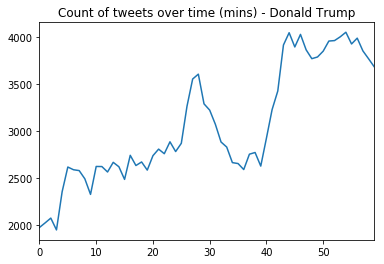

In [85]:
#Plotting count of tweets over time in mins (Trump)
import matplotlib.pyplot as plt
data_tweets_minutes["count"].plot()
plt.title('Count of tweets over time (mins) - Donald Trump')
plt.show()

In [86]:
data_tweets_hourly = data_tweets_filtered.groupby(["hour"]).sum().reset_index()
data_tweets_hourly

hour     minute  second   count
0  21.0   496844.0     0.0    9939
1  22.0  2016229.0     0.0   55177
2  23.0  3470881.0     0.0  118565

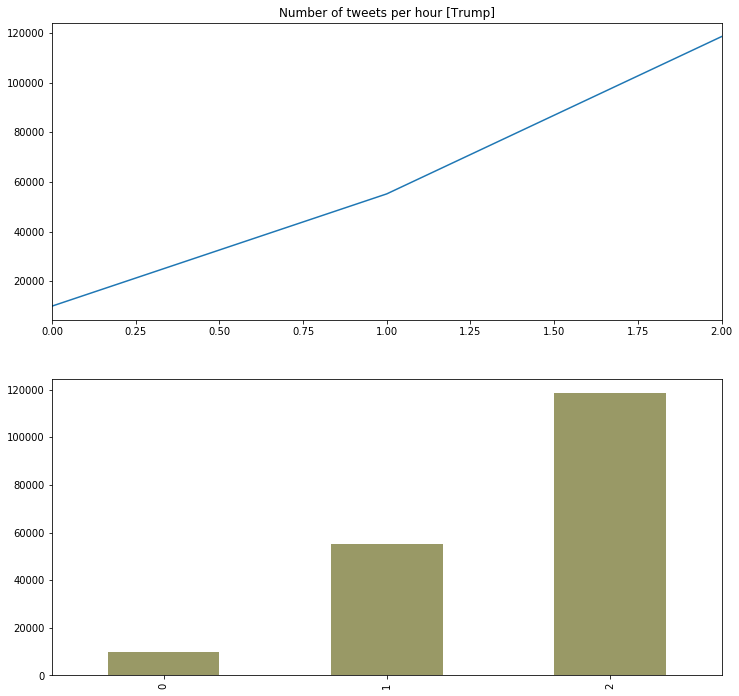

In [87]:
#Plotting count of tweets in hours (Trump)
import matplotlib as mpl
import matplotlib.pyplot as plt

f,(ax1,ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.title.set_text("Number of tweets per hour [Trump]")
data_tweets_hourly["count"].plot.bar(color='#999966')
data_tweets_hourly["count"].plot(ax=ax1)

In [1]:
#Sentiment Analysis using VADER (Joe Biden)
df = pd.read_json (r'data_biden.txt')

In [2]:
df.head(3)

contributors  coordinates          created_at  \
0           NaN          NaN 2020-04-16 23:59:59   
1           NaN          NaN 2020-04-16 23:59:57   
2           NaN          NaN 2020-04-16 23:59:56   

                                            entities extended_entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
1  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
2  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   

   favorite_count  favorited  geo                   id               id_str  \
0               2      False  NaN  1250937009528549378  1250937009528549376   
1               3      False  NaN  1250937003283283979  1250937003283283968   
2               1      False  NaN  1250936999198052352  1250936999198052352   

   ... possibly_sensitive  quoted_status  quoted_status_id  \
0  ...                NaN            NaN               NaN   
1  ...                NaN            NaN               NaN   
2  ...                NaN            NaN               NaN   

   quoted_status_id_str  retweet_count  retweeted  \
0                   NaN              2      False   
1                   NaN              0      False   
2                   NaN              1      False   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/android" ...   

                                                text truncated  \
0  @KamalaHarris Or mail in ? I sure hope that @J...      True   
1        @JoeBiden Y’all the avengers or something ?     False   
2             @JoeBiden NOT WITH YOUR ASS IN CHARGE!     False   

                                                user  
0  {'id': 1249054457427566593, 'id_str': '1249054...  
1  {'id': 105056158, 'id_str': '105056158', 'name...  
2  {'id': 766596068112990208, 'id_str': '76659606...  

[3 rows x 29 columns]

In [3]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.describe()

contributors  coordinates  favorite_count  geo            id  \
count           0.0          0.0     1507.000000  0.0  1.507000e+03   
mean            NaN          NaN        2.914399  NaN  1.250935e+18   
std             NaN          NaN       26.989791  NaN  1.087831e+12   
min             NaN          NaN        0.000000  NaN  1.250933e+18   
25%             NaN          NaN        0.000000  NaN  1.250934e+18   
50%             NaN          NaN        0.000000  NaN  1.250935e+18   
75%             NaN          NaN        1.000000  NaN  1.250936e+18   
max             NaN          NaN      626.000000  NaN  1.250937e+18   

             id_str  in_reply_to_status_id  in_reply_to_status_id_str  \
count  1.507000e+03           1.372000e+03               1.372000e+03   
mean   1.250935e+18           1.250675e+18               1.250675e+18   
std    1.087831e+12           5.106833e+15               5.106833e+15   
min    1.250933e+18           1.062706e+18               1.062706e+18   
25%    1.250934e+18           1.250832e+18               1.250832e+18   
50%    1.250935e+18           1.250927e+18               1.250927e+18   
75%    1.250936e+18           1.250931e+18               1.250931e+18   
max    1.250937e+18           1.250937e+18               1.250937e+18   

       in_reply_to_user_id  in_reply_to_user_id_str  possibly_sensitive  \
count         1.422000e+03             1.422000e+03          199.000000   
mean          3.029072e+17             3.029072e+17            0.045226   
std           4.774135e+17             4.774135e+17            0.208324   
min           1.369600e+04             1.369600e+04            0.000000   
25%           9.390910e+05             9.390910e+05            0.000000   
50%           9.765754e+07             9.765754e+07            0.000000   
75%           8.243337e+17             8.243337e+17            0.000000   
max           1.250473e+18             1.250473e+18            1.000000   

       quoted_status_id  quoted_status_id_str  retweet_count          neg  \
count      5.000000e+01          5.000000e+01    1507.000000  1507.000000   
mean       1.248567e+18          1.248567e+18       0.581951     0.065518   
std        1.009934e+16          1.009934e+16      10.443824     0.117297   
min        1.188783e+18          1.188783e+18       0.000000     0.000000   
25%        1.250815e+18          1.250815e+18       0.000000     0.000000   
50%        1.250922e+18          1.250922e+18       0.000000     0.000000   
75%        1.250929e+18          1.250929e+18       0.000000     0.114000   
max        1.250934e+18          1.250934e+18     300.000000     0.787000   

               neu          pos     compound  
count  1507.000000  1507.000000  1507.000000  
mean      0.832368     0.102114     0.070735  
std       0.171622     0.146591     0.385218  
min       0.145000     0.000000    -0.918700  
25%       0.717000     0.000000     0.000000  
50%       0.858000     0.000000     0.000000  
75%       1.000000     0.180500     0.361200  
max       1.000000     0.855000     0.960100

In [5]:
df['mean'] = df['compound'].expanding().mean()

In [6]:
compound_score_biden = df["compound"].mean
print(compound_score_biden)

<bound method Series.mean of 0       0.8957
1       0.0000
2       0.5697
3       0.6767
4       0.3612
5       0.0000
6       0.6786
7       0.0000
8      -0.6917
9       0.4404
10      0.4404
11      0.3412
12      0.4019
13      0.4019
14      0.0000
15      0.0000
16      0.0000
17      0.6705
18      0.0000
19     -0.3612
20      0.0000
21      0.0000
22      0.0000
23     -0.1027
24     -0.7269
25      0.7693
26     -0.5106
27     -0.2263
28     -0.7845
29      0.7450
         ...  
1477    0.0000
1478    0.6597
1479    0.0000
1480    0.6588
1481   -0.4019
1482    0.0000
1483    0.0000
1484    0.5859
1485    0.3612
1486    0.0000
1487    0.2023
1488    0.0000
1489   -0.0018
1490   -0.3612
1491    0.0000
1492   -0.6351
1493   -0.2960
1494   -0.4588
1495    0.0000
1496    0.1779
1497    0.2732
1498    0.0000
1499   -0.2960
1500   -0.2732
1501    0.3527
1502    0.7644
1503   -0.1877
1504   -0.5538
1505    0.0000
1506    0.0000
Name: compound, Length: 1507, dtype: float64>


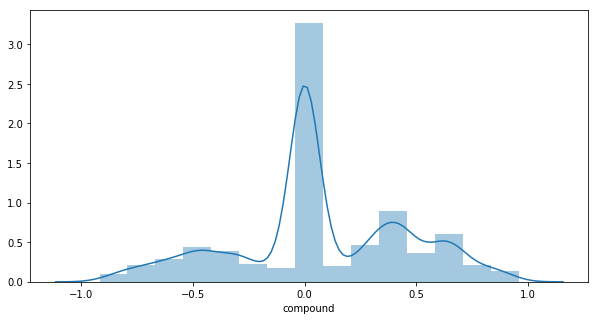

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()

In [9]:
#Sentiment Analysis using VADER (Donald Trump)
import pandas as pd
df2 = pd.read_json (r'data_trump.txt')

In [10]:
df2.head(3)

contributors  coordinates          created_at  \
0           NaN          NaN 2020-04-16 23:59:59   
1           NaN          NaN 2020-04-16 23:59:59   
2           NaN          NaN 2020-04-16 23:59:59   

                                            entities extended_entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
1  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   
2  {'hashtags': [], 'symbols': [], 'user_mentions...               NaN   

   favorite_count  favorited  geo                   id               id_str  \
0               0      False  NaN  1250937012816801792  1250937012816801792   
1              12      False  NaN  1250937012779126785  1250937012779126784   
2               0      False  NaN  1250937012451897345  1250937012451897344   

   ... possibly_sensitive  quoted_status  quoted_status_id  \
0  ...                NaN            NaN               NaN   
1  ...                NaN            NaN               NaN   
2  ...                NaN            NaN               NaN   

   quoted_status_id_str  retweet_count  retweeted  \
0                   NaN              0      False   
1                   NaN              0      False   
2                   NaN              0      False   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="https://mobile.twitter.com" rel="nofo...   
2  <a href="http://twitter.com/download/android" ...   

                                                text truncated  \
0  @Bunny_Slick @carl_cnp @JayMercer20 @itsJeffTi...      True   
1  @biglongshoreman @RepVernonJones @thecjpearson...      True   
2  @srosner @realDonaldTrump Can you explain that...     False   

                                                user  
0  {'id': 1096464427, 'id_str': '1096464427', 'na...  
1  {'id': 2751200663, 'id_str': '2751200663', 'na...  
2  {'id': 1056693214978072576, 'id_str': '1056693...  

[3 rows x 29 columns]

In [11]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
sentiment1 = df2['text'].apply(lambda x: analyzer.polarity_scores(x))
df2 = pd.concat([df2,sentiment1.apply(pd.Series)],1)

In [13]:
df2.describe()

contributors  coordinates  favorite_count  geo            id  \
count           0.0          0.0     1100.000000  0.0  1.100000e+03   
mean            NaN          NaN        2.010000  NaN  1.250937e+18   
std             NaN          NaN       15.182987  NaN  1.696363e+11   
min             NaN          NaN        0.000000  NaN  1.250936e+18   
25%             NaN          NaN        0.000000  NaN  1.250937e+18   
50%             NaN          NaN        0.000000  NaN  1.250937e+18   
75%             NaN          NaN        1.000000  NaN  1.250937e+18   
max             NaN          NaN      335.000000  NaN  1.250937e+18   

             id_str  in_reply_to_status_id  in_reply_to_status_id_str  \
count  1.100000e+03           9.870000e+02               9.870000e+02   
mean   1.250937e+18           1.249513e+18               1.249513e+18   
std    1.696363e+11           3.670137e+16               3.670137e+16   
min    1.250936e+18           1.031927e+17               1.031927e+17   
25%    1.250937e+18           1.250853e+18               1.250853e+18   
50%    1.250937e+18           1.250921e+18               1.250921e+18   
75%    1.250937e+18           1.250929e+18               1.250929e+18   
max    1.250937e+18           1.250937e+18               1.250937e+18   

       in_reply_to_user_id  in_reply_to_user_id_str  possibly_sensitive  \
count         1.035000e+03             1.035000e+03          145.000000   
mean          3.360051e+17             3.360051e+17            0.027586   
std           4.641468e+17             4.641468e+17            0.164352   
min           2.461030e+05             2.461030e+05            0.000000   
25%           2.507388e+07             2.507388e+07            0.000000   
50%           3.476274e+08             3.476274e+08            0.000000   
75%           8.189271e+17             8.189271e+17            0.000000   
max           1.250526e+18             1.250526e+18            1.000000   

       quoted_status_id  quoted_status_id_str  retweet_count          neg  \
count      3.500000e+01          3.500000e+01    1100.000000  1100.000000   
mean       1.250802e+18          1.250802e+18       0.472727     0.096426   
std        2.764240e+14          2.764240e+14       6.239399     0.141397   
min        1.249582e+18          1.249582e+18       0.000000     0.000000   
25%        1.250832e+18          1.250832e+18       0.000000     0.000000   
50%        1.250920e+18          1.250920e+18       0.000000     0.000000   
75%        1.250929e+18          1.250929e+18       0.000000     0.172000   
max        1.250936e+18          1.250936e+18     179.000000     0.770000   

               neu          pos     compound  
count  1100.000000  1100.000000  1100.000000  
mean      0.802145     0.101423     0.008077  
std       0.174487     0.142325     0.440457  
min       0.213000     0.000000    -0.940300  
25%       0.683000     0.000000    -0.340000  
50%       0.808500     0.000000     0.000000  
75%       1.000000     0.182250     0.361200  
max       1.000000     0.744000     0.988900

In [14]:
df2['mean'] = df2['compound'].expanding().mean()
print(df2['mean'])

0       0.000000
1       0.000000
2      -0.175567
3      -0.131675
4      -0.192180
5      -0.099950
6      -0.085671
7      -0.114737
8      -0.019433
9       0.052850
10      0.034309
11      0.031450
12      0.087877
13      0.110307
14      0.146193
15      0.165731
16      0.180776
17      0.170733
18      0.184926
19      0.216540
20      0.206229
21      0.216873
22      0.207443
23      0.191000
24      0.154624
25      0.159185
26      0.187533
27      0.180836
28      0.146579
29      0.113057
          ...   
1070    0.003776
1071    0.004110
1072    0.003851
1073    0.003847
1074    0.004534
1075    0.004989
1076    0.004912
1077    0.005243
1078    0.005238
1079    0.005233
1080    0.005481
1081    0.005899
1082    0.006470
1083    0.006464
1084    0.007072
1085    0.007637
1086    0.007630
1087    0.007623
1088    0.006948
1089    0.007131
1090    0.007635
1091    0.007835
1092    0.008266
1093    0.007988
1094    0.007981
1095    0.007974
1096    0.008480
1097    0.0087

In [15]:
compound_score_trump = df2["compound"].mean
print(compound_score_trump)

<bound method Series.mean of 0       0.0000
1       0.0000
2      -0.5267
3       0.0000
4      -0.4342
5       0.3612
6       0.0000
7      -0.3182
8       0.7430
9       0.7034
10     -0.1511
11      0.0000
12      0.7650
13      0.4019
14      0.6486
15      0.4588
16      0.4215
17      0.0000
18      0.4404
19      0.8172
20      0.0000
21      0.4404
22      0.0000
23     -0.1872
24     -0.7184
25      0.2732
26      0.9246
27      0.0000
28     -0.8126
29     -0.8591
         ...  
1070    0.5080
1071    0.3612
1072   -0.2732
1073    0.0000
1074    0.7418
1075    0.4939
1076   -0.0772
1077    0.3612
1078    0.0000
1079    0.0000
1080    0.2732
1081    0.4574
1082    0.6249
1083    0.0000
1084    0.6652
1085    0.6209
1086    0.0000
1087    0.0000
1088   -0.7269
1089    0.2057
1090    0.5574
1091    0.2263
1092    0.4791
1093   -0.2960
1094    0.0000
1095    0.0000
1096    0.5630
1097    0.3182
1098   -0.7351
1099    0.0000
Name: compound, Length: 1100, dtype: float64>


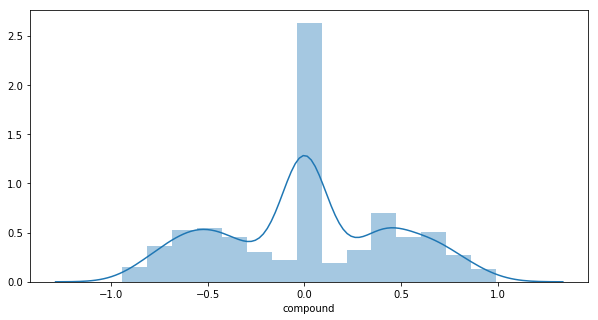

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
sns.distplot(df2['compound'], bins=15, ax=ax)
plt.show()

In [23]:
#Joe Biden Sentiment Analysis using Textblob(NLTK)
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

class TwitterClient(object): 
    def __init__(self):         
        consumer_key = 'eVXXvtiI6zOFyh28fqlBaLhFG'
        consumer_secret = 'kp5GKGF3leHagSo8J0eLVUICsLfaI76MzjGwkjtLMrPM0jK8EL'
        access_token = '905838785778380801-xE6cTpYspRPpNCNz7dhR7iE6akfuSkn'
        access_token_secret = 'aSF81IzlsesueB9S0BncfMOCU4CnKJ8XzgyNG2WToQOFp'

        try: 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            self.auth.set_access_token(access_token, access_token_secret) 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity < 0: 
            return 'negative'

    def get_tweets(self, query, count = 1000): 
       
        tweets = [] 

        try: 
            fetched_tweets = self.api.search(q = query, count = count) 

            for tweet in fetched_tweets: 
                parsed_tweet = {}  
                parsed_tweet['text'] = tweet.text 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                if tweet.retweet_count > 0: 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
 
            return tweets 

        except tweepy.TweepError as e: 
            print("Error : " + str(e)) 

def main(): 
    api = TwitterClient() 
    tweets = api.get_tweets(query = '@JoeBiden -filter:retweets', count = 1000) 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']  
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

if __name__ == "__main__":  
    main() 


Positive tweets percentage: 29.0 %
Negative tweets percentage: 17.0 %


In [24]:
#Donald Trump Sentiment Analysis using Textblob(NLTK)
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 

class TwitterClient(object): 
    def __init__(self):         
        consumer_key = 'eVXXvtiI6zOFyh28fqlBaLhFG'
        consumer_secret = 'kp5GKGF3leHagSo8J0eLVUICsLfaI76MzjGwkjtLMrPM0jK8EL'
        access_token = '905838785778380801-xE6cTpYspRPpNCNz7dhR7iE6akfuSkn'
        access_token_secret = 'aSF81IzlsesueB9S0BncfMOCU4CnKJ8XzgyNG2WToQOFp'

        try: 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            self.auth.set_access_token(access_token, access_token_secret) 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity < 0: 
            return 'negative'

    def get_tweets(self, query, count = 1000): 
       
        tweets = [] 

        try: 
            fetched_tweets = self.api.search(q = query, count = count) 

            for tweet in fetched_tweets: 
                parsed_tweet = {}  
                parsed_tweet['text'] = tweet.text 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                if tweet.retweet_count > 0: 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 
 
            return tweets 

        except tweepy.TweepError as e: 
            print("Error : " + str(e)) 

def main(): 
    api = TwitterClient() 
    tweets = api.get_tweets(query = '@realDonaldTrump -filter:retweets', count = 1000) 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']  
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 

if __name__ == "__main__":  
    main() 


Positive tweets percentage: 27.272727272727273 %
Negative tweets percentage: 13.131313131313131 %
